# Projet 1 : Analyse de la qualité de l’air

**Jeu de données :** "Air Quality" (disponible sur Kaggle)

**Description :** Analyse des paramètres de qualité de l’air pour comprendre les tendances de pollution et les impacts environnementaux.

**Objectifs :**

* Explorer les données de pollution (PM2.5, NO₂, O₃, température, humidité).

* Identifier les relations entre différents facteurs environnementaux et météorologiques.

* Visualiser les tendances de pollution dans le temps et selon les régions.

* Fournir des insights exploitables sur les périodes et zones de forte pollution.
------------------------------------------------------------------------------
# Project 1: Air Quality Analysis

**Dataset:** "Air Quality" (available on Kaggle)

**Description:** Analyzing air quality parameters to understand pollution trends and environmental impacts.

**Objectives:**

* Explore pollution data (PM2.5, NO₂, O₃, temperature, humidity).

* Identify relationships between different environmental and meteorological factors.

* Visualize pollution trends over time and across different regions.

* Provide actionable insights on periods and locations with high pollution levels.
-------------------------------------------------------------------------------

1. Acquisition des données / Data Acquisition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels as sm
import sklearn as sk

In [2]:
df = pd.read_csv('global air pollution dataset.csv')

In [21]:
print(df.head()) #First 5 rows of dataframe

              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
0             Good     

2. Nettoyage et prétraitement / Data Cleaning and Preprocessing

In [23]:
#Infos sur les données / Infos of data

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 23035 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23035 non-null  object
 1   City                23035 non-null  object
 2   AQI Value           23035 non-null  int64 
 3   AQI Category        23035 non-null  object
 4   CO AQI Value        23035 non-null  int64 
 5   CO AQI Category     23035 non-null  object
 6   Ozone AQI Value     23035 non-null  int64 
 7   Ozone AQI Category  23035 non-null  object
 8   NO2 AQI Value       23035 non-null  int64 
 9   NO2 AQI Category    23035 non-null  object
 10  PM2.5 AQI Value     23035 non-null  int64 
 11  PM2.5 AQI Category  23035 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.3+ MB
None
          AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  23035.000000  23035.000000     23035.000000   23035.000000   
mean      72.344693      1.3762

In [24]:
#Supprimer les doublons / Delete double

df.drop_duplicates(inplace=True)

In [25]:
#Remplacer valeurs manquantes par la moyenne / Replace by mean

df.fillna(df.mean(), inplace=True)

TypeError: Could not convert ["Russian FederationBrazilItalyPolandFranceUnited States of AmericaGermanyBelgiumRussian FederationEgyptChinaNetherlandsIndiaPakistanRepublic of North MacedoniaFranceIndiaItalyUnited States of AmericaIndiaPolandIndiaBrazilChinaBrazilIndiaColombiaRomaniaRussian FederationFranceUnited States of AmericaIndonesiaBrazilFinlandSouth AfricaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited States of AmericaBrazilChinaRussian FederationUnited Republic of TanzaniaIndiaUnited States of AmericaBelgiumEgyptHaitiUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaPakistanIndiaPakistanSomaliaPhilippinesLatviaUnited States of AmericaNetherlandsUnited States of AmericaUnited States of AmericaPolandColombiaItalyChadUnited Kingdom of Great Britain and Northern IrelandPhilippinesRussian FederationUnited States of AmericaUnited States of AmericaGermanyGermanyUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaBrazilIndiaGermanyChinaGermanyUnited States of AmericaIndiaGermanyFranceUnited States of AmericaNew ZealandTunisiaViet NamIran (Islamic Republic of)ItalyIndiaBrazilMexicoMexicoItalyViet NamChinaIndonesiaRomaniaTunisiaPhilippinesJapanMexicoBrazilBrazilBrazilMexicoEl SalvadorUnited Republic of TanzaniaRussian FederationIndiaBrazilIndiaBulgariaPolandPhilippinesNigeriaFinlandBrazilPhilippinesBrazilNigeriaMexicoBrazilBrazilBrazilSouth SudanGuatemalaUnited States of AmericaUnited States of AmericaIrelandTurkeyViet NamUnited States of AmericaUnited States of AmericaRussian FederationIndiaIndiaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaChinaChinaChinaChinaPeruChinaDemocratic Republic of the CongoChinaChinaChinaUnited States of AmericaGermanyUnited States of AmericaBelgiumCanadaIrelandSwitzerlandGermanyUnited States of AmericaUnited States of AmericaBrazilDenmarkUnited States of AmericaGermanyJapanChinaUnited Kingdom of Great Britain and Northern IrelandGermanyGermanyCameroonSomaliaNetherlandsAustraliaGermanyColombiaRussian FederationUnited Kingdom of Great Britain and Northern IrelandPortugalRussian FederationIndiaCôte d'IvoireUnited States of AmericaSwedenUnited States of AmericaGermanyChinaEthiopiaNigeriaItalyGermanyJapanThailandIndonesiaRussian FederationJapanPolandHungaryHungaryTunisiaIndiaIran (Islamic Republic of)PhilippinesJapanJapanJapanIndiaPhilippinesRussian FederationKazakhstanUnited States of AmericaIsraelJapanRomaniaPhilippinesIndonesiaTurkeyIndiaUnited Kingdom of Great Britain and Northern IrelandChinaChinaPolandPolandBelgiumBelgiumChinaChinaChinaChinaMexicoMexicoRussian FederationNetherlandsSpainItalyCôte d'IvoireMexicoUnited States of AmericaUnited States of AmericaIndiaNigeriaFranceMyanmarUnited States of AmericaRussian FederationBelgiumCanadaBrazilSpainPapua New GuineaGermanyMadagascarChinaMadagascarUnited States of AmericaLithuaniaGhanaMexicoBrazilRussian FederationFranceRussian FederationAzerbaijanArmeniaEthiopiaIran (Islamic Republic of)IndiaGuatemalaItalyUkrainePortugalMalaysiaUnited Kingdom of Great Britain and Northern IrelandNetherlandsSerbiaGermanyPakistanSouth AfricaSouth AfricaThailandMalaysiaPhilippinesSlovakiaGermanyUnited States of AmericaGambiaPakistanMalaysiaIndiaItalyItalyPhilippinesEcuadorBosnia and HerzegovinaItalyItalyCzechiaArgentinaPeruFranceChinaViet NamRussian FederationRussian FederationIndiaIndiaMexicoIndiaPolandIndiaUnited States of AmericaBrazilBrazilBrazilUnited Kingdom of Great Britain and Northern IrelandIrelandBrazilRomaniaDominican RepublicItalyBrazilUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited States of AmericaBrazilArgentinaMexicoItalyAzerbaijanSpainIndiaBrazilGermanyUnited States of AmericaPolandGuineaPakistanFranceUnited States of AmericaGhanaChinaBrazilBolivia (Plurinational State of)GermanyUnited States of AmericaIndiaUnited States of AmericaRussian FederationBangladeshPakistanIndiaIndiaIndiaIndonesiaBrazilRussian FederationSudanColombiaPhilippinesIran (Islamic Republic of)IndiaThailandThailandNetherlandsUnited States of AmericaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandSerbiaNetherlandsChilePanamaMexicoUnited States of AmericaUnited States of AmericaGhanaJapanGermanyRepublic of North MacedoniaJapanPolandGermanyBrazilJapanNetherlandsUnited States of AmericaUnited States of AmericaPolandGuatemalaCongoBrazilNigeriaKyrgyzstanItalyIndiaMauritiusFranceIndiaPhilippinesIndonesiaChinaChinaChinaBrazilBrazilPeruUnited States of AmericaUnited States of AmericaUnited States of AmericaKazakhstanIndiaUnited States of AmericaGreeceMexicoSerbiaThailandThailandThailandIndiaEgyptItalyRussian FederationUnited Kingdom of Great Britain and Northern IrelandGermanyCzechiaMalawiSwitzerlandBrazilSerbiaCubaIndiaUnited States of AmericaUnited States of AmericaCanadaFranceBelgiumFranceSaudi ArabiaJapanUnited Kingdom of Great Britain and Northern IrelandIndiaBrazilIndiaTurkeyIndonesiaBrazilUnited States of AmericaCanadaIndonesiaPeruSpainMexicoIsraelChileIndiaUnited States of AmericaBangladeshIndiaThailandIndiaBrazilFinlandGermanyUnited States of AmericaBeninItalySierra LeoneHaitiPortugalUnited States of AmericaUnited States of AmericaIndiaThailandGermanyRussian FederationBrazilBrazilUnited States of AmericaUnited States of AmericaBrazilPeruFranceLebanonItalyFranceBrazilFrancePhilippinesIndiaUnited States of AmericaIndiaThailandChinaIndiaUnited Republic of TanzaniaIndiaBrazilUruguayIndiaRussian FederationTurkeyIndiaTurkeyUkraineBeninRussian FederationUnited States of AmericaUnited Republic of TanzaniaUnited States of AmericaUnited States of AmericaMexicoUnited States of AmericaMexicoBolivia (Plurinational State of)United States of AmericaPakistanJapanItalyUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandNamibiaIndiaIndiaSpainIndiaIndiaBrazilNetherlandsUnited States of AmericaPolandIran (Islamic Republic of)Russian FederationJapanAlbaniaUnited States of AmericaUnited States of AmericaMexicoGermanyCameroonChinaFranceUnited States of AmericaFranceUnited States of AmericaUnited States of AmericaBrazilGermanyUnited States of AmericaJapanGermanyIsraelIndiaSpainItalyNetherlandsGermanyGuyanaGermanyIndiaUnited States of AmericaUnited States of AmericaThailandPhilippinesIran (Islamic Republic of)BrazilChinaIndiaGermanyFranceBrazilColombiaNetherlandsUnited Kingdom of Great Britain and Northern IrelandPhilippinesFranceGermanyMalaysiaChinaCzechiaBelgiumBelgiumNetherlandsCongoSenegalPolandPolandIndonesiaPhilippinesIndiaUkraineBrazilPakistanLesothoUnited States of AmericaUnited Republic of TanzaniaIndiaIndiaIndiaIndiaUnited States of AmericaUkraineFrancePhilippinesBeninIran (Islamic Republic of)ItalyMongoliaIndiaDemocratic Republic of the CongoVenezuela (Bolivarian Republic of)ItalyIndiaGermanyChinaFranceGermanyUnited States of AmericaJapanIndiaBulgariaPakistanGermanyUnited States of AmericaUnited States of AmericaFinlandJapanGermanyChinaJapanJapanUnited States of AmericaSomaliaJapanSolomon IslandsIndiaParaguayArmeniaChinaPeruZimbabweJapanIndiaNigeriaIndiaIndiaRussian FederationIndiaNamibiaUkraineUnited Republic of TanzaniaTurkeyUkraineUnited States of AmericaRussian FederationAustriaCroatiaPapua New GuineaRussian FederationCzechiaPolandRussian FederationPolandPakistanRussian FederationIndiaChadIndiaUkraineRussian FederationRussian FederationGermanyGermanyUkraineIndiaRussian FederationIndiaJapanMyanmarMexicoFranceHondurasUnited States of AmericaBrazilBrazilGermanyBrazilBrazilJapanSpainIndiaIndiaNigeriaUnited Kingdom of Great Britain and Northern IrelandJapanCôte d'IvoireBrazilBrazilUkraineUkraineSpainIndiaIndiaIndiaIndiaChinaMexicoIndiaChinaPolandGermanyUnited Republic of TanzaniaChinaFinlandIndiaIndiaRussian FederationUkraineCambodiaPakistanIndiaFinlandChinaIndiaIndiaIndiaIndiaRussian FederationJapanUnited States of AmericaHungaryBelgiumTurkeyUnited States of AmericaUnited States of AmericaIndiaIndiaItalyFranceUnited States of AmericaUgandaMalaysiaChadUnited Republic of TanzaniaTunisiaGermanyPhilippinesCubaSenegalColombiaArgentinaUnited States of AmericaUnited States of AmericaHungaryNetherlandsTurkeyBrazilUruguayBrazilIndiaIndiaItalyIndonesiaJapanPhilippinesFranceFranceHungaryBangladeshBelgiumUnited States of AmericaIndiaItalyGermanyMexicoPolandIndiaIndiaMexicoIndiaItalyPakistanIndiaIndiaRomaniaGermanyUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandRepublic of MoldovaJapanRussian FederationGermanyIndiaIndiaIndiaIndiaThailandSudanUnited States of AmericaIndiaIndiaHungaryUnited States of AmericaIndiaPakistanSouth AfricaChinaRussian FederationUkraineGuineaBulgariaUnited States of AmericaItalyBolivia (Plurinational State of)United States of AmericaIndiaFinlandMyanmarItalyRussian FederationChileAngolaGermanyDemocratic Republic of the CongoIndiaBelgiumColombiaIndiaIndiaTurkeyTurkeyPhilippinesIndiaPhilippinesIndiaKingdom of EswatiniUkraineAfghanistanIndiaSwitzerlandPeruSpainSpainMexicoSpainUnited States of AmericaMalaysiaIndiaIndiaIndonesiaBelgiumFranceItalyMexicoItalyFranceFrancePortugalBelgiumItalyUnited States of AmericaMexicoBulgariaChinaUnited States of AmericaMalawiPakistanNigeriaIndiaRussian FederationIndiaIndonesiaIndiaIndiaIndiaUnited States of AmericaIndiaUzbekistanIndonesiaFinlandPolandFranceSwedenGermanyPeruBrazilTunisiaChinaZambiaUnited States of AmericaMoroccoIndiaIrelandPakistanGhanaJapanSpainIndiaUnited States of AmericaIndiaNetherlandsRussian FederationIndiaChinaHungaryFrancePakistanIndiaIndiaPakistanIndiaThailandFranceUnited States of AmericaUkraineUnited States of AmericaSlovakiaNew ZealandBrazilGermanySwedenItalyUnited States of AmericaPakistanGermanyPortugalMexicoChinaChinaAngolaPhilippinesBelarusRussian FederationNetherlandsGuineaUnited States of AmericaPakistanGermanyIndonesiaPhilippinesUnited Republic of TanzaniaIndiaPhilippinesItalyIndiaSpainPhilippinesRussian FederationRussian FederationRussian FederationRussian FederationNetherlandsNorwayThailandPakistanGermanyIndiaRussian FederationIndonesiaBelgiumFranceFranceMexicoNigeriaPortugalRussian FederationMoroccoIran (Islamic Republic of)AzerbaijanPakistanIndonesiaEgyptChinaUnited States of AmericaIndiaBrazilGuatemalaItalyIndonesiaChinaIndiaGermanyIndonesiaUnited Kingdom of Great Britain and Northern IrelandIndiaHungaryHungaryUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaEcuadorVenezuela (Bolivarian Republic of)SpainGuatemalaSpainUnited States of AmericaGermanyBrazilIndiaUnited States of AmericaIran (Islamic Republic of)MongoliaSpainTurkeyKazakhstanBrazilBelgiumSpainMexicoItalyUnited States of AmericaPakistanUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandFranceItalyBrazilBrazilGermanyMaltaFranceIndiaItalyArgentinaUnited States of AmericaUnited States of AmericaRwandaUnited States of AmericaUnited States of AmericaTurkeyNetherlandsSwedenFranceUnited States of AmericaPortugalFranceUnited States of AmericaUnited States of AmericaDenmarkColombiaBrazilEcuadorPortugalItalySenegalChinaGermanyGermanyHaitiUnited States of AmericaSri LankaGermanyChinaUnited States of AmericaChinaChinaChinaMexicoGermanyChinaChinaMexicoEgyptGermanyPolandNetherlandsRomaniaMalaysiaIndiaJapanIndiaUnited States of AmericaSwedenGermanyGermanyIndiaHungaryUnited States of AmericaJapanUkraineUnited States of AmericaGermanyChinaNetherlandsUnited States of AmericaBrazilFranceUnited States of AmericaJapanBotswanaIndiaEthiopiaColombiaUnited States of AmericaUnited States of AmericaPolandSpainRussian FederationUnited Republic of TanzaniaEcuadorUnited States of AmericaUnited States of AmericaBotswanaFranceGermanySri LankaGuatemalaUnited States of AmericaBrazilFranceFranceIndiaNigeriaChinaUnited Republic of TanzaniaBurundiBrazilUnited States of AmericaPolandIndiaIndiaIndiaIndiaJapanIndiaMexicoIndiaPakistanUnited States of AmericaChinaUnited States of AmericaGermanyGermanyUnited States of AmericaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandIndonesiaUnited Republic of TanzaniaUnited Republic of TanzaniaRussian FederationFranceFranceRussian FederationTurkeyItalyThailandThailandIndiaUnited States of AmericaItalyIndiaChinaItalyBrazilItalyBrazilJamaicaCanadaBrazilRussian FederationGermanyChileVenezuela (Bolivarian Republic of)IndonesiaBelgiumItalyBrazilBrazilPolandIndiaIndiaUnited States of AmericaRussian FederationRomaniaSwitzerlandUnited States of AmericaFranceUnited States of AmericaSwedenGermanyJapanBelgiumItalyUgandaThailandIndonesiaItalyIndonesiaIndiaPhilippinesIndiaCentral African RepublicUnited States of AmericaBrazilBolivia (Plurinational State of)IndiaUnited States of AmericaRussian FederationUnited States of AmericaBrazilChinaChinaGreeceItalyFranceBrazilBrazilRussian FederationGermanySouth AfricaChinaNetherlandsRomaniaUnited States of AmericaGreeceIndiaRussian FederationUnited States of AmericaUnited States of AmericaGermanyGermanyGermanyDominican RepublicTurkeyKenyaBrazilGermanyNorwayMexicoNetherlandsFranceGermanyGermanyUnited States of AmericaPortugalUnited States of AmericaNigerUnited States of AmericaUnited States of AmericaGermanyHungaryUnited Kingdom of Great Britain and Northern IrelandJapanMexicoCôte d'IvoireBrazilItalyUnited States of AmericaDemocratic Republic of the CongoIndiaRwandaUnited Kingdom of Great Britain and Northern IrelandIndiaBrazilBrazilIran (Islamic Republic of)United States of AmericaBrazilAfghanistanIndiaPakistanIndiaGermanyRwandaRussian FederationGhanaHungaryUgandaPapua New GuineaJapanLithuaniaIndiaMaliRussian FederationSloveniaIndiaBelgiumPolandIndiaRussian FederationPolandRussian FederationIndiaIndiaTurkeyRussian FederationVenezuela (Bolivarian Republic of)MyanmarChinaUnited States of AmericaIndiaUnited States of AmericaBrazilFranceFranceMauritiusFranceItalyUnited Kingdom of Great Britain and Northern IrelandAustriaSouth SudanIndonesiaFranceBelgiumPakistanFranceCosta RicaUnited States of AmericaBrazilBrazilFranceUnited States of AmericaSpainGermanyChinaUnited Kingdom of Great Britain and Northern IrelandBrazilItalyChinaChinaChinaKazakhstanRussian FederationIndonesiaUnited States of AmericaUnited States of AmericaLatviaUnited States of AmericaIndiaBulgariaColombiaBrazilUnited States of AmericaIndiaUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandIndiaRomaniaItalyGermanyUnited States of AmericaGermanyItalyUnited States of AmericaGermanyGermanySpainDenmarkMexicoNicaraguaItalyFranceFranceAfghanistanGermanyUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandSlovakiaFranceFranceCanadaFranceFranceMexicoGuatemalaRussian FederationIndiaUzbekistanUnited States of AmericaIndiaIndiaUnited States of AmericaEthiopiaGermanyPakistanIndiaNetherlandsSenegalTurkeyJapanIndiaIndiaIndiaGermanyGermanyNicaraguaUnited States of AmericaPeruSouth AfricaGermanyGermanyJapanRepublic of KoreaItalyRussian FederationFranceJapanFranceUnited States of AmericaCameroonMexicoChinaAzerbaijanEthiopiaUkraineBurkina FasoMyanmarUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaIndonesiaUnited States of AmericaUnited States of AmericaJapanPolandUnited States of AmericaCabo VerdeJapanUnited States of AmericaIndiaUnited Republic of TanzaniaIndonesiaDominican RepublicItalyRussian FederationSpainItalyPolandMexicoUnited States of AmericaMexicoMadagascarJapanItalyUnited States of AmericaUnited Republic of TanzaniaCzechiaIndiaUnited States of AmericaIndiaJapanHungaryKenyaThailandUzbekistanMozambiqueJapanIndiaUnited States of AmericaIndiaArgentinaCzechiaIsraelGermanyGermanyUnited States of AmericaIndonesiaRussian FederationIndiaIndiaNigeriaItalyItalyFranceUnited States of AmericaIndiaUnited States of AmericaMauritaniaCroatiaBrazilRussian FederationFranceRussian FederationDenmarkUnited States of AmericaNigeriaJapanUkraineNigeriaUnited States of AmericaSwedenIndiaRussian FederationUnited States of AmericaFranceIndiaPeruBrazilUnited States of AmericaTurkeyCanadaUnited States of AmericaBrazilUnited States of AmericaItalyUnited States of AmericaUnited States of AmericaUnited States of AmericaFranceBrazilCubaTurkeyIndiaSpainUnited Kingdom of Great Britain and Northern IrelandRussian FederationBrazilRepublic of North MacedoniaFranceIndiaChadGermanyItalyUnited States of AmericaUnited States of AmericaUnited States of AmericaRomaniaHungaryGermanyRussian FederationBrazilGuinea-BissauBrazilSpainCanadaBrazilBrazilBrazilBrazilViet NamNetherlandsBrazilSpainUnited States of AmericaUnited States of AmericaCzechiaMexicoHungaryTurkeyMalaysiaFranceIndiaIndiaChinaRomaniaIndiaNigeriaUnited States of AmericaSwitzerlandIndiaIndiaChileArmeniaIndiaRussian FederationThailandRussian FederationPhilippinesUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandFranceIndiaRussian FederationChinaRussian FederationNicaraguaMexicoMexicoColombiaUnited States of AmericaIndonesiaUnited States of AmericaUnited States of AmericaPhilippinesChinaAustriaGermanyGermanyBelgiumUnited Arab EmiratesChinaUnited States of AmericaCanadaUnited Kingdom of Great Britain and Northern IrelandGermanyAlbaniaUnited States of AmericaChinaKazakhstanChinaNigeriaGermanyGermanyFinlandFranceUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandAustriaChinaBangladeshChadGermanyItalyRepublic of MoldovaUnited States of AmericaCubaUnited States of AmericaUnited States of AmericaRomaniaThailandUnited Kingdom of Great Britain and Northern IrelandSomaliaIndiaIndiaIndonesiaEcuadorAustraliaIndiaThailandIran (Islamic Republic of)MexicoIndonesiaIndiaDominican RepublicGuatemalaEritreaBrazilSwitzerlandNigeriaIndiaUnited States of AmericaGermanyRussian FederationBulgariaBrazilCanadaRussian FederationUnited States of AmericaNetherlandsNetherlandsPakistanJapanUnited States of AmericaBrazilRussian FederationItalyBulgariaPolandUnited States of AmericaUnited States of AmericaChadRussian FederationBrazilBrazilSwedenGermanyTajikistanCzechiaBelgiumItalyIndonesiaChinaBelarusIrelandIndonesiaGermanyFranceBrazilBarbadosUnited States of AmericaFranceUnited Kingdom of Great Britain and Northern IrelandFranceItalyItalyTunisiaIndiaPhilippinesUnited Republic of TanzaniaGermanyFranceBrazilBrazilUnited States of AmericaDemocratic Republic of the CongoUgandaBrazilMexicoBrazilBrazilUnited States of AmericaRomaniaChileBrazilUnited States of AmericaVenezuela (Bolivarian Republic of)BrazilHaitiPhilippinesBrazilUnited States of AmericaItalyItalyIndiaFranceBelgiumRussian FederationThailandMexicoGuatemalaRepublic of MoldovaIndiaUnited Kingdom of Great Britain and Northern IrelandRussian FederationChinaColombiaColombiaUnited States of AmericaUnited States of AmericaBelgiumIran (Islamic Republic of)Russian FederationNigeriaMexicoGermanyBrazilIndiaEthiopiaAlgeriaEthiopiaJapanRussian FederationItalySpainGermanyHungaryPakistanTurkeyItalyCôte d'IvoireUnited Kingdom of Great Britain and Northern IrelandItalyBrazilUnited States of AmericaNetherlandsNetherlandsGuatemalaUnited States of AmericaFranceIndiaGhanaUnited States of AmericaFranceGreeceGermanyBrazilBrazilGhanaMexicoJapanGermanyBrazilRussian FederationViet NamGermanyGermanyGermanyGermanyFranceBrazilUnited States of AmericaBosnia and HerzegovinaVenezuela (Bolivarian Republic of)PolandChinaViet NamItalyColombiaEcuadorItalyUnited States of AmericaLithuaniaIndiaIndiaIraqUnited States of AmericaUnited States of AmericaItalySpainRomaniaBrazilItalyUnited States of AmericaUnited States of AmericaUnited States of AmericaMauritiusSaudi ArabiaFranceFranceUnited States of AmericaPolandItalyGermanyUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaNetherlandsJapanJapanIndonesiaItalyFranceFranceFranceFranceFranceJapanUkraineMexicoTurkeyThailandIndiaColombiaRomaniaBrazilGuatemalaItalyBrazilIndiaFranceMexicoRussian FederationBangladeshBrazilUnited States of AmericaRomaniaColombiaCzechiaRussian FederationThailandCambodiaBrazilIndiaPhilippinesBelarusSpainIndiaIndiaPeruUnited States of AmericaUnited States of AmericaBurkina FasoBrazilUkraineBrazilBelgiumBrazilBrazilItalyUnited Kingdom of Great Britain and Northern IrelandPapua New GuineaRussian FederationIndiaRussian FederationCanadaItalyUnited States of AmericaBrazilSwitzerlandMexicoBrazilRomaniaPhilippinesIndiaItalySyrian Arab RepublicSpainBrazilItalyGermanyUnited Kingdom of Great Britain and Northern IrelandColombiaIndiaIndiaMadagascarSpainGermanyUnited States of AmericaUzbekistanIndiaTurkeyColombiaNigeriaNetherlandsTurkeyGabonBrazilUnited States of AmericaBrazilUnited States of AmericaHungaryJapanIndiaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandFranceThailandUnited States of AmericaBrazilGreeceIndiaJapanIndiaRussian FederationTurkeyUnited States of AmericaRussian FederationSwitzerlandIndiaIndiaSlovakiaPolandDenmarkRussian FederationUkraineUnited States of AmericaGermanyRussian FederationCôte d'IvoireUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandItalyUnited States of AmericaUnited States of AmericaGermanySerbiaChinaIndonesiaNigerUnited States of AmericaUnited States of AmericaGermanyUnited States of AmericaIndiaChinaMexicoMexicoItalySpainUkraineRussian FederationRussian FederationUnited States of AmericaUnited States of AmericaIndonesiaUnited States of AmericaPolandFranceUnited Kingdom of Great Britain and Northern IrelandBelgiumUnited Kingdom of Great Britain and Northern IrelandEgyptItalyUgandaTajikistanSomaliaIndiaIndiaEgyptIndiaIndiaJapanGermanyBrazilSerbiaBrazilMexicoUnited States of AmericaUkraineIndiaJapanGermanyPhilippinesColombiaPanamaUgandaItalyBrazilBrazilVenezuela (Bolivarian Republic of)BrazilFranceUnited States of AmericaGermanyUgandaItalyPhilippinesIndiaKazakhstanFranceGhanaUnited States of AmericaGermanySpainAustraliaIndiaRussian FederationIndonesiaIndiaIran (Islamic Republic of)Iran (Islamic Republic of)IndiaIndiaIndiaBrazilIndiaIndiaUnited Kingdom of Great Britain and Northern IrelandGermanyIndiaIndiaTurkeyBrazilPhilippinesMexicoRussian FederationRussian FederationUkraineBrazilCôte d'IvoireRomaniaSouth AfricaUnited States of AmericaRomaniaBrazilGermanyPolandPolandPhilippinesMongoliaPapua New GuineaAustraliaSaudi ArabiaBulgariaGermanyBrazilDominican RepublicMexicoMexicoSpainBrazilPortugalAngolaBrazilBrazilItalyUnited States of AmericaItalyBrazilItalyPhilippinesUnited States of AmericaSerbiaUnited Kingdom of Great Britain and Northern IrelandSouth AfricaChinaJapanIran (Islamic Republic of)United States of AmericaMalaysiaChinaMalaysiaFranceFranceGermanySudanUnited States of AmericaMexicoMexicoMexicoUnited States of AmericaUnited States of AmericaMexicoUnited States of AmericaUnited States of AmericaGreeceFranceMexicoUnited Republic of TanzaniaIndiaIndiaAfghanistanColombiaRussian FederationCôte d'IvoireFranceGreecePeruBrazilCzechiaRussian FederationViet NamIran (Islamic Republic of)BrazilMexicoUnited States of AmericaPhilippinesRomaniaUnited Republic of TanzaniaCzechiaUnited Republic of TanzaniaIndiaFinlandUkraineBrazilItalyUnited States of AmericaColombiaFranceFranceSouth AfricaRussian FederationIndiaPortugalArgentinaGermanyTurkeyFranceBrazilGermanyItalyGermanyFranceItalyRussian FederationGermanyGermanyUnited States of AmericaIndonesiaGermanyGermanyPolandUnited States of AmericaGermanyGermanyUnited States of AmericaUnited States of AmericaCanadaSwitzerlandUnited States of AmericaUnited States of AmericaPolandUnited States of AmericaUnited States of AmericaKenyaChinaChinaCameroonMexicoUnited States of AmericaJapanJapanChinaNetherlandsChinaChinaBelarusPeruIran (Islamic Republic of)FranceRussian FederationRussian FederationViet NamEgyptLiberiaUnited States of AmericaFranceRussian FederationIndiaPolandPolandItalyUnited States of AmericaGermanyDenmarkUnited States of AmericaSpainSouth AfricaGermanyNicaraguaIndiaRussian FederationUnited States of AmericaUnited States of AmericaMalaysiaIndiaGermanyRussian FederationRussian FederationIndiaUnited States of AmericaIndonesiaUnited Republic of TanzaniaUnited States of AmericaUnited States of AmericaUzbekistanRussian FederationRussian FederationPolandSpainRussian FederationDenmarkRomaniaUnited States of AmericaIndiaLao People's Democratic RepublicAustriaHungaryIndiaDenmarkItalyUnited States of AmericaUnited States of AmericaBrazilIran (Islamic Republic of)BrazilFranceUnited States of AmericaUnited States of AmericaBrazilColombiaGuatemalaRussian FederationGermanyBelgiumUnited States of AmericaRussian FederationIndiaNetherlandsUnited States of AmericaJapanBrazilBrazilColombiaGermanyBrazilThailandMexicoItalyIndiaIndiaUnited States of AmericaBrazilIndiaIndiaIndiaIndiaBrazilIndiaIndiaRussian FederationBrazilRomaniaRussian FederationSlovakiaIndiaUnited States of AmericaUnited States of AmericaIndiaUnited States of AmericaChinaChinaBrazilItalyFranceRussian FederationRussian FederationUkraineIndiaAustraliaPortugalSouth AfricaPolandThailandBrazilItalyIndonesiaItalyItalyAzerbaijanChinaPortugalUnited States of AmericaPakistanItalyIndiaUnited States of AmericaCzechiaVenezuela (Bolivarian Republic of)PolandBulgariaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited States of AmericaJapanIran (Islamic Republic of)JapanJapanIndiaUnited States of AmericaFranceFranceFranceFranceUnited Kingdom of Great Britain and Northern IrelandMexicoFranceMadagascarBhutanChileUnited States of AmericaItalyColombiaCosta RicaUnited States of AmericaCosta RicaSpainIndiaItalyUnited States of AmericaItalyEcuadorColombiaBrazilBrazilBrazilBrazilIran (Islamic Republic of)FranceYemenGermanyFranceGermanyGermanyGermanyAustriaGermanyUnited States of AmericaIndiaSlovakiaGambiaItalyIran (Islamic Republic of)Russian FederationJapanIndiaIndonesiaIndiaRomaniaThailandUnited Kingdom of Great Britain and Northern IrelandRussian FederationRussian FederationSwedenPolandItalyPakistanBrazilIndiaGermanyGermanyUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaBrazilMexicoThailandUnited States of AmericaUnited States of AmericaBrazilUnited States of AmericaBrazilRussian FederationMexicoRussian FederationIndiaUnited States of AmericaGermanyNigeriaJapanNetherlandsRussian FederationEl SalvadorHungaryUnited States of AmericaGermanyUnited States of AmericaRussian FederationBelgiumBelgiumGermanyUnited Kingdom of Great Britain and Northern IrelandSouth AfricaBelgiumBelgiumBosnia and HerzegovinaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandIndonesiaUnited States of AmericaIndiaUkraineIran (Islamic Republic of)United Republic of TanzaniaGuineaTurkeyRussian FederationRussian FederationJapanUkraineIndonesiaJapanIndiaPolandGreeceTajikistanRussian FederationPakistanIndiaNetherlandsMyanmarIndiaKyrgyzstanRussian FederationRussian FederationIndiaIran (Islamic Republic of)ThailandNetherlandsLithuaniaRussian FederationIndonesiaIndonesiaUnited States of AmericaUnited States of AmericaSierra LeoneTurkeyHungaryGermanyRussian FederationIndiaUnited States of AmericaMalaysiaChinaIndiaChinaChinaIndiaSpainIndiaUnited States of AmericaPhilippinesNigeriaMexicoRussian FederationTurkeyChinaZambiaJapanRussian FederationIndiaBrazilBrazilPeruUnited Kingdom of Great Britain and Northern IrelandGermanyBrazilBrazilBrazilSerbiaRussian FederationFranceUnited Kingdom of Great Britain and Northern IrelandMexicoJapanIndiaCzechiaIndiaGermanyItalyItalyBangladeshGermanyDenmarkPeruPhilippinesMexicoMexicoMexicoPakistanBrazilUnited States of AmericaChinaJapanThailandIndiaIndiaIndonesiaPolandTurkeyIndiaRomaniaCroatiaIndiaIrelandUkraineRepublic of MoldovaUnited Kingdom of Great Britain and Northern IrelandJapanRussian FederationIndiaSpainSpainUgandaUnited States of AmericaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaIndiaUnited Kingdom of Great Britain and Northern IrelandSerbiaUnited States of AmericaGermanyGermanyGermanyUnited States of AmericaGermanyDenmarkPakistanTurkeyCosta RicaItalyDominican RepublicArgentinaItalyMexicoUnited States of AmericaIndiaChinaPortugalNigeriaIndiaCanadaHungaryIndiaGermanyGermanyGermanyGermanyEthiopiaMalaysiaGermanyGermanyItalyBrazilPakistanPeruCambodiaRussian FederationPeruTogoColombiaTunisiaBrazilIndiaIndiaMoroccoTunisiaIndiaUnited States of AmericaChinaIran (Islamic Republic of)ItalyUnited States of AmericaUnited States of AmericaPortugalChinaNetherlandsIran (Islamic Republic of)IndiaIndiaIndiaCzechiaCanadaUnited States of AmericaIndiaPolandRussian FederationUnited States of AmericaBrazilUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited States of AmericaGermanyUnited States of AmericaBelgiumUnited States of AmericaUnited States of AmericaIndiaRussian FederationCanadaSpainCubaPhilippinesPakistanIndiaGermanyFranceViet NamNetherlandsFranceUnited States of AmericaSouth AfricaIran (Islamic Republic of)ThailandIndiaPakistanUnited States of AmericaGermanyGermanyUnited Kingdom of Great Britain and Northern IrelandNetherlandsIndiaIndiaUnited States of AmericaKenyaUnited States of AmericaAzerbaijanCzechiaChinaUnited States of AmericaUgandaNigeriaUnited Republic of TanzaniaBrazilMadagascarPeruGermanyJapanAustriaColombiaBrazilIraqTurkeyBrazilBrazilBrazilJapanBrazilBrazilTurkeyHaitiBrazilPakistanBangladeshSomaliaBrazilIndiaMexicoBrazilKenyaIndiaIndiaKenyaIndonesiaZambiaRussian FederationJapanJapanCanadaUnited States of AmericaUnited States of AmericaMexicoRussian FederationUzbekistanUnited States of AmericaGermanyGermanyIndonesiaGermanyItalyBrazilGermanyGermanyChinaCosta RicaUnited States of AmericaUnited States of AmericaTurkeyItalyGermanySouth AfricaUnited States of AmericaUnited States of AmericaItalyUnited States of AmericaIndonesiaThailandMexicoUnited States of AmericaBrazilUnited States of AmericaChinaIndiaUnited States of AmericaMozambiqueJapanIndiaIndiaCzechiaIndonesiaIndonesiaIndiaNetherlandsSouth AfricaUnited States of AmericaUnited States of AmericaGermanyUnited States of AmericaTurkmenistanItalyChinaBurkina FasoItalySpainFranceDenmarkBrazilUnited States of AmericaGermanyPolandUkraineUnited States of AmericaBosnia and HerzegovinaTurkeyMalaysiaNetherlandsPhilippinesUnited States of AmericaRussian FederationAzerbaijanItalyColombiaMexicoUnited States of AmericaAngolaSpainColombiaBrazilItalyBrazilUnited States of AmericaBrazilBrazilItalyAfghanistanVenezuela (Bolivarian Republic of)United States of AmericaItalyItalyBrazilMexicoItalySaint LuciaGermanyItalyHungaryPeruItalyIndiaIndiaIndiaZambiaBrazilItalySwedenRussian FederationGermanyGermanyGermanyKazakhstanUnited States of AmericaUnited States of AmericaIndiaChinaIraqIndiaMaliPhilippinesMaliCubaIndiaIndonesiaIndiaIndiaFranceItalyPhilippinesColombiaIndiaMongoliaDemocratic Republic of the CongoUnited Kingdom of Great Britain and Northern IrelandCanadaPortugalSpainUnited States of AmericaUnited States of AmericaBrazilItalyNetherlandsBelgiumFranceArgentinaUnited States of AmericaArgentinaCanadaUnited States of AmericaGermanyBrazilCosta RicaIndiaUnited States of AmericaEgyptNetherlandsUruguayUnited States of AmericaIsraelUnited Kingdom of Great Britain and Northern IrelandSwitzerlandGermanyFranceIndiaItalyItalyUnited States of AmericaUnited States of AmericaIndiaPolandUnited States of AmericaIndiaJapanChadBosnia and HerzegovinaGermanyUnited States of AmericaUnited States of AmericaBolivia (Plurinational State of)ChinaTurkeyChinaIndiaUnited Kingdom of Great Britain and Northern IrelandIndiaGermanyIndiaChinaIndiaNetherlandsKuwaitFranceGermanyHungaryJapanUnited States of AmericaUgandaEthiopiaIndiaJapanUkraineJapanUnited States of AmericaBrazilIndiaChinaChinaIndiaUnited States of AmericaRomaniaPhilippinesSpainBrazilTurkeyJapanJapanDenmarkChileBrazilUnited States of AmericaRussian FederationPakistanPakistanBrazilMexicoJapanIndiaBrazilBangladeshIndiaIndiaPakistanBrazilMexicoIndiaChinaChinaEcuadorBrazilIndiaJapanMalaysiaIndiaArmeniaIndiaRussian FederationPakistanPhilippinesNigeriaUnited States of AmericaTurkeyRussian FederationPakistanGuatemalaCosta RicaMexicoItalyItalyPhilippinesDominican RepublicPhilippinesMexicoGuatemalaIndiaCubaBulgariaUnited States of AmericaGuatemalaUnited States of AmericaEl SalvadorColombiaVenezuela (Bolivarian Republic of)BrazilPortugalBrazilBrazilBrazilBrazilBrazilUnited States of AmericaEl SalvadorItalyBrazilUnited States of AmericaItalyBrazilNicaraguaCanadaBelgiumCanadaUnited States of AmericaIndiaBrazilUnited States of AmericaFranceIndiaIndiaIndiaIndiaChinaPeruFranceIndiaMexicoGuatemalaIndiaMexicoIndiaRussian FederationUnited Republic of TanzaniaArgentinaRepublic of MoldovaItalyUnited States of AmericaNetherlandsRussian FederationPhilippinesUnited States of AmericaChileGermanyBrazilUnited States of AmericaBrazilIndonesiaMexicoFrancePeruChileSpainUnited States of AmericaIndiaUnited States of AmericaUnited States of AmericaUnited States of AmericaSwitzerlandSouth AfricaPolandIndonesiaUnited States of AmericaMexicoChinaMexicoRussian FederationRussian FederationRussian FederationJapanJapanJapanRussian FederationTurkeyChinaRussian FederationPolandEl SalvadorPolandHungaryLibyaChinaSpainRussian FederationMaltaBelgiumChinaCôte d'IvoireGeorgiaBelgiumIndonesiaChinaGermanyGermanyUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited States of AmericaUnited States of AmericaFranceGermanyChinaFrancePanamaNetherlandsRomaniaSerbiaRussian FederationGermanyJapanGermanyGermanyUnited States of AmericaGermanyThailandJapanIndiaGermanyPapua New GuineaPolandItalySpainItalyHondurasItalyIndiaRomaniaIndiaHondurasBrazilBrazilSpainBrazilBrazilBrazilBrazilBrazilBrazilBrazilItalyBrazilIran (Islamic Republic of)MadagascarIndonesiaLesothoBelarusCanadaBrazilBangladeshBelarusMalaysiaUruguayGreeceUnited States of AmericaFranceSouth AfricaJapanMexicoItalyIndiaChadHungaryUnited States of AmericaGermanyJapanGermanyBosnia and HerzegovinaItalyUnited States of AmericaTurkeyIndiaJapanPakistanBrazilMyanmarIndiaBangladeshIndiaUnited Republic of TanzaniaFrancePakistanNepalJapanUnited States of AmericaItalyGhanaMexicoFranceBelgiumIndiaMexicoColombiaAlbaniaRussian FederationItalyHungarySpainRussian FederationRussian FederationBangladeshUnited States of AmericaUnited Republic of TanzaniaItalyGermanyUnited States of AmericaIrelandIndiaGreeceIndiaChinaJapanIndiaJapanThailandUnited States of AmericaUnited States of AmericaRussian FederationMalawiIndiaJapanRussian FederationUkraineGeorgiaJapanGermanyUkraineFinlandItalyChinaAustriaItalyItalyPhilippinesGermanyFranceIndiaNorwayNamibiaUnited States of AmericaIndiaTurkeyKazakhstanUzbekistanThailandColombiaIndiaSouth AfricaGermanyNigeriaBrazilAfghanistanGermanyIndiaFinlandUnited States of AmericaFranceItalyRussian FederationBulgariaIndonesiaMauritiusLibyaDenmarkPhilippinesChinaChinaIran (Islamic Republic of)FinlandPakistanUkraineKazakhstanIndiaUgandaJapanUnited States of AmericaCzechiaThailandPolandJapanJapanSlovakiaGermanyGhanaUkraineIndiaBurkina FasoRussian FederationRussian FederationSwitzerlandCameroonChinaIndiaJapanRussian FederationRussian FederationMexicoFrancePanamaColombiaIndiaIndiaIndiaPortugalIndiaPolandIndiaTurkeyIndiaPhilippinesIndiaIndiaPhilippinesIndiaCubaBrazilSpainNigerPhilippinesItalyBrazilIran (Islamic Republic of)United States of AmericaBrazilUzbekistanRomaniaRussian FederationIndiaUkraineUnited States of AmericaTurkeyItalyMexicoUnited States of AmericaFranceChinaBangladeshGermanyNetherlandsUnited Kingdom of Great Britain and Northern IrelandEthiopiaMexicoRussian FederationColombiaCzechiaGermanyFranceSwedenGermanyCzechiaSwitzerlandThailandMexicoVenezuela (Bolivarian Republic of)IndiaUnited Republic of TanzaniaUnited States of AmericaUnited Republic of TanzaniaChinaChinaChinaSwitzerlandUnited States of AmericaUnited States of AmericaIndiaJapanBrazilJapanUnited States of AmericaNigeriaMexicoTurkeySri LankaGuatemalaIndiaUnited States of AmericaUnited States of AmericaNigeriaCubaUnited States of AmericaIndiaThailandPakistanIndiaIndiaRussian FederationUnited States of AmericaFranceBeninIndiaIndiaBosnia and HerzegovinaUnited Kingdom of Great Britain and Northern IrelandGermanyItalyBulgariaCentral African RepublicBeninIndonesiaIndonesiaPhilippinesHungaryFranceGermanyUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaIndiaBelgiumUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandPolandJapanJapanUnited States of AmericaGermanyUnited States of AmericaIndiaUnited Kingdom of Great Britain and Northern IrelandDenmarkChinaThailandBolivia (Plurinational State of)SpainGermanyChinaJapanIndiaPolandJapanGermanyUnited States of AmericaCanadaSpainIndonesiaAustraliaGermanyBrazilBrazilVenezuela (Bolivarian Republic of)PortugalGambiaUnited States of AmericaChinaViet NamJapanUnited States of AmericaSlovakiaBelgiumGermanyGermanyGermanyAfghanistanUnited States of AmericaEl SalvadorJapanUnited States of AmericaJapanGermanyBrazilBrazilMexicoBrazilChinaRussian FederationIndiaJapanRussian FederationKenyaIndiaPolandIndonesiaBulgariaTurkeyRomaniaAustraliaColombiaUnited Kingdom of Great Britain and Northern IrelandIndonesiaRussian FederationPortugalPakistanMalaysiaIndiaCzechiaRussian FederationRussian FederationUnited Republic of TanzaniaIndiaNamibiaJapanUnited States of AmericaSri LankaUnited Kingdom of Great Britain and Northern IrelandRussian FederationRussian FederationIndiaRussian FederationIndiaZimbabweIndiaRussian FederationSudanIndiaPakistanGreeceUnited Republic of TanzaniaUnited Republic of TanzaniaUnited States of AmericaRussian FederationMalaysiaJapanUzbekistanRussian FederationTurkeyCzechiaIran (Islamic Republic of)IndiaPhilippinesPhilippinesIndonesiaIndiaRussian FederationLatviaSudanBrazilItalyMexicoBrazilRussian FederationRussian FederationRomaniaTurkeyUnited States of AmericaIndiaRepublic of North MacedoniaRussian FederationGermanyGermanyUnited States of AmericaChadMaliJapanRussian FederationUnited Republic of TanzaniaSouth AfricaRussian FederationEcuadorNigeriaIndiaJapanNetherlandsGhanaNigerIndiaUnited Kingdom of Great Britain and Northern IrelandSpainIndiaUnited Republic of TanzaniaUnited States of AmericaIndiaIndiaIndiaIndiaPakistanEcuadorPhilippinesUnited States of AmericaBrazilPortugalSpainDominican RepublicSpainSpainFranceAustriaGermanyRussian FederationEstoniaBrazilRussian FederationIndiaRussian FederationLibyaUnited States of AmericaChinaNetherlandsUnited States of AmericaJapanHungaryPortugalChinaGermanyPanamaItalyGermanyCanadaIndonesiaChilePolandBrazilUkraineGermanyUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandPakistanBrazilBrazilUnited States of AmericaFranceUnited States of AmericaGermanyUnited States of AmericaUnited States of AmericaGermanyRomaniaRussian FederationPhilippinesChilePolandRussian FederationRussian FederationMalaysiaRussian FederationTajikistanTurkeyUnited States of AmericaIndiaFinlandThailandGuatemalaUnited States of AmericaEcuadorMadagascarMauritiusUkraineIndonesiaIndiaBrazilCameroonUnited States of AmericaPhilippinesIndiaUnited Republic of TanzaniaTrinidad and TobagoItalySouth AfricaSpainBrazilUkraineBolivia (Plurinational State of)EritreaNetherlandsBrazilUnited States of AmericaSpainUnited States of AmericaLibyaRussian FederationViet NamGermanyGermanyGermanyGermanyIndiaUnited States of AmericaGermanyGermanyFranceMadagascarBrazilBrazilBrazilRussian FederationMexicoBrazilChileMexicoChinaUnited States of AmericaChinaChinaKazakhstanIndiaRussian FederationKazakhstanRussian FederationEthiopiaUnited States of AmericaRomaniaGermanyPakistanUnited States of AmericaThailandIndiaIndiaIndiaChinaFranceUnited States of AmericaEgyptNetherlandsFranceBrazilBrazilRussian FederationBrazilRussian FederationRomaniaSwedenBrazilBrazilHungaryBrazilRomaniaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaGhanaChinaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandPolandUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandChinaChinaChinaJapanTurkeyViet NamSpainGuatemalaItalyChileItalyFranceSerbiaItalyRussian FederationSwitzerlandChinaIndiaGermanyIran (Islamic Republic of)MexicoAustraliaItalyThailandAustriaItalyUnited States of AmericaBrazilIndiaIndiaChinaRussian FederationRussian FederationPolandRussian FederationChinaGermanyNetherlandsUkraineRepublic of MoldovaRussian FederationUnited States of AmericaUnited States of AmericaRussian FederationUnited States of AmericaIndiaGermanyUkraineRomaniaUkraineEgyptChinaPeruUnited States of AmericaItalyItalyPhilippinesIndiaChinaBrazilPortugalBrazilIndiaPakistanUnited States of AmericaFranceFranceIndonesiaBelarusItalyIndiaBotswanaIndiaIran (Islamic Republic of)GermanyIndiaSwitzerlandGermanyCanadaGermanyBrazilUnited States of AmericaUnited States of AmericaGermanyArgentinaUnited States of AmericaUnited States of AmericaNetherlandsRomaniaUnited States of AmericaGermanyRussian FederationUnited Republic of TanzaniaGermanyIndiaSaudi ArabiaGermanyRussian FederationRussian FederationIndiaSlovakiaIndonesiaFranceRussian FederationUnited States of AmericaItalyKazakhstanIndiaRomaniaIndiaFranceGermanyGermanyBrazilZambiaBrazilUnited Kingdom of Great Britain and Northern IrelandFranceIndiaGhanaRussian FederationSaudi ArabiaEthiopiaUnited Arab EmiratesMexicoMexicoNicaraguaUnited States of AmericaIndiaTurkeyUnited States of AmericaColombiaColombiaMexicoUnited States of AmericaUnited States of AmericaSpainFranceAlgeriaIndiaNigeriaIndiaItalyIndiaVenezuela (Bolivarian Republic of)GermanyGermanyItalyCameroonIndiaBrazilIndiaCanadaSwitzerlandSwedenChinaPakistanSpainUnited States of AmericaUnited States of AmericaBrazilUnited States of AmericaItalyNigerTajikistanAngolaNigeriaFinlandItalyPolandJapanPeruUnited Kingdom of Great Britain and Northern IrelandItalyUnited States of AmericaSouth AfricaIndonesiaIndonesiaIndiaIndiaMexicoIndiaCanadaUnited States of AmericaBrazilEstoniaUnited States of AmericaIndonesiaIndiaIndiaItalyGuatemalaIndiaUnited States of AmericaBrazilPortugalChinaSri LankaIndiaSpainKazakhstanThailandIndonesiaIndiaPortugalIndiaBrazilColombiaUkraineUnited Kingdom of Great Britain and Northern IrelandLatviaRussian FederationUnited States of AmericaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandIndiaIndiaIndiaIndiaUnited Kingdom of Great Britain and Northern IrelandIndiaSwitzerlandPolandCôte d'IvoireUnited States of AmericaGermanyGermanyFranceHungaryColombiaTurkeyUnited Kingdom of Great Britain and Northern IrelandMexicoAngolaItalyCubaCubaMexicoCanadaItalyBrazilBrazilItalySpainItalyFranceItalyUnited States of AmericaAlbaniaItalyCzechiaEl SalvadorIndiaRussian FederationCzechiaGermanyIndonesiaBrazilRussian FederationBosnia and HerzegovinaCôte d'IvoireFranceUnited States of AmericaGermanyGermanyCentral African RepublicGermanyIndiaIndiaIndiaPakistanSpainRussian FederationJapanNew ZealandIndiaRussian FederationFrancePhilippinesUnited States of AmericaUnited Republic of TanzaniaNigerMalaysiaSouth AfricaJapanIndiaRussian FederationRussian FederationThailandThailandPhilippinesGermanyUnited States of AmericaUnited States of AmericaUnited States of AmericaSerbiaRussian FederationCzechiaUruguayUnited Kingdom of Great Britain and Northern IrelandJapanRussian FederationRussian FederationPeruGreeceIndiaRussian FederationRussian FederationIndiaUnited Republic of TanzaniaZambiaIndiaIndonesiaRussian FederationIndiaSwitzerlandIndiaUnited Republic of TanzaniaTunisiaJapanFranceIndiaFranceRussian FederationFranceUnited States of AmericaUnited States of AmericaIndiaJapanIndiaZambiaPeruIndiaUnited States of AmericaIndonesiaItalyFranceUnited States of AmericaBelgiumJapanUnited States of AmericaSudanItalyGermanyUnited States of AmericaItalyIndiaTurkmenistanTurkeyUnited States of AmericaUnited States of AmericaSpainGermanyPortugalUzbekistanPortugalUnited States of AmericaItalyItalyPeruItalyItalyChilePeruUnited States of AmericaItalyUnited States of AmericaItalyUnited Republic of TanzaniaPakistanUnited States of AmericaMauritiusChinaUnited States of AmericaRussian FederationUnited States of AmericaMalaysiaThailandThailandBrazilUkraineItalySri LankaUnited States of AmericaRussian FederationMalaysiaUnited States of AmericaCzechiaGermanyPhilippinesRomaniaRomaniaUnited Kingdom of Great Britain and Northern IrelandGermanyRussian FederationViet NamPhilippinesBrazilPhilippinesBrazilPeruBrazilBrazilUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandBrazilGuatemalaBrazilChileRomaniaGermanyItalyBrazilVenezuela (Bolivarian Republic of)Dominican RepublicUnited States of AmericaIndonesiaIndiaKazakhstanBrazilMexicoPakistanColombiaBrazilGuatemalaIndiaMexicoJapanJapanSpainChinaItalyMadagascarIndonesiaMexicoChinaIndiaBrazilIndiaBelgiumGermanyUnited Republic of TanzaniaLatviaIndiaBrazilSerbiaNetherlandsMexicoArgentinaRussian FederationUnited States of AmericaIndiaKazakhstanBrazilBrazilPeruUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandChinaUnited States of AmericaMadagascarEthiopiaItalyFranceCameroonUnited States of AmericaUnited States of AmericaJapanJapanUnited States of AmericaChinaBurkina FasoFranceUnited States of AmericaUnited States of AmericaBrazilColombiaIndonesiaBelgiumNetherlandsRussian FederationIndiaPhilippinesPolandIndiaUnited States of AmericaUnited States of AmericaBrazilNepalIndiaIndiaNetherlandsBelgiumGermanyUnited Republic of TanzaniaItalyBrazilNorwayUnited States of AmericaBelgiumUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited States of AmericaUnited States of AmericaJapanUnited Kingdom of Great Britain and Northern IrelandGermanyGermanySpainMexicoHondurasHondurasSpainRussian FederationLithuaniaGhanaKazakhstanGermanyUnited States of AmericaUnited States of AmericaGermanyIndiaRussian FederationRussian FederationFrancePakistanCanadaItalyBrazilRussian FederationIndiaIndiaIndiaDenmarkGermanyUnited States of AmericaNetherlandsUzbekistanUnited States of AmericaGermanyRussian FederationRepublic of North MacedoniaSpainJapanIndiaJapanItalyUnited States of AmericaBrazilUnited States of AmericaBrazilBrazilItalyBrazilBrazilCzechiaRussian FederationUnited States of AmericaFranceUkraineThailandIndiaItalyUnited States of AmericaItalyMexicoRussian FederationIndiaChileSyrian Arab RepublicColombiaPolandIndiaIndiaIndiaUnited States of AmericaIndiaGermanyUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandGermanyFinlandMexicoUruguayBrazilUnited States of AmericaSpainIndiaUnited States of AmericaEcuadorFranceSierra LeoneKenyaPolandJapanUnited States of AmericaNamibiaUnited States of AmericaMexicoSouth AfricaRussian FederationUnited States of AmericaSpainCubaUnited States of AmericaIndonesiaBrazilIndiaItalyUnited States of AmericaIndiaBrazilUnited States of AmericaBrazilGuatemalaDominican RepublicMexicoItalyUnited States of AmericaIndiaSerbiaRomaniaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited States of AmericaIndiaCubaUnited States of AmericaHaitiThailandFranceFranceMadagascarSwitzerlandJapanBrazilIndiaUnited States of AmericaMyanmarBangladeshRussian FederationArgentinaChinaIndonesiaItalyGermanyUnited States of AmericaUnited States of AmericaUnited States of AmericaRussian FederationBrazilBrazilJapanJapanBotswanaChileBrazilIndiaItalyItalyIndiaSri LankaMaltaPeruKenyaMexicoTurkeyCameroonCzechiaIran (Islamic Republic of)CanadaIndiaTogoIndiaChinaIndonesiaRussian FederationGeorgiaIndiaIndiaIndiaNepalTunisiaUnited States of AmericaUnited States of AmericaUnited States of AmericaBelgiumSpainNigeriaGuatemalaSpainColombiaUnited States of AmericaUnited States of AmericaUnited States of AmericaGermanyUkraineBrazilColombiaUnited States of AmericaItalyIndiaKingdom of EswatiniCentral African RepublicSwitzerlandGermanyPolandCameroonJapanGabonUnited States of AmericaItalyKenyaCameroonItalyDominican RepublicItalyJamaicaNetherlandsFrancePortugalHondurasJapanUnited States of AmericaUnited Republic of TanzaniaPeruBrazilBrazilCôte d'IvoireIndiaIndiaUnited States of AmericaSpainSpainSpainSpainNetherlandsChinaGermanyEgyptIndiaIndiaIndiaUnited States of AmericaSudanItalyRussian FederationIndiaIran (Islamic Republic of)IndiaEthiopiaGermanyUnited Republic of TanzaniaRussian FederationRussian FederationFranceAustriaIndiaRussian FederationJapanViet NamIndiaPolandJapanChinaRussian FederationIndiaGermanyMalaysiaGermanySwedenRussian FederationEstoniaIndiaRussian FederationChinaMyanmarSpainDominican RepublicUnited States of AmericaUnited States of AmericaSouth AfricaFinlandGermanyEthiopiaIndiaNigeriaDominican RepublicMexicoIndiaUnited Kingdom of Great Britain and Northern IrelandPolandItalyUnited States of AmericaUnited States of AmericaPhilippinesMexicoChinaDemocratic Republic of the CongoBosnia and HerzegovinaAngolaRussian FederationGermanyUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandGermanyMalawiBosnia and HerzegovinaAlbaniaUgandaItalyChinaPakistanIndiaPhilippinesRussian FederationItalyItalyUnited States of AmericaUnited States of AmericaGermanyIndiaIndiaRussian FederationArmeniaUnited States of AmericaColombiaBulgariaIndiaChinaItalyIndiaChinaIran (Islamic Republic of)Russian FederationUnited States of AmericaSouth AfricaItalySouth AfricaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaBolivia (Plurinational State of)GermanyGermanyCosta RicaDominican RepublicMexicoGuatemalaGuatemalaVenezuela (Bolivarian Republic of)NicaraguaPhilippinesIndiaAustriaBrazilBrazilIndiaBrazilIndiaSlovakiaRepublic of MoldovaThailandThailandIndiaPakistanIndiaIndiaIndiaBrazilAustraliaCameroonUnited States of AmericaSpainUnited States of AmericaIndonesiaMauritiusBrazilTurkeySwitzerlandIndiaAlbaniaBelgiumIndiaIndiaIndiaIndiaGermanyUnited States of AmericaUnited States of AmericaPolandGermanyPolandRussian FederationRussian FederationUgandaUnited States of AmericaFranceEthiopiaRussian FederationTurkeyUzbekistanSouth AfricaMexicoAustraliaSpainTurkeyUnited Kingdom of Great Britain and Northern IrelandMexicoGermanyIndiaItalyBrazilAustraliaBrazilBrazilPortugalVenezuela (Bolivarian Republic of)FranceUnited States of AmericaSpainItalyTrinidad and TobagoGuatemalaIndiaIndiaFranceMexicoIndiaChileZambiaJapanFranceChinaBurundiIndonesiaItalyItalyFranceGermanyUnited States of AmericaIrelandKenyaPhilippinesRomaniaUnited States of AmericaGuineaJapanCanadaLesothoSouth AfricaUnited States of AmericaGreeceGreeceUnited States of AmericaIsraelIndiaJapanJapanRussian FederationJapanRussian FederationFrancePortugalRomaniaPortugalEcuadorHaitiSouth SudanUnited States of AmericaRussian FederationMexicoArgentinaBrazilRussian FederationUnited States of AmericaAlgeriaTrinidad and TobagoColombiaColombiaIndonesiaIndiaIndonesiaTunisiaPolandGhanaSudanIndiaChinaIndiaIndiaUnited States of AmericaJapanBrazilLibyaItalyHungaryBrazilIsraelRomaniaSwedenGreeceCzechiaPhilippinesUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaNigeriaGermanyBelgiumFranceUnited States of AmericaCanadaAustraliaFranceIndiaItalyArgentinaBrazilSouth AfricaPeruBrazilHungaryItalyUnited States of AmericaBrazilUnited States of AmericaIndiaIraqIndiaColombiaGermanyCzechiaIndonesiaSerbiaRussian FederationRepublic of North MacedoniaBrazilPolandSpainPeruColombiaBolivia (Plurinational State of)Russian FederationPakistanFranceColombiaMexicoGreeceIndiaFranceSpainChinaUnited States of AmericaUnited States of AmericaBrazilSpainPortugalItalyItalyPolandSwitzerlandUnited States of AmericaRussian FederationSerbiaUnited States of AmericaRussian FederationCanadaFranceBurkina FasoBelgiumUnited States of AmericaGermanyPhilippinesIndiaItalyBrazilIndiaUnited States of AmericaAustraliaBulgariaPanamaIndiaIndiaRussian FederationZimbabweUnited States of AmericaBrazilBelgiumGermanyBrazilSpainIndiaUnited States of AmericaUnited States of AmericaAustraliaChinaIndiaUnited States of AmericaIndiaNigerPhilippinesNepalSpainBrazilGhanaGuineaUnited Republic of TanzaniaPortugalRomaniaBrazilUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaPeruItalyBrazilFranceFranceMexicoAustraliaUnited Kingdom of Great Britain and Northern IrelandBrazilHungaryIndonesiaThailandGreecePhilippinesPakistanBrazilGuineaMauritiusGermanyRomaniaUnited States of AmericaRussian FederationGreeceUnited States of AmericaFinlandSpainRussian FederationSerbiaRussian FederationGreeceVenezuela (Bolivarian Republic of)PeruAzerbaijanEcuadorMyanmarPortugalRomaniaIndiaIndiaPortugalIndiaFranceItalyBurundiRwandaGermanyMexicoIndiaIndiaIndiaIndiaIran (Islamic Republic of)ItalyItalyItalyMexicoColombiaMexicoEl SalvadorPanamaMexicoGermanyGermanySpainSpainSpainIndonesiaMexicoGermanyFranceIndiaBrazilPhilippinesBelgiumIndonesiaIndiaBrazilGermanyThailandPakistanTurkmenistanUnited States of AmericaUnited States of AmericaPhilippinesSwedenIndiaPhilippinesIndonesiaChinaBangladeshBrazilRussian FederationItalyUnited States of AmericaMalawiGermanyUkraineIndiaColombiaItalyUnited States of AmericaGermanyBelgiumBrazilNetherlandsSouth AfricaNetherlandsBelgiumUnited States of AmericaGermanyItalyGermanyEgyptSpainItalyGuineaFranceIndiaIndiaIndiaIndiaIndiaUnited Kingdom of Great Britain and Northern IrelandKingdom of EswatiniIndiaTurkeyBrazilTunisiaBulgariaUnited States of AmericaIndiaIndiaGermanyItalyUnited States of AmericaSpainIndiaPhilippinesAustriaUnited Republic of TanzaniaPortugalChinaIndiaChinaPakistanUnited Kingdom of Great Britain and Northern IrelandMalaysiaUkraineNetherlandsBrazilItalyFranceUnited States of AmericaUnited States of AmericaUnited States of AmericaGermanyItalySlovakiaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaBangladeshThailandMalaysiaUnited States of AmericaChinaJapanJapanPakistanPakistanNigerIndiaIndiaRomaniaBolivia (Plurinational State of)JapanThailandGeorgiaIndiaRepublic of North MacedoniaGermanyJapanHungaryGermanyJapanSouth AfricaThailandBelgiumHungarySouth AfricaCameroonIndonesiaSerbiaIndiaJapanLithuaniaFinlandFranceUnited States of AmericaArgentinaUnited States of AmericaNigeriaBrazilChadIndiaBangladeshArgentinaUnited States of AmericaUnited States of AmericaGermanyFrancePolandPortugalItalyRussian FederationLithuaniaRussian FederationChinaPolandBrazilGuyanaChinaBrazilRussian FederationAustraliaUnited States of AmericaUnited States of AmericaItalyUnited Kingdom of Great Britain and Northern IrelandItalyUnited States of AmericaUnited States of AmericaSouth AfricaGermanyUnited States of AmericaRussian FederationRussian FederationIndiaIndiaIndiaFranceIndonesiaGuatemalaRussian FederationUnited Republic of TanzaniaGermanyPhilippinesNorwayItalyBrazilRussian FederationRussian FederationPolandRussian FederationUnited States of AmericaIndiaBelgiumIndiaUnited States of AmericaIndiaBelgiumRussian FederationPakistanIndonesiaIndiaSpainNetherlandsChinaUnited States of AmericaIndonesiaUnited States of AmericaGhanaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandTajikistanGermanyUnited States of AmericaUnited States of AmericaBrazilMexicoUnited States of AmericaGermanyGermanyJapanJapanJapanChinaUnited States of AmericaColombiaItalyItalyIndiaIndiaIndonesiaAustraliaChinaGermanyUnited States of AmericaPortugalTurkeyCubaBrazilUnited States of AmericaBelgiumUnited States of AmericaIndiaPakistanBrazilFranceColombiaUnited States of AmericaNigeriaCzechiaItalyBrazilBrazilUnited Republic of TanzaniaPortugalBrazilLithuaniaCameroonGermanyIran (Islamic Republic of)CameroonMexicoNetherlandsUnited States of AmericaRussian FederationUnited States of AmericaRussian FederationUnited States of AmericaTurkeyJapanUnited States of AmericaChinaUnited Republic of TanzaniaUnited States of AmericaPakistanMexicoIndonesiaBrazilGuatemalaBrazilBrazilItalyFranceUnited Kingdom of Great Britain and Northern IrelandMexicoUnited Republic of TanzaniaUnited Republic of TanzaniaItalyIndiaGermanyUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandIndiaZambiaMalawiIndiaThailandIndiaUnited Republic of TanzaniaCameroonGreeceIndiaBangladeshFinlandIndiaGermanyArgentinaUnited States of AmericaRussian FederationIndiaItalyRussian FederationRussian FederationItalyMexicoFranceIndiaRussian FederationUnited States of AmericaChinaJapanPhilippinesViet NamGermanyChinaBrazilRussian FederationKazakhstanRussian FederationIndiaMexicoMexicoUkraineIndiaIndiaChinaUnited States of AmericaCameroonNigerUnited States of AmericaMexicoBrazilHondurasPanamaChinaChinaJapanUruguayArgentinaCubaMauritiusUnited States of AmericaRussian FederationLibyaPakistanMexicoIndiaRussian FederationRepublic of MoldovaCzechiaBrazilSwitzerlandUnited States of AmericaThailandTurkeyIndiaFranceBrazilBrazilGermanyIndiaIndiaRussian FederationFranceSouth AfricaBrazilGermanyUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited States of AmericaPolandPolandGermanyPolandChinaAzerbaijanBrazilChinaChinaChinaChinaThailandRussian FederationIndiaGhanaArmeniaChinaChileRussian FederationGermanyChinaChinaPolandAustriaPortugalGuatemalaMexicoFranceRussian FederationBulgariaSouth AfricaRussian FederationThailandUnited States of AmericaGeorgiaIran (Islamic Republic of)United States of AmericaUnited States of AmericaIndiaSpainPakistanBelgiumUnited States of AmericaUnited States of AmericaGermanyPolandEthiopiaNorwayRomaniaCzechiaBrazilBrazilGermanyUnited States of AmericaBrazilUnited Republic of TanzaniaChinaZimbabweNetherlandsZambiaThailandUnited Kingdom of Great Britain and Northern IrelandRomaniaItalyUnited States of AmericaPhilippinesItalyUnited States of AmericaPhilippinesUnited States of AmericaGermanyUnited States of AmericaBrazilIndiaIndiaAlbaniaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaItalyIndiaGermanyJapanUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaBelgiumJordanMalaysiaGreeceRussian FederationGermanyGermanyGermanyPhilippinesAfghanistanIndiaIndiaRussian FederationSenegalThailandThailandIndiaCentral African RepublicIndiaRussian FederationItalySouth AfricaBrazilBrazilGuyanaUnited States of AmericaGermanyMalaysiaIraqUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandIndiaSerbiaUnited States of AmericaColombiaAustraliaSouth AfricaBrazilNetherlandsFranceIndiaPakistanBangladeshIndiaIndiaIndiaPolandFranceIndiaIran (Islamic Republic of)IndiaTurkeyChinaFranceIndiaPakistanZimbabweRomaniaIndiaMozambiqueHondurasIndiaIndiaPolandBelgiumUnited States of AmericaBulgariaSpainSouth AfricaIndiaIndiaUkraineGermanyRussian FederationCzechiaChadBrazilIndiaBelgiumPhilippinesPortugalGermanyGermanyBrazilColombiaUnited Republic of TanzaniaRussian FederationDemocratic Republic of the CongoGermanyUnited States of AmericaUnited Republic of TanzaniaPhilippinesPhilippinesMexicoBrazilItalyBrazilGhanaChileItalyItalyEcuadorItalyItalyGermanyMexicoArgentinaMexicoUnited States of AmericaUnited States of AmericaSpainPeruMexicoNetherlandsCubaPolandViet NamChinaSpainBelgiumIran (Islamic Republic of)Russian FederationIran (Islamic Republic of)TurkeyEl SalvadorArmeniaBrazilUnited States of AmericaChinaUnited States of AmericaUnited States of AmericaFranceFranceMexicoIndiaBelgiumThailandCôte d'IvoireThailandSpainTrinidad and TobagoUnited States of AmericaChinaPakistanIndiaDenmarkIndiaIndonesiaCôte d'IvoireBelgiumIndiaCambodiaDenmarkUkraineColombiaSpainCzechiaTurkeyChinaTogoUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandAustriaRussian FederationUkraineGermanyEcuadorRussian FederationFranceGermanyBrazilRomaniaMexicoUnited States of AmericaFranceFranceAzerbaijanUkraineSpainGuatemalaPeruSwedenUnited States of AmericaSpainBrazilUnited States of AmericaBrazilEl SalvadorPortugalBrazilBrazilBrazilBrazilBrazilUnited States of AmericaChadHungaryFranceItalyThailandBrazilFinlandKenyaGermanyItalyMaliFinlandBrazilSerbiaCroatiaRussian FederationFranceGermanyColombiaEl SalvadorNigerGhanaItalyUnited States of AmericaIndiaItalyUnited States of AmericaBrazilAustraliaUnited States of AmericaSpainBrazilIndiaIndiaRussian FederationIndiaRussian FederationMexicoCyprusIndiaSpainUnited States of AmericaMexicoEthiopiaMoroccoJapanNorwayKazakhstanEgyptIndiaChadNew ZealandGermanyGermanyPakistanUnited States of AmericaJapanJapanAlbaniaRussian FederationTunisiaIndiaIndiaGreeceLithuaniaIndonesiaItalyItalyCosta RicaSpainRomaniaNetherlandsPolandRussian FederationAlgeriaCameroonIndiaMexicoNigerIndiaCanadaNigerCôte d'IvoireNetherlandsBrazilBrazilIndiaCôte d'IvoireUnited States of AmericaIndiaItalyMoroccoMexicoKyrgyzstanRomaniaFranceMyanmarJapanItalyGreeceUnited States of AmericaUnited States of AmericaRussian FederationPhilippinesEthiopiaIndonesiaCosta RicaRussian FederationBrazilPakistanNigeriaMongoliaSwedenUnited States of AmericaTajikistanJapanRussian FederationIndiaFranceVenezuela (Bolivarian Republic of)TurkeyBrazilItalyItalyRussian FederationRussian FederationSpainUnited States of AmericaRomaniaUnited States of AmericaUnited States of AmericaIndiaIndiaUnited States of AmericaGermanyGermanyUnited States of AmericaUnited States of AmericaItalyRussian FederationItalyBrazilRussian FederationBrazilIndonesiaUnited States of AmericaUnited States of AmericaArmeniaDemocratic Republic of the CongoJapanPhilippinesBelgiumGermanyGreeceRussian FederationUnited States of AmericaPhilippinesBrazilJapanRussian FederationUnited States of AmericaPakistanBrazilMexicoPakistanPakistanDemocratic Republic of the CongoSouth AfricaItalyItalyFranceBrazilIndonesiaIndiaPakistanRussian FederationJapanPhilippinesChinaIndiaChinaCosta RicaThailandUnited States of AmericaGreeceUnited States of AmericaRussian FederationRussian FederationGermanyTurkeyUnited States of AmericaUnited States of AmericaMexicoGermanyGermanyGermanyJapanJapanBrazilRussian FederationUnited States of AmericaMauritaniaRussian FederationPolandSri LankaHungaryUnited States of AmericaRussian FederationDenmarkPortugalRussian FederationRussian FederationNigeriaRussian FederationPhilippinesMongoliaGermanyChinaGermanyCosta RicaBrazilGermanyRussian FederationUnited States of AmericaColombiaFranceRomaniaUnited States of AmericaColombiaIndiaFranceUnited States of AmericaNigeriaRussian FederationPolandJapanUnited States of AmericaGermanyEgyptSpainVenezuela (Bolivarian Republic of)MexicoRussian FederationCubaUnited States of AmericaKazakhstanDenmarkNicaraguaItalyBrazilUnited States of AmericaEthiopiaIndiaGuatemalaBosnia and HerzegovinaUnited States of AmericaCzechiaJapanJapanGermanyBulgariaIndiaSpainCongoTajikistanBrazilUnited States of AmericaRussian FederationGermanyDemocratic Republic of the CongoGermanyIndiaSri LankaGermanyUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaGermanyUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaSwitzerlandGermanyIndonesiaUnited States of AmericaUnited States of AmericaUnited States of AmericaRussian FederationTurkeyIndiaChinaMexicoSpainIndiaPanamaSpainUnited States of AmericaIndonesiaPakistanFranceMalaysiaArgentinaUnited States of AmericaPhilippinesTurkeyPolandLibyaSpainUnited Republic of TanzaniaGermanyUnited States of AmericaUnited States of AmericaMexicoBrazilPhilippinesPeruVenezuela (Bolivarian Republic of)BrazilUnited States of AmericaItalyIrelandUnited States of AmericaItalySpainUnited States of AmericaBrazilFrancePortugalUnited States of AmericaChinaUnited States of AmericaChinaPanamaBrazilChinaMexicoIndonesiaUnited States of AmericaGermanyUnited States of AmericaUnited States of AmericaMexicoBeninItalyUnited States of AmericaMexicoMexicoBrazilMexicoBrazilMalaysiaBrazilBrazilIndiaSenegalIndiaChinaUnited States of AmericaIndonesiaNetherlandsBelgiumUnited States of AmericaGermanyBrazilPolandBulgariaBangladeshColombiaUkraineIndiaChadFranceUnited States of AmericaGermanyGermanyMexicoEcuadorNicaraguaVenezuela (Bolivarian Republic of)SpainPolandGermanyBelgiumRussian FederationUnited States of AmericaIndiaIndiaZimbabweUnited States of AmericaUnited States of AmericaCanadaUnited States of AmericaUruguayUnited States of AmericaUnited States of AmericaArgentinaItalyItalyBrazilGermanyBrazilGermanyUnited States of AmericaSpainBrazilIndiaColombiaGermanyIndiaMadagascarItalyBrazilSri LankaItalyAfghanistanFranceColombiaMadagascarItalyUnited States of AmericaUnited States of AmericaBrazilBrazilIndiaColombiaIran (Islamic Republic of)BrazilPortugalBrazilUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandChadItalyBelgiumBrazilUnited States of AmericaFranceIndiaIndiaColombiaUnited States of AmericaUnited States of AmericaIndiaCôte d'IvoireSomaliaGermanyBrazilIndiaIndiaIndiaIndiaPolandViet NamBrazilIndiaIndiaUkraineBelgiumRomaniaFranceUnited States of AmericaBrazilBrazilFranceNetherlandsItalyAustriaUnited Kingdom of Great Britain and Northern IrelandItalyAustraliaCameroonItalyDenmarkGermanyGermanyUnited States of AmericaColombiaPakistanNigerSpainGhanaRepublic of MoldovaEthiopiaUnited States of AmericaUnited States of AmericaBrazilUnited States of AmericaAzerbaijanJapanMaltaMexicoRepublic of North MacedoniaKazakhstanRussian FederationChinaRussian FederationMexicoCzechiaUkraineUnited Kingdom of Great Britain and Northern IrelandAustriaChinaArgentinaThailandEthiopiaUnited States of AmericaNetherlandsUnited Kingdom of Great Britain and Northern IrelandKazakhstanUnited States of AmericaGermanyGreeceUnited Republic of TanzaniaChileJapanRussian FederationBrazilIndiaBrazilCzechiaIndiaIndiaIndiaCubaIndiaBrazilGermanyChinaChinaChinaChinaMexicoIndonesiaMexicoNicaraguaLithuaniaRussian FederationFinlandPakistanJordanUnited States of AmericaIndiaRussian FederationSwedenPakistanRussian FederationFranceCanadaPolandRussian FederationBosnia and HerzegovinaBrazilRussian FederationUnited Kingdom of Great Britain and Northern IrelandPolandCubaBrazilIndiaIndiaCôte d'IvoireCôte d'IvoireGermanyHungaryNetherlandsChinaIndiaHungaryGermanyAustriaChinaAustriaSwedenUnited States of AmericaGermanyNetherlandsUnited States of AmericaGermanySouth AfricaUnited Kingdom of Great Britain and Northern IrelandSwitzerlandIndiaUnited States of AmericaUnited States of AmericaFranceBrazilUnited States of AmericaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandIndiaFinlandUnited States of AmericaGermanyUnited States of AmericaJapanChinaIndiaCameroonGermanyUnited States of AmericaBrazilUnited States of AmericaPortugalGermanyIndiaUnited States of AmericaRussian FederationAustraliaPhilippinesCosta RicaGermanySpainTurkeyMontenegroRussian FederationItalyJapanGermanyCanadaNew ZealandBrazilBrazilRussian FederationCzechiaPolandMexicoGhanaGermanyJapanNigeriaUnited States of AmericaComorosAustraliaUnited States of AmericaUnited States of AmericaUnited Republic of TanzaniaFranceUnited States of AmericaUnited Republic of TanzaniaUnited States of AmericaRussian FederationIndiaAfghanistanAustraliaRussian FederationUkraineIndiaIndiaUnited States of AmericaFranceFranceThailandIndiaThailandThailandRomaniaUnited States of AmericaCanadaFranceFranceNamibiaChadGermanyPeruIndiaIndiaThailandPhilippinesGreeceBrazilMalaysiaMalaysiaMexicoIndiaTurkeyPortugalUnited States of AmericaChileUnited States of AmericaCongoBrazilBrazilMexicoRussian FederationJapanJapanMexicoCôte d'IvoireBrazilBrazilIndiaIndiaIndiaPakistanPakistanChinaChinaPakistanBrazilUnited States of AmericaIndiaBrazilChinaFinlandJapanBelgiumRussian FederationJapanTurkeyGermanyJapanChinaGermanyUnited Kingdom of Great Britain and Northern IrelandPhilippinesUnited States of AmericaRussian FederationCubaItalyIndiaIndiaIcelandFranceBrazilBrazilJapanIran (Islamic Republic of)PakistanThailandNew ZealandGabonIndonesiaBrazilMexicoMexicoUnited States of AmericaBelgiumItalyBrazilCameroonIsraelBrazilIndiaMexicoTurkeyPortugalMaliJapanHungaryItalyPolandRussian FederationJapanRussian FederationPolandIndiaMexicoItalyNetherlandsNigeriaSouth AfricaUnited States of AmericaJapanRussian FederationRomaniaFinlandIndiaRepublic of North MacedoniaCôte d'IvoireGermanyDenmarkGermanyRussian FederationGermanyIndiaIndiaUnited States of AmericaFranceFranceGermanyLithuaniaItalyRussian FederationRussian FederationRussian FederationNetherlandsBelgiumNetherlandsUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandAustraliaNetherlandsUnited States of AmericaIndonesiaGermanyGermanyIndiaIndiaFranceJapanRussian FederationPolandRepublic of North MacedoniaCzechiaRussian FederationMalaysiaIndiaRussian FederationJapanJapanPhilippinesColombiaVenezuela (Bolivarian Republic of)HondurasSpainGuineaUkraineBrazilPhilippinesUnited States of AmericaUnited States of AmericaChinaChinaSwedenSpainIndiaEcuadorItalyCubaGermanyNamibiaRomaniaChinaFinlandBelgiumIndiaGermanyUnited States of AmericaMyanmarBrazilFrancePolandFranceDemocratic Republic of the CongoUnited States of AmericaMozambiqueUnited States of AmericaBotswanaPhilippinesIndonesiaKazakhstanAngolaPhilippinesBrazilMadagascarUnited States of AmericaIndiaBrazilCôte d'IvoireSwitzerlandTunisiaThailandMaliDemocratic Republic of the CongoRussian FederationRussian FederationJapanRussian FederationRussian FederationNorwayTurkeyUnited States of AmericaGermanyUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUkraineIran (Islamic Republic of)United Kingdom of Great Britain and Northern IrelandIndiaUnited States of AmericaFranceFranceFranceArgentinaIndiaBulgariaItalyMexicoPeruPeruAfghanistanMexicoUnited States of AmericaBrazilBrazilBrazilBrazilIndiaArgentinaGreeceNetherlandsBrazilBrazilNetherlandsItalyUruguayUnited States of AmericaAustraliaFranceUnited States of AmericaTurkeyUnited States of AmericaJapanBulgariaIrelandIran (Islamic Republic of)KenyaIndiaFranceAfghanistanMalaysiaChinaGermanyIndiaRussian FederationPolandUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaGermanyPolandPolandRussian FederationRomaniaSouth AfricaUnited States of AmericaIndiaUnited States of AmericaItalyArgentinaItalyLithuaniaCroatiaPeruCzechiaIndiaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaBrazilItalyUnited States of AmericaUnited States of AmericaUnited States of AmericaBelgiumGermanyMexicoPakistanItalyJapanSwitzerlandSouth AfricaBelarusPeruChinaNetherlandsUnited States of AmericaCzechiaJapanIndiaArmeniaNigeriaCambodiaGuineaSwedenDemocratic Republic of the CongoMyanmarAustraliaKuwaitJapanIndonesiaUnited States of AmericaGreecePakistanIndiaIndiaVenezuela (Bolivarian Republic of)ItalyGermanyUgandaIndiaIndiaIndonesiaChinaUnited States of AmericaBrazilRomaniaItalyRomaniaColombiaBrazilUnited States of AmericaItalyBrazilBrazilThailandThailandPakistanIndiaBrazilFranceIndiaUkraineUnited States of AmericaMexicoUnited States of AmericaSpainUnited Kingdom of Great Britain and Northern IrelandPakistanPolandJapanUnited States of AmericaPeruIndiaBrazilTurkeyUnited States of AmericaGuatemalaCanadaUnited States of AmericaRepublic of MoldovaBrazilAlgeriaColombiaUnited States of AmericaChileFranceFranceUnited States of AmericaNetherlandsGuineaIran (Islamic Republic of)IndiaFranceAfghanistanIndiaIsraelGermanyGhanaUnited States of AmericaIndonesiaUnited States of AmericaCanadaRussian FederationRussian FederationCameroonNamibiaNepalIndiaNigeriaIndiaUnited Kingdom of Great Britain and Northern IrelandFranceBelgiumBrazilUnited States of AmericaGermanyBurkina FasoIran (Islamic Republic of)FranceUzbekistanAustraliaRussian FederationGermanyRomaniaAustraliaMalaysiaUnited States of AmericaPhilippinesPhilippinesGuatemalaFranceItalyFrancePhilippinesVenezuela (Bolivarian Republic of)PhilippinesBrazilBrazilPortugalMexicoMexicoNigeriaUnited States of AmericaUnited States of AmericaBrazilIndiaRussian FederationIndiaSpainUnited States of AmericaGermanySwedenItalyUnited States of AmericaCôte d'IvoireIndiaFranceBrazilGermanyUgandaBrazilUnited States of AmericaUnited Republic of TanzaniaIndiaRomaniaGermanyBrazilUnited Kingdom of Great Britain and Northern IrelandBrazilBrazilSpainBrazilNetherlandsFranceBrazilBrazilCzechiaMexicoIndiaPeruUnited States of AmericaNigeriaBangladeshHungaryMexicoGhanaCôte d'IvoirePanamaSpainGermanySpainUnited States of AmericaUnited States of AmericaRussian FederationUnited States of AmericaMadagascarUnited States of AmericaIndiaIndiaBrazilItalyUnited States of AmericaTrinidad and TobagoUkraineIndiaUnited States of AmericaGreeceNetherlandsGuatemalaIrelandUnited States of AmericaPolandIndiaUnited States of AmericaAfghanistanIndiaUnited States of AmericaGermanyAzerbaijanAustriaItalyRussian FederationRussian FederationThailandLibyaPhilippinesBangladeshChinaIndiaIndiaCanadaSwitzerlandCôte d'IvoireChinaCôte d'IvoireNigerMexicoIndiaRussian FederationIndiaSpainChinaSpainGermanyIndiaIndiaIndiaUnited States of AmericaIndiaUzbekistanAndorraItalyChinaGermanyMadagascarEl SalvadorPhilippinesSerbiaEl SalvadorBrazilFranceIndiaItalyUnited States of AmericaFranceUnited States of AmericaItalyPeruMalaysiaGermanyIndiaUnited Kingdom of Great Britain and Northern IrelandJapanPhilippinesSwitzerlandIndiaIndiaIndonesiaUnited States of AmericaIndiaRussian FederationPolandSlovakiaItalyRussian FederationBrazilBrazilFranceItalyIndiaIndiaRussian FederationRussian FederationSerbiaUnited States of AmericaUnited States of AmericaCzechiaMexicoBulgariaEl SalvadorGermanyIndiaPhilippinesCzechiaLithuaniaTajikistanBrazilUnited States of AmericaSpainPeruChinaItalyViet NamTunisiaCzechiaIndiaPhilippinesUnited States of AmericaIndiaBrazilUnited States of AmericaUnited States of AmericaNetherlandsBrazilUnited States of AmericaItalyFranceRussian FederationGeorgiaFranceThailandJordanJapanUnited States of AmericaBrazilZambiaIndiaMexicoUnited States of AmericaItalyColombiaIndiaBrazilColombiaBrazilBrazilBrazilBrazilRussian FederationUkraineRomaniaJapanItalyNetherlandsGermanyItalyBelgiumPakistanChinaIndiaIndiaIran (Islamic Republic of)ChinaUnited Kingdom of Great Britain and Northern IrelandRussian FederationUnited States of AmericaUnited States of AmericaZambiaUnited Republic of TanzaniaTurkeyKenyaGermanyRussian FederationUnited Republic of TanzaniaThailandPolandChinaIndiaJapanKenyaIndiaPhilippinesIndiaEthiopiaIndiaRussian FederationFranceSpainUkrainePhilippinesUnited States of AmericaMalaysiaBrazilBrazilRussian FederationRussian FederationIndiaTurkeyUnited Republic of TanzaniaSwedenUnited States of AmericaGermanyRepublic of MoldovaUnited States of AmericaIndiaItalyFranceMadagascarGermanySpainJapanUnited States of AmericaDemocratic Republic of the CongoGermanyUnited States of AmericaPhilippinesHungaryJapanRomaniaSerbiaPeruSpainFranceBrazilBrazilUnited States of AmericaChinaUnited States of AmericaGermanyFranceItalyGermanyHaitiBrazilChinaGabonIrelandAustriaChinaUnited States of AmericaBrazilGermanyPolandIndiaNigeriaSpainKenyaUruguayPhilippinesKenyaIndiaMexicoRomaniaIndiaSpainBrazilGermanyPeruMexicoNetherlandsIndiaSwedenGermanyUnited States of AmericaJapanUnited States of AmericaPolandIndiaRussian FederationRussian FederationJapanJapanGermanyGermanyCôte d'IvoireThailandIndiaFinlandGermanyPolandMalaysiaJapanSwedenJordanRussian FederationSwitzerlandSpainDominican RepublicUnited Republic of TanzaniaFinlandTurkeyBrazilBrazilBrazilBrazilNigeriaIndiaIndiaChinaChinaChinaBrazilChinaUnited States of AmericaIran (Islamic Republic of)SudanGreeceJapanRussian FederationThailandIndiaIndiaIndiaIndiaIndiaJapanIran (Islamic Republic of)GermanyIndiaUnited States of AmericaIndiaPhilippinesBrazilIsraelUkraineGermanyBrazilCzechiaSenegalNetherlandsUnited States of AmericaBrazilColombiaUnited States of AmericaUnited States of AmericaCubaIndiaThailandItalyPhilippinesBrazilBrazilChileMexicoUnited States of AmericaItalyIndiaSouth AfricaBrazilRussian FederationCzechiaBrazilGhanaUnited Kingdom of Great Britain and Northern IrelandBrazilVenezuela (Bolivarian Republic of)ColombiaSpainIndiaMyanmarChinaChinaIndiaBulgariaSouth AfricaChinaBrazilIndiaRussian FederationMontenegroSerbiaUkraineRussian FederationPolandBrazilBrazilBrazilItalySpainCanadaRussian FederationRussian FederationIndonesiaIndiaUnited Kingdom of Great Britain and Northern IrelandIsraelUnited States of AmericaRussian FederationAlbaniaIndonesiaDemocratic Republic of the CongoBrazilBrazilItalyUnited States of AmericaItalyBolivia (Plurinational State of)ItalyHungaryHungaryUnited Kingdom of Great Britain and Northern IrelandCameroonIndonesiaTunisiaIndiaGermanyVenezuela (Bolivarian Republic of)KyrgyzstanIndonesiaIndiaRussian FederationUnited States of AmericaPolandJapanChinaChinaChinaMexicoItalyItalyItalyUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaItalySloveniaSouth AfricaBrazilCzechiaRussian FederationThailandGreeceUnited Republic of TanzaniaIraqUnited Republic of TanzaniaUnited States of AmericaUnited States of AmericaBelgiumGermanyUnited Republic of TanzaniaBelarusJapanAustriaGreeceGuineaPolandRussian FederationRussian FederationRussian FederationIndiaAlbaniaLatviaIndiaGermanySwitzerlandFranceBelgiumRussian FederationCameroonUgandaChinaIndonesiaIndiaGermanyRussian FederationJapanIsraelFinlandGreecePakistanGermanyGermanyNetherlandsUnited States of AmericaPanamaGermanyFranceSpainItalyUnited States of AmericaRussian FederationRussian FederationCanadaChinaUnited States of AmericaIndonesiaNetherlandsPolandBurkina FasoRussian FederationPakistanRussian FederationItalyViet NamUnited States of AmericaIran (Islamic Republic of)EthiopiaUnited States of AmericaGermanyIndiaUnited Kingdom of Great Britain and Northern IrelandGermanyIran (Islamic Republic of)FinlandUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandGermanySpainUnited States of AmericaJapanGermanyJapanIndiaUnited Kingdom of Great Britain and Northern IrelandBelgiumChinaPolandChinaPeruSwedenSpainChinaFinlandChinaBangladeshKazakhstanIndiaIndiaChinaIran (Islamic Republic of)MexicoIndonesiaRussian FederationRussian FederationRussian FederationSyrian Arab RepublicUnited States of AmericaEthiopiaUnited States of AmericaUkraineIndiaSwitzerlandMaliGermanySlovakiaRussian FederationGermanyPakistanBelgiumIndiaUzbekistanUnited States of AmericaSwitzerlandColombiaUnited States of AmericaChinaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaKenyaPolandUnited States of AmericaColombiaGermanyGermanyBrazilRomaniaItalyIndiaCubaThailandIran (Islamic Republic of)IndiaIndiaFranceIndiaColombiaUnited States of AmericaMozambiqueIndiaGermanyGermanySpainItalyMexicoUgandaChinaUnited States of AmericaIndiaMexicoFranceGermanyFranceUgandaChileFranceSri LankaUkraineIsraelThailandChinaIndiaUnited States of AmericaPakistanChinaUkraineRussian FederationUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandGermanyBelgiumIndiaIndiaRussian FederationOmanMalawiCanadaGermanyBrazilBrazilSerbiaRussian FederationRussian FederationIsraelUnited States of AmericaJapanUnited States of AmericaFranceRussian FederationItalyLibyaBrazilIndonesiaPhilippinesUnited States of AmericaPeruPolandUnited States of AmericaBrazilBurundiFranceEthiopiaUnited States of AmericaBrazilFranceBrazilCosta RicaGermanyNetherlandsUnited States of AmericaUnited States of AmericaEthiopiaIndiaNetherlandsJapanUnited States of AmericaIndiaPakistanIndiaJapanDominican RepublicJapanNetherlandsMexicoGermanyEgyptJapanIndiaIndiaUnited States of AmericaCzechiaGhanaGermanyCzechiaSouth AfricaUnited States of AmericaChinaChinaChinaPeruPeruIndiaBrazilBelgiumNigeriaJapanBrazilHungaryGermanyFranceBrazilIndiaJapanJapanSloveniaSerbiaIndiaIndiaFinlandIndonesiaPakistanIndiaEthiopiaMalaysiaUnited States of AmericaBrazilBrazilTurkeyIndiaIndiaRussian FederationJapanGermanyRussian FederationSri LankaPakistanTurkeyIndiaIndiaPakistanNigeriaUnited States of AmericaTurkeyRussian FederationIndonesiaUnited States of AmericaGermanyIran (Islamic Republic of)United States of AmericaIndiaUnited States of AmericaThailandIran (Islamic Republic of)IndiaUnited States of AmericaIndiaBrazilPapua New GuineaUnited States of AmericaPhilippinesEquatorial GuineaPhilippinesIran (Islamic Republic of)Russian FederationTurkeyFranceSpainRussian FederationRussian FederationGreeceSpainSpainIndiaPakistanGermanyBrazilGermanyGermanyAustriaJapanEl SalvadorRussian FederationIran (Islamic Republic of)Russian FederationChinaJapanSouth AfricaNigeriaBelgiumUnited States of AmericaPolandPortugalPanamaUnited States of AmericaUnited States of AmericaGuatemalaFranceBrazilBrazilUzbekistanIran (Islamic Republic of)United States of AmericaPanamaUnited States of AmericaUnited States of AmericaThailandThailandColombiaMexicoBangladeshColombiaBrazilBrazilUnited States of AmericaViet NamIndonesiaFranceUnited States of AmericaItalyBosnia and HerzegovinaRussian FederationRussian FederationRussian FederationPolandPolandTurkeyUnited States of AmericaIndiaIndiaRussian FederationLatviaItalySouth AfricaEthiopiaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaIndiaBrazilIndiaFranceChileLithuaniaGermanyEcuadorGuatemalaMexicoBrazilIndiaNew ZealandUnited States of AmericaMalaysiaDemocratic Republic of the CongoTurkeyRussian FederationFranceBrazilJapanBrazilBrazilMexicoIndiaChinaBrazilGermanyPhilippinesNigeriaUnited States of AmericaChinaIndiaIndiaPakistanPakistanJapanKenyaGermanyGermanyIndiaJapanBurkina FasoMalaysiaUkraineKenyaPhilippinesSwitzerlandNetherlandsHungaryItalyIndonesiaChinaBrazilBrazilItalyFranceGermanyGuatemalaBulgariaRussian FederationUruguayUnited States of AmericaBrazilBelgiumGermanyMozambiquePhilippinesItalyPanamaRomaniaThailandUnited States of AmericaIsraelIndiaUkraineSwitzerlandNetherlandsPeruThailandGuatemalaGermanyUgandaMexicoUnited Republic of TanzaniaPeruUnited States of AmericaBrazilUnited States of AmericaUnited States of AmericaUnited States of AmericaNigeriaUnited States of AmericaRussian FederationUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaIndiaFranceGermanySpainGermanyIndiaIndiaLiberiaLithuaniaIndiaBrazilRomaniaUnited Kingdom of Great Britain and Northern IrelandKenyaItalyUnited States of AmericaItalyItalyPolandMexicoRomaniaItalyPhilippinesUnited States of AmericaBrazilIndiaLuxembourgIndiaUnited Kingdom of Great Britain and Northern IrelandIndiaIndiaRussian FederationUnited States of AmericaGermanyKenyaUnited States of AmericaFranceNigeriaIndiaBelgiumUnited States of AmericaSenegalNigeriaUnited States of AmericaUnited States of AmericaGermanyIndiaPhilippinesAustriaJapanIndiaUnited States of AmericaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandNetherlandsChinaCosta RicaSpainUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandIndiaHungaryUnited States of AmericaNetherlandsPeruPeruGermanyUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaOmanRussian FederationNepalChinaUnited States of AmericaHondurasRepublic of North MacedoniaFranceIndiaIndiaNigerPhilippinesBelgiumMexicoBangladeshChinaChileUkraineMexicoIndonesiaMexicoVanuatuEcuadorUnited States of AmericaViet NamIndiaSerbiaIndiaIndiaDemocratic Republic of the CongoBelgiumGermanyUnited States of AmericaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaPolandChinaChinaChinaTurkeyIndiaRussian FederationTurkeyChinaUnited States of AmericaChinaRussian FederationRussian FederationUkraineRussian FederationPolandUnited States of AmericaChinaUkraineIndiaMauritiusFranceViet NamIndiaUnited States of AmericaSpainItalyGermanyRussian FederationUnited States of AmericaUnited States of AmericaUnited Republic of TanzaniaUnited States of AmericaCongoVenezuela (Bolivarian Republic of)United States of AmericaMexicoRussian FederationPhilippinesFranceRomaniaUnited States of AmericaNetherlandsPhilippinesMexicoIndiaRussian FederationMexicoUnited Republic of TanzaniaPhilippinesPakistanIndiaGeorgiaUnited Kingdom of Great Britain and Northern IrelandGreeceUnited States of AmericaFinlandJapanBelgiumIndiaTajikistanIndiaSenegalMaliPolandJapanKyrgyzstanJapanGreeceRussian FederationDemocratic Republic of the CongoJapanIndiaJapanPakistanMalaysiaPakistanChinaNigeriaIndiaUnited States of AmericaMexicoSwitzerlandLebanonNigeriaCameroonIndiaIran (Islamic Republic of)GreeceGermanyMaliPolandUkraineChinaThailandJapanIndiaRussian FederationUnited States of AmericaUnited States of AmericaThailandUnited States of AmericaUnited States of AmericaBrazilMalawiUnited Republic of TanzaniaUkraineUnited Republic of TanzaniaUnited Kingdom of Great Britain and Northern IrelandMexicoSerbiaUnited States of AmericaFranceIran (Islamic Republic of)IndiaLithuaniaBrazilUnited Republic of TanzaniaUnited States of AmericaUnited Republic of TanzaniaItalyNetherlandsUnited States of AmericaVenezuela (Bolivarian Republic of)JapanMalawiFinlandDominican RepublicSpainItalyIndiaSwitzerlandUkraineSudanSudanGermanyUnited States of AmericaIndiaGermanyMoroccoGermanyUnited States of AmericaMexicoRussian FederationIsraelCanadaCameroonChinaRussian FederationSwitzerlandRussian FederationRomaniaGermanyRussian FederationUkraineKazakhstanPolandPolandPortugalRussian FederationUnited States of AmericaUnited States of AmericaMexicoSpainGermanyMexicoBrazilMoroccoThailandMexicoChileJapanBrazilIndiaBelgiumJapanUnited States of AmericaChileIndonesiaBrazilGermanyArgentinaUzbekistanGermanyIndiaRussian FederationUnited Republic of TanzaniaRussian FederationLithuaniaIndiaPortugalPapua New GuineaColombiaSouth AfricaRussian FederationCubaBelgiumIndiaRussian FederationItalySwedenPhilippinesChinaPhilippinesSpainRomaniaBrazilPhilippinesBelgiumUnited States of AmericaGermanyGermanyGermanyUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandRepublic of North MacedoniaRussian FederationJapanTurkeyBrazilIndiaJapanEcuadorBrazilIndiaIndiaJapanSyrian Arab RepublicNigeriaBrazilNigeriaPakistanUzbekistanEthiopiaUnited States of AmericaUnited States of AmericaJapanPakistanUnited Kingdom of Great Britain and Northern IrelandIndiaNetherlandsJapanSwedenFinlandIran (Islamic Republic of)NetherlandsUnited States of AmericaUnited States of AmericaUnited Republic of TanzaniaIndiaUzbekistanUnited States of AmericaColombiaJapanBelgiumTurkeyIndiaBrazilIndiaUnited Kingdom of Great Britain and Northern IrelandSouth AfricaMexicoBrazilBrazilBolivia (Plurinational State of)FranceTurkmenistanGermanyJapanNetherlandsGermanyChinaPhilippinesMaltaSomaliaLiberiaGermanyIndiaUnited States of AmericaChinaGermanyUnited States of AmericaGreeceArubaRussian FederationTurkeyGermanyCzechiaBeninItalyItalyBrazilUgandaIndiaUnited States of AmericaBrazilPhilippinesSouth AfricaGermanyRussian FederationCosta RicaUnited States of AmericaPakistanPhilippinesNepalIndiaAustraliaUnited States of AmericaIndiaSwitzerlandBrazilUnited States of AmericaNicaraguaGermanyUnited States of AmericaEthiopiaBelgiumUnited States of AmericaFinlandItalyUnited States of AmericaFranceFranceGhanaSouth AfricaSpainMexicoColombiaSpainItalyCubaMexicoCosta RicaGuatemalaUnited States of AmericaIndiaPolandUnited States of AmericaCameroonThailandBrazilBrazilBrazilBrazilBrazilBrazilAlbaniaIndiaUnited States of AmericaIndiaJapanRussian FederationTurkeyIndiaNicaraguaIndiaUnited States of AmericaGhanaGermanyGermanyUnited States of AmericaSpainPakistanUnited Republic of TanzaniaItalyJapanMalaysiaIndiaChinaJapanUnited Kingdom of Great Britain and Northern IrelandEthiopiaBrazilIndonesiaItalyParaguayIndiaAustraliaSpainEcuadorIndiaIndiaUnited Kingdom of Great Britain and Northern IrelandBrazilItalyGermanyIndiaIndiaIndiaBrazilThailandFranceUnited States of AmericaBolivia (Plurinational State of)BrazilBrazilGermanyThailandUnited States of AmericaJamaicaSerbiaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaGermanyCanadaChinaIndiaChinaDemocratic Republic of the CongoIndonesiaIndiaSpainUnited States of AmericaRussian FederationItalyUnited States of AmericaUnited States of AmericaUnited States of AmericaItalyCubaPolandFranceUnited States of AmericaBangladeshChadUkraineIndiaIndiaBrazilGuinea-BissauFranceUnited States of AmericaGermanyDemocratic Republic of the CongoFranceKazakhstanRussian FederationRomaniaIran (Islamic Republic of)Democratic Republic of the CongoIndiaBrazilFranceItalyUnited States of AmericaGambiaBrazilSwitzerlandBrazilBrazilItalyColombiaItalyItalyBrazilColombiaBrazilItalyBrazilBrazilSpainPhilippinesSwitzerlandUnited States of AmericaBrazilUnited States of AmericaItalyCzechiaBangladeshPakistanThailandChinaIndiaSouth AfricaAfghanistanItalyUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited States of AmericaCanadaThailandChinaSomaliaJapanJapanRussian FederationJapanChinaChinaMexicoItalyAustriaChinaUnited States of AmericaGermanyBurkina FasoLiberiaYemenBrazilFranceIndiaTurkeyChinaBrazilUkraineBrazilRussian FederationItalyIrelandFranceIndiaItalyTogoFranceUnited States of AmericaGermanyViet NamGermanyGermanyIndiaMyanmarAfghanistanArgentinaBrazilIndiaIndiaIndiaMalaysiaPhilippinesBrazilIndiaUnited Kingdom of Great Britain and Northern IrelandPhilippinesHungaryPhilippinesFranceHungaryUnited Kingdom of Great Britain and Northern IrelandSouth AfricaIndiaDemocratic Republic of the CongoMaltaChadUnited Kingdom of Great Britain and Northern IrelandGermanyFranceItalySerbiaSouth AfricaAustraliaSouth AfricaBrazilBrazilBrazilPhilippinesFranceUnited States of AmericaItalyItalyItalyIndiaUnited Kingdom of Great Britain and Northern IrelandLiberiaRomaniaRwandaSpainFranceBrazilItalySpainCôte d'IvoireItalyUnited Kingdom of Great Britain and Northern IrelandSpainAfghanistanIndiaAustriaSpainSri LankaSpainIraqItalyPhilippinesIndiaRussian FederationRussian FederationIndiaUnited Republic of TanzaniaIndiaUnited States of AmericaPakistanRussian FederationIndonesiaIndonesiaIndonesiaItalyFranceUnited Republic of TanzaniaNicaraguaUnited Republic of TanzaniaUnited States of AmericaUnited States of AmericaItalyRussian FederationUnited Kingdom of Great Britain and Northern IrelandIndiaRussian FederationGambiaTunisiaBulgariaUnited States of AmericaGuatemalaNigeriaPhilippinesBrazilMexicoGermanyIndiaRussian FederationIndiaIndiaKazakhstanIndiaCanadaUnited Kingdom of Great Britain and Northern IrelandBrazilGermanyChadJapanBrazilIndiaChileBrazilMadagascarBrazilRussian FederationColombiaColombiaIndiaUnited States of AmericaMauritaniaFranceBrazilBrazilBrazilGermanyPolandUnited States of AmericaTunisiaItalyUnited Republic of TanzaniaBrazilIndiaUnited States of AmericaDemocratic Republic of the CongoUnited Republic of TanzaniaSaudi ArabiaUnited States of AmericaBelgiumRussian FederationFranceBrazilRussian FederationItalyGermanyHungaryItalyColombiaMexicoUruguayCanadaBrazilRomaniaUnited States of AmericaBelgiumVenezuela (Bolivarian Republic of)BrazilBrazilGermanyMalawiIndiaItalyJapanPolandThailandUnited Republic of TanzaniaHondurasPhilippinesIndiaJapanGermanyLithuaniaPolandHondurasUnited States of AmericaMexicoMexicoMexicoBrazilUnited States of AmericaJapanUnited States of AmericaJapanUnited States of AmericaRomaniaUnited States of AmericaUnited States of AmericaRussian FederationNetherlandsUnited States of AmericaVenezuela (Bolivarian Republic of)MexicoIndiaPakistanRussian FederationIndiaRussian FederationNetherlandsMexicoRussian FederationDemocratic Republic of the CongoRussian FederationBrazilRussian FederationChileUnited States of AmericaBrazilMexicoCubaFranceItalyCroatiaBosnia and HerzegovinaSenegalHungarySpainBrazilBrazilChileGeorgiaJapanRussian FederationCzechiaPolandRussian FederationTunisiaTunisiaGhanaRussian FederationPakistanChinaMexicoUnited States of AmericaMyanmarPakistanUnited Republic of TanzaniaFranceFranceIndiaUnited States of AmericaSouth AfricaRussian FederationBelgiumAlgeriaIndiaBelgiumGermanyNetherlandsArgentinaFranceUnited Republic of TanzaniaUnited States of AmericaIndonesiaItalyJapanGermanyEthiopiaPolandUnited Kingdom of Great Britain and Northern IrelandGermanyGreeceNetherlandsNamibiaItalyPolandSpainChinaGuatemalaGuatemalaChinaChinaPakistanTurkeyIndiaRussian FederationGermanyViet NamPhilippinesIndiaIndiaUnited States of AmericaNetherlandsBelgiumJapanUnited States of AmericaJapanFranceViet NamGermanyDenmarkIndiaBurkina FasoChinaNetherlandsBrazilBrazilMadagascarFranceRomaniaBelgiumGreeceIran (Islamic Republic of)BrazilJapanBrazilIndiaIran (Islamic Republic of)MexicoMexicoFinlandGermanyIndonesiaHaitiIndiaCzechiaLithuaniaBrazilDemocratic Republic of the CongoZimbabweIndonesiaMexicoKenyaIndiaKazakhstanIndiaIndiaChinaJapanRussian FederationGreeceCôte d'IvoireIndiaIndiaIndiaRussian FederationUnited States of AmericaJapanIndonesiaFinlandUnited States of AmericaChinaBrazilArgentinaEgyptFranceHungaryIndiaIndiaIndiaUkraineTunisiaNigeriaGermanyUnited States of AmericaBrazilUnited Kingdom of Great Britain and Northern IrelandGuineaBrazilUnited States of AmericaUnited States of AmericaBrazilBrazilIndiaTajikistanHondurasCzechiaUkraineBrazilUnited States of AmericaBelgiumItalyMexicoGermanyPhilippinesPhilippinesNigerBrazilBrazilCentral African RepublicFranceBrazilItalyBrazilRomaniaUnited States of AmericaPakistanMexicoChinaChinaUnited States of AmericaFranceMauritiusRussian FederationMexicoNicaraguaIndiaRomaniaGuatemalaPhilippinesRussian FederationUnited States of AmericaVenezuela (Bolivarian Republic of)SlovakiaMexicoBrazilCubaGermanyChinaIndiaCôte d'IvoireBosnia and HerzegovinaMyanmarIndiaPolandIsraelUnited States of AmericaGermanyIndiaChinaPeruBrazilIndiaMexicoRussian FederationPortugalUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandBelgiumGermanyUnited States of AmericaUnited States of AmericaUnited States of AmericaThailandGermanyUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited States of AmericaChinaSouth SudanMyanmarJapanMexicoFranceIndonesiaHondurasTurkeyRussian FederationSpainArgentinaNetherlandsIndiaAzerbaijanSri LankaRepublic of North MacedoniaGermanyRussian FederationIndiaRussian FederationUnited States of AmericaChileItalySpainPolandFinlandFranceNetherlandsUnited States of AmericaGermanyFranceSwedenPeruGermanySpainDemocratic Republic of the CongoPhilippinesUnited States of AmericaColombiaSpainChinaUnited States of AmericaIndiaLatviaIndiaChinaChinaCzechiaFranceChinaPeruJapanGermanyChinaUkraineIndiaPakistanDenmarkPolandUnited States of AmericaItalyPortugalBolivia (Plurinational State of)ItalyItalyFranceCameroonChileBolivia (Plurinational State of)ParaguayIndiaSpainUnited States of AmericaBrazilBrazilIndiaPhilippinesUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandGermanyGermanyGermanyBrazilItalySpainRussian FederationTurkmenistanIran (Islamic Republic of)EthiopiaUnited States of AmericaUnited States of AmericaBolivia (Plurinational State of)ColombiaDominican RepublicIndiaCanadaIndiaUnited States of AmericaIndonesiaUnited States of AmericaChinaHungaryIndiaIndiaNetherlandsPolandBurkina FasoThailandEl SalvadorIndiaUnited States of AmericaIndonesiaRussian FederationUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandJapanRussian FederationUnited States of AmericaUnited States of AmericaUnited Republic of TanzaniaJapanPolandIndiaUkraineRepublic of North MacedoniaUkraineDemocratic Republic of the CongoPolandAlbaniaPolandBrazilUnited States of AmericaJapanUnited States of AmericaBrazilIndiaMalawiEl SalvadorChileChinaIndiaRussian FederationColombiaVenezuela (Bolivarian Republic of)HungaryViet NamPakistanUnited States of AmericaJapanIndiaCzechiaGermanyGermanyGermanyNepalGermanyPhilippinesIndiaBrazilBrazilIndiaIndonesiaIndiaMexicoGermanyUnited States of AmericaBrazilIndonesiaGermanyRussian FederationSenegalAfghanistanRwandaUnited States of AmericaPortugalCongoIndiaColombiaUnited States of AmericaIndiaNicaraguaUnited States of AmericaBrazilUnited Republic of TanzaniaMexicoHondurasItalyUzbekistanBrazilRussian FederationRussian FederationFranceItalyItalySpainItalyItalyNetherlandsPortugalSpainJapanUnited Republic of TanzaniaItalyFinlandIndiaJapanUnited Republic of TanzaniaIndiaChinaFranceSpainItalyGuineaBulgariaJapanTunisiaUnited States of AmericaRussian FederationBrazilBrazilBrazilSpainCzechiaIndiaSwitzerlandChinaGeorgiaPolandRomaniaJapanSouth AfricaCzechiaBrazilUnited States of AmericaBrazilKenyaPortugalEstoniaUkraineIndiaFranceAlbaniaCzechiaIndiaCzechiaUnited States of AmericaUnited States of AmericaThailandSlovakiaIran (Islamic Republic of)PakistanPolandCanadaJapanBrazilIndonesiaJapanKazakhstanViet NamRomaniaUnited States of AmericaFranceChinaChinaMexicoMexicoIndiaJapanBulgariaSwitzerlandMexicoBrazilGermanyFranceUnited States of AmericaIsraelChinaKenyaRussian FederationIndiaIndonesiaUnited States of AmericaFranceTurkeyRomaniaBrazilIndiaUnited States of AmericaAustriaGermanyGermanyFranceGermanyBrazilItalyUnited States of AmericaRussian FederationUnited States of AmericaUnited States of AmericaGermanyAustriaNigerGermanyItalyPolandArgentinaFranceUnited States of AmericaIndiaUnited Republic of TanzaniaJapanBrazilIndiaBrazilBrazilJapanMexicoGuatemalaBrazilIndiaIndiaUzbekistanPapua New GuineaUnited Kingdom of Great Britain and Northern IrelandRussian FederationIndiaIndiaIndiaRussian FederationTurkeyPolandRussian FederationSerbiaRussian FederationRussian FederationSwedenRussian FederationCzechiaUnited States of AmericaPeruUnited States of AmericaPakistanPhilippinesPolandUnited Kingdom of Great Britain and Northern IrelandNorwaySpainUnited States of AmericaFranceFranceItalyGermanyRussian FederationFinlandFranceChinaPhilippinesUnited Kingdom of Great Britain and Northern IrelandRussian FederationBrazilChileIsraelNigeriaBeninIndiaChileUnited States of AmericaUnited States of AmericaUgandaPolandIndiaUnited States of AmericaEcuadorKenyaIndiaIndiaRomaniaIndonesiaSomaliaUnited Kingdom of Great Britain and Northern IrelandIndiaBrazilPortugalIndiaIndiaUnited States of AmericaUnited States of AmericaFranceUnited States of AmericaUnited States of AmericaMexicoEcuadorIndiaKazakhstanDominican RepublicGermanyGermanyGermanyIndiaBrazilMadagascarMadagascarUnited States of AmericaNetherlandsIndiaIndiaIndiaIndiaPhilippinesIndiaBrazilBrazilBrazilBelgiumEcuadorItalyGreeceIndiaItalyRussian FederationBrazilBrazilBrazilBrazilRussian FederationIndiaIndiaBrazilIndiaBrazilChinaChinaChinaIndiaRussian FederationIndiaUnited States of AmericaFranceBrazilUnited States of AmericaGermanyGermanyJapanDemocratic Republic of the CongoIndiaIndiaIndiaChinaUnited States of AmericaNetherlandsTurkeyPakistanIndiaUnited States of AmericaItalyIndiaNigeriaMexicoChinaGermanyDenmarkPakistanBelarusZimbabweBulgariaNetherlandsDenmarkGermanyGermanyPolandAustriaSouth SudanIndiaArmeniaRussian FederationSpainColombiaItalyUnited States of AmericaBelgiumBrazilUnited States of AmericaDominican RepublicUnited States of AmericaUkraineGhanaIndiaUnited States of AmericaUnited States of AmericaBrazilBrazilBrazilBrazilCôte d'IvoireIndiaMexicoJapanGeorgiaRussian FederationChinaIndiaIndiaCubaPolandFinlandIndiaRepublic of North MacedoniaRussian FederationRussian FederationBulgariaSpainUnited States of AmericaItalyMexicoSpainAustriaGermanyJapanBrazilParaguayBrazilPhilippinesIndiaKazakhstanKazakhstanRomaniaUnited States of AmericaRomaniaIndiaBrazilUnited States of AmericaSerbiaRomaniaIndiaUnited States of AmericaTurkeyIndiaSpainChinaBrazilGermanyBelgiumPakistanCzechiaChinaFranceGermanyBelgiumUnited States of AmericaUnited States of AmericaBelarusItalyUnited States of AmericaGermanyCubaCosta RicaJapanPolandMexicoPakistanFranceJapanTurkeyEcuadorRussian FederationSouth AfricaBelgiumUnited States of AmericaNew ZealandPhilippinesBrazilIndiaUruguayBelarusUnited States of AmericaChileUnited States of AmericaMexicoCanadaBrazilBrazilFinlandUnited States of AmericaIndonesiaFranceItalyItalyUnited Kingdom of Great Britain and Northern IrelandItalyNigeriaBolivia (Plurinational State of)BrazilSloveniaColombiaIndiaIndiaCosta RicaKazakhstanGermanyGermanyChinaChinaPolandIndiaIndiaUnited States of AmericaUnited States of AmericaUnited States of AmericaJapanColombiaBangladeshUnited Republic of TanzaniaGreeceIndonesiaIndonesiaIndiaUnited States of AmericaIndiaGermanyIndonesiaIndiaGermanyGermanyIran (Islamic Republic of)ItalyUnited States of AmericaItalyZimbabweIndiaJapanIndiaRomaniaPakistanNetherlandsNetherlandsGermanyIndiaIndiaBelgiumChinaNigeriaNigeriaPortugalRussian FederationRussian FederationPhilippinesJordanBangladeshIndiaBrazilBrazilBrazilBrazilUnited States of AmericaIndiaPakistanUnited States of AmericaUnited States of AmericaPakistanChinaBrazilBrazilIndiaJapanIndiaBangladeshRussian FederationBrazilRussian FederationIndiaGermanyTurkeyRussian FederationCameroonGermanyUnited States of AmericaUnited States of AmericaIndiaGermanySwedenGermanyBrazilTurkeyGermanyIndiaUnited States of AmericaSwedenChinaRussian FederationJapanPhilippinesItalyCzechiaPapua New GuineaMalaysiaEl SalvadorGermanyGermanyMadagascarMexicoChinaPortugalMexicoAustriaJapanMozambiqueGermanyMexicoItalyUnited States of AmericaAustraliaSpainFranceSwedenUnited States of AmericaRussian FederationMyanmarIndiaJapanIndiaThailandIndiaUnited Republic of TanzaniaJapanIndiaGuineaIndiaHungaryRussian FederationIndiaPakistanThailandSwedenChinaCameroonJapanRussian FederationFinlandFranceIndiaUnited States of AmericaUnited States of AmericaPeruGermanyPolandFranceUnited States of AmericaPolandChinaSwitzerlandChileParaguayGermanyRussian FederationIndonesiaItalyMexicoIndiaPhilippinesSouth AfricaUnited States of AmericaItalyDominican RepublicVenezuela (Bolivarian Republic of)Sierra LeoneIndiaJapanBelgiumIndiaIndiaIndiaIraqTogoIndiaIndonesiaBrazilVenezuela (Bolivarian Republic of)SpainIndiaIndiaUnited Kingdom of Great Britain and Northern IrelandGermanyBelgiumFranceNigeriaGermanySwedenBulgariaBrazilPolandGuatemalaUnited Republic of TanzaniaSwitzerlandJapanRussian FederationMexicoGermanyBosnia and HerzegovinaJapanUnited States of AmericaUnited States of AmericaChinaNicaraguaCzechiaBrazilCubaIndiaNepalFinlandUnited States of AmericaBrazilMexicoIndiaIndiaFranceGermanyUnited States of AmericaFranceIndiaFranceUnited States of AmericaIndiaIndiaUnited States of AmericaColombiaBosnia and HerzegovinaUnited States of AmericaUkraineRussian FederationChinaMoroccoRepublic of MoldovaItalyIndiaIran (Islamic Republic of)FranceIndiaSri LankaBulgariaRussian FederationBrazilUnited Kingdom of Great Britain and Northern IrelandIndiaBrazilSlovakiaItalyFranceItalyGermanyDenmarkNetherlandsSouth AfricaRussian FederationColombiaUnited States of AmericaTunisiaIndiaUnited States of AmericaFranceFranceJapanJapanRomaniaPakistanUnited States of AmericaItalySpainGuatemalaChinaSpainPhilippinesUnited States of AmericaMexicoSpainUnited States of AmericaBrazilBrazilIndiaBosnia and HerzegovinaBrazilUnited States of AmericaUnited States of AmericaItalyIndonesiaRussian FederationItalyBulgariaUnited States of AmericaSpainHungaryBrazilUnited States of AmericaItalyBolivia (Plurinational State of)United States of AmericaUnited States of AmericaBrazilTrinidad and TobagoIndiaPolandIndiaIndiaBrazilBrazilPortugalBrazilItalyPortugalGermanyUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandRussian FederationBelarusUnited States of AmericaItalyCanadaPolandPeruFranceItalyBelgiumGermanyGermanyUnited States of AmericaBrazilJapanItalyTajikistanCanadaRussian FederationJapanJapanIndiaUnited States of AmericaCentral African RepublicIndiaIndiaIndonesiaIndonesiaSwedenCroatiaGermanyUnited States of AmericaIndiaSwedenRussian FederationGermanyNorwayRussian FederationGermanySwedenRepublic of MoldovaUnited States of AmericaUnited States of AmericaSpainRomaniaIndonesiaItalyGermanyGermanyIran (Islamic Republic of)GermanyChinaDemocratic Republic of the CongoJapanJapanIndiaGermanyUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaSerbiaUkraineRussian FederationNigeriaUnited Republic of TanzaniaUnited States of AmericaUnited States of AmericaGermanyJapanNigeriaBelizeRomaniaBrazilBrazilPhilippinesIndiaChileIndiaIndiaIndiaBrazilGuatemalaVenezuela (Bolivarian Republic of)Russian FederationBelgiumUnited States of AmericaPhilippinesPhilippinesSpainUnited States of AmericaItalyIndonesiaIndiaUnited Republic of TanzaniaIndiaGabonPhilippinesBrazilUnited States of AmericaYemenIndiaMauritiusThailandIndiaIndiaBrazilFranceGermanyEthiopiaIndiaUnited States of AmericaUnited States of AmericaMalaysiaIndiaItalyUnited States of AmericaItalyBrazilLithuaniaGermanyUnited Kingdom of Great Britain and Northern IrelandPolandGermanyGermanyItalyUkraineCentral African RepublicGermanyUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandCzechiaBrazilMalaysiaUnited States of AmericaAlbaniaBrazilRomaniaFranceFranceMexicoUnited States of AmericaSpainBrazilUnited States of AmericaPhilippinesThailandThailandFranceKazakhstanGermanyFranceRussian FederationItalyZambiaColombiaMexicoPakistanUkraineRussian FederationPolandUkraineUnited States of AmericaGermanyChinaPakistanChinaChinaRussian FederationThailandRussian FederationChinaChinaColombiaTajikistanChinaMexicoMalawiRussian FederationGermanyEl SalvadorUnited States of AmericaIndiaIndiaIndiaIran (Islamic Republic of)Russian FederationRussian FederationKazakhstanBeninSudanBrazilBrazilGreeceIndiaEgyptPortugalBrazilBelgiumIndiaIndiaUkraineBrazilGermanyChinaBrazilMexicoKazakhstanIndiaSpainDenmarkUnited States of AmericaUruguayIndiaRussian FederationKazakhstanUnited States of AmericaEl SalvadorIndonesiaGermanyGermanyGermanyIndiaMexicoIndiaIndiaChinaBrazilUnited States of AmericaIndiaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaRussian FederationUnited States of AmericaMalaysiaThailandGermanyIndiaFranceCentral African RepublicUnited Kingdom of Great Britain and Northern IrelandCôte d'IvoireCentral African RepublicBelgiumCôte d'IvoireUnited States of AmericaCameroonIndiaGermanyPakistanUnited Kingdom of Great Britain and Northern IrelandIran (Islamic Republic of)ItalyItalyItalyItalyUnited States of AmericaItalyUnited Kingdom of Great Britain and Northern IrelandItalyIndiaItalyColombiaSpainNepalUnited Kingdom of Great Britain and Northern IrelandBelgiumUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaGermanyPolandBelgiumNetherlandsUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandEthiopiaUnited States of AmericaMexicoUkraineJapanChinaJapanPeruRussian FederationIran (Islamic Republic of)KazakhstanChinaRussian FederationSwitzerlandSerbiaCanadaFranceFranceRussian FederationBangladeshColombiaZambiaUnited Kingdom of Great Britain and Northern IrelandPolandIndonesiaUnited States of AmericaRomaniaBrazilUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited States of AmericaBrazilBrazilGuatemalaPhilippinesUnited Kingdom of Great Britain and Northern IrelandMexicoSerbiaBulgariaNetherlandsNicaraguaMexicoMexicoIndonesiaBelgiumChinaChinaFranceGermanyPortugalJapanIndiaBrazilUnited States of AmericaBolivia (Plurinational State of)IndiaJapanBrazilUnited States of AmericaJapanIndiaItalyGermanyItalyItalyPortugalRussian FederationGermanySouth AfricaRussian FederationRussian FederationGermanyRussian FederationBelgiumUkraineChilePhilippinesGermanyIndiaChinaCubaUnited States of AmericaTurkeyItalyPortugalItalyPortugalEcuadorChileBrazilUnited States of AmericaTurkeyUnited Republic of TanzaniaIndiaPhilippinesUnited States of AmericaBrazilSpainMexicoUnited States of AmericaBeninFranceSouth AfricaUnited Kingdom of Great Britain and Northern IrelandTurkeyRwandaBrazilEthiopiaBeninFranceGreeceTurkeyUkraineRussian FederationBrazilPakistanMexicoRussian FederationRussian FederationIndiaMadagascarUnited States of AmericaGuatemalaIndiaItalyBrazilPhilippinesIran (Islamic Republic of)IndiaThailandUnited States of AmericaChinaIndonesiaBelgiumMadagascarIndiaPolandChinaGermanyUnited States of AmericaUnited States of AmericaIndiaNepalUnited Kingdom of Great Britain and Northern IrelandMexicoItalyColombiaPanamaIndiaChinaUnited Kingdom of Great Britain and Northern IrelandThailandChinaIndonesiaItalyIndiaUnited States of AmericaUnited States of AmericaSpainCameroonUnited States of AmericaUkraineItalyUnited States of AmericaSri LankaCubaMadagascarThailandFrancePhilippinesGermanyBrazilItalyUnited States of AmericaRomaniaUnited States of AmericaPapua New GuineaBrazilRussian FederationRepublic of North MacedoniaArgentinaAzerbaijanBrazilCubaPakistanIsraelUnited States of AmericaGermanyFranceIndiaPakistanBelgiumUnited States of AmericaFranceUnited States of AmericaCosta RicaMexicoSlovakiaSaudi ArabiaEgyptUnited States of AmericaJapanItalyIndiaEcuadorColombiaUnited States of AmericaColombiaDominican RepublicGuatemalaColombiaPhilippinesCubaCubaPeruBrazilBrazilBrazilBrazilBrazilPakistanCubaIndiaUnited States of AmericaGermanyGermanyIndiaUnited States of AmericaGreeceFranceCzechiaFranceThailandSyrian Arab RepublicTajikistanUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandChinaChinaPakistanUnited States of AmericaIndonesiaIndiaIndiaUnited States of AmericaFranceChadRomaniaIndiaViet NamUnited States of AmericaNigerIndiaUnited States of AmericaGuineaSyrian Arab RepublicUnited States of AmericaSwitzerlandUnited States of AmericaMexicoIndiaUnited States of AmericaTurkeyGermanyChinaGuatemalaBrazilBrazilBrazilPortugalUnited States of AmericaIndiaMadagascarItalyBangladeshFranceIran (Islamic Republic of)RomaniaBotswanaUnited States of AmericaUnited States of AmericaGermanyGermanyIndiaIndiaBelgiumGermanyRepublic of North MacedoniaEthiopiaGermanyUnited States of AmericaCanadaIndiaJapanUnited Republic of TanzaniaIran (Islamic Republic of)UkraineItalyIndiaPhilippinesSwedenNetherlandsUnited States of AmericaHondurasIndiaIndiaPolandEl SalvadorItalyIndonesiaRussian FederationCzechiaRussian FederationIndiaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaItalySlovakiaGermanyPakistanRomaniaFrancePolandUnited States of AmericaUnited States of AmericaIndiaUkraineChinaChinaSerbiaRussian FederationGermanyChinaBelgiumNetherlandsNew ZealandGermanyGermanyUnited States of AmericaUnited States of AmericaNew ZealandUnited States of AmericaNetherlandsChinaChinaBrazilIndiaCubaChinaChinaRussian FederationGermanyPhilippinesIndiaGermanyChinaUnited States of AmericaIndiaPanamaColombiaUnited States of AmericaPolandNetherlandsUnited Kingdom of Great Britain and Northern IrelandSouth AfricaTurkeyMexicoGermanyBrazilUnited States of AmericaUnited States of AmericaGermanyChinaGermanyItalyFranceGuineaPhilippinesGermanyUnited States of AmericaSyrian Arab RepublicUzbekistanIndiaBelgiumUnited States of AmericaCroatiaIran (Islamic Republic of)FranceNetherlandsIndiaMalawiBrazilIndiaThailandIndiaRussian FederationAustraliaPakistanIndiaUkraineIndiaThailandBangladeshUnited States of AmericaGermanyUnited States of AmericaUnited States of AmericaIndiaIndiaBangladeshItalyItalyAustraliaUnited States of AmericaFranceAndorraUnited States of AmericaChinaChinaMalawiSpainUnited Kingdom of Great Britain and Northern IrelandSpainAngolaZambiaIndiaSpainBrazilPhilippinesIndiaUzbekistanGermanyIndiaIndiaRussian FederationRussian FederationTogoUkraineNepalPhilippinesRussian FederationUnited Kingdom of Great Britain and Northern IrelandIndiaGermanyGermanyIndonesiaPolandIndiaIndiaRussian FederationIndiaIndiaIndiaGreeceCanadaRussian FederationIndiaPolandUnited Republic of TanzaniaGermanyIndiaIndiaIndiaPolandMexicoRomaniaUnited States of AmericaRomaniaSpainMaliUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandBrazilUkraineAfghanistanKenyaUnited States of AmericaGermanyUnited Republic of TanzaniaGermanyIndonesiaRussian FederationPolandIndiaPakistanGermanyIndiaUnited States of AmericaSerbiaFranceFranceFranceUnited States of AmericaUnited States of AmericaGermanyNetherlandsFranceIrelandFranceGreeceRussian FederationIndiaRussian FederationRussian FederationMexicoPakistanRussian FederationSouth AfricaUnited Republic of TanzaniaUnited States of AmericaKenyaJapanBulgariaUgandaJapanIndiaRussian FederationMalaysiaColombiaItalyVenezuela (Bolivarian Republic of)GuatemalaGuatemalaCosta RicaGermanyMexicoColombiaBrazilSpainBrazilBrazilCzechiaEl SalvadorCubaSomaliaIran (Islamic Republic of)GermanyUkraineIndiaNigeriaAfghanistanItalyKenyaMyanmarLao People's Democratic RepublicSouth AfricaMexicoPeruParaguayPakistanRussian FederationGermanyMexicoUnited States of AmericaItalyFranceUnited Kingdom of Great Britain and Northern IrelandNew ZealandUnited States of AmericaItalySerbiaUnited States of AmericaZimbabweIndiaColombiaIndiaIndiaUnited States of AmericaHaitiFranceFranceUnited States of AmericaGhanaColombiaIndiaIndiaIndiaUruguayIndiaUnited States of AmericaUnited States of AmericaUnited States of AmericaNetherlandsGermanyPakistanNetherlandsGermanyBelgiumLatviaCanadaFranceIndiaRussian FederationFranceUnited States of AmericaIndiaGermanyIndiaCanadaIndiaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaBrazilBrazilUnited States of AmericaRussian FederationRussian FederationUgandaJapanDenmarkPolandCôte d'IvoireUnited States of AmericaIndiaBelgiumBulgariaTurkeySenegalSri LankaIndiaThailandIran (Islamic Republic of)Russian FederationIndiaUgandaTurkeyUnited Republic of TanzaniaSwedenIndiaIndiaTurkeyGermanyBangladeshUnited States of AmericaUnited Republic of TanzaniaItalyItalyFranceIndiaUnited States of AmericaItalyCosta RicaEl SalvadorTrinidad and TobagoBrazilColombiaBrazilBrazilBrazilUnited States of AmericaJapanThailandLao People's Democratic RepublicTurkmenistanIndiaItalyNetherlandsUnited States of AmericaGermanyIndiaBrazilFrancePortugalItalyRussian FederationGermanyGermanyEgyptUnited States of AmericaUnited Republic of TanzaniaRussian FederationZimbabweIndiaTurkeyHungaryNepalRussian FederationUkraineMaltaIrelandPolandUnited Republic of TanzaniaAzerbaijanCzechiaUkraineRussian FederationJapanThailandJapanIndiaUnited States of AmericaJapanIndiaUnited Republic of TanzaniaIndonesiaPhilippinesChinaBrazilFranceColombiaRomaniaRomaniaBrazilBangladeshUnited States of AmericaFranceItalyPhilippinesBelgiumFranceRussian FederationRussian FederationGermanyChinaIndiaJapanSerbiaBrazilKyrgyzstanItalyParaguayBrazilUnited Republic of TanzaniaJapanItalyJapanBrazilMexicoIndiaUnited Kingdom of Great Britain and Northern IrelandJapanUgandaUnited States of AmericaChinaUnited States of AmericaIndiaBrazilUkraineNigerNigeriaTurkeyBrazilFranceBurkina FasoNetherlandsTurkeyItalyFranceCanadaBelgiumChinaKenyaGermanyIndiaGermanyBrazilBrazilBrazilItalyParaguayMexicoItalyItalyPortugalVenezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)ThailandPakistanGermanyIndiaItalyRussian FederationBrazilColombiaGhanaTurkeySpainItalyUnited States of AmericaSwedenIndiaMadagascarBrazilIndiaTogoAustriaIran (Islamic Republic of)TurkeyFranceIndiaThailandGermanyGermanyIndonesiaPhilippinesIndiaUnited Kingdom of Great Britain and Northern IrelandPeruBeninUnited Kingdom of Great Britain and Northern IrelandIndiaRomaniaNetherlandsUnited States of AmericaRomaniaIndiaBrazilUnited States of AmericaPhilippinesBurkina FasoBrazilFranceFranceBelgiumChinaBeninChinaNetherlandsIsraelUnited Kingdom of Great Britain and Northern IrelandIndiaIndiaPolandIndiaUnited States of AmericaUnited States of AmericaGuatemalaJapanUnited States of AmericaItalyIndonesiaFranceUnited States of AmericaChileUnited States of AmericaItalyBrazilRomaniaIrelandItalyPolandEthiopiaIndiaUnited States of AmericaUnited States of AmericaGermanyIndonesiaGermanyBelgiumUnited States of AmericaChinaSyrian Arab RepublicIndiaRussian FederationRussian FederationCanadaJapanUnited States of AmericaChinaMexicoMexicoNetherlandsKazakhstanSlovakiaSlovakiaIndiaRussian FederationGermanyHungaryPhilippinesIran (Islamic Republic of)RomaniaIndiaMexicoMexicoThailandMyanmarPakistanRepublic of MoldovaIndiaIndiaBrazilItalyFranceViet NamIndiaIndiaUnited Republic of TanzaniaPakistanBelgiumIndiaUnited States of AmericaUnited States of AmericaIndiaJapanUnited States of AmericaUnited States of AmericaChinaGermanyAustraliaCôte d'IvoireBrazilFranceUnited States of AmericaThailandJapanVenezuela (Bolivarian Republic of)Russian FederationNetherlandsRepublic of North MacedoniaPortugalFinlandMexicoIndiaItalyItalyMexicoMexicoJapanItalyUkraineMexicoItalyIndiaUnited States of AmericaBangladeshRomaniaIran (Islamic Republic of)IndiaIndiaUnited States of AmericaGermanyUnited Kingdom of Great Britain and Northern IrelandPortugalBrazilUnited States of AmericaGermanyUnited States of AmericaSpainIndiaUnited Republic of TanzaniaIndiaAzerbaijanIran (Islamic Republic of)ChinaDominican RepublicDemocratic Republic of the CongoFranceIndonesiaBrazilSpainSwitzerlandGermanySpainMexicoRussian FederationUgandaIndiaIndiaUnited States of AmericaUnited States of AmericaChinaGermanyJapanMozambiqueUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandTajikistanBrazilUnited States of AmericaColombiaIndiaIndiaUnited States of AmericaUgandaChinaChinaBrazilLithuaniaEl SalvadorBrazilIndiaPortugalUnited States of AmericaBrazilUnited States of AmericaPolandIndonesiaTunisiaIsraelGuatemalaBrazilIndiaItalySpainItalyUnited States of AmericaColombiaPanamaSaudi ArabiaFranceFranceIndiaUnited States of AmericaUnited States of AmericaBurkina FasoIndiaUnited States of AmericaGermanyBolivia (Plurinational State of)MexicoBrazilItalyChinaUnited States of AmericaDemocratic Republic of the CongoSri LankaIran (Islamic Republic of)JapanKenyaPakistanPakistanIndiaBurundiIndiaPortugalSpainUnited States of AmericaCanadaCosta RicaUnited Kingdom of Great Britain and Northern IrelandItalyPortugalBrazilUnited States of AmericaPanamaUnited States of AmericaIndonesiaIndiaGermanyTurkeyUkraineChadUnited States of AmericaUnited Republic of TanzaniaItalyIndonesiaFranceItalyUnited States of AmericaBrazilUnited States of AmericaGermanyGermanyItalyFrancePolandChinaGermanyUnited States of AmericaAngolaSwitzerlandUnited Republic of TanzaniaBrazilIndiaMexicoPhilippinesItalyMexicoBrazilUnited States of AmericaGermanyCzechiaUnited States of AmericaUnited States of AmericaGermanySri LankaFranceNetherlandsSwitzerlandPhilippinesIndiaRussian FederationParaguaySpainColombiaFranceFranceFranceGermanyUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited States of AmericaKenyaItalyIndiaThailandIndonesiaUnited States of AmericaUnited States of AmericaCentral African RepublicHaitiEthiopiaUnited States of AmericaFranceIndiaIndiaGermanyMexicoIndiaCubaSpainRomaniaUnited States of AmericaColombiaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaBurkina FasoRomaniaNetherlandsUzbekistanGermanyIndonesiaRussian FederationFranceBelgiumBrazilUnited States of AmericaIran (Islamic Republic of)NetherlandsBelgiumIndiaUnited States of AmericaNorwayMexicoThailandPakistanIndiaThailandGuatemalaIndiaPhilippinesGreeceIndiaItalyColombiaIndonesiaUnited States of AmericaIndonesiaSpainMexicoUnited States of AmericaThailandGermanyPolandFranceUkraineVenezuela (Bolivarian Republic of)United States of AmericaBrazilItalyFranceUnited States of AmericaChinaChinaChinaChinaJapanNetherlandsUnited States of AmericaIran (Islamic Republic of)Iran (Islamic Republic of)TurkeyDemocratic Republic of the CongoSpainIran (Islamic Republic of)SwitzerlandMexicoGermanyNetherlandsMaliNetherlandsBrazilMexicoLibyaEthiopiaItalySpainUnited States of AmericaColombiaIndiaPortugalNigeriaColombiaUnited States of AmericaGermanyUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandRussian FederationIndonesiaGermanyUkraineFrancePolandUnited States of AmericaBelgiumUnited States of AmericaColombiaMexicoVenezuela (Bolivarian Republic of)IsraelUnited States of AmericaUnited States of AmericaMexicoBrazilGermanyTurkeyUnited States of AmericaIndiaTurkeyMexicoUnited States of AmericaUnited States of AmericaItalyUnited States of AmericaFinlandRussian FederationJapanIndiaIndiaCanadaUnited States of AmericaMoroccoUnited States of AmericaIran (Islamic Republic of)UkraineRussian FederationUnited States of AmericaKenyaUkraineIndiaIndiaUkraineIcelandBurkina FasoRussian FederationCambodiaIndonesiaNigeriaJapanTurkeyPhilippinesUnited States of AmericaItalySwitzerlandChinaZambiaItalyCameroonMexicoFranceUnited Kingdom of Great Britain and Northern IrelandChinaBelgiumSwedenSierra LeoneRussian FederationUnited States of AmericaFranceRussian FederationJapanHungaryIndiaMexicoSpainJapanFranceRussian FederationItalyFranceItalyItalyBelgiumPakistanBrazilThailandGermanyGermanyUnited States of AmericaItalyFranceSerbiaFinlandChinaLibyaUnited States of AmericaJapanUnited Republic of TanzaniaIndiaItalyItalyBelgiumItalyFranceBrazilBelgiumJapanFranceMalawiUgandaIndiaUnited Republic of TanzaniaUkraineDenmarkLibyaPhilippinesUgandaNetherlandsBelgiumParaguayIndiaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaZimbabwePolandFranceGermanyRomaniaBrazilPolandUnited States of AmericaBangladeshBrazilChinaMexicoUnited States of AmericaItalyFranceItalyPolandUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaTurkeyGermanyColombiaEgyptEgyptUnited States of AmericaSwitzerlandSouth AfricaJapanCzechiaBelgiumUnited States of AmericaCubaUnited States of AmericaThailandMexicoFranceSouth AfricaUnited States of AmericaIndiaMadagascarUnited States of AmericaBrazilGermanyBrazilUnited States of AmericaGermanyChinaFranceGermanyTurkeyColombiaMexicoKenyaItalyBrazilJapanJapanSpainUnited States of AmericaItalyMozambiqueItalyCanadaUnited States of AmericaSwitzerlandFranceRussian FederationGreeceDominican RepublicIsraelBurundiNetherlandsItalyUnited States of AmericaFinlandChinaUnited States of AmericaUnited States of AmericaItalyNicaraguaCentral African RepublicUnited States of AmericaMexicoPolandGermanyUnited States of AmericaFranceGermanyGermanyViet NamMexicoChinaBelgiumUnited States of AmericaRussian FederationTajikistanGermanyRussian FederationItalySpainUnited States of AmericaFranceFranceFranceBosnia and HerzegovinaSlovakiaGermanyRussian FederationBrazilKazakhstanKazakhstanJapanGermanyIndiaNigeriaItalyIndiaNetherlandsAngolaGermanyTurkeyIndonesiaUnited States of AmericaItalyRussian FederationSpainMexicoBrazilSpainMexicoThailandChinaBelgiumIndiaRussian FederationUnited States of AmericaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandNetherlandsUnited States of AmericaCanadaNetherlandsRussian FederationRussian FederationHungaryThailandMalaysiaMalaysiaMexicoSpainBangladeshFranceGermanyIran (Islamic Republic of)JapanGermanyBrazilCôte d'IvoireIndonesiaBrazilBrazilKazakhstanChinaUnited States of AmericaUnited States of AmericaGermanyBelgiumIndiaIndiaIndiaTurkeyChileIndiaUnited States of AmericaIndonesiaIndonesiaUnited States of AmericaMexicoIndiaMexicoBelgiumUnited States of AmericaGermanyColombiaSpainUnited States of AmericaItalySpainRwandaGermanyFranceUnited States of AmericaMexicoColombiaSpainMexicoChinaBrazilPhilippinesBrazilIndiaIndiaAzerbaijanIndiaIndiaThailandIndiaIndiaIndiaGuatemalaSpainBrazilIndiaNigeriaBrazilIndiaSpainUnited States of AmericaUnited States of AmericaTurkeyGermanyIndiaItalyColombiaPortugalRomaniaFranceUnited States of AmericaFranceNetherlandsBrazilPolandIndonesiaUgandaIndiaRussian FederationGermanyRwandaVenezuela (Bolivarian Republic of)PhilippinesCubaBrazilMexicoBrazilItalyMoroccoSpainFranceUnited States of AmericaMexicoItalyAustraliaIndiaIran (Islamic Republic of)United States of AmericaChinaRussian FederationFranceRussian FederationChinaIndonesiaRussian FederationUnited States of AmericaPolandGermanyUnited States of AmericaCzechiaGermanyUnited States of AmericaRussian FederationUnited States of AmericaMongoliaChinaJapanIndiaUnited Kingdom of Great Britain and Northern IrelandTurkeyMexicoItalyRussian FederationNetherlandsUnited States of AmericaUnited States of AmericaIndonesiaMalaysiaBrazilEcuadorItalyIndiaIndiaBelgiumJapanJapanNetherlandsUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandDenmarkSouth AfricaFranceBelgiumGermanyGermanyJapanChinaRomaniaGermanyJapanJapanRepublic of North MacedoniaPhilippinesIndiaUnited States of AmericaJapanRussian FederationUnited States of AmericaGuatemalaIndiaBrazilIndiaBrazilBrazilUruguayRussian FederationIndiaUnited States of AmericaIndiaUgandaRussian FederationMalawiZambiaIndiaJapanIndiaUnited States of AmericaIran (Islamic Republic of)PakistanThailandColombiaSwedenItalyPakistanPakistanUnited States of AmericaSpainItalyUnited States of AmericaRussian FederationAfghanistanSpainFranceSwedenFranceItalyZambiaIndiaUnited States of AmericaIndiaGermanyUnited States of AmericaIndiaUnited States of AmericaComorosDemocratic Republic of the CongoIndiaNicaraguaAngolaChinaBrazilUnited States of AmericaChinaUnited States of AmericaItalyUnited States of AmericaUnited States of AmericaUnited States of AmericaGermanyColombiaBhutanColombiaIndiaChinaAfghanistanIran (Islamic Republic of)BrazilBrazilGuatemalaSri LankaIndiaIndiaBrazilRussian FederationUnited States of AmericaUnited States of AmericaSloveniaBrazilRussian FederationRussian FederationEl SalvadorPakistanUnited States of AmericaGermanyNicaraguaUnited States of AmericaJapanHondurasGermanyGermanyPortugalUnited States of AmericaMongoliaJapanItalyBurkina FasoBrazilUnited States of AmericaIndiaAfghanistanBangladeshIndiaIndonesiaEcuadorUnited States of AmericaHungaryRomaniaNetherlandsVenezuela (Bolivarian Republic of)FranceBrazilFranceBelgiumIran (Islamic Republic of)ChinaIndiaUnited States of AmericaIndiaNigeriaNetherlandsIndiaIndiaIndiaIndiaIndiaThailandRussian FederationTurkeyGermanyCôte d'IvoireRomaniaFranceCzechiaPhilippinesMalaysiaPhilippinesGermanyUnited Kingdom of Great Britain and Northern IrelandRomaniaPolandUnited States of AmericaBrazilBrazilGermanyViet NamBrazilUnited States of AmericaBrazilUnited States of AmericaBrazilItalyIrelandPeruFranceFranceChinaRussian FederationRussian FederationUnited States of AmericaUnited States of AmericaItalyPolandItalyIndiaGermanyTogoMadagascarRussian FederationBrazilEthiopiaUnited States of AmericaSwitzerlandUnited States of AmericaAfghanistanItalyParaguayUnited States of AmericaIndiaIndiaRussian FederationGermanyGermanyUnited Kingdom of Great Britain and Northern IrelandEthiopiaUnited States of AmericaUnited States of AmericaIndiaIndiaIndiaEthiopiaUnited States of AmericaBeninTurkeyUnited States of AmericaGermanyItalyIndonesiaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaColombiaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandAndorraUgandaUnited States of AmericaUnited States of AmericaFranceGreeceItalyItalyCanadaUnited States of AmericaUnited States of AmericaChinaChinaUnited States of AmericaBelgiumEthiopiaRussian FederationFranceArgentinaIndiaGermanyGermanyGermanyPhilippinesBrazilIndiaHungaryBrazilBrazilCubaItalyRomaniaFranceRussian FederationUnited States of AmericaUnited States of AmericaUnited States of AmericaMexicoNetherlandsRussian FederationIndiaCôte d'IvoireCôte d'IvoireIran (Islamic Republic of)United States of AmericaChinaUnited States of AmericaIndiaBelgiumCubaColombiaUkrainePakistanSpainChinaBelgiumBrazilUnited States of AmericaIndiaThailandJapanUnited Kingdom of Great Britain and Northern IrelandMalaysiaUnited States of AmericaCongoGermanyHungaryIndiaJapanSri LankaIndiaBolivia (Plurinational State of)SwitzerlandUnited States of AmericaMexicoIndonesiaItalyIndiaMexicoUnited States of AmericaGermanyFranceBelgiumCanadaSpainIndonesiaCosta RicaSlovakiaGermanyPortugalRussian FederationLuxembourgBeninUnited Kingdom of Great Britain and Northern IrelandPortugalItalyRussian FederationMalaysiaRussian FederationBrazilRussian FederationUnited States of AmericaJapanChinaIndiaBrazilPakistanPolandRussian FederationJapanJapanArgentinaOmanRussian FederationGermanyUnited States of AmericaBelgiumFranceMadagascarGermanyIndonesiaIndonesiaVenezuela (Bolivarian Republic of)PhilippinesUnited States of AmericaItalyItalyIndiaCosta RicaBrazilPhilippinesBrazilBrazilUnited States of AmericaUnited States of AmericaColombiaChinaItalyZimbabweBrazilColombiaIndonesiaIndonesiaItalyUnited States of AmericaMexicoItalyChileItalyCubaItalyUnited States of AmericaBrazilUnited States of AmericaCôte d'IvoirePolandBangladeshIndiaIndiaItalyFranceThailandNetherlandsItalyUnited States of AmericaUnited States of AmericaIran (Islamic Republic of)TurkeyUnited States of AmericaUnited States of AmericaIndiaIndiaJapanUnited States of AmericaIndonesiaUnited States of AmericaUnited States of AmericaIndiaUnited Kingdom of Great Britain and Northern IrelandIndonesiaPolandUkraineUnited States of AmericaJapanTurkeyGuatemalaIndiaSlovakiaRussian FederationUnited States of AmericaColombiaIndiaGermanyColombiaGuatemalaGuatemalaBrazilBrazilRussian FederationUnited States of AmericaCongoIndiaJapanItalyKenyaIndiaSlovakiaThailandChinaIndiaIndiaBrazilMexicoGuatemalaBrazilRussian FederationNigeriaUnited States of AmericaIndiaNicaraguaGermanyNetherlandsUnited States of AmericaIndonesiaNetherlandsUnited Kingdom of Great Britain and Northern IrelandAlbaniaUnited States of AmericaUnited States of AmericaUnited States of AmericaJapanJapanAustriaSouth AfricaFranceIndiaEgyptSpainIndiaSierra LeoneGermanyIndonesiaItalyIran (Islamic Republic of)IndiaPakistanBrazilGreeceItalyPakistanGermanyGermanyNicaraguaZimbabweSri LankaBrazilMyanmarBrazilGermanyKazakhstanChinaBotswanaItalyFranceSerbiaPolandBrazilChinaIndiaGermanyBrazilSpainTurkeyBelgiumCzechiaBrazilFranceBolivia (Plurinational State of)ItalyUnited Kingdom of Great Britain and Northern IrelandGermanyRomaniaSpainUnited States of AmericaMexicoBrazilIndiaItalyDominican RepublicEcuadorIndiaZambiaUnited States of AmericaItalyLibyaFranceRomaniaFranceHungaryBangladeshGreeceItalyThailandBulgariaPolandFrancePortugalSlovakiaUnited States of AmericaCosta RicaUnited States of AmericaPolandSwedenNigeriaIndiaThailandIndiaGermanyIndiaRussian FederationUnited States of AmericaGermanyBrazilLithuaniaParaguaySpainIndiaGermanyTurkeyJapanLibyaFranceItalyUnited States of AmericaFranceAlgeriaItalyFranceCanadaJapanRussian FederationUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaItalyGreeceBrazilEcuadorFranceBrazilItalyIndiaPeruUgandaZambiaIndiaPakistanRussian FederationUnited States of AmericaIrelandIndonesiaIndiaGermanyRussian FederationSerbiaUnited States of AmericaUnited States of AmericaPolandMexicoRussian FederationColombiaUkraineIndiaRussian FederationThailandIndiaGermanyUnited States of AmericaBrazilIndiaTurkeyJapanPolandRussian FederationRussian FederationRomaniaPolandIndiaMalaysiaIndiaFranceItalyFranceNepalPolandRussian FederationRussian FederationPanamaIndiaMyanmarBrazilBangladeshIndiaTurkeyUzbekistanUnited States of AmericaRussian FederationIndonesiaBrazilUnited Kingdom of Great Britain and Northern IrelandArgentinaIndiaItalyPakistanHaitiUnited States of AmericaGermanySouth AfricaChinaChinaChinaJapanChinaIndiaPortugalBrazilBrazilUkraineUnited States of AmericaPakistanCanadaGermanyIndonesiaGermanyIndiaUnited States of AmericaIndiaJapanGermanyUnited States of AmericaItalyGermanyUnited Kingdom of Great Britain and Northern IrelandGermanyRussian FederationDenmarkBrazilUnited States of AmericaGreeceBrazilUnited States of AmericaChinaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaCzechiaUnited Kingdom of Great Britain and Northern IrelandFrancePolandLao People's Democratic RepublicBelgiumEstoniaThailandBelgiumItalyIndiaBrazilRussian FederationQatarGermanyDemocratic Republic of the CongoUnited Republic of TanzaniaUnited Republic of TanzaniaIndiaSierra LeoneNigerCzechiaSerbiaRussian FederationMaliCzechiaRussian FederationSwitzerlandMalaysiaMalaysiaGambiaJapanRussian FederationPolandUnited States of AmericaColombiaBrazilBrazilVenezuela (Bolivarian Republic of)JapanUnited States of AmericaUnited States of AmericaChinaRomaniaDenmarkUkraineUnited States of AmericaJapanBrazilUnited States of AmericaBrazilBrazilNetherlandsThailandIndonesiaUgandaIndiaRussian FederationSwedenJapanBelgiumJapanUnited Republic of TanzaniaIndonesiaIsraelCanadaCanadaNetherlandsPakistanIndiaIndiaIndiaSomaliaSouth SudanGermanySenegalGreeceRepublic of North MacedoniaJapanGermanyCôte d'IvoireFranceEthiopiaAustraliaRomaniaChadItalyAzerbaijanIndiaUzbekistanUnited States of AmericaMexicoRussian FederationEcuadorCanadaBrazilUnited Kingdom of Great Britain and Northern IrelandBrazilJapanIndiaPolandIndiaGuatemalaBrazilSpainUgandaIndiaUnited Republic of TanzaniaThailandBangladeshIndiaUkraineRepublic of North MacedoniaBrazilUnited States of AmericaBrazilUnited States of AmericaZimbabweJapanChinaJapanIndiaIndiaUnited States of AmericaUnited States of AmericaBelgiumUruguayGermanyRussian FederationNigeriaChinaSri LankaSri LankaAfghanistanNigeriaIndiaItalyIndiaGermanyGermanyEritreaUnited States of AmericaUnited States of AmericaUnited States of AmericaBelarusChinaBrazilRussian FederationSri LankaIndonesiaUnited States of AmericaBrazilUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaBrazilFranceChinaGermanyIndonesiaIndiaRussian FederationGermanyUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandBrazilChinaVenezuela (Bolivarian Republic of)FranceUnited States of AmericaSwitzerlandUnited States of AmericaGermanyMexicoChinaLithuaniaIndonesiaTurkeyItalyFranceChinaGermanyUnited States of AmericaIran (Islamic Republic of)BelgiumUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaPortugalBelgiumGuatemalaCambodiaRussian FederationFinlandRussian FederationIndonesiaIndonesiaCzechiaTurkeyGreeceBulgariaRussian FederationKyrgyzstanFinlandSlovakiaIrelandRussian FederationTurkeyItalyFranceNigeriaColombiaBrazilMalaysiaMalaysiaPakistanAustraliaJapanDominican RepublicBangladeshUnited Kingdom of Great Britain and Northern IrelandIndiaDenmarkBulgariaRussian FederationRomaniaItalyItalyUnited States of AmericaRussian FederationIndiaPhilippinesNetherlandsIran (Islamic Republic of)ChinaViet NamGermanyUnited States of AmericaBrazilGermanyItalyIndiaSpainIndiaSouth AfricaPortugalColombiaUnited Republic of TanzaniaUnited States of AmericaColombiaLatviaThailandMexicoPolandBrazilBrazilIndiaGermanyIndonesiaIran (Islamic Republic of)ChinaRussian FederationRepublic of MoldovaBrazilPolandUnited States of AmericaHaitiNigeriaColombiaItalyGermanyIndiaPolandUnited States of AmericaGermanyIndiaIndiaIndonesiaFranceBulgariaThailandUkraineIndiaUnited States of AmericaSpainBulgariaPhilippinesUnited States of AmericaAustraliaJapanUkraineIndiaKazakhstanGermanyHondurasIndiaIndiaPolandBrazilViet NamThailandUnited States of AmericaBrazilRussian FederationRussian FederationSouth AfricaGermanyUnited Kingdom of Great Britain and Northern IrelandItalyDenmarkItalyBrazilUnited States of AmericaUnited States of AmericaRussian FederationSouth AfricaChinaIndiaAngolaNorwayIndiaChinaIndonesiaUnited States of AmericaIndiaGuatemalaNepalIndiaUkraineIndiaJapanIndiaUnited Republic of TanzaniaTurkeyRussian FederationColombiaBrazilBrazilJapanBrazilIndiaUnited Kingdom of Great Britain and Northern IrelandIndiaEthiopiaViet NamUkraineChinaGermanyFranceEcuadorBrazilRussian FederationBelgiumUnited States of AmericaUnited States of AmericaUnited States of AmericaPakistanNetherlandsRussian FederationEthiopiaJapanBosnia and HerzegovinaSwitzerlandEthiopiaThailandRepublic of North MacedoniaAngolaPakistanRussian FederationIndiaIndiaRussian FederationSudanUzbekistanAustraliaFranceNicaraguaFranceSpainBrazilRussian FederationNepalGermanyItalyUnited States of AmericaPolandThailandGermanyGermanyGermanyBelgiumPhilippinesSpainPhilippinesSwitzerlandRussian FederationNetherlandsIndiaBrazilPhilippinesJapanIndiaSwedenIndiaSyrian Arab RepublicChinaIran (Islamic Republic of)SpainMexicoRussian FederationUnited States of AmericaGermanyRussian FederationAustraliaUnited States of AmericaItalyBrazilMalaysiaPakistanPolandChadEthiopiaRussian FederationFranceUnited States of AmericaBrazilIsraelPolandRussian FederationMaltaEthiopiaColombiaGermanyChinaViet NamCubaFranceAustraliaTurkmenistanIndiaRussian FederationJapanTurkeyBrazilBrazilCubaIran (Islamic Republic of)IndiaRussian FederationCzechiaIndonesiaMexicoUnited Republic of TanzaniaPhilippinesUnited States of AmericaJapanMexicoRussian FederationRussian FederationItalyUnited States of AmericaUnited States of AmericaJapanChinaIndiaUnited States of AmericaJapanJapanJapanChinaPolandRussian FederationMexicoSwitzerlandIndiaIndiaPolandIndiaIndiaUnited States of AmericaMexicoMexicoTurkeyPakistanGermanySpainIndonesiaChinaSpainUnited States of AmericaRussian FederationIndiaNetherlandsDominican RepublicGuatemalaFranceIndiaCôte d'IvoireUnited States of AmericaColombiaIndiaSerbiaArgentinaSouth AfricaGuatemalaChinaCanadaEcuadorFranceGermanyGermanyIndiaIndiaMalaysiaMalaysiaIndiaUnited States of AmericaChileCroatiaBrazilUruguayUnited States of AmericaGermanyRomaniaPhilippinesIndiaRussian FederationThailandIndiaPhilippinesFranceHungaryUruguayGermanyPhilippinesArgentinaCubaDominican RepublicPhilippinesBrazilBrazilBrazilBrazilBrazilUnited States of AmericaUnited States of AmericaUnited States of AmericaSouth AfricaAustraliaMozambiqueJapanChinaLiberiaJapanJapanCzechiaRussian FederationKazakhstanChinaNetherlandsTurkeyRussian FederationNetherlandsBrazilBrazilMexicoMalaysiaItalyBrazilAlbaniaUnited Kingdom of Great Britain and Northern IrelandItalyRussian FederationSouth AfricaBrazilPolandBrazilPolandHungaryBrazilFranceUnited States of AmericaUnited States of AmericaUnited States of AmericaPolandUnited States of AmericaGermanyArgentinaBrazilVenezuela (Bolivarian Republic of)ColombiaGuatemalaChinaIndiaTurkeyHungaryGermanyUnited Kingdom of Great Britain and Northern IrelandGermanySri LankaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandChinaUnited States of AmericaGermanyUnited States of AmericaItalyIran (Islamic Republic of)GermanyMadagascarIndiaMadagascarCameroonUnited States of AmericaSouth AfricaUnited States of AmericaLithuaniaPhilippinesPakistanPakistanIndiaBrazilIran (Islamic Republic of)IndiaIndiaGreeceCubaRussian FederationMexicoGermanyIndiaPeruUnited Republic of TanzaniaIran (Islamic Republic of)GermanyGermanyGermanyIndiaIndiaIndiaNepalIndiaIndiaAlbaniaIndonesiaBrazilUnited Republic of TanzaniaBrazilRussian FederationIndiaRussian FederationTurkeyBrazilUnited States of AmericaAngolaIndiaMalaysiaPhilippinesUnited States of AmericaBelgiumColombiaUkraineUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited States of AmericaBelgiumBurundiSouth AfricaBrazilUnited States of AmericaBrazilPortugalBrazilItalyItalyItalyUnited States of AmericaUnited States of AmericaRussian FederationMexicoGermanyUnited States of AmericaRussian FederationNigeriaUnited Arab EmiratesJapanUnited States of AmericaRussian FederationItalyZambiaMadagascarJapanMexicoUnited Kingdom of Great Britain and Northern IrelandAfghanistanGhanaItalyIndiaItalyFranceIndiaIndiaMexicoSpainPhilippinesFranceUnited States of AmericaChinaMexicoFranceGreeceMexicoViet NamBrazilUnited States of AmericaUnited States of AmericaUnited States of AmericaSwitzerlandIndiaFranceRussian FederationIndiaUnited Kingdom of Great Britain and Northern IrelandPakistanPeruIndiaPakistanUnited States of AmericaUnited States of AmericaUnited States of AmericaPolandPolandTajikistanChinaGhanaPakistanMoroccoBrazilFranceGhanaRussian FederationJapanBrazilSlovakiaItalyBrazilJapanUnited States of AmericaMalaysiaUnited Republic of TanzaniaRussian FederationIndiaIndiaRussian FederationRussian FederationJapanItalySerbiaSwedenCzechiaItalyBrazilFranceFranceUnited States of AmericaSpainIndiaTurkeyCameroonItalySpainRussian FederationIndiaIndiaIndiaPolandMadagascarUnited States of AmericaFranceChinaUnited States of AmericaMadagascarFranceBrazilIran (Islamic Republic of)BrazilRussian FederationUnited States of AmericaEthiopiaIndiaMexicoItalyParaguayGermanyItalySouth AfricaJapanNetherlandsIndiaChinaIndiaIndiaPhilippinesJapanJapanHungaryDenmarkTurkeyViet NamRussian FederationRomaniaIndiaIndiaBrazilJapanBrazilRussian FederationRussian FederationSpainIndiaNetherlandsEcuadorFranceUnited States of AmericaUnited States of AmericaRussian FederationUnited Kingdom of Great Britain and Northern IrelandAustraliaTunisiaJapanPeruPakistanUzbekistanArgentinaSouth AfricaMyanmarThailandUnited States of AmericaGermanyUnited States of AmericaUnited States of AmericaUnited States of AmericaGermanyUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandSouth AfricaGermanyBelgiumUnited States of AmericaMexicoThailandTurkeyJapanRussian FederationBosnia and HerzegovinaRomaniaUnited States of AmericaGreeceNicaraguaMaltaIran (Islamic Republic of)OmanUnited States of AmericaFranceUnited Kingdom of Great Britain and Northern IrelandCanadaNetherlandsThailandUnited Kingdom of Great Britain and Northern IrelandPhilippinesMalaysiaChinaBrazilVenezuela (Bolivarian Republic of)IndiaRussian FederationKenyaItalyUnited States of AmericaPhilippinesMalawiChinaPhilippinesUnited States of AmericaBrazilUnited States of AmericaPeruBrazilAfghanistanIndonesiaPortugalBangladeshIndiaTurkeyUnited Kingdom of Great Britain and Northern IrelandNetherlandsSwedenRussian FederationGermanyItalyUkraineUnited States of AmericaUnited States of AmericaPolandGermanyIndiaIndiaMauritiusUnited States of AmericaIrelandUnited States of AmericaItalyIndiaRomaniaIndiaArmeniaUnited States of AmericaUnited States of AmericaNetherlandsUnited States of AmericaUnited States of AmericaJapanDenmarkCzechiaChinaBelgiumNigeriaBrazilJapanJapanFranceBrazilBangladeshChinaCzechiaTurkeyUnited Republic of TanzaniaRussian FederationDemocratic Republic of the CongoIndiaDemocratic Republic of the CongoIran (Islamic Republic of)United States of AmericaJapanPolandIndiaRussian FederationUgandaBrazilAustriaSpainMexicoRussian FederationThailandCanadaIndiaMexicoMexicoItalyIndiaBrazilMexicoPhilippinesIndiaUnited Republic of TanzaniaSouth AfricaGermanyIndiaSudanJapanFranceUkraineIndiaRussian FederationSwedenItalyNetherlandsItalyFranceItalyUnited Republic of TanzaniaIndiaUnited States of AmericaNetherlandsItalyAustriaIndiaUnited States of AmericaMalaysiaPakistanPhilippinesIraqChinaChinaItalyColombiaIndiaPolandPolandPolandDemocratic Republic of the CongoJapanRussian FederationDemocratic Republic of the CongoGermanyJapanJapanIndiaGermanyGreeceIndiaIndiaUnited Kingdom of Great Britain and Northern IrelandJapanRussian FederationGermanyIndiaIndiaPolandSouth AfricaIndiaIndiaCameroonPanamaGermanyUnited States of AmericaPolandIndiaUnited States of AmericaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandNetherlandsJapanSwitzerlandGermanyIndiaIndiaUnited States of AmericaMalawiThailandIndiaNepalRepublic of MoldovaSyrian Arab RepublicMexicoItalyIndiaGermanyFranceRussian FederationIndiaItalySouth AfricaUnited States of AmericaFrancePhilippinesTurkeyMadagascarIndiaBrazilAustriaUnited States of AmericaMexicoRussian FederationBrazilParaguayBrazilSouth AfricaMexicoCôte d'IvoireGuinea-BissauDominican RepublicMalawiIndiaUnited States of AmericaTurkmenistanIndiaThailandIndiaUnited States of AmericaSlovakiaIndiaIndiaBrazilUnited States of AmericaTogoBelgiumMalaysiaEthiopiaUnited States of AmericaRomaniaGermanyItalyRussian FederationUnited States of AmericaGermanyIndiaIndiaNepalIndiaPhilippinesBosnia and HerzegovinaIndiaIndiaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaGermanyUnited States of AmericaItalyUnited States of AmericaPolandFranceGermanyUnited States of AmericaIndonesiaPolandUnited States of AmericaViet NamRomaniaSpainPortugalBrazilItalyBrazilUnited States of AmericaItalyFranceItalyTurkeyItalyIndiaChinaRussian FederationIndiaMexicoIndiaThailandTurkeyIndonesiaUnited States of AmericaBrazilUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandBrazilBrazilBrazilMexicoMozambiqueMexicoBrazilSenegalItalyDemocratic Republic of the CongoCroatiaUnited States of AmericaMexicoIndiaBrazilUnited Kingdom of Great Britain and Northern IrelandItalyItalyFranceUnited States of AmericaLatviaIndiaChinaPakistanRussian FederationPolandRussian FederationCanadaColombiaChinaIndonesiaIndonesiaItalyUnited Kingdom of Great Britain and Northern IrelandSpainItalyFranceMexicoColombiaMauritiusRomaniaUnited States of AmericaGabonRepublic of North MacedoniaNicaraguaPhilippinesBrazilUkraineGermanyGermanyUzbekistanItalyIndonesiaNepalIndiaItalyEthiopiaHungaryUnited States of AmericaMexicoBrazilSpainIndiaIndiaIndiaNetherlandsChinaGermanyChinaEl SalvadorVenezuela (Bolivarian Republic of)BulgariaIndiaIndiaIndiaIsraelItalyBangladeshIran (Islamic Republic of)United Kingdom of Great Britain and Northern IrelandPortugalGermanyBrazilIndonesiaBrazilRussian FederationGermanyBrazilArgentinaBrazilUnited States of AmericaHungaryPolandJapanBelgiumUnited States of AmericaBrazilVenezuela (Bolivarian Republic of)ItalyTogoRepublic of North MacedoniaMexicoPhilippinesJapanMexicoSpainMexicoThailandBrazilRomaniaIndonesiaFranceLatviaIndiaRussian FederationIndiaIndiaJapanZambiaColombiaPolandRomaniaRomaniaBosnia and HerzegovinaUnited States of AmericaPolandRussian FederationUkraineDenmarkTurkeyIndonesiaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaThailandMalaysiaRepublic of MoldovaBrazilJapanRomaniaTurkeyPakistanUkraineIndiaMexicoIran (Islamic Republic of)Russian FederationBulgariaPhilippinesRussian FederationCanadaUnited States of AmericaBeninTurkeyBrazilIndiaGuatemalaPeruNetherlandsBrazilUnited States of AmericaUnited States of AmericaCzechiaBelgiumBotswanaItalyBelgiumFranceItalyUnited States of AmericaItalyFranceUnited States of AmericaMadagascarRussian FederationPeruTurkeyJapanCanadaUnited States of AmericaIndiaCambodiaLao People's Democratic RepublicUnited States of AmericaGermanyChinaIndiaRussian FederationBrazilUnited States of AmericaEthiopiaIndiaIndiaTajikistanIndiaGuatemalaBrazilRussian FederationSpainUnited Republic of TanzaniaRussian FederationBrazilJapanGermanyMyanmarUkraineJapanUnited Kingdom of Great Britain and Northern IrelandUnited Republic of TanzaniaBrazilUnited States of AmericaFranceUnited States of AmericaIndiaPhilippinesFranceUgandaItalyUnited Republic of TanzaniaCanadaAfghanistanGermanyIndiaFranceSpainItalyRussian FederationGermanyJapanJapanIrelandBulgariaPhilippinesRomaniaRussian FederationRussian FederationJapanRussian FederationSpainMexicoCroatiaPolandCroatiaChinaGermanyUnited States of AmericaUnited States of AmericaUnited States of AmericaFranceGermanyNetherlandsChinaLithuaniaBolivia (Plurinational State of)ParaguayRussian FederationMadagascarGermanyIndiaPhilippinesGermanyIndiaAustraliaGermanyUnited States of AmericaChinaBrazilUnited States of AmericaSwitzerlandNigeriaBelgiumBrazilChinaMexicoIndiaThailandBrazilBrazilDenmarkGermanyGermanyIndiaItalyDenmarkPakistanIndiaAustraliaMyanmarIndiaUnited Republic of TanzaniaIndiaJapanSwitzerlandBrazilBangladeshIndiaRussian FederationTurkeyBrazilUnited States of AmericaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandJapanIndiaMexicoUnited States of AmericaSpainUnited Republic of TanzaniaNicaraguaRomaniaSpainBrazilUnited States of AmericaRussian FederationSerbiaGhanaUnited States of AmericaDenmarkIndiaCanadaUnited States of AmericaJapanGermanyNetherlandsRussian FederationUnited States of AmericaUnited States of AmericaUnited States of AmericaPolandCanadaAngolaSpainBrazilAfghanistanSpainBrazilPhilippinesChinaPortugalUnited States of AmericaBrazilIrelandPakistanMozambiqueUnited Kingdom of Great Britain and Northern IrelandIndiaItalyGermanyIndiaFinlandFinlandPortugalUnited States of AmericaPolandUnited States of AmericaChinaAlbaniaMozambiqueGermanyPolandChinaUnited States of AmericaFranceIndiaIndiaIndiaBurkina FasoNicaraguaBrazilHungaryIndonesiaCameroonNepalSpainIndiaUnited States of AmericaRussian FederationChadUnited States of AmericaEcuadorPanamaAfghanistanChinaGermanyPakistanIndiaIndiaIndiaGermanyIndiaUnited Kingdom of Great Britain and Northern IrelandDenmarkMexicoUnited States of AmericaColombiaJapanNetherlandsFranceUnited States of AmericaUnited States of AmericaBrazilMyanmarBurkina FasoRussian FederationUnited States of AmericaUkraineMexicoItalyUnited States of AmericaGermanyBrazilItalyPhilippinesUnited States of AmericaMexicoIndiaBrazilUnited Republic of TanzaniaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaItalySpainItalyJapanGermanyBrazilIndiaIndonesiaChinaChinaBrazilRussian FederationPakistanUnited States of AmericaJapanAlbaniaIndiaPortugalUnited States of AmericaJapanBangladeshPakistanTurkeyPhilippinesUnited States of AmericaGermanyBelizeBrazilChinaHaitiIndiaIndiaIran (Islamic Republic of)Bosnia and HerzegovinaSwedenRussian FederationFranceIndiaFranceUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaHungaryCanadaNigeriaGuatemalaRussian FederationGermanyIndiaPeruFranceColombiaUnited States of AmericaGuatemalaItalyPhilippinesBrazilBrazilPortugalBrazilBelgiumIndiaGermanyThailandFranceFranceJapanRussian FederationItalyRussian FederationUnited States of AmericaPakistanSouth AfricaPhilippinesColombiaIndiaJapanIndiaDemocratic Republic of the CongoChileJapanThailandIndiaEcuadorIndiaSerbiaJapanIndiaGermanyCanadaBrazilBrazilNigeriaSpainColombiaIndiaIndiaUkraineRepublic of North MacedoniaBulgariaPolandKyrgyzstanJapanIndonesiaMalaysiaIndiaPakistanKazakhstanItalyIndiaIndiaThailandUnited States of AmericaBotswanaGermanyUnited States of AmericaIndiaBelarusSpainIndiaRussian FederationNigeriaMexicoLiberiaItalyFranceFranceGermanyRepublic of North MacedoniaItalyBrazilTogoNetherlandsIndiaPolandUnited States of AmericaUnited States of AmericaIndonesiaBelgiumUnited States of AmericaPolandJapanColombiaColombiaUnited States of AmericaSudanSwedenColombiaBrazilColombiaPhilippinesItalyItalyBrazilRussian FederationIndiaHungaryJapanUnited States of AmericaUnited States of AmericaBrazilUnited States of AmericaItalyChinaIndiaCanadaIndiaSenegalAustraliaFranceRussian FederationUnited States of AmericaFranceFranceUkraineIndonesiaZambiaIndiaIndiaNigeriaUnited States of AmericaIndiaUnited States of AmericaUnited States of AmericaBrazilIran (Islamic Republic of)MalaysiaUnited Republic of TanzaniaCroatiaJapanBelgiumPolandMalaysiaIndiaMalaysiaIndiaCroatiaUzbekistanNigeriaUnited Republic of TanzaniaMalaysiaBangladeshIndiaThailandAlbaniaIndiaGhanaRussian FederationColombiaEcuadorUnited States of AmericaMexicoBurkina FasoThailandUnited States of AmericaRomaniaJapanChileBotswanaGreeceCzechiaPolandRussian FederationColombiaIndiaIndiaUnited States of AmericaRussian FederationSouth SudanSwedenSwedenNetherlandsTurkeyMexicoMalaysiaHungaryIran (Islamic Republic of)ThailandJapanJapanAustraliaSudanIndonesiaFrancePolandTunisiaGermanyUnited States of AmericaUnited States of AmericaCanadaChileRussian FederationFranceIndiaKenyaRussian FederationGhanaGermanyAustriaNamibiaUnited States of AmericaChinaPakistanItalyGermanyGermanyGermanyGermanyUnited States of AmericaIndiaItalyItalyZambiaIndiaIndiaIndiaMyanmarPhilippinesUnited States of AmericaIndiaIndiaGuatemalaSpainMexicoPhilippinesIran (Islamic Republic of)IndiaBrazilPortugalAfghanistanUnited States of AmericaChinaFranceFranceHondurasBrazilJapanPolandUnited States of AmericaUnited States of AmericaIndiaIran (Islamic Republic of)JapanFranceGermanyUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaGermanyPakistanLesothoUnited States of AmericaUnited States of AmericaNorwayLibyaJapanBrazilBrazilParaguayBrazilBrazilDominican RepublicBrazilTunisiaUnited States of AmericaIndiaChinaChinaDemocratic Republic of the CongoIndiaIndiaDemocratic Republic of the CongoJapanLithuaniaGermanyPakistanIndiaUkraineRussian FederationNepalUnited Republic of TanzaniaGermanyUzbekistanRussian FederationSwitzerlandBelgiumSloveniaGermanyRussian FederationJapanFranceUnited States of AmericaHungaryCôte d'IvoirePeruUnited States of AmericaChinaMexicoEcuadorFrancePortugalKazakhstanChinaChinaBelgiumUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaSpainAngolaMexicoPolandUnited States of AmericaRussian FederationEcuadorUnited States of AmericaLibyaFranceFranceCameroonAngolaPolandBolivia (Plurinational State of)PakistanUnited States of AmericaGermanySpainFranceSpainBrazilChileItalyUnited States of AmericaHungaryIndiaJapanChinaIndiaKenyaPakistanBrazilIrelandIndiaNetherlandsGermanyUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandJapanRussian FederationUnited States of AmericaUnited States of AmericaUnited States of AmericaItalyCubaUzbekistanJapanNetherlandsFinlandArgentinaBrazilJapanHungaryGermanyRepublic of MoldovaCanadaUnited States of AmericaGermanyUzbekistanGermanyChinaChinaTogoGermanyUnited States of AmericaBelgiumEthiopiaIran (Islamic Republic of)TurkeyUnited States of AmericaIndiaTurkeyBelgiumRomaniaFranceUnited States of AmericaGermanySpainEgyptUnited States of AmericaIndiaKenyaPortugalIndiaIndiaMadagascarMyanmarBangladeshRomaniaIndonesiaVenezuela (Bolivarian Republic of)United States of AmericaIndiaBelgiumUzbekistanIndiaIndiaUnited States of AmericaJapanBotswanaUnited States of AmericaItalyCôte d'IvoireGeorgiaUnited States of AmericaUnited States of AmericaCanadaUnited States of AmericaSwitzerlandIran (Islamic Republic of)Democratic Republic of the CongoItalyGermanyPolandFranceItalyFranceMexicoUnited Kingdom of Great Britain and Northern IrelandItalyItalyItalyBrazilAngolaItalyIndiaIndiaRussian FederationChinaChinaDenmarkUnited States of AmericaGreeceMexicoMexicoIndiaHungaryPortugalRussian FederationRussian FederationColombiaRussian FederationUnited States of AmericaIndiaIndiaNetherlandsColombiaSpainJapanTurkmenistanFranceColombiaEcuadorIndiaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaBrazilItalyPhilippinesJapanIndiaItalyRussian FederationJapanFranceJapanSwedenSouth AfricaPolandGermanyBrazilBrazilBrazilBrazilArgentinaBrazilUnited States of AmericaUnited States of AmericaIndiaBangladeshUnited States of AmericaRussian FederationRussian FederationSri LankaRussian FederationItalyUnited States of AmericaUnited States of AmericaSwitzerlandCubaIndiaPolandIndiaIndiaRussian FederationPolandPolandIndonesiaIndiaIndiaColombiaBrazilPakistanSerbiaIndiaAustriaMexicoGermanyIndiaPhilippinesGermanyCentral African RepublicBrazilChinaChinaBrazilIndiaPakistanIndiaIndiaIndiaCzechiaZimbabweDemocratic Republic of the CongoUkraineIndiaUnited States of AmericaRussian FederationNetherlandsFranceGermanyItalyMexicoCôte d'IvoireTurkeyEthiopiaTurkeyIndiaBrazilCanadaVenezuela (Bolivarian Republic of)ChileGermanyJapanItalyBrazilUnited States of AmericaEthiopiaBelgiumFranceGermanyUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaSwitzerlandSpainEthiopiaUnited States of AmericaRomaniaSpainPhilippinesRepublic of MoldovaBrazilItalyItalyAngolaUnited States of AmericaIndonesiaChinaUnited States of AmericaColombiaUkraineMexicoUnited States of AmericaIndiaPeruIndonesiaIndonesiaBrazilBrazilSpainUnited States of AmericaChinaPakistanSpainMexicoZimbabweColombiaChinaPakistanNetherlandsIndonesiaSpainUnited States of AmericaBrazilUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandGermanyLao People's Democratic RepublicChinaUnited States of AmericaMexicoPhilippinesIrelandThailandChinaHungaryIndiaIndiaUnited Kingdom of Great Britain and Northern IrelandCanadaPakistanCanadaCanadaPolandSwitzerlandGermanyItalySwedenMexicoFranceItalyNigeriaDemocratic Republic of the CongoEthiopiaSlovakiaBrazilSpainMexicoBrazilItalyRomaniaSpainUnited States of AmericaAustraliaBolivia (Plurinational State of)PortugalFranceUnited States of AmericaEl SalvadorPortugalSenegalIndiaUnited States of AmericaColombiaIndiaRussian FederationGermanyIndonesiaIndiaGermanyCambodiaJapanIndiaUzbekistanIndiaRepublic of North MacedoniaMyanmarMaliSenegalKazakhstanPolandIndiaUnited States of AmericaPolandColombiaEgyptGermanyFranceIndiaUnited States of AmericaIran (Islamic Republic of)IndiaIndiaBelgiumFinlandIndiaIndiaDemocratic Republic of the CongoGhanaGermanyJapanUnited Kingdom of Great Britain and Northern IrelandCzechiaUnited States of AmericaGermanyGermanyNigeriaUnited Republic of TanzaniaSouth AfricaUzbekistanAustraliaIndiaViet NamPakistanGuatemalaMexicoIndiaChinaIndiaTurkeyUzbekistanFranceChinaFrancePolandJapanBrazilGermanyAfghanistanMexicoEl SalvadorNigeriaBrazilBrazilBrazilItalySwedenFranceSwedenUnited States of AmericaRomaniaFranceUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandBrazilUnited States of AmericaIndiaFranceGermanyMexicoMexicoUnited States of AmericaUnited States of AmericaNigeriaRussian FederationUnited States of AmericaUnited States of AmericaGreeceUnited States of AmericaJapanUnited States of AmericaTurkeyRepublic of North MacedoniaRussian FederationUkraineJapanItalyUnited States of AmericaUnited States of AmericaThailandHungaryChileThailandIndiaIndiaIndiaUnited Republic of TanzaniaSpainBelgiumGermanyUnited States of AmericaBrazilGermanyPhilippinesUnited Republic of TanzaniaNigerIndiaGermanyNigeriaIndiaIndiaIndiaPakistanIndiaUnited States of AmericaArmeniaJapanItalySpainVenezuela (Bolivarian Republic of)SenegalGermanyIndonesiaUnited States of AmericaRomaniaUnited States of AmericaUkraineTurkeyGermanyUnited States of AmericaPortugalRussian FederationGuatemalaBrazilIndonesiaMalaysiaMalaysiaBrazilGermanyUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandGermanyRepublic of North MacedoniaGuatemalaRussian FederationUnited States of AmericaNamibiaUnited States of AmericaPortugalUnited States of AmericaIndiaHungaryIndiaIndiaChinaIndiaGermanyIndiaIndiaIran (Islamic Republic of)GermanyUnited States of AmericaIndonesiaJapanPhilippinesPolandJapanUnited States of AmericaUnited States of AmericaIran (Islamic Republic of)Russian FederationCubaIndonesiaPortugalBrazilItalyBrazilBrazilItalyArmeniaCubaCôte d'IvoirePakistanIcelandRussian FederationSpainUnited States of AmericaNigeriaIndiaUnited States of AmericaIndiaIndiaGermanyUnited States of AmericaUnited States of AmericaSomaliaIndiaIndiaSpainSpainCosta RicaGermanySpainGuatemalaGermanyUnited States of AmericaIndiaBrazilSpainSpainItalyColombiaItalyIran (Islamic Republic of)ChinaIndiaUnited States of AmericaIndiaIndonesiaItalyItalyIndiaTurkeyGermanyIndiaUnited Kingdom of Great Britain and Northern IrelandBulgariaCzechiaUnited Kingdom of Great Britain and Northern IrelandItalyVenezuela (Bolivarian Republic of)BrazilGermanyUnited Kingdom of Great Britain and Northern IrelandBrazilUnited Kingdom of Great Britain and Northern IrelandGuatemalaJapanIndonesiaMexicoBulgariaNigeriaPhilippinesRomaniaGermanyUkraineNigeriaPeruGuatemalaBelgiumGermanyRussian FederationKazakhstanChinaRussian FederationBosnia and HerzegovinaUkraineKazakhstanEcuadorRomaniaIndiaCubaIndiaBrazilUnited States of AmericaIndiaCubaBrazilChadUnited States of AmericaMalaysiaJapanIndiaBrazilNicaraguaSpainRomaniaTurkeyUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandSpainPhilippinesBrazilBrazilItalyBrazilPeruUnited States of AmericaBrazilMexicoFranceGermanySpainCameroonSpainEgyptIndiaHungaryPhilippinesPolandArgentinaBrazilUnited Republic of TanzaniaRussian FederationRomaniaBrazilRussian FederationThailandLibyaCambodiaIndiaHungaryUnited States of AmericaCanadaIndiaSouth AfricaSlovakiaUnited States of AmericaUnited States of AmericaEritreaUnited States of AmericaGermanyNetherlandsSouth AfricaSouth AfricaGermanyPortugalCentral African RepublicChinaAfghanistanBelgiumIndiaIndonesiaUnited States of AmericaGermanyUnited States of AmericaItalyMexicoPhilippinesIndiaIndonesiaIndiaUnited States of AmericaRussian FederationGermanyRussian FederationRussian FederationBrazilGermanyBulgariaPolandUnited Kingdom of Great Britain and Northern IrelandAzerbaijanLesothoMexicoIndiaUnited States of AmericaPakistanItalyLithuaniaIndiaChinaIndiaPolandPolandCubaFranceUnited States of AmericaGermanyNetherlandsPakistanIndiaFranceNew ZealandJordanUnited States of AmericaSouth AfricaGermanyMyanmarFranceUnited States of AmericaCameroonJapanTurkmenistanGermanyMexicoGreeceBrazilJapanHondurasPortugalUnited States of AmericaMexicoBrazilBrazilUnited States of AmericaItalyCôte d'IvoireIndiaIndiaCzechiaThailandSpainIndiaPolandGreeceAzerbaijanBangladeshFinlandNetherlandsJapanGermanyPalauIndiaIndiaMalaysiaRussian FederationRepublic of North MacedoniaGermanyCroatiaSpainGermanyUnited States of AmericaThailandIran (Islamic Republic of)GermanyFranceGermanySurinameSerbiaGermanyNetherlandsBelgiumIsraelIndiaRussian FederationUnited States of AmericaChinaRussian FederationFinlandTurkeyFranceSingaporeUnited States of AmericaFranceBrazilRussian FederationMexicoColombiaCosta RicaUnited States of AmericaFranceCubaGuatemalaBrazilBrazilPakistanRepublic of North MacedoniaSouth AfricaUnited States of AmericaSouth AfricaSerbiaFranceIndiaIndonesiaUnited States of AmericaJapanUkraineTurkeyItalyUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaRussian FederationIndiaColombiaUnited Republic of TanzaniaIndiaRussian FederationUnited States of AmericaMexicoAustriaGermanyUnited States of AmericaSouth AfricaSwitzerlandUnited States of AmericaUnited States of AmericaUnited States of AmericaNetherlandsGermanyCroatiaUnited States of AmericaMadagascarNetherlandsNetherlandsAustraliaGermanyGermanyChinaChinaUnited States of AmericaJapanUnited States of AmericaBrazilBrazilBelarusIndiaIndiaIndiaChinaChinaBrazilLebanonMexicoThailandIndiaGreecePakistanDemocratic Republic of the CongoTurkeyIndonesiaKenyaIndonesiaJapanUnited States of AmericaUnited States of AmericaIndiaIndiaIndiaFranceIndiaIndiaRussian FederationUnited Republic of TanzaniaCzechiaUnited States of AmericaKazakhstanUnited States of AmericaUnited States of AmericaItalyBangladeshPakistanGhanaJapanSwitzerlandUnited States of AmericaUnited States of AmericaNetherlandsRussian FederationBolivia (Plurinational State of)SwitzerlandPolandTunisiaMozambiqueIndiaPhilippinesGuatemalaMaliGuatemalaMexicoUnited States of AmericaIndiaRussian FederationBelgiumRepublic of MoldovaPakistanItalyUnited States of AmericaBrazilRussian FederationBelgiumPolandMalaysiaAzerbaijanCôte d'IvoireDominican RepublicBrazilCanadaSpainRussian FederationRussian FederationGabonUkraineCroatiaMalaysiaIndiaIndiaRussian FederationNamibiaUnited States of AmericaMozambiqueGermanyRussian FederationIran (Islamic Republic of)United Kingdom of Great Britain and Northern IrelandItalyEthiopiaMoroccoLithuaniaIndonesiaAustriaUnited States of AmericaThailandSouth AfricaFranceBelgiumUnited States of AmericaBrazilRussian FederationJapanSlovakiaCzechiaChinaUkraineBrazilJapanUnited States of AmericaRussian FederationPakistanGermanyGuatemalaIndiaIndiaIndonesiaUnited States of AmericaMexicoPolandIndiaUkraineJapanJapanJapanUnited States of AmericaUnited States of AmericaPakistanBrazilBrazilFrancePanamaRussian FederationArgentinaUnited Republic of TanzaniaUkraineUnited Republic of TanzaniaSerbiaBrazilBrazilRussian FederationIndiaArmeniaMadagascarBrazilIndiaItalyVenezuela (Bolivarian Republic of)South SudanRussian FederationMyanmarIndiaMalaysiaColombiaChinaChinaUnited States of AmericaBelgiumGermanyCameroonIndiaItalySouth AfricaIndiaRussian FederationUnited States of AmericaGermanyIndonesiaChinaNetherlandsPolandRussian FederationBrazilIndiaFinlandIndiaGermanyUnited Kingdom of Great Britain and Northern IrelandFranceUnited States of AmericaGermanyNetherlandsGermanyArgentinaChinaItalySloveniaCubaGermanyColombiaZambiaUnited Republic of TanzaniaMaldivesPhilippinesBelgiumIndiaChinaChinaChinaUnited States of AmericaPolandGermanyCambodiaChinaIndonesiaUnited States of AmericaRussian FederationMexicoThailandUnited States of AmericaMyanmarIran (Islamic Republic of)SpainUnited States of AmericaUkraineUnited States of AmericaBahrainBangladeshFranceFinlandTunisiaRussian FederationCosta RicaBrazilIndiaIndiaIndiaGermanyUnited States of AmericaUnited States of AmericaAustraliaRwandaUnited States of AmericaIndiaHungaryCzechiaRussian FederationPolandIndiaGreeceSerbiaRussian FederationRussian FederationAustriaPolandJapanChileUnited States of AmericaUnited States of AmericaUnited States of AmericaAfghanistanMalaysiaItalyRussian FederationMexicoRomaniaPhilippinesNorwayIndiaIndiaBrazilNamibiaSyrian Arab RepublicPeruGeorgiaUnited States of AmericaItalyMexicoMexicoBrazilRussian FederationNetherlandsJapanCongoItalyAlgeriaIndonesiaIndiaRussian FederationGermanyUnited States of AmericaIndonesiaBotswanaIndiaUnited States of AmericaUnited States of AmericaNigeriaIndiaSpainItalyGermanyBrazilGermanyUnited States of AmericaPolandCubaBrazilFranceIndiaFranceRussian FederationFranceSlovakiaUnited States of AmericaEthiopiaItalyUnited States of AmericaBotswanaItalyCubaIndiaGermanyHungaryHungaryHungaryNetherlandsBangladeshIndiaBelgiumUnited States of AmericaUnited States of AmericaDenmarkUnited States of AmericaThailandChinaMexicoBrazilJapanBrazilBrazilBrazilIndiaBrazilMexicoIndiaBrazilIndiaIndiaFranceMexicoPeruIndiaNigeriaNepalIndiaRussian FederationCanadaMozambiqueChinaNorwayUnited States of AmericaChileBrazilIndiaUnited Kingdom of Great Britain and Northern IrelandUnited Kingdom of Great Britain and Northern IrelandColombiaUnited States of AmericaIndonesiaUnited States of AmericaIndiaIndiaJapanGermanyItalyIran (Islamic Republic of)United States of AmericaChinaItalyColombiaItalyFranceUnited States of AmericaBrazilGermanyIndonesiaIndiaIndonesiaPeruUnited States of AmericaSaudi ArabiaEthiopiaIndonesiaIsraelIsraelCanadaIsraelChinaMauritiusIndiaMyanmarRomaniaArgentinaBrazilIndiaUnited States of AmericaArgentinaFranceFranceSpainUnited States of AmericaAzerbaijanJapanGuatemalaIran (Islamic Republic of)United States of AmericaPakistanGermanyGermanyUnited States of AmericaNetherlandsGermanyUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaSpainNigeriaFranceItalyItalyUnited States of AmericaMyanmarRussian FederationTajikistanUkrainePakistanIndiaGuatemalaUnited States of AmericaTurkeyBrazilPolandPolandMyanmarRussian FederationMexicoChinaIndiaJapanIndiaThailandSenegalSwitzerlandIndiaGermanyJapanUgandaFranceFranceUnited States of AmericaBrazilItalyRussian FederationMexicoMexicoIran (Islamic Republic of)Iran (Islamic Republic of)KenyaGermanyBurkina FasoGermanyIndiaPakistanLatviaUkraineIndonesiaRussian FederationBelgiumThailandUgandaUkraineUnited Republic of TanzaniaIndiaIndiaIndiaIndiaFrancePeruBrazilSpainBrazilMexicoUnited States of AmericaUnited Republic of TanzaniaGeorgiaChinaBrazilCzechiaJapanIran (Islamic Republic of)BrazilCubaUnited States of AmericaChinaIndiaMalaysiaThailandThailandIndiaSerbiaPolandGermanyBelgiumColombiaIndiaUkraineChinaAustraliaBrazilPakistanIndiaBulgariaMexicoIndiaGreeceRussian FederationRussian FederationUnited States of AmericaUnited States of AmericaUnited States of AmericaChinaGermanyIndiaUnited States of AmericaBelgiumBelgiumNew ZealandUnited States of AmericaChinaCôte d'IvoireChinaRussian FederationUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaMexicoAzerbaijanNetherlandsSwitzerlandAustraliaMexicoIndiaSpainNigeriaJapanFranceIndiaSouth AfricaCôte d'IvoireSpainItalyBrazilBrazilPhilippinesTunisiaMadagascarAustriaGermanyIndiaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandItalySerbiaIran (Islamic Republic of)BrazilFranceMexicoNetherlandsChinaJapanTurkeyBrazilBelarusMexicoUnited States of AmericaIsraelRomaniaEcuadorRussian FederationMexicoGermanyNetherlandsGermanyGermanyGermanyGermanyRussian FederationPeruLebanonBrazilPeruPakistanGermanyRussian FederationIndiaIndonesiaNetherlandsNetherlandsAustraliaSwedenNetherlandsIndiaIndiaIndonesiaItalyIndiaGermanyDemocratic Republic of the CongoIndiaNetherlandsBrazilUkraineGermanyRussian FederationEthiopiaBrazilRussian FederationPortugalBeninFranceNigeriaCubaIndiaUnited States of AmericaChileSerbiaItalyIndiaIraqBrazilUnited States of AmericaUnited States of AmericaNetherlandsMalaysiaUnited States of AmericaUnited States of AmericaUnited States of AmericaRwandaBrazilUnited States of AmericaBrazilRomaniaItalyIndonesiaRussian FederationFranceBelgiumFranceFranceFranceRepublic of North MacedoniaSwitzerlandFranceUgandaAngolaNicaraguaBrazilUruguayBrazilItalyItalyRepublic of North MacedoniaIndiaColombiaIndonesiaRussian FederationBelgiumNetherlandsIndiaPhilippinesUnited States of AmericaPortugalBrazilUnited States of AmericaCosta RicaBrazilBrazilTajikistanItalyUnited States of AmericaAzerbaijanBrazilItalyEl SalvadorFranceTurkeyHungaryRussian FederationIndiaMadagascarPhilippinesUnited States of AmericaUnited States of AmericaIndiaArgentinaIndiaIndiaIndiaFranceBrazilUnited States of AmericaChinaUnited States of AmericaFranceChinaGermanyUnited States of AmericaDenmarkUnited States of AmericaUnited States of AmericaRussian FederationRussian FederationPeruUnited States of AmericaItalyIndonesiaGermanyBrazilUnited States of AmericaJapanRussian FederationChinaChinaBosnia and HerzegovinaUkraineBelgiumFranceMexicoGermanyUnited States of AmericaUnited States of AmericaFranceFranceGermanySaudi ArabiaColombiaJapanGermanyPeruJapanBrazilNetherlandsUnited States of AmericaSudanNigeriaViet NamUnited Republic of TanzaniaTurkeySwitzerlandIndiaVenezuela (Bolivarian Republic of)ArmeniaRomaniaArgentinaBrazilSeychellesIndiaColombiaItalyRomaniaEcuadorUnited States of AmericaUnited States of AmericaGermanyParaguayTrinidad and TobagoCameroonIndiaUnited States of AmericaIndiaNigerIndonesiaTurkeyIndiaGermanySwitzerlandSpainRomaniaUnited States of AmericaCanadaBangladeshIndonesiaIndonesiaBrazilHungaryBrazilFranceItalyMalaysiaIndiaMalaysiaJapanJapanTurkeyRussian FederationIndiaJapanUnited Republic of TanzaniaRussian FederationChadGermanyAustriaChinaFinlandRussian FederationItalyMexicoBrazilUnited States of AmericaFranceRussian FederationPhilippinesIndiaBotswanaGermanyBrazilIndiaIsraelFranceFranceUnited Kingdom of Great Britain and Northern IrelandItalyBeninRussian FederationIndiaIndiaJapanRussian FederationMalaysiaChinaIndiaIndiaIndiaColombiaDenmarkMexicoMexicoNigeriaRussian FederationPolandIndiaIran (Islamic Republic of)SerbiaIndiaGreeceJapanJapanUgandaThailandJapanNetherlandsUnited States of AmericaUnited States of AmericaJapanBrazilJapanGermanyNigeriaBrazilIndiaRussian FederationPortugalMyanmarIndiaBrazilMexicoIndiaFranceBelgiumRussian FederationBrazilJapanEthiopiaGermanyIndiaFranceTunisiaBrazilUnited States of AmericaSpainUnited Kingdom of Great Britain and Northern IrelandUkraineRussian FederationBrazilEthiopiaRussian FederationIndonesiaUnited States of AmericaItalyUnited States of AmericaSouth AfricaRomaniaItalyBrazilTurkeyTurkeyFranceIndiaRepublic of North MacedoniaSpainGhanaChadIndiaPanamaUkraineVenezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)BelgiumBrazilChinaGermanyFrancePeruMexicoUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandPolandJapanSri LankaIndiaPapua New GuineaGermanyMexicoIndiaJapanUnited States of AmericaUnited States of AmericaGermanySlovakiaGermanyAustriaUnited States of AmericaChinaChinaUnited Kingdom of Great Britain and Northern IrelandRomaniaBrazilJapanFrancePhilippinesUnited States of AmericaIndiaChinaIndiaGermanyMexicoIndiaBrazilBolivia (Plurinational State of)United States of AmericaPhilippinesChinaGermanyItalyBrazilUnited States of AmericaBrazilCanadaGermanyColombiaIrelandIndiaIran (Islamic Republic of)CameroonLibyaUzbekistanBelgiumIndiaTajikistanRussian FederationIndonesiaSwitzerlandPakistanRussian FederationRussian FederationUnited States of AmericaUnited States of AmericaSlovakiaEcuadorIndiaIndiaGermanyItalyIndiaCubaCanadaUnited States of AmericaNetherlandsGuatemalaItalyPhilippinesAustriaBrazilEthiopiaIndiaEthiopiaIndiaGhanaPolandBrazilSpainGhanaIndiaBangladeshAlgeriaIran (Islamic Republic of)CameroonBrazilIndiaUnited States of AmericaBrazilIndiaSpainIndiaJapanIndiaBrazilIndiaIndiaSpainSpainColombiaSwitzerlandUnited States of AmericaItalyRepublic of North MacedoniaRussian FederationSlovakiaUnited States of AmericaBrazilUnited States of AmericaRussian FederationRussian FederationRussian FederationGermanyUnited States of AmericaUnited States of AmericaBrazilUnited States of AmericaBrazilIran (Islamic Republic of)United States of AmericaUnited States of AmericaBrazilFranceSpainUnited States of AmericaFranceGermanyPolandIndonesiaUnited States of AmericaUnited States of AmericaItalyUkraineFranceSouth AfricaChadCanadaCongoThailandUzbekistanPhilippinesUnited Republic of TanzaniaPeruBrazilBrazilVenezuela (Bolivarian Republic of)ItalyUnited States of AmericaIndiaChinaFranceUkraineJapanPolandPakistanIndonesiaIndonesiaBrazilUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaRussian FederationUnited Kingdom of Great Britain and Northern IrelandItalyRussian FederationRussian FederationIndiaJapanSpainUnited States of AmericaSouth AfricaSpainSpainFranceUnited States of AmericaGreeceIndiaSenegalIndiaThailandCubaVenezuela (Bolivarian Republic of)IndiaPhilippinesRussian FederationUnited States of AmericaCentral African RepublicTurkeyUnited States of AmericaGermanyRussian FederationSlovakiaBelgiumIndiaChileTurkeyNepalChinaVenezuela (Bolivarian Republic of)SpainMexicoUnited States of AmericaThailandRussian FederationVenezuela (Bolivarian Republic of)United Kingdom of Great Britain and Northern IrelandVenezuela (Bolivarian Republic of)United States of AmericaIndiaSpainUnited States of AmericaIran (Islamic Republic of)Russian FederationCosta RicaIndiaIndiaPakistanIndiaIrelandRussian FederationUnited States of AmericaAustriaBurkina FasoNigeriaUkrainePakistanRussian FederationGermanyJapanIndiaUzbekistanChadMyanmarFranceGermanyUnited States of AmericaFranceNetherlandsUnited Kingdom of Great Britain and Northern IrelandCzechiaUnited States of AmericaGermanyGermanyItalyItalyUnited Republic of TanzaniaUnited Republic of TanzaniaGermanyPhilippinesJapanItalyUnited Republic of TanzaniaIndiaItalyItalyHungaryIndiaTurkeyBrazilMexicoMoroccoIndiaThailandIndiaUnited States of AmericaBeninItalySri LankaNetherlandsChinaChinaCameroonUnited States of AmericaPolandGhanaUnited Republic of TanzaniaRussian FederationMexicoFranceCongoBangladeshPhilippinesIndiaBrazilPakistanUnited States of AmericaBurundiUnited States of AmericaHungaryUnited Republic of TanzaniaJapanJapanFinlandRussian FederationRussian FederationIndiaPeruSpainGermanyRussian FederationUnited States of AmericaBelgiumChinaUnited States of AmericaZambiaUnited States of AmericaUnited States of AmericaGermanyUnited States of AmericaKenyaIndiaIndiaGermanyGermanyRussian FederationItalyAustriaFranceFranceMexicoIndiaBrazilSpainBrazilBrazilBrazilIndiaArgentinaEcuadorLiberiaItalyBrazilFranceCanadaEgyptIndonesiaFranceIndiaIndiaBrazilIndiaBrazilArgentinaUnited States of AmericaAustriaUnited States of AmericaBrazilUzbekistanIndiaPakistanIndiaJapanGermanyNetherlandsSri LankaGermanyGermanyUnited States of AmericaUnited States of AmericaChinaBrazilIndiaGermanySpainRussian FederationBrazilRussian FederationRussian FederationUnited States of AmericaIndiaIndiaIndonesiaChinaRomaniaChinaEstoniaUnited States of AmericaHondurasChinaRussian FederationKenyaTurkeyIndiaIndiaSudanMaliJapanIndonesiaIndiaUnited States of AmericaIndiaIndiaThailandIndonesiaFranceBrazilChinaIndiaIndiaCroatiaRussian FederationBrazilRussian FederationRepublic of North MacedoniaCentral African RepublicSouth AfricaNetherlandsSpainItalyCubaBrazilFranceBrazilIndiaIndiaCubaChinaUnited Republic of TanzaniaIndiaFranceFranceRussian FederationIndiaPeruColombiaUnited States of AmericaEl SalvadorIndiaUnited Kingdom of Great Britain and Northern IrelandRussian FederationItalyItalyUnited States of AmericaMexicoGreeceBelgiumJapanSouth AfricaRussian FederationGermanyCameroonBrazilUnited States of AmericaSwedenPortugalColombiaMoroccoTurkeyUnited States of AmericaUnited States of AmericaTunisiaUnited Kingdom of Great Britain and Northern IrelandIndonesiaGermanyFranceBrazilArmeniaGermanyGermanyIndiaPhilippinesFranceNetherlandsIndiaBrazilRomaniaRussian FederationRepublic of MoldovaVenezuela (Bolivarian Republic of)GermanyFranceUnited States of AmericaItalyTurkeyUnited States of AmericaBrazilAzerbaijanGermanyBrazilUnited States of AmericaItalyJapanBrazilBrazilCzechiaBrazilIndiaPakistanJapanPakistanSerbiaIndiaUnited Republic of TanzaniaSwitzerlandGermanyIndiaGermanyPolandJapanTurkeyIndiaUnited States of AmericaChinaJapanSouth AfricaChinaThailandGuineaUnited Republic of TanzaniaSpainIndonesiaBelgiumIndiaIndiaIndiaUnited States of AmericaRussian FederationSerbiaGreeceGermanyViet NamPhilippinesMexicoGermanyFranceItalyIndiaRussian FederationUnited States of AmericaNew ZealandIndiaIndonesiaGermanyJapanUnited States of AmericaBurkina FasoBrazilRussian FederationJapanGermanyUnited States of AmericaNetherlandsGermanyUnited States of AmericaMexicoUnited States of AmericaUnited States of AmericaIndiaBrazilUnited States of AmericaChinaJapanBrazilChinaGermanyIsraelSpainItalyUnited States of AmericaIran (Islamic Republic of)TurkmenistanPhilippinesNetherlandsBangladeshRussian FederationGermanyBrazilUnited Kingdom of Great Britain and Northern IrelandChinaUnited States of AmericaGreeceHungarySpainUnited States of AmericaIndiaItalyChinaRepublic of MoldovaUnited States of AmericaNetherlandsPhilippinesSpainChinaIsraelGermanySouth AfricaAzerbaijanIndiaUnited States of AmericaSpainGermanyMexicoCyprusUnited States of AmericaUnited States of AmericaUnited States of AmericaPakistanIndiaRussian FederationIndiaIran (Islamic Republic of)ColombiaBrazilJapanItalyUnited States of AmericaRomaniaChinaGermanyMexicoIndonesiaBrazilPeruTurkeyRussian FederationCanadaUnited States of AmericaIndiaRussian FederationCzechiaGermanyBrazilRussian FederationBolivia (Plurinational State of)IndiaRussian FederationGreeceIndiaFranceItalyPhilippinesChinaHungaryIndiaSpainItalyBrazilBelgiumIran (Islamic Republic of)TajikistanUnited States of AmericaItalyColombiaBosnia and HerzegovinaIndiaIndonesiaSerbiaIndonesiaMalaysiaJapanJapanRussian FederationUnited States of AmericaSwitzerlandZimbabweCubaJapanUnited Republic of TanzaniaGermanySpainIndiaDemocratic Republic of the CongoZambiaFranceMexicoEcuadorGermanyGermanyBrazilBrazilIndonesiaRussian FederationChinaBurkina FasoPolandBelgiumNigerIndiaNamibiaNigerChinaMexicoRussian FederationIndiaRussian FederationMexicoMexicoIndonesiaMozambiqueIndiaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaTurkeyMexicoMexicoMexicoJapanIndonesiaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaBelgiumGermanyNetherlandsUnited Kingdom of Great Britain and Northern IrelandNetherlandsChinaGreeceMexicoChinaEcuadorChinaJapanUnited States of AmericaPakistanIndiaGeorgiaGermanyIndiaFranceIran (Islamic Republic of)JapanIndiaTurkeyNetherlandsNetherlandsEgyptIndiaFranceRussian FederationChinaUnited States of AmericaUnited Republic of TanzaniaSwitzerlandBrazilSlovakiaRussian FederationNetherlandsUnited States of AmericaRussian FederationNorwayItalyItalyUnited States of AmericaPakistanPakistanCôte d'IvoireRussian FederationGermanyUnited States of AmericaGermanyBrazilNigeriaRussian FederationCzechiaBulgariaIran (Islamic Republic of)IndiaRussian FederationRussian FederationBangladeshBrazilIndiaRussian FederationIndiaChinaItalyBrazilRussian FederationSerbiaSwitzerlandBelgiumGermanyUnited States of AmericaGermanyUnited States of AmericaUnited States of AmericaHungaryUnited States of AmericaJapanRussian FederationRussian FederationMalaysiaRussian FederationIran (Islamic Republic of)United States of AmericaRussian FederationIndiaAlbaniaRussian FederationKazakhstanPolandBelarusBrazilIndiaUnited States of AmericaSerbiaIndonesiaThailandBosnia and HerzegovinaPortugalIran (Islamic Republic of)HungaryMauritiusIndiaIndiaUnited States of AmericaIndiaGermanyCanadaFranceBelgiumUnited States of AmericaJapanGermanyPeruSlovakiaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandBrazilBrazilSouth AfricaGermanyBrazilJapanColombiaBrazilBrazilBrazilPolandIndiaBrazilLebanonState of PalestineEthiopiaIndiaHungaryTurkeyZimbabweHungaryIndiaRussian FederationThailandSwitzerlandItalyGermanyUnited States of AmericaBrazilUnited States of AmericaSerbiaChinaParaguayBrazilChinaItalyItalyItalyVenezuela (Bolivarian Republic of)TurkeyItalyBelgiumGermanyMexicoChinaRussian FederationUnited States of AmericaUnited States of AmericaUnited States of AmericaGermanyUnited States of AmericaMexicoRussian FederationItalyItalyIndonesiaJapanMexicoHungaryUnited Republic of TanzaniaMyanmarIndiaMexicoIndiaUnited States of AmericaGermanyUnited States of AmericaGermanyGermanyItalyNetherlandsUnited States of AmericaUnited States of AmericaGermanyUnited States of AmericaUnited States of AmericaNetherlandsUnited States of AmericaUnited States of AmericaChinaChinaNetherlandsCzechiaChinaMexicoIndiaGermanyThailandUnited States of AmericaMexicoCroatiaChinaChileIran (Islamic Republic of)United States of AmericaDenmarkIndiaSpainIran (Islamic Republic of)BrazilPakistanItalyGermanyMexicoLibyaFranceFranceUnited Republic of TanzaniaUnited States of AmericaVenezuela (Bolivarian Republic of)ItalyPhilippinesIndiaSpainItalyBrazilUnited States of AmericaBangladeshBrazilThailandKazakhstanRussian FederationGermanyBrazilRomaniaUnited States of AmericaBrazilIndonesiaUnited States of AmericaBrazilIndiaItalyIndiaHaitiJapanIndiaColombiaIndiaUnited States of AmericaMadagascarUnited States of AmericaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandCanadaUnited States of AmericaJapanJapanJapanCôte d'IvoireIndonesiaRomaniaBrazilRussian FederationGermanyVenezuela (Bolivarian Republic of)PortugalUnited States of AmericaIndiaRepublic of North MacedoniaIndiaAustriaZambiaBulgariaBurundiRussian FederationSwedenRussian FederationIran (Islamic Republic of)IndiaThailandMalaysiaKazakhstanUnited States of AmericaItalyItalySpainPortugalBrazilBrazilRomaniaRepublic of North MacedoniaGuatemalaChileSouth AfricaUkraineFranceArgentinaChinaPakistanDemocratic Republic of the CongoChinaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaSlovakiaUnited States of AmericaMexicoZambiaCentral African RepublicGreeceRussian FederationUnited States of AmericaGermanyIndiaChinaChinaSouth AfricaUnited States of AmericaPolandJapanFranceUnited States of AmericaJapanBrazilBrazilIndiaSyrian Arab RepublicBrazilBrazilIndiaDemocratic Republic of the CongoUnited States of AmericaJapanKenyaSouth AfricaRussian FederationIndiaBrazilColombiaBrazilThailandThailandUnited States of AmericaItalyRussian FederationUnited States of AmericaPakistanNetherlandsGermanyUnited States of AmericaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaTurkeyItalyGermanyItalyItalyItalyUnited States of AmericaFranceFranceSpainPakistanMexicoUnited States of AmericaHaitiPolandPhilippinesNetherlandsGermanyRomaniaUnited States of AmericaBelgiumChinaGermanyAngolaChinaIndiaUnited Republic of TanzaniaCanadaChinaPakistanIndiaIran (Islamic Republic of)BrazilHungaryBrazilSri LankaBrazilSlovakiaChinaCosta RicaIndiaPakistanUnited Kingdom of Great Britain and Northern IrelandIran (Islamic Republic of)United States of AmericaRussian FederationIndiaIndiaUnited States of AmericaUnited States of AmericaVenezuela (Bolivarian Republic of)South AfricaBrazilUnited States of AmericaMexicoRussian FederationRomaniaUnited Republic of TanzaniaChinaJapanBrazilFinlandUnited States of AmericaSloveniaUnited States of AmericaJapanJapanSlovakiaPolandUnited States of AmericaAfghanistanUnited States of AmericaIsraelOmanMexicoMaltaGuatemalaPeruBrazilIndonesiaUnited States of AmericaFranceMexicoCôte d'IvoireSwedenJapanTurkeyMalaysiaIndiaMexicoJapanItalyItalyIndiaBrazilBrazilUnited States of AmericaBrazilMadagascarItalyEquatorial GuineaUnited Kingdom of Great Britain and Northern IrelandRussian FederationBrazilNigeriaBrazilGermanyPakistanCyprusCubaIndonesiaUnited States of AmericaGermanyRussian FederationPolandNetherlandsIndiaIndonesiaRussian FederationAustraliaLithuaniaPakistanUnited Kingdom of Great Britain and Northern IrelandSlovakiaMalaysiaIran (Islamic Republic of)ZimbabweUnited States of AmericaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandNigeriaTurkeySouth AfricaGermanyUnited States of AmericaIndiaRussian FederationIran (Islamic Republic of)United States of AmericaIndiaTurkeyChinaUgandaFranceRussian FederationUnited States of AmericaSouth AfricaUnited Republic of TanzaniaGermanyIndiaRussian FederationIndiaYemenCroatiaRepublic of North MacedoniaPolandGermanyItalyJapanUnited States of AmericaChinaUkrainePhilippinesUnited Republic of TanzaniaLatviaPolandNorwayIndiaSerbiaSenegalUnited Kingdom of Great Britain and Northern IrelandFranceItalyUzbekistanCyprusUnited States of AmericaTurkeyChinaUnited States of AmericaIndiaGermanyPeruChinaDenmarkMexicoPakistanUnited Republic of TanzaniaUnited States of AmericaDemocratic Republic of the CongoUnited Kingdom of Great Britain and Northern IrelandJapanSri LankaRussian FederationRussian FederationBangladeshLithuaniaTurkeyColombiaItalyUgandaIndiaNetherlandsUnited States of AmericaUnited States of AmericaUnited States of AmericaGermanyPolandChinaFranceSwedenGermanyGreeceRepublic of MoldovaNew ZealandSouth AfricaUnited States of AmericaUnited States of AmericaTurkeyGermanyChinaItalyUnited States of AmericaSwedenPakistanItalyGermanyRussian FederationEthiopiaIndonesiaIndiaIndiaPhilippinesPhilippinesCubaTunisiaIran (Islamic Republic of)TurkeyIndonesiaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited States of AmericaHondurasUnited States of AmericaPolandViet NamBrazilBrazilIndiaGermanyUnited States of AmericaMexicoChilePolandIndiaCanadaPolandIndiaIndiaUnited States of AmericaBelarusPortugalPhilippinesIndiaUnited States of AmericaBrazilItalyPhilippinesIndiaGreeceBrazilIndiaCanadaFranceUnited States of AmericaUnited Republic of TanzaniaMexicoJapanUnited States of AmericaUnited Republic of TanzaniaUnited States of AmericaJapanUnited States of AmericaItalyMexicoNetherlandsIndiaBrazilPhilippinesSpainIndonesiaUnited States of AmericaChinaMexicoMyanmarMexicoCanadaIndiaJapanVenezuela (Bolivarian Republic of)United States of AmericaBrazilCzechiaRussian FederationUnited States of AmericaNigeriaFranceSpainJapanItalyBosnia and HerzegovinaItalyBrazilCzechiaTurkeyNigeriaPortugalRussian FederationFranceRussian FederationNigeriaRomaniaHungaryBrazilUnited Kingdom of Great Britain and Northern IrelandGuatemalaGreeceUnited States of AmericaThailandBrazilColombiaIndonesiaItalyIndiaFinlandEstoniaPolandIndiaItalyGermanyUnited States of AmericaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandAlbaniaJapanRussian FederationFranceItalyGuatemalaJapanBrazilBrazilUnited States of AmericaUgandaGermanyUnited States of AmericaChinaNigeriaChinaMaliRussian FederationRussian FederationBrazilBeninBrazilBrazilIndonesiaFranceUnited States of AmericaItalyItalyPhilippinesUnited States of AmericaSpainGermanyItalyUnited States of AmericaRussian FederationPakistanGermanyArmeniaIran (Islamic Republic of)KyrgyzstanUnited States of AmericaRomaniaUkraineIndiaIndiaUnited States of AmericaUnited States of AmericaFranceMadagascarGermanyDemocratic Republic of the CongoCentral African RepublicBelgiumUgandaNetherlandsBrazilTurkmenistanEcuadorItalyBrazilBrazilTurkeyBrazilSpainLao People's Democratic RepublicThailandUnited States of AmericaCanadaIndiaGermanyJapanUnited States of AmericaIndiaMexicoPakistanJapanSpainIndiaMadagascarUnited States of AmericaFinlandFinlandSwedenMadagascarGermanySpainRussian FederationRussian FederationGermanyPolandGermanyCanadaUnited States of AmericaBrazilBrazilSouth AfricaSerbiaIndiaMexicoPortugalUnited States of AmericaIndiaSenegalUnited Republic of TanzaniaBrazilUnited Republic of TanzaniaIndiaRussian FederationRussian FederationUnited States of AmericaMalaysiaPolandUnited States of AmericaPakistanMyanmarFranceSwitzerlandSpainUnited States of AmericaIndiaUnited States of AmericaPolandUnited States of AmericaCzechiaIndiaNepalIndiaIndiaIndiaTurkeyBrazilIndiaIndiaUnited States of AmericaFranceTurkeyUnited States of AmericaJapanUnited States of AmericaBrazilJapanIndiaPolandCubaUnited States of AmericaIndiaRomaniaJordanArgentinaPhilippinesAfghanistanJapanUnited States of AmericaGermanyBelgiumCôte d'IvoireIndiaIndiaRussian FederationSerbiaRussian FederationUnited States of AmericaUnited States of AmericaFrancePakistanAzerbaijanJapanAustraliaBrazilTogoJapanUnited States of AmericaPhilippinesNetherlandsCosta RicaUkraineItalyComorosRussian FederationBangladeshIndiaCubaUnited States of AmericaGermanyUnited States of AmericaFranceChileBelgiumIndonesiaItalyTurkeyRussian FederationIndiaFranceChinaRussian FederationRussian FederationBrazilVenezuela (Bolivarian Republic of)IndiaUruguayItalyItalyMyanmarSri LankaZimbabweItalyZambiaGuatemalaIndonesiaCanadaUnited States of AmericaFranceBrazilItalyItalyBrazilGhanaUnited States of AmericaPakistanItalyEcuadorAfghanistanBelgiumBelgiumPhilippinesGermanySwitzerlandThailandChinaItalyIndonesiaUnited States of AmericaBelgiumNetherlandsCroatiaPakistanGermanyGermanyUnited States of AmericaUnited States of AmericaChinaChinaChinaRussian FederationUnited States of AmericaAzerbaijanPolandSwitzerlandMyanmarFranceMexicoGreeceJapanJapanIran (Islamic Republic of)SpainRussian FederationItalyChinaLatviaKyrgyzstanNetherlandsIndiaRussian FederationPakistanIndiaMexicoDenmarkUkraineMalaysiaRussian FederationIndiaTurkeyUnited Republic of TanzaniaIndiaItalyTurkeyUnited States of AmericaUnited States of AmericaGermanyUkraineChileItalyPhilippinesRomaniaPakistanIndiaCanadaBrazilUnited States of AmericaUnited States of AmericaBelgiumIndiaNetherlandsUnited States of AmericaNigeriaNigeriaBrazilPolandBrazilBrazilRussian FederationJapanIndiaBrazilChinaAfghanistanIndiaJapanUnited Republic of TanzaniaRussian FederationPolandNigeriaPhilippinesCanadaMyanmarRomaniaSpainEthiopiaThailandItalyBulgariaCambodiaCroatiaColombiaIndiaPeruTunisiaIndiaFranceUnited Kingdom of Great Britain and Northern IrelandBurkina FasoKazakhstanPolandBrazilNigeriaAfghanistanPhilippinesUnited States of AmericaRussian FederationBrazilViet NamUnited States of AmericaGermanyBelgiumUnited States of AmericaBulgariaBrazilGermanyIndiaItalyBelgiumUnited States of AmericaBrazilRussian FederationChinaGuatemalaJapanCanadaFranceFranceFranceIndiaPhilippinesTunisiaChileMexicoRussian FederationRussian FederationFranceUnited States of AmericaSpainItalyUnited Kingdom of Great Britain and Northern IrelandNetherlandsUnited States of AmericaUnited States of AmericaIndiaPakistanIndiaUnited States of AmericaSudanBrazilBrazilNigerIndiaGermanyBelgiumGermanySwitzerlandUnited States of AmericaIndiaIndiaHungaryUnited States of AmericaIndiaChinaBrazilPolandIndiaSerbiaIndiaUnited Republic of TanzaniaRussian FederationBurkina FasoNorwayGreeceUzbekistanSouth AfricaThailandSwedenUnited Kingdom of Great Britain and Northern IrelandUkraineRussian FederationRussian FederationPhilippinesUnited States of AmericaChinaUnited States of AmericaSierra LeoneJapanJapanJapanUnited Republic of TanzaniaUnited Republic of TanzaniaDemocratic Republic of the CongoIndiaJapanZambiaBelgiumColombiaUnited States of AmericaUnited States of AmericaBelgiumIndiaGermanyUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaAustriaUnited States of AmericaCentral African RepublicGhanaHungaryBrazilPakistanBrazilGermanyNetherlandsPanamaGermanyDemocratic Republic of the CongoSomaliaAlgeriaChinaMexicoUnited States of AmericaBrazilNigeriaRussian FederationSpainBrazilChileGabonIndiaMexicoUnited States of AmericaBrazilBrazilUkraineFranceItalyUnited States of AmericaPolandGreeceJamaicaSouth AfricaSlovakiaUzbekistanChinaIndiaChinaChinaGermanyUnited States of AmericaAustriaItalyCzechiaFranceFranceAustriaMexicoMexicoUnited States of AmericaItalyBrazilBrazilFranceIndiaIndonesiaGermanyRussian FederationIndiaUnited States of AmericaChinaChinaSpainUkraineUnited States of AmericaChinaJapanUnited States of AmericaGermanyUnited Kingdom of Great Britain and Northern IrelandChinaUnited States of AmericaMyanmarChinaMexicoMexicoCroatiaPhilippinesPeruKazakhstanUkraineSpainNetherlandsRussian FederationCzechiaColombiaJapanChinaMexicoTurkmenistanGermanyTurkeyTurkeyUnited States of AmericaAustraliaSouth AfricaSwedenBosnia and HerzegovinaNetherlandsUnited States of AmericaNetherlandsUnited States of AmericaIndiaUnited Kingdom of Great Britain and Northern IrelandTajikistanUnited Republic of TanzaniaColombiaItalyUgandaUnited States of AmericaDenmarkChinaPhilippinesBelgiumItalySpainCôte d'IvoireGermanyBelgiumIndonesiaRussian FederationIndiaIndiaIndiaBrazilIndiaFranceRussian FederationGuatemalaEcuadorUnited States of AmericaItalyBrazilMexicoGuatemalaBrazilCôte d'IvoireBelgiumUnited States of AmericaBrazilUnited States of AmericaPortugalRussian FederationCameroonUnited States of AmericaKazakhstanIndiaGermanyGermanyRomaniaFranceChinaRussian FederationIndiaSouth AfricaColombiaCosta RicaColombiaMexicoMexicoRussian FederationIndonesiaGreeceSouth AfricaPolandPolandJapanIndonesiaUkraineUnited Republic of TanzaniaGermanyIndiaNetherlandsIndiaCameroonBrazilBrazilNicaraguaUnited States of AmericaRepublic of MoldovaPolandAzerbaijanColombiaIndiaIndiaGermanyParaguayEstoniaChinaRussian FederationSpainLithuaniaBrazilUnited States of AmericaBrazilItalyGermanyUgandaChinaFranceMadagascarChinaRussian FederationRussian FederationUnited States of AmericaUnited States of AmericaAustriaUnited States of AmericaNamibiaUnited Kingdom of Great Britain and Northern IrelandGermanyUnited States of AmericaChinaPhilippinesGermanyRussian FederationSouth AfricaUnited States of AmericaUkraineZambiaJapanUnited States of AmericaChadIndiaUnited States of AmericaUnited States of AmericaSpainCanadaZambiaRussian FederationItalyKenyaFranceFranceFranceTurkeySerbiaIran (Islamic Republic of)PolandSpainColombiaBrazilBrazilUnited States of AmericaItalyItalyRussian FederationFranceIndiaPhilippinesRussian FederationSouth AfricaSlovakiaUnited States of AmericaIndiaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandGermanyPolandPolandIndonesiaGermanyIndiaTurkeyUgandaJapanIndiaRussian FederationLithuaniaIndiaSerbiaSpainBrazilUnited States of AmericaUnited States of AmericaFranceBelgiumItalyUnited States of AmericaGermanyHaitiFranceUnited States of AmericaPortugalFranceIndiaPortugalRussian FederationNetherlandsChinaItalyGermanyGermanyPhilippinesGermanySouth AfricaPakistanChinaChinaPortugalItalyGermanyBosnia and HerzegovinaBelgiumSpainPanamaIndiaThailandPolandUnited States of AmericaMexicoUnited States of AmericaBrazilMexicoKazakhstanSyrian Arab RepublicIndiaUnited States of AmericaBrazilEcuadorUnited States of AmericaUnited States of AmericaBrazilBrazilSouth AfricaIndiaUnited States of AmericaThailandIndiaSlovakiaPhilippinesIndonesiaSwedenPolandBrazilMaliGermanySerbiaUkraineGermanyTurkeyIndiaGermanyGermanyTogoItalyEgyptTogoFranceIndiaBelizeUnited States of AmericaUnited States of AmericaBrazilRomaniaBrazilUnited Kingdom of Great Britain and Northern IrelandTurkeyColombiaKenyaUnited States of AmericaItalySpainPortugalFranceUnited Kingdom of Great Britain and Northern IrelandIndiaUnited States of AmericaPortugalBrazilEritreaBeninUnited States of AmericaSpainMyanmarIndiaSpainUnited States of AmericaUnited States of AmericaUnited States of AmericaCameroonUzbekistanChinaGermanyFranceRussian FederationSouth AfricaIndiaCroatiaUnited States of AmericaGermanyEgyptIndiaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaMyanmarDominican RepublicFranceUnited States of AmericaBrazilEgyptIsraelBrazilTunisiaRepublic of North MacedoniaUnited States of AmericaRussian FederationBrazilBelgiumMyanmarRussian FederationIndonesiaIndiaTurkeyUnited States of AmericaUnited States of AmericaJapanMexicoItalyFranceSwitzerlandBrazilColombiaUnited States of AmericaViet NamBelgiumBulgariaRussian FederationUnited States of AmericaUnited States of AmericaFranceSouth AfricaSwedenBrazilGuatemalaUnited Republic of TanzaniaCentral African RepublicRussian FederationUnited States of AmericaMaliMoroccoJamaicaGermanyUgandaUnited Republic of TanzaniaUnited States of AmericaZimbabweBurundiUnited Republic of TanzaniaJapanIndiaFranceUnited States of AmericaPolandBelgiumJapanItalyPhilippinesRussian FederationSwedenPortugalIndiaItalyIndonesiaGhanaSpainFranceUnited States of AmericaIndonesiaGermanyUnited States of AmericaUnited States of AmericaUnited States of AmericaPhilippinesUkraineUnited States of AmericaUnited States of AmericaGuatemalaGuatemalaArgentinaItalyPortugalBrazilBrazilBrazilJapanJapanUnited States of AmericaUnited States of AmericaItalySudanBelgiumUnited States of AmericaCroatiaBulgariaFranceFrancePolandChinaIndiaChileEstoniaMexicoBrazilRussian FederationMexicoBelgiumFranceBrazilIndiaFinlandIndiaBrazilGermanyUnited States of AmericaUnited States of AmericaFranceSlovakiaGermanyUnited States of AmericaJapanJapanItalyIndiaIndiaUgandaNetherlandsGermanySomaliaUnited States of AmericaChinaChinaBrazilIndiaUnited States of AmericaUnited States of AmericaItalyJapanUnited States of AmericaNigeriaBelgiumRussian FederationUnited States of AmericaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandMexicoGeorgiaIsraelBrazilMexicoMexicoPhilippinesHungaryHungaryMexicoColombiaJapanBrazilJapanLibyaUnited States of AmericaMalaysiaIndiaChinaIndonesiaSpainSouth AfricaRussian FederationBrazilFranceCubaMexicoJapanUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited States of AmericaCosta RicaMexicoJamaicaUnited Kingdom of Great Britain and Northern IrelandGermanyGermanyMexicoUnited States of AmericaUnited States of AmericaItalyUnited Republic of TanzaniaBrazilBrazilRussian FederationFranceSpainUnited States of AmericaSwedenPortugalIndiaGermanyUnited States of AmericaFranceUnited States of AmericaItalyUnited States of AmericaChinaJapanIndiaIndiaCubaIndiaIndiaTunisiaRussian FederationSouth SudanUnited States of AmericaNetherlandsPakistanPakistanNetherlandsUnited States of AmericaIndiaMexicoUnited States of AmericaYemenBrazilPeruNigeriaSierra LeoneRussian FederationSouth AfricaZambiaUnited States of AmericaSouth AfricaUnited States of AmericaItalyIndiaBrazilBrazilIran (Islamic Republic of)ChinaBangladeshIndiaGermanyChileBrazilAustraliaUnited States of AmericaBrazilPhilippinesUnited States of AmericaIndiaUnited States of AmericaUnited States of AmericaItalyPolandItalyRussian FederationEgyptIndiaSouth AfricaNetherlandsDemocratic Republic of the CongoIndiaCôte d'IvoireGermanyUnited Kingdom of Great Britain and Northern IrelandIndiaIndiaGreeceBelgiumMaliUkraineBulgariaRussian FederationRussian FederationPakistanRussian FederationUzbekistanGermanySerbiaJapanVenezuela (Bolivarian Republic of)Russian FederationUnited States of AmericaUkraineIndiaFranceUnited States of AmericaRussian FederationUnited Kingdom of Great Britain and Northern IrelandIndiaChinaCubaMexicoChinaIndiaPhilippinesPortugalIndiaRussian FederationPortugalMauritaniaCameroonUnited States of AmericaFranceItalyItalyUnited Republic of TanzaniaUnited States of AmericaNetherlandsViet NamPolandBrazilBrazilUnited States of AmericaUnited States of AmericaRussian FederationUnited States of AmericaItalySwitzerlandIndiaItalyBelgiumNicaraguaGermanyUkraineNigeriaUnited States of AmericaPhilippinesGermanyUkraineRussian FederationJapanLao People's Democratic RepublicBrazilIndiaIndiaSwitzerlandAzerbaijanIndiaNigeriaIran (Islamic Republic of)United Kingdom of Great Britain and Northern IrelandUnited States of AmericaRussian FederationGermanyVenezuela (Bolivarian Republic of)IndiaHungaryDenmarkGermanyGermanyChinaFinlandUnited Republic of TanzaniaNigeriaBrazilUnited States of AmericaIndiaEgyptZambiaBrazilBrazilBrazilSaudi ArabiaIndiaNetherlandsIndiaUgandaGermanyIndiaJapanJapanGhanaBeninBangladeshItalyCubaUnited States of AmericaUnited States of AmericaUnited States of AmericaRussian FederationUnited States of AmericaSwitzerlandItalyMalaysiaJapanIndiaUzbekistanRussian FederationIndiaUnited States of AmericaItalyTogoBrazilUkraineTajikistanUnited States of AmericaUnited States of AmericaGermanyGermanyUnited States of AmericaThailandUnited States of AmericaGermanyChinaGermanyUnited States of AmericaDominican RepublicRussian FederationFranceGermanyIndiaJapanUnited States of AmericaUnited Republic of TanzaniaIndiaIndiaRussian FederationUnited States of AmericaBrazilColombiaBrazilUnited Kingdom of Great Britain and Northern IrelandIran (Islamic Republic of)Russian FederationUnited States of AmericaUnited States of AmericaIran (Islamic Republic of)BrazilUnited States of AmericaSloveniaBrazilCubaAustraliaChinaUnited Kingdom of Great Britain and Northern IrelandCameroonSpainChinaJapanJapanSouth AfricaIndiaIndiaIndiaTunisiaIndiaGermanyKenyaChinaIndiaBrazilRussian FederationBelgiumTurkeyUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandRussian FederationJapanUnited Republic of TanzaniaSpainCameroonItalySerbiaPolandChinaBrazilUnited States of AmericaSlovakiaChinaChinaIndiaSpainCanadaIndiaMexicoIndonesiaRomaniaPhilippinesRussian FederationRussian FederationAlbaniaChileBrazilIndiaPakistanFranceUnited States of AmericaRussian FederationSpainRussian FederationPortugalIndiaUnited Kingdom of Great Britain and Northern IrelandGermanyGermanyItalyIndiaCameroonJapanNicaraguaGermanySouth AfricaUnited States of AmericaThailandUnited States of AmericaUnited States of AmericaUkraineRussian FederationMexicoGermanyUnited Republic of TanzaniaIndiaSpainGermanyDenmarkUkraineBulgariaChinaCameroonDemocratic Republic of the CongoIndiaIndiaColombiaMadagascarIndiaMadagascarBrazilUnited States of AmericaHungaryHungaryCôte d'IvoireRussian FederationIndiaJapanIndiaAustraliaPakistanSouth AfricaNepalAlgeriaSwedenIndiaIndiaSpainSouth SudanItalyUnited States of AmericaGermanyHungaryUnited States of AmericaUnited Republic of TanzaniaUnited Republic of TanzaniaColombiaItalyGermanyIndiaIndiaIndiaIraqJapanRussian FederationRussian FederationMalaysiaAustriaIndiaUnited States of AmericaItalyBrazilGuatemalaBrazilChinaSpainFranceFranceUzbekistanTurkeyBrazilChinaJapanIndiaIndiaIndiaIndiaCanadaChinaUkraineRussian FederationAustriaBrazilJapanIndiaSwedenUnited States of AmericaChinaIndiaBurkina FasoBangladeshThailandFranceUnited States of AmericaLithuaniaKazakhstanVenezuela (Bolivarian Republic of)MexicoBrazilItalyUnited States of AmericaUnited States of AmericaSouth AfricaUnited States of AmericaColombiaRussian FederationPolandBolivia (Plurinational State of)SpainUnited States of AmericaBangladeshGermanyChinaJapanFranceChinaRussian FederationEthiopiaUnited States of AmericaPolandUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaGermanyChinaMoroccoMexicoSpainBrazilSpainIndiaBrazilMexicoBrazilUnited Republic of TanzaniaPhilippinesMoroccoIran (Islamic Republic of)JapanAustriaGermanyUkraineSpainUkraineBrazilUnited States of AmericaMadagascarBrazilFranceHondurasArgentinaColombiaItalyUnited States of AmericaMexicoIndiaPeruUnited States of AmericaRussian FederationRussian FederationRussian FederationNetherlandsBolivia (Plurinational State of)South SudanGermanyCanadaGermanyUnited States of AmericaChinaChinaRussian FederationRussian FederationChinaChinaChinaColombiaFranceIndiaGhanaNicaraguaHungaryGermanySwedenGermanyCanadaBosnia and HerzegovinaGermanyGermanyCubaIndiaSpainUnited States of AmericaSouth AfricaNetherlandsPhilippinesSouth AfricaSwitzerlandRussian FederationIndiaUkraineAfghanistanPolandDominican RepublicBrazilUnited States of AmericaItalyGermanyCzechiaIndonesiaUnited States of AmericaChinaUnited States of AmericaBelgiumRussian FederationFranceItalyCubaIndiaSpainPortugalUnited States of AmericaKazakhstanAustraliaPakistanUnited Kingdom of Great Britain and Northern IrelandIndiaEthiopiaUnited Kingdom of Great Britain and Northern IrelandMexicoIsraelFranceBrazilItalySwedenBrazilUnited States of AmericaFranceColombiaItalyItalyBrazilIndiaUnited States of AmericaDenmarkGermanyBrazilFinlandBrazilUnited States of AmericaUnited States of AmericaIndiaChinaSwedenRussian FederationIndiaRussian FederationRussian FederationUnited States of AmericaRussian FederationUnited States of AmericaGermanyArgentinaIndiaIndiaPakistanPolandSpainUnited Kingdom of Great Britain and Northern IrelandRussian FederationUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaChinaIndiaGermanyGermanyUnited States of AmericaUnited States of AmericaTurkeyIndiaPortugalAustraliaItalyBrazilTurkeyCubaChinaIndiaGermanyGermanySlovakiaNigeriaSpainJapanMadagascarBrazilUgandaSierra LeoneUnited States of AmericaUnited States of AmericaCroatiaPakistanUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaTurkeyMexicoMexicoIndiaCanadaItalyUnited States of AmericaUnited States of AmericaPolandIndiaTurkeyChileIndiaRepublic of North MacedoniaGermanyUnited States of AmericaNetherlandsKazakhstanUnited States of AmericaGermanyIndiaRussian FederationSerbiaThailandPolandRussian FederationVenezuela (Bolivarian Republic of)GermanyUnited States of AmericaMexicoSwitzerlandCôte d'IvoireBangladeshIndiaUnited Republic of TanzaniaChinaPolandMexicoItalyBrazilUnited States of AmericaIndonesiaPolandDenmarkItalyRussian FederationRussian FederationUnited States of AmericaJapanNetherlandsNetherlandsTajikistanGermanyChinaIsraelItalyBrazilUkraineBrazilFranceGuatemalaMalaysiaUnited States of AmericaIndonesiaTurkeyFranceGermanyUnited States of AmericaThailandSri LankaUnited Kingdom of Great Britain and Northern IrelandUnited Republic of TanzaniaLithuaniaGermanyDemocratic Republic of the CongoItalyUnited States of AmericaSwitzerlandChinaItalySpainNigeriaFranceUnited States of AmericaSouth AfricaPolandIndiaSerbiaGermanyIndiaCzechiaIndiaIndiaBrazilUnited States of AmericaMyanmarTurkmenistanUnited Republic of TanzaniaIndiaIndiaUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited Republic of TanzaniaMaliGermanyFranceIndiaItalyPeruEquatorial GuineaIndiaIndiaBrazilUnited States of AmericaAustraliaBrazilBrazilFranceIndonesiaUnited States of AmericaRussian FederationAfghanistanArgentinaItalyArgentinaPortugalPeruRussian FederationBangladeshUnited States of AmericaChileUnited Kingdom of Great Britain and Northern IrelandMexicoIndiaSomaliaAzerbaijanIndiaCubaIndiaUnited States of AmericaArgentinaJapanTurkeyIndiaBrazilBrazilPakistanIndiaGermanyGermanyUnited States of AmericaChinaGermanyGhanaIndiaIndiaUnited Kingdom of Great Britain and Northern IrelandSwitzerlandFranceIndiaSouth AfricaCameroonUnited States of AmericaGermanySouth AfricaPakistanMalaysiaAustriaUnited States of AmericaBelgiumUnited States of AmericaIndiaGermanySpainFranceNigerGermanyPakistanIndiaGambiaThailandBrazilHungaryIndiaSerbiaCubaBrazilRepublic of MoldovaCubaBrazilIndiaCentral African RepublicGreeceUnited States of AmericaMadagascarIran (Islamic Republic of)GermanyItalyIndiaSpainGermanyMaliPakistanAustraliaColombiaUnited States of AmericaIrelandItalyIndiaUnited States of AmericaPolandUnited States of AmericaIndiaMozambiqueRussian FederationIndiaUnited States of AmericaUnited States of AmericaBelgiumGermanyChinaGermanyPolandSpainAustriaRussian FederationSlovakiaUnited States of AmericaGermanyIndiaTurkeySwitzerlandRussian FederationFranceIndiaViet NamChinaMexicoUnited States of AmericaIndiaPakistanFinlandUgandaBelgiumGermanyRussian FederationIndonesiaGermanyBrazilPeruSouth AfricaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited States of AmericaBrazilNetherlandsRussian FederationUgandaUnited States of AmericaItalyGeorgiaIndiaGermanyFrancePortugalUnited States of AmericaBrazilThailandPakistanRussian FederationSouth AfricaIndiaIndonesiaUnited States of AmericaCubaGermanyThailandIndiaPhilippinesUnited States of AmericaIndiaChinaRepublic of North MacedoniaUnited States of AmericaCzechiaCanadaNamibiaUnited States of AmericaIndiaChinaNetherlandsSwitzerlandBulgariaFranceRepublic of MoldovaEgyptGermanyTurkeyGuatemalaUnited States of AmericaSenegalIndiaTogoRussian FederationGermanyPanamaItalyCubaUnited States of AmericaRussian FederationKazakhstanUnited States of AmericaJapanBrazilSpainGuatemalaBrazilBrazilBrazilGermanyBrazilJapanSpainIndiaMadagascarIndiaEstoniaColombiaUnited States of AmericaSouth AfricaSwitzerlandRussian FederationGermanyPolandKyrgyzstanGermanyFinlandAustraliaIndonesiaGhanaBrazilIndiaViet NamJapanRwandaUnited States of AmericaJapanIndiaGermanyNetherlandsPakistanGermanyMexicoItalyRussian FederationChinaIndiaJapanUnited States of AmericaUnited States of AmericaSwedenHungaryMadagascarGermanyMexicoPhilippinesUnited States of AmericaSpainFranceRomaniaGermanyUnited States of AmericaMongoliaGermanyBrazilTurkeyIndiaFranceIndiaRussian FederationPortugalTurkeyMexicoBrazilItalyAustraliaRussian FederationMexicoFrancePeruBrazilIran (Islamic Republic of)IndiaIndiaBangladeshCameroonIndiaRussian FederationItalyDominican RepublicSpainBrazilPolandNepalBelgiumNetherlandsUnited States of AmericaUnited States of AmericaUnited Republic of TanzaniaPolandPolandItalyUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaFranceSpainFranceRussian FederationUnited States of AmericaUnited States of AmericaGermanyIndiaJapanUruguayIran (Islamic Republic of)PolandRomaniaMexicoThailandBrazilJapanColombiaSpainEcuadorJapanChinaUnited States of AmericaGermanyMontenegroUnited States of AmericaArgentinaIndiaUnited States of AmericaMexicoUnited States of AmericaIndiaBrazilIndiaItalyUnited States of AmericaGreeceUnited Kingdom of Great Britain and Northern IrelandMadagascarMexicoChinaGermanyPortugalIndiaIsraelSpainIndiaColombiaNicaraguaItalyUnited Republic of TanzaniaChinaUnited States of AmericaMexicoChinaGermanyTurkeyIran (Islamic Republic of)UzbekistanIndiaUnited States of AmericaOmanJapanGermanyUnited Republic of TanzaniaUkraineCentral African RepublicUnited States of AmericaUnited States of AmericaUnited States of AmericaSwitzerlandIndonesiaBrazilRussian FederationAustriaChinaGermanyParaguayIndiaVenezuela (Bolivarian Republic of)UruguayIndiaBrazilSyrian Arab RepublicGuatemalaMexicoBotswanaMyanmarUnited Republic of TanzaniaIndiaPeruMadagascarJapanKenyaSwedenIndiaZambiaRussian FederationRussian FederationGreeceUnited States of AmericaFranceItalyDemocratic Republic of the CongoItalyUnited States of AmericaUnited States of AmericaGermanyIndiaRussian FederationFranceBelgiumRussian FederationUkraineIndiaGuatemalaPeruUnited States of AmericaMexicoUnited States of AmericaPolandChinaFranceAustriaSpainBrazilUnited States of AmericaGermanyUnited States of AmericaBrazilIndiaGermanyUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaRussian FederationPhilippinesNigeriaBrazilBrazilFranceSpainThailandBrazilColombiaGermanyChinaTurkeyChinaMexicoItalyUkraineHungaryPhilippinesMalaysiaIndiaBelgiumIndonesiaGuatemalaBelgiumSloveniaBrazilBrazilRussian FederationHondurasGermanyViet NamNew ZealandBrazilCanadaUnited States of AmericaUnited States of AmericaPhilippinesCubaKazakhstanSouth AfricaGermanyItalyRussian FederationIndonesiaUnited Republic of TanzaniaRussian FederationCanadaGhanaChinaAlbaniaPeruFranceIndiaIndiaJapanIndiaChinaUnited States of AmericaPolandMexicoPakistanRussian FederationUnited Republic of TanzaniaRussian FederationJordanIndiaNetherlandsIndiaIndiaNetherlandsIndiaUnited States of AmericaSwitzerlandChinaIndiaItalyLibyaCzechiaSpainIndiaGhanaUnited States of AmericaUnited States of AmericaGermanyUnited States of AmericaIndiaGermanyFranceUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandBrazilUnited States of AmericaUnited States of AmericaSpainItalyDenmarkUnited States of AmericaIndiaRussian FederationBelgiumFranceIndiaHungaryMexicoIndiaTurkeyChinaRussian FederationCzechiaColombiaIndiaHungaryFranceBrazilIndiaUnited States of AmericaRussian FederationMexicoFranceUnited States of AmericaColombiaItalyUnited States of AmericaChinaUnited States of AmericaRussian FederationRussian FederationChinaPolandRussian FederationRussian FederationRussian FederationNetherlandsUnited States of AmericaUnited States of AmericaGermanyNetherlandsUnited Kingdom of Great Britain and Northern IrelandHungaryIndiaUgandaGermanySouth AfricaBelgiumIndiaUnited States of AmericaIndiaIndonesiaBotswanaUnited States of AmericaLatviaPhilippinesEcuadorJapanKenyaBrazilZambiaEgyptJapanUnited States of AmericaMexicoSpainCanadaRussian FederationIndiaJapanBrazilUnited States of AmericaPortugalFranceItalyUnited States of AmericaCroatiaItalyIndiaUnited States of AmericaSouth AfricaBrazilUnited States of AmericaItalyMexicoIndiaIndiaCubaIndiaDominican RepublicGermanyItalyBeninFranceUnited States of AmericaIndiaGermanyRussian FederationSlovakiaMexicoVenezuela (Bolivarian Republic of)FranceJapanSouth AfricaRussian FederationRussian FederationJapanUnited States of AmericaBrazilPakistanIndiaIsraelFranceGermanyUnited States of AmericaUnited States of AmericaGermanyUnited States of AmericaAustraliaUnited Republic of TanzaniaRomaniaSpainChinaCubaZambiaColombiaGermanyUnited States of AmericaDenmarkGermanyItalyPapua New GuineaCyprusRussian FederationRussian FederationUnited Kingdom of Great Britain and Northern IrelandFranceChinaRomaniaUnited States of AmericaFranceIndiaChinaIrelandIndiaTunisiaArgentinaUnited Republic of TanzaniaBrazilUnited States of AmericaItalyNepalMexicoIndiaIndiaMalawiPolandUnited States of AmericaFranceIndiaGermanyGermanyUnited States of AmericaUnited States of AmericaGermanyGermanyChinaRussian FederationUkraineBrazilSerbiaPolandCanadaBrazilBrazilBrazilIndiaUnited States of AmericaIndiaPolandUnited States of AmericaBrazilCanadaRussian FederationBangladeshColombiaPolandChinaColombiaThailandPolandPhilippinesIndiaUnited States of AmericaUnited States of AmericaUnited Republic of TanzaniaItalyLatviaRussian FederationUnited States of AmericaRussian FederationAfghanistanRussian FederationUkraineIndiaTurkeyMalawiUnited States of AmericaUnited States of AmericaRussian FederationMontenegroBrazilBrazilCanadaMyanmarCentral African RepublicIndiaLithuaniaUnited States of AmericaUnited States of AmericaUnited States of AmericaSierra LeoneMalaysiaRussian FederationRussian FederationNetherlandsNetherlandsPhilippinesRussian FederationUnited States of AmericaIndiaKenyaUnited Republic of TanzaniaSenegalIndonesiaBelarusIndiaPhilippinesMaliSloveniaUnited States of AmericaIndonesiaPolandCzechiaIndonesiaGuatemalaRussian FederationUnited Republic of TanzaniaFranceNetherlandsLatviaIndiaRussian FederationUnited States of AmericaUnited States of AmericaIndonesiaRussian FederationIndiaRussian FederationUnited States of AmericaBrazilBrazilIndiaFranceIndiaSouth AfricaChinaMexicoItalyIndiaBrazilGermanyTurkeyBelgiumGermanyFranceBrazilCzechiaIndiaCanadaRussian FederationBrazilBrazilCzechiaGermanyUnited States of AmericaMexicoLibyaFranceUnited States of AmericaJapanUnited States of AmericaUnited Republic of TanzaniaUnited States of AmericaRussian FederationMadagascarJapanGuineaChinaUnited States of AmericaUnited States of AmericaGermanyRepublic of MoldovaKenyaKenyaPolandRussian FederationBrazilIndiaJapanRussian FederationSouth AfricaCentral African RepublicJapanPakistanThailandItalyPortugalNigeriaChinaUnited States of AmericaThailandPakistanBrazilRussian FederationUnited Kingdom of Great Britain and Northern IrelandIndonesiaUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaRomaniaSwitzerlandUnited States of AmericaJordanPakistanSwedenCanadaBrazilPeruIndonesiaGeorgiaUnited States of AmericaIndiaNetherlandsIndiaMexicoIndiaSlovakiaDemocratic Republic of the CongoGeorgiaAustriaTurkmenistanGermanyRussian FederationSouth AfricaIndiaPakistanPolandUnited States of AmericaIndiaUnited States of AmericaChinaSerbiaBelgiumColombiaColombiaGermanyItalyFranceSpainUnited States of AmericaUnited States of AmericaUnited States of AmericaMexicoMyanmarIndiaIndiaGermanyBrazilGermanyGermanyMozambiqueBrazilGermanyAustraliaEcuadorBotswanaIndiaIndiaUnited States of AmericaUnited States of AmericaHungaryUnited States of AmericaGermanyAustraliaGermanyUnited States of AmericaUnited Republic of TanzaniaIndiaAustraliaCentral African RepublicUnited States of AmericaSpainMexicoBelgiumRussian FederationFranceGermanyHungaryUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaUnited States of AmericaUnited States of AmericaUkraineIndiaUruguayMexicoMexicoSudanRussian FederationIndiaIndiaRussian FederationBolivia (Plurinational State of)RomaniaItalyMexicoHungaryUnited States of AmericaUnited States of AmericaUkraineIndiaPakistanIndiaDemocratic Republic of the CongoPolandGermanyBrazilSpainFranceAustraliaIndonesiaGermanyIndiaUnited Kingdom of Great Britain and Northern IrelandItalyAngolaVenezuela (Bolivarian Republic of)United States of AmericaSwedenIndiaIndiaMalaysiaIndiaPolandUnited Kingdom of Great Britain and Northern IrelandSenegalRomaniaIndiaIsraelUnited States of AmericaFranceThailandUnited States of AmericaBrazilIndiaUzbekistanGermanySudanSerbiaLithuaniaPortugalUnited Kingdom of Great Britain and Northern IrelandBrazilTurkeyThailandIndiaPolandFranceUnited States of AmericaIndiaRussian FederationUnited States of AmericaAustraliaColombiaUnited States of AmericaFranceUnited Kingdom of Great Britain and Northern IrelandUnited Republic of TanzaniaGuatemalaCubaNew ZealandRussian FederationRussian FederationCanadaBrazilRussian FederationChinaIndiaChinaUnited States of AmericaNigeriaNigeriaPakistanTurkeyIndiaIndiaTurkmenistanIndiaUnited States of AmericaUnited States of AmericaVenezuela (Bolivarian Republic of)ItalyBrazilBrazilGermanyFrancePortugalBrazilGermanyUnited States of AmericaIndiaRussian FederationUkraineIndiaGermanyKazakhstanGuatemalaHondurasBrazilGermanyIndiaUnited States of AmericaBurkina FasoChinaPolandFranceTurkeyUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandCanadaBrazilIndiaUnited States of AmericaHungaryUnited States of AmericaUnited States of AmericaGermanyGermanyUnited States of AmericaUnited States of AmericaUnited States of AmericaEquatorial GuineaSpainMexicoUnited Kingdom of Great Britain and Northern IrelandRussian FederationUkraineFranceIndiaDominican RepublicMexicoEcuadorNetherlandsIndiaUnited States of AmericaSloveniaSri LankaAustraliaIndiaIndiaJapanBrazilUnited States of AmericaIraqColombiaRussian FederationIndiaFranceFranceParaguayRomaniaBrazilBrazilBrazilUnited States of AmericaIndonesiaItalyIndiaBrazilUnited States of AmericaUnited States of AmericaIndonesiaAlbaniaItalyIndiaGhanaIndiaIndiaSwedenRussian FederationUnited States of AmericaRussian FederationItalyParaguayUnited States of AmericaUnited States of AmericaRomaniaIndiaPakistanPeruColombiaIndiaCanadaItalyUnited States of AmericaThailandGermanyUnited States of AmericaSri LankaNorwayUnited Kingdom of Great Britain and Northern IrelandUnited Republic of TanzaniaSwedenBrazilMyanmarIndiaHungaryMalaysiaThailandUnited States of AmericaSpainRussian FederationEcuadorRepublic of North MacedoniaBrazilFranceItalyNew ZealandBelgiumUnited States of AmericaIndiaIndiaUnited States of AmericaBelgiumFranceUruguayItalyItalyItalyRussian FederationPhilippinesTurkeyEcuadorGermanyAfghanistanRomaniaChinaFranceKenyaPhilippinesIndiaGermanyBrazilIndiaIndiaUnited Kingdom of Great Britain and Northern IrelandGermanyChinaUnited States of AmericaColombiaUnited States of AmericaChinaJapanFranceRussian FederationNepalNigeriaBelgiumIndiaMoroccoPhilippinesSudanPhilippinesBrazilItalyBrazilItalyAzerbaijanPortugalPakistanArmeniaIndiaRussian FederationIndiaItalyPortugalRussian FederationIndiaGermanyJapanIndiaIndiaIndiaNigeriaChinaTurkeySpainGermanySouth AfricaIndiaIndiaChinaRussian FederationUnited States of AmericaIndonesiaIndiaIndiaCongoUnited States of AmericaPolandPhilippinesBotswanaRomaniaHungaryBrazilNigeriaItalyCameroonFranceCzechiaRussian FederationUnited States of AmericaUnited States of AmericaRomaniaRussian FederationGermanyBeninIndiaIndiaPolandFranceJapanBrazilSouth AfricaCzechiaCubaPolandMexicoIndonesiaUkraineItalyUnited States of AmericaItalyBrazilPhilippinesBrazilUnited States of AmericaSwitzerlandGuatemalaChinaPolandGermanyChinaGreeceMexicoSurinameIran (Islamic Republic of)FranceUnited States of AmericaIran (Islamic Republic of)ZambiaBulgariaChinaUnited States of AmericaAzerbaijanColombiaVenezuela (Bolivarian Republic of)JapanPhilippinesBrazilBrazilUnited Kingdom of Great Britain and Northern IrelandMyanmarRussian FederationBrazilItalyNigeriaBrazilHungaryMexicoIndiaMexicoBelgiumAfghanistanJapanJapanBrazilSwitzerlandCentral African RepublicItalyIndiaGermanyKenyaChinaChinaPolandPolandUkrainePakistanUruguayUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandIndiaUnited States of AmericaUnited States of AmericaIndonesiaChinaItalySouth AfricaItalyGermanySwitzerlandIndiaPakistanRussian FederationGermanyJapanSri LankaBelgiumMexicoAlbaniaUnited States of AmericaHungaryIndonesiaRomaniaChadRomaniaItalyChinaMexicoNicaraguaPhilippinesJapanUnited States of AmericaUnited States of AmericaPeruVenezuela (Bolivarian Republic of)El SalvadorIndiaIndiaBrazilBrazilCanadaUnited Kingdom of Great Britain and Northern IrelandNetherlandsFranceNetherlandsIndiaIndiaPeruSpainIndonesiaItalyRomaniaItalyAngolaRussian FederationBrazilUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaSouth AfricaChadIndiaBrazilGermanyRussian FederationBrazilBurkina FasoGermanyColombiaUnited States of AmericaRussian FederationGreeceFranceJapanUnited States of AmericaFranceGreeceGermanySerbiaPolandChinaSpainIndiaFinlandBrazilIndiaIndiaSenegalUkraineBrazilIndiaChinaBrazilIndiaUnited States of AmericaIrelandDenmarkIndiaItalyUnited States of AmericaRussian FederationGermanyIndonesiaSouth AfricaBrazilDemocratic Republic of the CongoUnited States of AmericaUnited States of AmericaNetherlandsPhilippinesBrazilRomaniaBrazilPolandIndiaChinaFranceIndonesiaSpainItalyUnited States of AmericaCanadaIndiaGuatemalaIndiaGreeceIndiaIndiaBurkina FasoRussian FederationIndonesiaSwitzerlandGermanyUnited States of AmericaItalyTurkeyIndiaGreeceBelgiumUnited States of AmericaPolandUnited States of AmericaJapanRussian FederationIndiaRussian FederationRussian FederationChinaMexicoUnited States of AmericaBrazilThailandAlbaniaIndonesiaIndonesiaChinaUnited States of AmericaBrazilUnited States of AmericaMexicoFranceItalyFinlandSlovakiaFranceUnited Republic of TanzaniaBrazilIndiaKenyaUnited States of AmericaMexicoPolandIndonesiaJapanPolandIndiaRussian FederationNetherlandsUnited States of AmericaFranceFranceBrazilFranceBrazilItalyBelgiumChinaKazakhstanBrazilNepalRomaniaUnited States of AmericaRussian FederationThailandMexicoMalaysiaSenegalPakistanUzbekistanIndiaGermanyAfghanistanFranceNigeriaRussian FederationSpainHondurasCubaUnited Republic of TanzaniaGermanyGermanyRomaniaUnited States of AmericaIndiaUnited States of AmericaJapanJapanPolandNetherlandsCubaVenezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)ItalyBrazilBrazilBrazilIndiaUnited States of AmericaNigeriaSerbiaIndiaRussian FederationBulgariaMalaysiaViet NamThailandBrazilUnited States of AmericaItalyThailandIran (Islamic Republic of)United Kingdom of Great Britain and Northern IrelandUnited States of AmericaAustraliaGermanyChinaJapanAustraliaChinaRussian FederationChinaBurkina FasoCôte d'IvoireRussian FederationTurkeyItalyIndiaAngolaKazakhstanIndiaUnited States of AmericaUnited States of AmericaBulgariaArmeniaSloveniaBrazilGermanyThailandPeruAfghanistanMexicoSpainSpainUkrainePeruFranceUnited States of AmericaCzechiaGermanyBelgiumThailandRomaniaPhilippinesUnited States of AmericaSri LankaRussian FederationUnited States of AmericaUnited States of AmericaPortugalIndiaJapanRomaniaEthiopiaGermanyUnited States of AmericaChinaUnited States of AmericaUnited States of AmericaItalyBrazilFranceUnited States of AmericaChinaIndiaRussian FederationKazakhstanZimbabweUnited States of AmericaChinaAzerbaijanMexicoJapanAfghanistanRussian FederationGermanyRussian FederationChinaUnited States of AmericaFrancePolandEgyptFinlandNigeriaPortugalAustraliaRussian FederationIndiaGermanyMozambiqueBelgiumIndiaChinaNigerNetherlandsAfghanistanSwedenFranceUnited States of AmericaUnited States of AmericaArgentinaFranceUnited States of AmericaFranceFranceBrazilUnited States of AmericaPakistanFranceSouth AfricaUnited States of AmericaChinaAustraliaIndiaIndonesiaIndonesiaIndiaSloveniaUnited States of AmericaFinlandDemocratic Republic of the CongoGermanySwitzerlandGermanyPakistanBrazilBrazilIndiaNetherlandsFranceUnited States of AmericaPolandUgandaHungaryRussian FederationTurkeyNetherlandsUnited States of AmericaGermanyYemenEcuadorUnited States of AmericaNetherlandsRussian FederationUnited States of AmericaIndiaIndiaNetherlandsUnited States of AmericaDemocratic Republic of the CongoSwedenSpainFranceGermanyChileChinaChinaChileUnited Republic of TanzaniaIndiaBrazilUnited States of AmericaUnited States of AmericaUnited States of AmericaUnited States of AmericaItalyUnited Republic of TanzaniaMexicoVenezuela (Bolivarian Republic of)BrazilBrazilItalyUnited Republic of TanzaniaChinaDenmarkBrazilGermanyBrazilIndonesiaGermanyChinaIndiaPakistanIndiaRussian FederationPakistanUnited States of AmericaSwitzerlandCameroonUnited States of AmericaUnited States of AmericaUnited States of AmericaPakistanPortugalNigeriaRussian FederationGuatemalaUnited States of AmericaIndiaIndiaIndiaRussian FederationMexicoUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaRomaniaSouth AfricaUnited States of AmericaGermanyUnited States of AmericaUnited States of AmericaUnited Republic of TanzaniaSaudi ArabiaThailandChinaIndiaBrazilItalyItalyJapanBrazilVenezuela (Bolivarian Republic of)BrazilRomaniaBrazilMexicoFranceItalyItalyChinaBrazilThailandPhilippinesBrazilBeninCentral African RepublicLibyaGermanyIndiaIndiaBrazilGermanyItalyFranceUnited States of AmericaUnited States of AmericaUnited States of AmericaIndiaGermanyRussian FederationRomaniaBosnia and HerzegovinaIndiaPakistanChinaBelgiumMadagascarIndiaIndiaUnited States of AmericaBrazilRussian FederationBrazilAustraliaColombiaChinaBangladeshSouth AfricaUnited States of AmericaBrazilUnited States of AmericaSyrian Arab RepublicSpainGermanyBeninBrazilRussian FederationSpainBangladeshIndonesiaRussian FederationUnited States of AmericaPakistanBrazilSpainItalyIndiaPakistanJapanMalaysiaGermanyUnited States of AmericaUnited States of AmericaAngolaRussian FederationUnited States of AmericaNigeriaSerbiaTunisiaUnited Republic of TanzaniaDenmarkPhilippinesItalyIndonesiaGermanyIndiaUnited States of AmericaUnited States of AmericaItalyCzechiaUnited States of AmericaIndonesiaMalaysiaAzerbaijanIndiaChinaUzbekistanPeruKuwaitUzbekistanSpainIndiaIndiaRepublic of MoldovaCosta RicaSpainBrazilItalyUnited States of AmericaIndiaChileMexicoIndiaColombiaCzechiaFranceUnited States of AmericaCanadaColombiaGermanyAustraliaPhilippinesRepublic of North MacedoniaPakistanUnited States of AmericaMexicoGermanyBrazilGermanyBrazilBangladeshIndiaBelgiumBrazilGabonGermanyUnited States of AmericaAustraliaChinaChinaJapanBrazilRussian FederationPhilippinesRomaniaUnited States of AmericaCroatiaUkraineJapanUnited States of AmericaFranceRwandaUnited States of AmericaUnited States of AmericaFrancePeruUnited States of AmericaIndiaPeruUnited States of AmericaJapanEthiopiaGermanyUnited States of AmericaItalySouth AfricaGuineaMadagascarJapanIndonesiaBangladeshJapanIndiaItalyBrazilBrazilBrazilColombiaRussian FederationUnited States of AmericaUnited States of AmericaNetherlandsUnited Kingdom of Great Britain and Northern IrelandGermanyChinaMexicoJapanColombiaUnited States of AmericaUnited States of AmericaTurkeySerbiaIndiaUnited Kingdom of Great Britain and Northern IrelandCosta RicaChinaCubaPolandChinaIndiaGermanyGermanyItalyUnited States of AmericaRussian FederationColombiaIndiaSlovakiaSpainJapanIndiaCzechiaBrazilIndiaFinlandMexicoColombiaMalaysiaMyanmarBrazilItalyUnited States of AmericaGermanyZambiaChinaBrazilChinaSpainUnited Kingdom of Great Britain and Northern IrelandAustraliaPakistanBrazilUnited States of AmericaChinaSwedenTurkmenistanMexicoSenegalIndiaIndiaIndonesiaBrazilMexicoIsraelItalyMexicoUnited States of AmericaGermanyIndiaBrazilUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaNew ZealandFranceBrazilUnited Kingdom of Great Britain and Northern IrelandJapanRussian FederationRussian FederationJapanUnited States of AmericaBrazilChinaIndiaBulgariaJapanGreeceEthiopiaMexicoUnited States of AmericaJapanKenyaPakistanIndiaIndiaUnited States of AmericaJapanGermanyPakistanUnited States of AmericaUnited States of AmericaPolandGreeceMexicoIran (Islamic Republic of)FranceCôte d'IvoireUnited States of AmericaUnited States of AmericaGermanyKazakhstanTurkeyMexicoIndiaGermanyUnited States of AmericaUnited States of AmericaFranceChinaFranceSpainChinaIndiaRussian FederationRussian FederationJapanUnited States of AmericaUnited States of AmericaUnited States of AmericaChinaDemocratic Republic of the CongoUgandaRussian FederationNew ZealandPolandBrazilUnited Kingdom of Great Britain and Northern IrelandIndonesiaRussian FederationJapanSpainSerbiaRussian FederationCôte d'IvoireUkraineUnited States of AmericaSaudi ArabiaUgandaBrazilUnited States of AmericaCosta RicaPhilippinesRussian FederationIndiaIndiaGermanyUnited Republic of TanzaniaMaliIndiaThailandIndiaRussian FederationCzechiaJapanUnited States of AmericaLiberiaUnited States of AmericaUnited States of AmericaFranceUnited States of AmericaUnited States of AmericaBrazilUnited States of AmericaNorwayPhilippinesUnited States of AmericaRussian FederationIndiaSpainIndiaPakistanSierra LeoneItalyUnited Kingdom of Great Britain and Northern IrelandChinaGuineaNigeriaIran (Islamic Republic of)TunisiaIndonesiaUkrainePakistanIndiaIndiaChinaChinaUkrainePolandGermanyUnited States of AmericaChinaGermanyArgentinaColombiaPhilippinesBrazilUnited Kingdom of Great Britain and Northern IrelandSwedenUnited States of AmericaChinaGermanyUkraineUnited Republic of TanzaniaChileCubaUgandaPhilippinesSpainUnited States of AmericaThailandSerbiaMalaysiaIndiaChinaSudanItalyMauritiusGermanyUnited States of AmericaBelgiumBrazilChinaNetherlandsNetherlandsBrazilRussian FederationUnited States of AmericaGermanyGermanyUnited States of AmericaGermanyNetherlandsChinaChinaMaliTajikistanRussian FederationIndiaIndiaUnited States of AmericaGermanyGermanyAlbaniaNetherlandsIndiaUnited States of AmericaFranceSlovakiaIndonesiaBrazilIndiaGermanySri LankaRussian FederationSouth AfricaGabonGermanyAustriaRussian FederationIndiaIndiaSomaliaJapanKenyaColombiaThailandBrazilBrazilItalyBrazilThailandBrazilChinaBelgiumIran (Islamic Republic of)Viet NamFinlandUnited States of AmericaUnited States of AmericaSenegalUkraineUnited States of AmericaRussian FederationUnited States of AmericaNepalAustraliaJapanUnited States of AmericaMexicoGermanyRussian FederationUnited States of AmericaIndiaChinaIndiaRussian FederationFinlandJapanChinaIndiaBrazilPolandJapanRussian FederationUkraineSlovakiaGermanyColombiaHungaryIndiaNigeriaFranceDenmarkCanadaFranceSouth AfricaBosnia and HerzegovinaUnited States of AmericaUnited States of AmericaUnited States of AmericaIndiaJapanGermanyGermanyIndonesiaUkraineGermanyCentral African RepublicFranceTunisiaPolandSouth AfricaMalaysiaIndiaBrazilIndiaGermanyIndiaGermanyMexicoPeruLithuaniaMongoliaUnited States of AmericaRussian FederationGermanyUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaRussian FederationJapanPhilippinesArgentinaBrazilIndiaGermanyJapanThailandPakistanTogoSenegalSpainUnited Kingdom of Great Britain and Northern IrelandRussian FederationJapanEcuadorIndiaNetherlandsUnited Kingdom of Great Britain and Northern IrelandNetherlandsUkraineChinaPakistanGuinea-BissauBrazilUnited Kingdom of Great Britain and Northern IrelandBrazilBrazilSloveniaIndiaMalaysiaPhilippinesZambiaUnited Kingdom of Great Britain and Northern IrelandAustraliaPapua New GuineaUgandaBrazilIndiaNepalUnited Kingdom of Great Britain and Northern IrelandPhilippinesSouth SudanSpainGuatemalaFranceHungaryTajikistanSouth AfricaJapanUgandaItalyIran (Islamic Republic of)Russian FederationGermanyBangladeshGermanyUnited States of AmericaBrazilIndiaItalySri LankaFinlandFranceRussian FederationPhilippinesUnited Republic of TanzaniaSpainUnited Kingdom of Great Britain and Northern IrelandFranceUzbekistanChinaGhanaSpainUnited States of AmericaUnited Kingdom of Great Britain and Northern IrelandGuatemalaBelgiumUnited States of AmericaUnited States of AmericaMexicoThailandIndiaMozambiquePakistanJapanUnited States of AmericaFranceIndiaUnited States of AmericaChinaUnited Kingdom of Great Britain and Northern IrelandUkraineIndiaUnited States of AmericaUnited States of AmericaDemocratic Republic of the CongoHondurasPakistanMexicoHungaryBelgiumHungaryRussian FederationRussian FederationMexicoGreeceFranceUnited States of AmericaKenyaJapanUnited States of AmericaPortugalGermanyRussian FederationSpainHungaryThailandItalyGermanyMexicoIndiaUnited States of AmericaItalyBelgiumUkraineDemocratic Republic of the CongoMadagascarIndiaSudanItalyPeruUnited States of AmericaUnited States of AmericaViet NamGermanyCubaBrazilJapanIran (Islamic Republic of)IndiaUnited States of AmericaUkraineUnited States of AmericaSpainGreeceEcuadorRussian FederationChinaChinaUnited States of AmericaGermanyUnited States of AmericaUnited States of AmericaGermanyFranceBeninRussian FederationArmeniaIndiaChinaNigeriaRussian FederationChinaChinaRussian FederationIndiaAlgeriaUnited States of AmericaRomaniaIndiaItalyBrazilNetherlandsGermanyCôte d'IvoireNetherlandsIndiaMexicoSpainRussian FederationIndiaIndiaNetherlandsIndiaUkraineBelarusUnited States of AmericaUnited States of AmericaChinaUnited Kingdom of Great Britain and Northern IrelandGermanyPolandRussian FederationIran (Islamic Republic of)PolandIndiaUnited States of AmericaIndiaIndiaIran (Islamic Republic of)Russian FederationPhilippinesBurundiPortugalPhilippinesBrazilUnited States of AmericaUnited States of AmericaRomaniaSlovakiaIndiaIraqArmeniaIndiaBelgiumMexicoUnited States of AmericaRussian FederationUnited States of AmericaRussian FederationMexicoUnited States of AmericaThailandBrazilUnited States of AmericaJapanGermanyGermanyRussian FederationBrazilRussian FederationGermanyThailandBelgiumPakistanColombiaUnited States of AmericaUnited Republic of TanzaniaUnited States of AmericaHungaryIndonesiaPeruIndiaIndonesiaMexicoMexicoIndiaSpainItalyItalyJapanJapanIndiaSouth AfricaRussian FederationUnited States of AmericaUnited States of AmericaGermanyBrazilGermanyIndiaNetherlandsAustriaGermanyFranceUkraineUnited States of AmericaPhilippinesViet NamItalyMexicoIndiaFranceFranceJapanUnited States of AmericaUnited States of AmericaPortugalIndiaUnited States of AmericaSpainIndiaLatviaRepublic of North MacedoniaMexicoIran (Islamic Republic of)United States of AmericaUnited States of AmericaJapanGuyanaUnited States of AmericaIndiaIndonesiaUnited States of AmericaPolandCabo VerdeChinaRussian FederationRussian FederationIndiaItalyBrazilEgyptIndiaGermanyRussian FederationBrazilIndiaSierra LeoneUnited States of AmericaRomaniaItalyItalyUnited States of AmericaFranceItalyJapanGermanyGermanyUkraineIndonesiaBurkina FasoSouth AfricaIndiaItalyViet NamFinlandUnited Kingdom of Great Britain and Northern IrelandIndiaUnited Republic of TanzaniaIndiaChinaUnited States of AmericaGermanySpainGermanyItalyColombiaPolandGermanyPakistanBrazilTurkeyJapanItalyRussian FederationBrazilUnited States of AmericaIndiaBrazilMalaysiaPortugalUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaJapanJapanIndonesiaChinaBrazilTurkeyUnited States of AmericaUnited States of AmericaRussian FederationUnited States of AmericaRussian FederationBrazilNew ZealandItalyUnited Kingdom of Great Britain and Northern IrelandBrazilUnited States of AmericaUnited States of AmericaIndonesiaIndonesiaPortugalChinaGermanyUnited States of AmericaGermanyUnited Republic of TanzaniaItalyPakistanNicaraguaSri LankaRussian FederationBulgariaMexicoGermanyMexicoFranceBrazilEthiopiaRussian FederationFranceArgentinaUnited States of AmericaPortugalItalyIrelandIndiaIndiaBrazilGuatemalaGermanyKazakhstanUnited States of AmericaRomaniaBelgiumBrazilJordanChinaJapanIndiaHungaryBrazilItalyUnited States of AmericaSwitzerlandFranceAfghanistanGermanyViet NamIndiaCzechiaGermanySpainGermanySpainColombiaJapanRomaniaIndiaUnited Kingdom of Great Britain and Northern IrelandSerbiaLibyaNigerRussian FederationJapanUnited States of AmericaMexicoMexicoRussian FederationBrazilRussian FederationEstoniaIndiaSwedenFranceUnited States of AmericaAlbaniaEstoniaPolandUnited Republic of TanzaniaUzbekistanUnited States of AmericaIndiaFranceChinaFranceRussian FederationCameroonChinaChinaPhilippinesBrazilIndonesiaIndonesiaThailandUzbekistanIndiaGreeceIndonesiaIndiaIndiaMalaysiaHungaryUnited States of AmericaItalyFranceItalyJordanIndiaIndiaGermanyUnited States of AmericaBrazilMalaysiaLebanonUnited States of AmericaAustriaFranceBrazilThailandSaint Kitts and NevisNetherlandsHaitiBrazilIndiaBrazilFranceBrazilParaguayParaguayChileBrazilIndiaEgyptRomaniaSpainBelgiumIndiaJapanUnited States of AmericaIndiaUnited States of AmericaMalaysiaMalaysiaBrazilUnited States of AmericaPolandMozambiqueUnited States of AmericaItalyIndonesiaUnited Kingdom of Great Britain and Northern IrelandPortugalGermanyAustriaRussian FederationBelarusItalySloveniaRomaniaUnited States of AmericaPeruThailandSwedenAlbaniaUnited States of AmericaMexicoJapanFranceRussian FederationMexicoGermanyPhilippinesBrazilGermanyChinaJapanNetherlandsNetherlandsGermanyUnited States of AmericaIndiaNetherlandsUnited States of AmericaBrazilIndiaEthiopiaUnited States of AmericaGermanyIndonesiaGermanyMexicoUnited States of AmericaJapanColombiaItalyUnited States of AmericaViet NamMexicoUnited Kingdom of Great Britain and Northern IrelandCzechiaVenezuela (Bolivarian Republic of)PhilippinesRomaniaPolandUnited Kingdom of Great Britain and Northern IrelandJapanBrazilUnited States of AmericaIndiaSpainBrazilBrazilPhilippinesColombiaUnited States of AmericaUnited States of AmericaIndiaUnited States of AmericaIndiaUnited States of AmericaUnited States of AmericaIndiaEcuadorZimbabweCanadaChinaGermanyPolandFranceQatarEthiopiaGermanyTurkmenistanUnited Kingdom of Great Britain and Northern IrelandRussian FederationIran (Islamic Republic of)Burkina FasoKazakhstanUnited States of AmericaGermanyUnited States of AmericaMexicoUnited States of AmericaSenegalPortugalIran (Islamic Republic of)ItalyUnited States of AmericaRussian FederationGermanyUnited States of AmericaSlovakiaUnited States of AmericaMexicoBrazilIndiaIndiaIndiaChileChinaColombiaUnited States of AmericaRussian FederationChinaIndiaChinaUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaMexicoBelgiumIndiaItalySwitzerlandIndiaIndiaNetherlandsBelgiumJapanSaudi ArabiaChileSwitzerlandGermanyGermanyPakistanIndiaRussian FederationCzechiaPakistanIndiaUkraineUnited States of AmericaMexicoRussian FederationMaltaBelgiumUnited States of AmericaChinaFranceHungaryIndiaIndiaRussian FederationBelgiumChinaChinaUnited States of AmericaBrazilUnited States of AmericaUnited States of AmericaIndiaRussian FederationIndiaUnited States of AmericaRomaniaNew ZealandJapanIndiaFranceGermanyCameroonUnited States of AmericaUnited States of AmericaFranceSri LankaIndonesiaGermanyPhilippinesIndiaUnited States of AmericaIndiaIndiaBosnia and HerzegovinaIndiaIndiaRussian FederationChinaPolandItalyAlbaniaFranceKyrgyzstanPolandIndiaFrancePolandSpainIndiaColombiaUnited States of AmericaSpainBelgiumRomaniaBrazilIndiaDemocratic Republic of the CongoIndiaChinaNetherlandsIndonesiaIndonesiaMalaysiaIndiaPakistanFranceUnited States of AmericaUnited States of AmericaMexicoUkraineRomaniaFranceGermanyRussian FederationItalyCentral African RepublicBrazilIndiaBrazilColombiaIndiaPhilippinesCzechiaCôte d'IvoireIran (Islamic Republic of)United States of AmericaCzechiaSpainParaguayBrazilUnited States of AmericaEthiopiaMexicoRussian FederationSouth AfricaRussian FederationUnited States of AmericaDemocratic Republic of the CongoPhilippinesIndiaRussian FederationRomaniaIndiaIndiaIndonesiaIndonesiaChinaMexicoUnited Republic of TanzaniaRussian FederationUnited States of AmericaSouth AfricaSouth AfricaRussian FederationSenegalGermanyUnited States of AmericaItalyBotswanaJapanChinaChileAngolaCameroonGermanyTurkeyCameroonThailandIndiaSwitzerlandUnited States of AmericaUkraineItalyIndiaUnited Republic of TanzaniaPortugalJapanFranceBrazilIndiaGermanyUnited States of AmericaIndiaUnited States of AmericaGreeceHungaryUnited States of AmericaGermanyUnited Kingdom of Great Britain and Northern IrelandPakistanBrazilGambiaFranceIndonesiaRussian FederationLibyaNigeriaChinaChinaMexicoSlovakiaBrazilFranceFranceBangladeshIndonesiaJapanIndiaArmeniaFranceUnited States of AmericaCubaJapanGhanaBrazilCôte d'IvoireUnited States of AmericaSwedenRussian FederationMexicoUzbekistanGermanyGermanyChinaChinaAustriaUnited States of AmericaNamibiaLithuaniaCyprusGermanyChinaUnited States of AmericaIndiaPhilippinesGermanyPeruAustriaChinaChinaColombiaGermanyUkraineHungaryRussian FederationNetherlandsViet NamGermanyKyrgyzstanIndiaFranceBrazilBrazilItalyBelgiumBolivia (Plurinational State of)SwitzerlandBelgiumNigeriaUnited States of AmericaGuatemalaGuatemalaBrazilNepalMoroccoPhilippinesEgyptColombiaUnited States of AmericaRussian FederationUnited States of AmericaNetherlandsPolandBrazilNorwayChinaGermanyPeruViet NamUnited States of AmericaUnited States of AmericaBelgiumCanadaIndiaBrazilUnited States of AmericaMalaysiaRussian FederationRussian FederationMonacoSpainUnited States of AmericaRepublic of North MacedoniaIndiaBrazilBrazilBrazilItalyJordanSri LankaParaguayItalyItalyRussian FederationUkraineSpainUnited States of AmericaUnited States of AmericaRussian FederationGermanyGuatemalaSlovakiaSwedenGermanyUnited States of AmericaGermanyItalyBosnia and HerzegovinaIndiaMauritiusMyanmarLatviaChinaRussian FederationGermanyIndiaUnited States of AmericaFranceIndiaGermanyIndiaHungaryBrazilSouth AfricaFranceItalyGuatemalaUnited States of AmericaUnited States of AmericaKazakhstanMozambiqueUnited States of AmericaUnited States of AmericaPeruSpainPolandIndiaJapanTunisiaUnited States of AmericaNigeriaUnited States of AmericaCanadaRussian FederationUnited Republic of TanzaniaPakistanIndiaGermanyMadagascarSlovakiaCanadaPolandIndiaIndiaChilePakistanChinaPhilippinesJapanPolandThailandIndiaBrazilCubaIndiaGermanyBrazilItalyCroatiaIndiaFranceNigeriaJapanRussian FederationUnited States of AmericaUnited States of AmericaChinaUnited States of AmericaIndiaPortugalUnited States of AmericaRomaniaMexicoSpainFranceRussian FederationRussian FederationGermanyGermanyBrazilUkraineRussian FederationRussian FederationCôte d'IvoireRussian FederationItalyVenezuela (Bolivarian Republic of)PolandIndiaCubaGermanyIran (Islamic Republic of)ItalyBrazilCameroonPhilippinesGreeceRussian FederationUkraineBrazilJapanBrazilJapanIndiaBrazilIndiaBrazilGermanyFranceIndiaUnited Republic of TanzaniaBangladeshSwedenIndiaJapanViet NamHungaryBrazilUgandaCzechiaBolivia (Plurinational State of)IndiaUnited Kingdom of Great Britain and Northern IrelandPeruRomaniaBrazilGuatemalaPolandUnited States of AmericaUnited States of AmericaUnited States of AmericaChadCentral African RepublicItalyIndiaMadagascarRussian FederationChinaIndiaBrazilIndiaIraqIndiaMexicoIndiaBrazilRomaniaRussian FederationGermanyKenyaIndiaSwedenFranceRussian FederationSudanUnited States of AmericaIndiaBrazilUnited States of AmericaUnited States of AmericaPakistanUnited Kingdom of Great Britain and Northern IrelandVenezuela (Bolivarian Republic of)GeorgiaSwitzerlandUnited States of AmericaZimbabweCzechiaChinaRussian FederationItalyPolandMexicoSudanFranceIndiaCzechiaSerbiaFrancePolandRussian FederationHungaryAzerbaijanNetherlandsChinaBrazilNicaraguaUnited States of AmericaPolandChinaRussian FederationFranceFranceItalyThailandFranceMexicoGreeceRussian FederationUnited States of AmericaIndonesiaMexicoMalaysiaSpainHungaryIndiaUnited States of AmericaBelgiumIndiaGermanyColombiaUnited States of AmericaBrazilColombiaUnited States of AmericaIndiaItalyUnited States of AmericaAustriaChileGuatemalaFranceIndiaPeruChinaRussian FederationIndiaUnited States of AmericaChinaIran (Islamic Republic of)IndiaIndiaPhilippinesItalyUnited Kingdom of Great Britain and Northern IrelandThailandBrazilRussian FederationSouth AfricaGermanyUnited States of AmericaGeorgiaVenezuela (Bolivarian Republic of)Venezuela (Bolivarian Republic of)NetherlandsFranceRussian FederationIndonesiaUnited States of AmericaIrelandUnited States of AmericaChinaIndiaFranceUnited States of AmericaSlovakiaUnited States of AmericaChileGermanyUnited States of AmericaJapanIsraelChinaChinaDenmarkPakistanUnited States of AmericaHungaryBrazilRussian FederationEcuadorRussian FederationItalyZimbabweTurkeyRussian FederationGermanyRussian FederationUnited States of AmericaUnited States of AmericaIndiaUnited States of AmericaIndiaChinaUnited States of AmericaGermanyJapanGermanyIndiaIndonesiaMexicoBrazilIndiaGermanySpainIndiaItalyFinlandUnited States of AmericaUnited States of AmericaPolandChileIndonesiaUnited States of AmericaChinaIndonesiaHondurasFranceSenegalUnited Republic of TanzaniaUnited States of AmericaGermanyIndiaUzbekistanItalyRussian FederationFranceThailandMyanmarMalaysiaSpainItalyIndiaGermanyBrazilUnited States of AmericaBrazilUnited States of AmericaIndiaAustraliaSri LankaKenyaSouth AfricaEthiopiaUnited States of AmericaUnited States of AmericaIndiaBrazilPolandChinaJapanSpainChinaPhilippinesGermanyGermanyFranceUnited States of AmericaIndiaDominican RepublicBrazilItalyGermanyJapanRussian FederationIndiaBrazilRussian FederationColombiaIndiaSerbiaUnited Kingdom of Great Britain and Northern IrelandBelgiumIndiaIndiaHungaryAlbaniaIndiaChinaUnited States of AmericaIndonesiaEcuadorCroatiaRussian FederationBrazilBrazilRussian FederationUnited States of AmericaIndiaItalyPakistanIndonesiaUnited States of AmericaLatviaBrazilUnited States of AmericaIndiaCameroonUnited States of AmericaBelgiumGermanyGambiaPolandGermanyItalyIndiaUnited Kingdom of Great Britain and Northern IrelandSpainItalyMalaysiaBelgiumThailandIndiaPortugalRussian FederationSurinameUnited Kingdom of Great Britain and Northern IrelandEcuadorIndiaChinaPolandMexicoItalyBurundiIndiaMexicoBelgiumItalySerbiaItalyUnited States of AmericaGermanySouth AfricaGermanyNetherlandsPeruItalyBurundiChinaNetherlandsBelgiumAzerbaijanBrazilUnited States of AmericaItalyChinaSri LankaNetherlandsSerbiaItalyGreeceRussian FederationUgandaGermanyPakistanNetherlandsBelgiumIndiaThailandPortugalBrazilUnited States of AmericaUnited States of AmericaSierra LeoneSierra LeoneRussian FederationCanadaUnited States of AmericaUnited States of AmericaGermanyGhanaEl SalvadorBrazilItalyFrancePolandBrazilSpainGhanaIsraelRussian FederationSwedenUnited States of AmericaBrazilUnited States of AmericaChinaItalyUnited States of AmericaEthiopiaUnited Republic of TanzaniaPolandMexicoPakistanPapua New GuineaRussian FederationRussian FederationUnited States of AmericaZimbabweUnited States of AmericaUnited States of AmericaFranceBulgariaGermanyCubaItalyUnited Republic of TanzaniaIndonesiaUnited Republic of TanzaniaUnited States of AmericaBrazilBelgiumUnited States of AmericaTogoRussian FederationUnited Republic of TanzaniaPhilippinesGermanyIndiaCroatiaBrazilIndiaBrazilGermanyNetherlandsItalyMalaysiaMexicoUnited States of AmericaRussian FederationIndiaItalyUnited Kingdom of Great Britain and Northern IrelandUnited States of AmericaPeruMexicoFranceIndiaUnited States of AmericaSudanHungaryFranceBrazilGreeceIndiaAzerbaijanMalaysiaBrazilUnited States of AmericaUnited States of AmericaZambiaItalyIndiaRussian FederationIran (Islamic Republic of)PolandUnited Kingdom of Great Britain and Northern IrelandTunisiaMyanmarCanadaBrazilRussian FederationJapanArgentinaIndiaChinaFranceRussian FederationIndiaEgyptThailandPakistanRussian FederationUkraineRussian FederationJapanUnited States of AmericaIndiaIndiaSpainUnited States of AmericaBelgiumRussian FederationIndonesiaGermanyGermanySwedenPolandGermanyBrazilFranceBrazilUnited Republic of TanzaniaSpainPortugalPakistanSouth AfricaUnited States of AmericaUnited States of AmericaPolandBulgariaRussian FederationMexicoKazakhstanMexicoUnited States of AmericaJapanJapanLatviaFranceViet NamUnited States of AmericaGermanyMexicoItalyMyanmarPolandIndiaGermanyIndiaUnited States of AmericaFranceIndiaItalyIndiaUnited States of AmericaEl SalvadorSwedenSpainUnited States of AmericaNigerTajikistanIndiaPolandUnited States of AmericaSomaliaBrazilYemenThailandSwedenJapanJapanGermanyBrazilSouth AfricaSpainIndonesiaUkraineUnited States of AmericaArgentinaUnited States of AmericaMexicoBangladeshUnited States of AmericaGermanyPeruGermanySerbiaNigeriaPhilippinesTajikistanVenezuela (Bolivarian Republic of)United States of AmericaBrazilMexicoBrazilJapanUnited States of AmericaJapanCanadaColombiaChinaUnited States of AmericaSri LankaPakistanUnited Kingdom of Great Britain and Northern IrelandIndiaChinaUnited States of AmericaSlovakiaIndiaFranceIndiaUnited States of AmericaMalaysia"
 'PraskoveyaPresidente DutraPriolo GargalloPrzasnyszPunaauiaPunta GordaPuttlingenPuursPyatigorskQalyubQinzhouRaalteRadaurRadhanRadovisRaismesRajgirRamaccaPhoenixPhulabaniPiasecznoPimpriPindobacuPingyinPinheiralPiravamPlatoPoiana MarePolevskoyPontarlierPontiacPontianakPorecatuPoriPort ElizabethPort NechesPort TalbotPortalesPost FallsPouso AlegreDalingheDalnegorskDar Es SalaamDarbhangaDaytonDeinzeDekernesDelmasDemingDentonDestinDhadarDharmapuriDigriDinsorDipologDobeleGrandvilleGraveGreen ValleyGreendaleGrudziadzGuamoGuardiagreleGuelengdengGuildfordGuisetGukovoHavre De GraceHazelwoodHeddesheimHeiligenhausHemel HempsteadHicksvilleHidrolandiaGyanpurHaigerHangzhouHarrisleeHarrisonHarurHasbergenHaubourdinTauntonTaurangaTawzarTay NinhTaybadTeanoTekkaliTeodoro SampaioTepeacaTequilaTeramoThai NguyenTianjinTidoreTimisoaraTinjahTobosoTokorozawaTolucaItapissumaItarantimItumbiaraIxtaczoquitlanIzalcoIzaziIzberbashJabalpurJaguaquaraJahanabadJambolJarocinJasaanIlobuImatraIndaialIndangItagiIseyinIslaItaitingaItambeItapemirimToritTotonicapanTrentonTrujillo AltoTullamoreTunceliTuyen QuangTwo RiversTysons CornerTyukalinskUdupiUmariaWillowbrookWilmetteWolf TrapWoodhavenWulanhaoteXiangdongXiaoweizhaiXushanYanacanchaYanchengYangambiYangguYangliuqingYanjiYanktonWendenWest Carrollton CityWetterenWhitehorseWicklowWilWildeshausenWilliamsportFox LakeFoz Do IguacuFrederikssundFriendlyFuldatalFuranoFuzhouGalashielsGangeltGarbsenGarouaGaroweGeertruidenbergGeraldtonGermersheimGirardotGlubokiyGolborneGondomarGoryachevodskiyGovindgarhGrand LahouHoffman EstatesHoganasHolly SpringsHolzmindenHuaichengHurutaIdanreIglesiasIhlowIizukaSungai KolokSungaipenuhSuvorovskayaSuzuSwiecieSzegedSzerencsTaburbahTadepallegudemTafreshTagaytayTajimiTakahagiTakahashiTalTalacogonTaldomTalgarTamiamiTamraTanashiTandareiTantanganTarogongTatvanYavalYeovilYuanpingYunchengZambrowZamoscZaventemZemstZhaozhouZhichengZhongshanZhujiZimatlanZinacantepecZmeinogorskAalburgAbaranAbbiategrassoAbidjanAcuautlaAcworthAdelphiAfzalgarhAgborAix En ProvenceAkyabAlabasterAlagirAlkenAlmaAlmirante TamandareAlmoradiAlotauAltottingAmbovombeAnqiuAntalahaAntiochAnyksciaiApamApaseo El GrandeAragarcasArkadakArmentieresArskArtyomAshtarakAsosaAstaneh Ye AshrafiyehAtarraAtescatempaAtriAvdiyivkaAvintesAyer KerohAyrBaarnBacka PalankaBad LangensalzaBahawalnagarBalfourBallitovilleBan PhaiBandar PenggaramBanguedBanovceBargteheideBartlesvilleBasseBat KhelaBatu GajahBazpurCastel GoffredoCatanzaroCatbaloganCayambeCazinCernusco Sul NaviglioCesenaticoCeske BudejoviceChacabucoChachapoyasChalon Sur SaoneChaoyangChau DocCherepanovoCherkesskChhabraChilakalurupetChilpancingoChipurupalleChojnowChotilaCimarron HillsClaudioClevelandiaCoariCoatbridgeCobhColatinaComanestiComendadorComoCondeConsettCooper CityCopperas CoveCornelio ProcopioCorrientesCotijaCrevalcoreCulfaCulleredoCuncolimCurveloCuxhavenCypress LakeCzestochowaDalabaDalbandinBeauneBedfordBegoroBeipiaoBela CruzBermejoBernburgBerwickBetmaBeverlyBezhetskBhairab BazarBhalwalBhimavaramBhinmalBhiwandiBinjaiBaiaoBaksanBaraBaranoaBarasBardsirBari SadriNong BuaNong HanNoordwijkerhoutNorth Andrews GardensNorthbridgeNorwichNovi BecejNuenenNueva ImperialNuevo ArraijanNuevo Casas GrandesOak LawnOakdaleObuasiOdawaraOer ErkenschwickOhridOkawaOleckoOlfenOlindinaOmagariOostburgOremOrindaOstrzeszowOstuncalcoOuessoOuro PretoOyoOzgonPachinoPadraPaillesPaitaPalakkoduPaloPamekasanPanchiaoPanshiPanzhihuaParagominasParaguacuParamongaParkvillePasadenaPataskalaPavlodarPayyannurPelhamPeramaPerotePetrovaradinPhanom ThuanPhatthalungPhetchaburiPhillaurRosettaRossanoRostovRoytonRudolstadtRumburkRumphiRutiRuy BarbosaSabacSagua La GrandeSahibganjSaint MatthewsSaint Pete BeachSaint ThomasSaint Cyr Sur LoireSaint NicolasSaint QuentinSakakahSakuraiSalfordSalonSalvadorSambharSamsunPrabumulihPresidente PrudentePrichardPrince GeorgePringsewuPucallpaPuertollanoPureperoQiryat GatQuillotaRafiganjRahwayRajshahiRajurPhrai BungPhulpurPicosPietarsaariPirmasensPlumPobePolicoroPort LokoPort De PaixPorto SalvoPoughkeepsieRandallstownRaniaRanongRathenowReutovRibeira Do PombalRibeirao BonitoRichardsonRichmondRio BonitoRiojaRiomRiyaqRocca PrioraRodezRolandiaRomans Sur IsereRomblonDalmauDaly CityDamnagarDan Khun ThotDanchengDankaurDaredaDattapurDelmiro GouveiaDelta Del TigreDelvadaDesnogorskDeveliDewaDinarDniprorudneDogboDonskoyeDumasDundaDyersburgEatontownEbanoEl CampoEl PueblitoEl TornoEllicott CityEminabadEnaGiussanoGlenrothesGlossopGobabisGobindapurGobindpurGodellaGohadGohanaGoiatubaGoirleGolden GladesGoleniowGonbad E QabusGorodishcheGotsuGramshGrangerGrants PassGuasaveGubenGuiderGuilinGuipavasFort Walton BeachFossesFountain HillsFountainFrancisco MoratoFreibergFront RoyalFuchuGaggenauGan YavneGauribidanurGavaGelaGennepGenthinGeorgetownGeraGevraiLake JacksonLakesideLam Luk KaLamacanLarLaranjeiras Do SulLasaLasalgaonLauda KonigshofenLe PortLencois PaulistaLeridaLeusdenLewesLiangaLibourneLimbach OberfrohnaLimbangLishanLitovelLokerenLonderzeelLoon Op ZandLoubomoLougaLubinLublinLubuk PakamLucenaLunavadaLvovMacapaMadejiMafetengMagnoliaMagomeniMahbubabadMahobaMaiharMainpuriMaitlandMakiyivkaMalakoffMalandagMalanvilleMalardMalnateMandalgoviMangawanManonoMaracaiboMarano Di NapoliGunnaurHagenHaianHalluinHamburgHanahanHanamakiHangalHarmanliHarunabadHattingenHauppaugeHaywardHeinolaHekinanHemsbachHengyangHirataHobaraHobokenHobyoHofuHoniaraHonnaliHorquetaHrazdanHsinchuHuauraHwangeIchiharaIdukkiIkomKhedKhetriKhimkiKhopoliKhorixasKhotynKibaraKilisKiliyaKilleenKinel CherkassyKlosterneuburgKninKokopoKolaKolinKoloKomsomolsk Na AmureKonskieKot Radha KishanKotelnikovoKottaiyurKoumraKoyilandiKozyatynKrasnovisherskKrasnyy YarKronachKronbergKryvyy RihKudligiKulebakiKushalnagarKushiroKyaiklatLa BarcaLa CrauLa EntradaLa PresaLadarioLagoa Da CanoaIlsedeImbitubaImbituvaInagiIncaIndergarhIndoreInisaInverurieIshigakiIssiaItaberaItaibaIzyaslavIzyumJaenJagtialJahangirpurJamadobaJandialaJijiangJilotepecJinturJinxiJozefowJuchenKabangaKaitongKajaaniKakralaKalavaiKalyazinKalynivkaKampotKamraKandhlaKangasalaKangshanKarambakkudiKargilKartarpurKatolKavkazskayaKawaguchiKearnsKecskemetKeerbergenKemalpasaKerrvilleKetteringKhammamKhandwaMarscianoMarseilleMashpeeMasindiMasjid TanahMassakoryMataiMatirMaxhutte HaidhofMedellinMedia LunaMekheMelgarMercedesMerriamMerrillMezokovesdMiddelharnisMidyatMiguel AlvesMinasMiranorteMisrikhMogaMogliano VenetoMojoagungMombetsuMontalbanMontaubanMontigny Le BretonneuxMorMorrelganjMortselMoscowMudholMuggioMulheim KarlichMunaMyslowiceNandurbarNangloi JatNaranjosNaravarikuppamNardoNarowalNawaNaziraNehoiuNeustadtNew LenoxNewburnNewburyNisporeniNisshinNizhniye SergiNohfeldenKhargapurKharhialKhategaonKhedaKhiri MatKinanahKingsgateKinwatKishangarhKiskunfelegyhazaKlamath FallsKodarmaKohatKoppiesKorlaKormilovkaKorostyshivKouroussaKozlodujLittletonLizzanoLlallaguaLochearnLohardagaLohjaLoikawLonate PozzoloLopatinskiyLotaLubangoLubeckLueboLumdingMaasmechelenMagangueMahendragarhMahesanaMalatyaMalazgirtManayMandviManibaugManohar ThanaManziniKrasnodonKuhestanKunigalKusnachtLa ArenaLa CarolinaLa GarrigaLa JoyaLa LlagostaLady LakeLahad DatuLakhimpurLalgudiLamonganLanakenLannionLanuvioLas MargaritasLastra A SignaLe Blanc MesnilLe TamponLeca Do BailioLedeLentiniLeominsterLeonLevskiLianchengLighthouse PointLilongweKanganpurKanoKapasanKarabashKaramadaiKarang TengahKarauliKareliKarhalKaukaunaKayankulamKegayliKembaranKeravaJaworJoignyJonkopingJorkJuanjuiJuazeiro Do NorteJundubahJuyeKafueMountlake TerraceMrirtMuktsarMullingarMultanMumfordMurayamaMurciaMusiriMuskegoMuvattupulaNaardenNakhabinoNaldurgNantongJaszberenyJeumontJohiKachhwaKalanaurLakhiLalaLang SuanLe LamentinLeague CityLebedynLennoxLeviceLevinLima DuarteLimburgLindomeLissoneLockhartLodhranLohmarLordeloLos Reyes AcozacLoudiLuanLuenaLunLyubanLyudinovoMaassluisMacentaMachesney ParkMailsiMainburgMalangMalayaMalinyiManamaduraiManaplaManfredoniaManmadMaracenaMargosatubigKotelnichKrasnodarKrasnogorskKrasnokamskKrimpenKristiansandKumphawapiKunjahKunzelsauKurinjippadiKurtamyshKutoarjoKuurneLa Baule EscoublacLa MadeleineLa PiedadLafiagiMarinha GrandeMarkhaMartilMasjed E SoleymanMastagaMastungMataramMatayMatouMattesonMavurMedeiros NetoMelchor De MencosMelegnanoMertoyudanDongyingDorahaDreieichDriyorejoDronfieldDumjorDunaharasztiDunaujvarosEast GrinsteadEbbw ValeEcorseEl CarmenEl HatilloEl Prat De LlobregatEl QuetzalElgoibarElkoElmshornEloi MendesElurEnumclawEqbaliyehErdenetErmuaErzurumEsikEsperantinaEssenEstepaEtzatlanFabrianoFairview HeightsFaisalabadFalls ChurchFalmouthFameckFanoFeijoFeira NovaFellbachFguraFontenay Le FleuryForbesganjForlimpopoliFormosaFort AtkinsonFort MorganGisenyiGladeviewGoodings GroveGoreleGorinchemGoteborgGoussainvilleGrand JunctionGrandolaGrasseGreenevilleGreenwood VillageGreve StrandGuacariGuapiacuGuarandaGuardaGuastallaGuinguineoGuiyangGummersbachHilleHincheHollinsHomagamaHomburgHonganHot SpringsHoulungHuadianHuangchuanHuatuscoHuckelhovenHuinanHuizhouHunucmaHurghadaHusumGdanskGeldermalsenGheorgheniGurunGwaliorHaibaraHailakandiHallandale BeachHalmstadHamelnHamminkelnHardoiHatvanHavelockHayatoHayvoronHealdsburgHerrenbergHeyangHeythuysenHialeahFortalezaFougeresFriscoFurukawaGabaneGajraulaGambelaGaragoaGardnerMiddleburg HeightsMielecMieresMikhaylovkaMikumiMilagroMillcreekMilledgevilleMogoditshaneMoissy CramayelMombrisMonaragalaMonjasMontebelloMonteiroMontgeronMontigny Les CormeillesMubarakpurMubiMujiayingziMungaaMuramvyaMuriciMuscle ShoalsMysleniceNadbaiNagaurNagpurNainpurNakatsugawaNalbariNanchitalNandedNankana SahibNarragansettNeheNesconsetNetphenNeu AnspachNew HavenNew IberiaNewportNgaglikNgaraNgorongoroNikelNimesNiortNizhniy LomovNizipNociPhu KhieoPhuketPhuleraPickeringtonPieve Di SoligoPindwaraPingyiPoggibonsiPojucaPontiniaPorangatuPort AntonioPowell RiverPresidente BernardesPrivolzhskPuchheimPunta ArenasPunta CardonPurwakartaQuaregnonQuartucciuQuatisQuipapaRadomskoRaghunathpurRamapuramOlive BranchOnegaOnestiOpfikonOregon CityOrleansOrmond BeachOrnskoldsvikOschatzOtaOverpeltOzieriPaidhaPakxanPalembangPalma Di MontechiaroPameungpeukPanagarPantubigPaonta SahibPaouaParadise ValleyParaibanoPatacamayaPatanPatchoguePavlovoPearlandPedras De FogoPeitouPengchengPeraiaPergine ValsuganaPertuisPeruibePetrolinaPetushkiPfullendorfPhalaborwaDonghaiDordrechtDorohoiDracutDramaDumkaDyurtyuliEast IslipEast RockawayEberbachEbersbachEichenzellEl SeiboElbistanEldama RavineElias FaustoEllwangenElverumEmpalmeEnschedeEpernayErbachErkelenzErlangerEsmorizFernandina BeachFilingueFinneytownFlorham ParkForchheimFotFraserburghFujishiroGabriel Leyva SolanoGagnoaGaranhunsGarbagnate MilaneseGarden AcresGbadoliteGhatalGikongoroGillinghamPipiliPiracanjubaPirajuiPishvaPlattsburghPoaQunduzKharsiaKhushabKhutarKielKigaliKimryKintampoKiskunhalasKitgumKiungaKizuKlaipedaKodalaKolondiebaKonoshaKoperKoratlaKortenbergKoscianKosgiKrasnogvardeyskoyeKudowa ZdrojKudymkarKukshiKulpaharKumlucaKurskayaLa AsuncionLabuttaLaizhouLake Havasu CityLalpurLaramieLaranjal PaulistaLattesLaxouLe HochetLe Petit QuevillyLegnagoLeighton BuzzardLeobenLerLeuwiliangLevallois PerretLiegeLilianiLimeil BrevannesLimonLino LakesLinsLondrinaLonguenesseLos AngelesLos BarriosLugdeLukangLutonMacatubaMacerataShenzhenShiheziShitanjingShuShushenskoyeSidarejaSierra MadreSierra VistaSiguldaSiloam SpringsSitamarhiSmoljanSoachaSabaraSacramentoSahaswanSaint AlbansSaint AndrewsSaint Thomas MountRamnicu SaratReccoRehauReynoldsburgRheda WiedenbruckRiberaRichlandRiegelsbergRiesaRincon De La VictoriaRingstedRio GrandeRivasRocca Di PapaRonchinRoncqRostaqRudersdorfRugbyRugeleyRuzomberokSaint Andre Lez LilleSaint ClaudeSaint HyacintheSaint Paul Les DaxSaint PriestSalamancaSalcajaSalekhardSamalkotSamarkandDaphneDasuyaDatiaDeerfieldDembi DoloDemminDera Ismail KhanDevanhalliDidamDiourbelSarkikaraagacSasaguriSasaramSattankulamSavdaSchenefeldSchmollnSebacoSebastianSechuraSecundaSeeheim JugenheimSehndeSekiSeoulSesto CalendeSestroretskSeteSetoWoippyWood RiverWumXalpaXianshuiguXudatYabeloYahotynYakoYandoonWest HaverstrawWest PointWestern SpringsWestfordWilliamsburgWinter HavenWisconsin RapidsWlingiMichigan CityMiddletownMiharaMikolowMilford MillMindeloMinokamoMira LomaMirganjMissungwiMlonggoMocaModugnoMogochaMoncadaMonfalconeMonkiMontemorelosMoorheadMoroleonMorondavaMoroyamaMortaraMoses LakeMoshiMostMulgundMundeleinNadapuramNagahamaNagykorosNaivashaNakhon SawanNamanganNampulaNaritaNasriganjNatchezNawabganjNecocheaNeratoviceNesherNeuenkirchenNeussNew Port RicheyNgoroNikolayevsk Na AmureNilakkottaiNipaniNkporNocera SuperioreNoicattaroNoisielNorth Fort MyersNorth GuwahatiNorth TonawandaNouadhibouNova GradiskaNovo AripuanaNovouralskNoyonNurlatNuukOak CreekOhafiaOjiyaOkhtyrkaOkrikaOld SaybrookNassjoNattamNavlyaCollinsvilleColombesColonelganjConcepcionContagemCoral GablesCorluCorner BrookCoronadoCoronel FabricianoCorvallisCosenzaCountry Club HillsCrest HillCrestwoodCreutzwaldCruzeiroCuetoCumraDahodDaimielBlackpoolBlagodarnyyBoa ViagemBogovinjeBois ColombesBolpurBoussoBrackenheimBresciaBrocktonBrooklyn ParkBrooksideBucovBudaorsBudelsdorfBuyCabreuvaCacheuCafarnaumCallosa De SeguraCampbell RiverCampestreCampina GrandeCampos AltosCantagaloCao BangCapelleCaraubasCarmonaCarneyCarrolltonCaslavCatemacoCegledCesmeChaahChamonix Mont BlancChandurDalkolaDanshuiDarmanestiDataganjDauraDaytona BeachDelemontDevarkondaDhuleDiego De AlmagroDilijanDimapurDivnoyeDok Kham TaiDokshukinoDomalandanChaskaChathamChaunyChavakkadChegem VtoroyChengdeChernigovkaChichigalpaChichihualcoChicoloapanChiquinquiraChubbuckCiampeaClarksburgClarksdaleClaveriaDongningDornbirnDorstenDortmundDourDubaiDuobaoEast PointEdmundstonEghamEisenhuttenstadtElbasanEmporiaEnchengEnergeticheskiyEnshiEnuguEppelbornEppsteinEspooEvreuxFairmountFarnhamFeldkirchFengzhenFeniFiangaFilderstadtFiume VenetoFlorestiFlorinFomentoForest HillsForrest CityBistritaBo PhloiBoltonBosasoBahadurgarhBaj BajBalaipungutBalaoBallaratBalurghatBan DungBandar E TorkamanBanderillaBandungBansbariaBarahonaBarberenaBarentuBarra Do CordaBaselBauchiBaudhBeach ParkBebraBelaya KholunitsaBeleneBelo HorizonteBeloeilBelorechenskBergenfieldBeuningenBeverwijkBhit ShahBibaiBiddefordBiriguiBirskBitontoBjalaBlonieBloomfieldBoardmanBolBolotnoyeBom SucessoBonitoBorlangeBornheimBoshkengashBoskoviceBoussuBovoloneBoyolaliBozhouBraslavBrayBrebesBreisachBressuireBrevesBridgetownBridgewaterBrie Comte RobertBrighouseBrignaisBronteBrunicoBu SalimBulandshahrBulihanBunguBurbachBures Sur YvetteBuriti BravoBuritisBurlingameButemboBuwengeCachoeiro De ItapemirimCalpulalpanCamapuaCambuquiraCampbellCampinaCaneteCanindeCape CanaveralCaraballedaCarangolaCarrefourCasisangCastanhalCastlewoodCastroliberoCesano MadernoChaklasiChallansChapelle Lez HerlaimontChertkovoChiang RaiChihuahuaChiquimulaChisinauChit BaragaonChristchurchChudovoChunghoCienaga De OroCimitarraCinnaminsonClarkAalstAbadanAbazaAbujaAcahualcoAchimAcuAdalajAdetAdrarAdwaAgeoAgidelAgrate BrianzaAguilasAhrensburgAjkaAkoraAksarayAlbaAlepeAlfretonAlgheroAliancaAliceAlkmaarAlmeloAlotenangoAlpenaAngoulemeAngulAnlogaAnnandaleAnnonayAno LiosiaAnsbachAracajuArealAsamankeseAtoyacAtsugiAurichAvareAvturyBac GiangBad DurrenbergBad MergentheimBad OrbBad SegebergBagnols Sur CezePresidente VenceslauPrincetonProzorPuerto AyacuchoPyrzyceQiyangQuang NgaiQuattro CastellaQuimbayaQuitoRacaleRacineRadviliskisRaghogarhRajapalaiyamRawahRaymondRedlandReggio Di CalabriaRequenaResitaRiachaoRietiRio RanchoRiverbankRiverdaleRiviere Du RempartRiyadhRoanneRombasRonkonkomaRopczyceRosoliniRosrathRoyal Leamington SpaRoyal OakRozenburgRyotsuRyugasakiSabangSacileSaint BrieucSaint CloudSaint LeuSaint LoSainte SavineSakataSakySalinasSamandagSamut SakhonSanaurSandonaSannicolaul MareSanta Cruz Do CapibaribeSanta Lucia Milpas AltasSanta Maria A MonteSao Goncalo Do AmaranteSaraikelaSaranPapasquiaroPartizanskPatiyaPatosPawtucketPecicaPelayaPelhrimovPetrovskPhibun MangsahanPhumi SamraongPiedadePilkhuwaPinamungahanPinskPintoPipriPiroPiscoPlainviewPleasant HillPoPocoesPohrebyshchePomerodePont A CellesPonta GrossaPontalPontecagnanoPoolePopondettaPorkhovPort BlairAbakanAbbotsfordAcirealeAdaAdamantinaAdliswilAdolfo Ruiz CortinesAguaiAiudAlabelAlandiAlcamoAleppoAlmansaAltamiraAltamuraAltensteigAltrinchamAmagaAmarpurAnandnagarAndapaAndoainAngermundeAngletonAngrenAnnigeriAntalyaAntioquiaApomuAppingedamArdesenPort GentilPortelPortlandPossePotomacSarbogardSasayamaSatturScotch PlainsScunthorpeSedanSekaSelmaSerra TalhadaSerraiSerulaShisuiShoranurSibirskiySiirtSikestonSimSionSirkaliSiwaniSkalicaSkawinaSkiveSlavyankaSoledarSomersetSonnebergSosnovoborskSoubreSouth OgdenSpaldingSpineaSpring ValleyStanfordStrausbergSuboticaSuilengSumberSaySayvilleSchaumburgSchiffweilerScituateShamsabadShanchengVilla De AlvarezVillagranVillasantaVillaviciosaVinnitsaVnukovoVolzhskWade HamptonWaianaeWaingapuWalpoleWarkaWasquehalWatfordAartselaarAberystwythAbnubAcqui TermeAdjumaniAdrasmonAfgoyeAfzalpurAizawlAjaAjjampurAkaltaraAkitaAlbstadtAlegreAleksinacAlhandraAllendeAlpharettaAlushtaAmodAnanAndernachAngelesAnsermanuevoAntonApacApricenaAracatubaAraripeAraureAreia BrancaArgenteuilArkadelphiaArnsbergAruaAsolaAstorgaAtrauliaAtyrauAudincourtAximBabylonBad SassendorfBaenaBallinaBalrampurBaltiyskBalungBanatBandar E AnzaliBandar E LengehBankraBansgaonBaranBarbacenaBarddhamanBarhBarnstapleBarsbuttelBarwaniBasirhatBatmanBauruBocaueBochilBogdanovichBoguchanyBorodyankaBotelhosBouakeBradBrakpanBrattleboroBreazaBrejo Da Madre De DeusBruchkobelBrzeszczeBrzezinyBuayanBulganBuloloBundabergBuqayqBurgasBurglengenfeldCaaporaCabralCacahoatanCacalomacanCaceresCajatiCaldas De VizelaCaluquembeCambuiCanelaCanelliCanon CityCantuCarambeiCarmagnolaCarmenCasas AdobesSurdulicaSutton In AshfieldSwellendamTachiTaharaTaleshTamaracTanah MerahTangguTanjong MalimTarnosTassin La Demi LuneTauberbischofsheimTawkarTaylorvilleTecomanTecualaTejupilcoTempeTemple TerraceTenancingoTerrellThe ColonyThivaiThouarsTijuanaTingiTinsukiaTirumullaivasalTokzarToluTomilinoToubaTournefeuilleTripoliTrujilloTucumaTurnovTutayevTuy HoaTuysarkanUauaUnion HidalgoUniversal CityUrdanetaUrlatiUsa RiverUsti Nad OrliciUteteUttarkashiUusikaupunkiUzhhorodValencaVaredoVega AltaVelezVenissieuxVernouilletVerwoerdburgVichugaVikravandiVilar Do ParaisoVilletaVillingen SchwenningenViransehirViroflayVisconde Do Rio BrancoVisselhovedeVittoriaVohringenVoisins Le BretonneuxVolterraVurnaryWadernWaderslohWalkerWanarajaWarendorfWedelWejherowoWellsWendlingenWermelskirchenWest BendWest Saint PaulWetaskiwinWetzikonWillimanticWinnetkaWislaWoodburyWrightWundanyiXiazhenXiongyueYagouaYahualicaYeadonYoshikawaYotsukaidoYudongZevenaarZhangzhouZhumadianZlobinZorritosBehbahanBellegarde Sur ValserineBeloretskBelyye BeregaBen TreBeni MazarBensonvilleBethel ParkBethuneBezenchukBhavaniBiala PodlaskaBielawaBiellaBig SpringBingenBirkerodBound BrookSollerSomerset EastSommerdaSomotilloSoroSosenskiySouth LyonSouth RiverSri AmanSri MadhopurStadtallendorfStaraya RussaStarominskayaSuarSuisun CitySukarajaSumbawangaSun PrairieUpper ArlingtonUrtaaulUsinskUsolye SibirskoyeUstkaUtielUyarVaerloseValea CalugareascaValindaVedaranniyamVientianeEnnsErdErodeEspergaerdeEsteEwa BeachFallbrookFarturaFasaFerraz De VasconcelosFloiracFlorissantForest ParkFormigaEspinalOlintepequeOlonetsOlpeOpwijkOregonOsaOsmanabadOssOswegoOtsukiOuricuriOuro Preto Do OesteOvejasOverathPacajusPak PhanangPalauPalestrinaPandariaPandhanaPapillionParaipabaParichhatgarhParliPattukkottaiPawaiPedregulhoPennagaramPeravuraniPestovoPetrolandiaPetrosaniPetrozavodskPezinokPhalodiPharrPhiladelphiaPinahatPinevillePingshanPingzhuangPiracaiaPisaPloemeurPokrovkaPokrovskoyePolohyPorbandarPort MacquariePortoPotchefstroomPoznanPrachin BuriPradopolisPratoPrigenPrivernoPutignanoQaxQingquanQuarteiraQuartz HillRabwahRagusaRajpuraRosenbergRoznovRubioRuda SlaskaRuseRushdenRussellvilleRyeSabaeSabzevarSagamiharaSagaraSahaspurSaint HelensSaint Andre Les VergersSaint Michel Sur OrgeSaint Sebastien Sur LoireSainte Luce Sur LoireSaleSalina CruzSallauminesSambavaSamdrup JongkharSan BernardoSan GermanSan Giorgio IonicoSan Jose Del GuaviareSan JosecitoSan PabloSan Rafael ArribaSanlucar La MayorSanquelimSansepolcroSanta ClaraSanta Maria A VicoSanto DomingoSanto TomasSao Bernardo Do CampoSao Joao Da BarraSao Lourenco Da SerraSaquaremaSarakhsSaverneSayyanSchifferstadtSchiltigheimSchmelzSchrambergSchriesheimSchwechatSchwedtSebringSeluSenicaSerekundaSesto FiorentinoShadeganSherlovaya GoraShimabaraShirhattiSibolgaSiddapurSimleu SilvanieiSing BuriSkegnessSkuratovskiySlobodskoySodertaljeSokolkaRapalloRasulnagarRegeneracaoRichhaRiedlingenRielasingen WorblingenRivertonRochdaleRocklinRolim De MouraRomitaNon SungNorth MassapequaNorwoodNova VeneciaNovatoNovo CruzeiroNovorossiyskNueva RositaNyaganNyamatiOaktonOberasbachOdeOharaOldenzaalSoltsySonsonateSopronSouth PasadenaSpengeSpringdaleSrednyaya AkhtubaStabroekStadenStadthagenStaffordStangerSteenokkerzeelStekeneStijenaStowStroudSumbawaSun CityKheraluKhersonKhomeynKilosaKindiaKiracKirovgradKirsKitamiKivertsiKlangenanKogotaKokrajharKolnoKomotiniKonibodomKorablinoKot AdduKotaKampenKanbeKaninaKarakolKargatKargopolKarurKashanKathuKatwijkKaunasKayakentKebonarumKebumenKen CarylKendallKenemaKestelKeszthelyKevelaerKhadyzhenskKhairagarhJeffersonvilleJerantutJidongJiranJishuJiujiangJobnerJodarJodhpurJollyvilleJoloJosJuarezKachkanarKadirliKailiKalulushiKamagayaIlovlyaIndapurInhumasIpiauIquitosIrvineIsmaningItaobimItaperucuItaquitingaIvanjicaIvanteyevkaIvry Sur SeineIvybridgeIxtepecIzumiJagatsinghapurJaromerTekariTeningenTerlizziTerniThakurgaonThaleThistedTingo MariaTitayTlajomulcoTlapacoyanTlaxcalancingoToba Tek SinghTome AcuShelbyvilleShizuishanShizunaiSi Sa KetSibsagarSiddhapurSidoarjoSieradzSilvanSimdegaSimeriaSinjSirsaSkerriesSkvyraSloboziaSloughSojaSol IletskSompetaSopelanaSoriaSorotiSouth BurlingtonSouthglennSouthportSpringvilleSrirampurStalybridgeStara PazovaStauntonSteinauSteinenStolbergStoughtonStralsundStruerSukhekeSuluovaSan FranciscoSan Gennaro VesuvianoSan Pedro De MacorisSan Ramon De La Nueva OranSan Vito Al TagliamentoSanctorumSanfordSankeshwarSanmenxiaSao Bras De AlportelSapeleSarangpurSarniaSarvarSawai MadhopurSchalksmuhleSchneebergSchopfheimSchottenSebetaSempornaSendenSenftenbergSestuSete LagoasShahdadpurSupeSvay RiengSvetlyy YarTabalososTabligboTadoTaklisahTamborilTankaraTaranaTarudantTasturShertallaiSherwoodShilongShirazSianoSignal HillSilver SpringSilvesSimaoSimpelveldSirjanSivagangaSiwanSiwanaSlanySmiths FallsGlen CarbonGola GokarannathGoraGoytyGrand HavenGravataGreat MalvernGreen HavenGreencastleGreifswaldGrenadaGrez DoiceauGriffinGrovesGuaGubkinGuelphGuia De IsoraGuira De MelenaGuiuanGujratGulbargaGundelfingenGuyancourtHanoiHarderwijkHarnesHarrisburgHarrismithHashtrudHat YaiHataHaveliHaydenHerdeckeHerzbergHeswallHillegomHimatnagarHisuaHollisterHoma BayHopeHovsanHradec KraloveHuayangHuntington StationIbandaIdahIfakaraIgarape MiriIkalamavonyImperialIngolstadtInnoshimaInnsbruckIpialesIratiIrbilIstanbulItabiritoItaiItajaiItakoItororoIturamaIzmitJacmelJaguaraoJalalpur PirwalaJamalpurJamameJaraguaJhalrapatanJimenezJoao PessoaKabarnetKadauraKadiKajiadoKaliwunguKalomoKalugaKameyamaKamisuFort Saint JohnFortuna FoothillsFraserFresnilloFrolovoGagarinGaltGautingGelsenkirchenGentengGermeringGiarreEncantadoEngelskirchenEngerErdaojiangEscazuExeterFairviewFethiyeFiesoleFlensburgFochvilleFolsomForestvilleFormelloFort CollinsGatakChanthaburiChapalaCharlottesvilleCharqueadaChicopeeChifengChikitigarhChillicotheChimoioChitoseChittaranjanChomunChomutovCileungsiCiranjangBisalpurBloemendaalBloemhofBloomingdaleBlue AshBobenheim RoxheimBoca RatonBoldumsazBollateBoshanBousseBraccianoBrenesBrestBronderslevBrotasBrown DeerBruckmuhlBrwinowBryankaBuena ParkBugojnoBulancakBuloh KasapBussumBustosButlerBuynakskBuzovnaCalcinatoCaldasCalpanCalumet CityCamacupaCambreCampo De La CruzCampo MaiorCamponogaraCampos GeraisCanyonCapelaCaraguatatubaCarboniaCarikarCaroraCarrboroCasaranoCasertaCasimiro De AbreuCastanosCastellammare Del GolfoCastriesCastrop RauxelCattolicaCelldomolkCerro De PascoCerveteriChakanChakuliaChalisgaonChambishiArroio Dos RatosArtenaArvikaAsbestAschaffenburgAschebergAscherslebenAtasuAtlantaAtlantic CityAzamgarhBaishishanBaladBalugaonBamakoBambangBanambaBanesBangarapetBanjarmasinBarelaBareliBarentinBargaBarraBarranquillaBaruipurBaruun UrtBasokoBathBathurstBelasBenicarloCloverleafCluteCocalCodroipoCoevordenColfontaineCombs La VilleConcepcion Del UruguayConcordConcordiaCornwallCosta MesaCremlingenCuiteCurridabatDabraBeavercreekBebaBeeselBella UnionBelvedere ParkBene BeraqBenfleetBernBesigheimBezonsBikramganjGiugliano In CampaniaGiulianovaGlen RockGlendaleGoalparaGoldapGoldenGomohGotembaGoundiGradacacGrafingGrand ForksGreenvilleGuajara MirimGuangzhouGumushaneHaikouHaldibariHalesowenHalvadHanauHaoraHarbinHardaHardenbergHawalliHazebrouckHettstedtHevesHidakaHillsboroughHimaHimoraHindaunHitoyoshiHlobyneHojoHollistonHorizontinaHospetHuilongHumenHunsurHyattsvilleIancaIbaIbiIbiunaIdilIiyamaIjuinIkastIllapelImperatrizIndian TrailIshimbayIslamabadIslamkotItapeviIxmiquilpanIyoJagdispurJaguariunaJaipur HatJalaliJalesarJampurJaruJerezJharsugudaJiangduJiaojiangJipijapaJose BonifacioJunnarKaitaKangarKannaujKapanKaptanganjKarabulakKarachiKawitKeffiKennerKesanKhabarovskKhanpurSan Andres ItzapaSan AntonioSan Francisco Del RinconSan Giuliano MilaneseSan Giuseppe VesuvianoSan JacintoSan Juan De La MaguanaSan MiguelSan Nicolas De Los GarzaSan Pedro SacatepequezSanawadSancti SpiritusSandanskiSandy SpringsSanta Catarina PinulaSanta MonicaSanta Rosa De LimaSanta RosaSanta TeresaSantos DumontSao Felix Da MarinhaSao Joaquim Da BarraSao JoaquimSao Miguel Do AraguaiaSao SepeSapirangaCoconut CreekCojutepequeColleferroConceicao Das AlagoasConroeCordenonsCoremasCorintoCourtenayCouvinCowansvilleCreve CoeurDahegamChapecoChapel HillChartresChasChechatChengalpattuChengamChengmaiChepenCherbourgChhapraChiautempanChichicastenangoChicholiChimalhuacanChinchaniChitaChiungutwaChivilcoyCimisliaCingoliClearfieldOmmenOrdynskoyeOroquietaOskaloosaOsornoOsterholz ScharmbeckOuro FinoOwings MillsPacatubaPacetPachucaPaeaPaijanPainePalamosPalatinePallavaramPanama CityWestonWinter ParkWinterthurWolmaranstadWolsztynWonosoboWyckoffXalatlacoXinyuXoxocotlaYablonovskiyYalutorovskYaranskYashiroYatsuoYawataYelizovoYenisehirYushanYuzhaZabkowice SlaskieZacatecolucaZakopaneZalaegerszegZaltanZaozhuangZarautzZarinskZebbugZedelgemZhaochengZuenoulaZugdidiZulteWeleriWenzhouWerderWesselingWidnesWilkinsburgWillmarWinston SalemWittenheimWunstorfXingtaiVilleneuve Saint GeorgesVista AlegreVlissingenVoluntariVranjeVytegraWachtersbachWakuyaWaldbrolWaldkraiburgWalker MillWalldurnWapi PathumWarabiWaraseoniWarenWauWegorzewoSan Giovanni In FioreSan Lorenzo De El EscorialSan Pancrazio SalentinoSan Pedro SulaSan SalvoSanandSangeorz BaiSangrurSanta Cruz De YojoaSanta IsabelSantana Do LivramentoSantanderSanto Amaro Da ImperatrizSanto AugustoSao Caetano Do SulSao GabrielSao Jose Da TaperaSao Jose De RibamarSao LourencoMariglianoMaringaMarivanMaroantsetraMartapuraMaseruMastyMataneMatelandiaMathbariaMazyrMelakaMeloMenemeniMenomonee FallsMerignacMessinaMinamiashigaraMinatitlanMinturnoMokokchungMongoMonorMonroeMoosburgMoriyamaMosbachMostarMotta Di LivenzaMount VernonMudanyaMudbidriMurotoMuzaffargarhMuzambinhoMyingyanNagdaNageshwariNagothanaNangombaNantesTangiTansenTanushimaruTarboroTaurianovaTemaTepatlaxcoTergnierTessenderloTezuTierra BlancaTierraltaTiranaTobolskTolentinoTolnaTolosaTolyattiTomskNaralNashvilleNdagoNervianoNeuhausenNew ProvidenceNewbridgeNidadavoleNikaiaNim Ka ThanaNingyangNirasakiNirsaNodaNong Kung SiNorlandNorth VersaillesNovopavlovskNtcheuNuzvidNyuzenObninskObukhivOchamchiraOkuchiOlbernhauOleksandrivkaTornioTorre AnnunziataTouliuTraiskirchenTrebaselegheTrecateTrentoTreuchtlingenTriel Sur SeineTrimbakTrondheimTsumebTuckahoeTulsipurTurhalTurkistanTurtkulU ThongUbateUdalaUmtataUnnaUromiUrucuiUruzganUslarUtraulaVaasaVacavilleValentigneyValenzaVaninoVidinSurabayaSurinamSurtSvendborgTagbilaranTaichungTaitungTakabTampereTandlianwalaKhorolKhromtauKiranurKirekaKiryuKissimmeeKladnoKlaengKlodzkoKodairaKokubunjiKomarnoKonigslutterKonongoKonotopKoregaonKoudougouKozelskKremenkiKreuzlingenKribiKunyangKuraraKurayoshiKusaKyakhtaLa AntiguaLa Chapelle Sur ErdreLa ConcepcionLa VictoriaMachhlishahrMadgaonMadhugiriMafraMahwaMalborkMaliaMalkaraMallapuramMalvarMandleshwarMangalagiriMangaldanMangrolManicaraguaManicoreManisesMaradiMarawiMarcianiseMaruimMashhadMassenaMata De Sao JoaoMaymanakMedgidiaMedvezhyegorskMehndawalMerefaMerrickMerzifonMesagneMetepecMethuenMeyzieuLaiyangLalmohanLauenburgLeerdamLeighLekuLerdoLermontovLibanoLiberecLichtensteinLimogesLinkopingLippstadtLitomericeLocarnoLom SakLopez MateosLos TequesLosalLuchinguLufkinLugobaLuoheLuorongLuyangLuzernLynnfieldMabletonIlkalInzaiIpatingaIrumaIrvingtonIwoIxtapaIzmirJaffnaJalpataguaJaynagar MajilpurJefferson CityJeffersontownJegaJiguaniJohnstonJorhatKaeng KhoiKahna NauKalmeshwarKamarhatiKamensk UralskiyBellaireBernayBeterouBhadreswarBijbiaraBilecaBillinghamBischofswerdaBisignanoBlagoevgradBocarangaBohiconBojonegoroBoneBontocBonyhadBordeauxBornaBoulderBracknellBradentonBrahmapurBraine Le ComteBrentwoodBridgendBrodnicaHinoHiratsukaHollandHombergHomesteadHomnabadHonitonHorsensHsinpuHuai YotHuanuniHuercal OveraHungenHuoqiuIchikawaIlampillaiGora KalwariaGoshogawaraGraben NeudorfGraftonGranbyGranollersGresikGriffithGrimmenGuaporeGuarapariGuasdualitoGuimaraesGunjurGurneeGushiHa GiangHachinoheHacienda HeightsHandlovaHasseltHauzenbergHeilbad HeiligenstadtHelmstedtHeratHermosa BeachIlopangoImaichiImperial BeachInazawaIsselburgItaocaraItaquaquecetubaJamayJanuariaJilinShelekhovShikohabadShiozawaShipunovoSiayaSidhiSiedlceSijunjungSilistraSilivriSinaiaSingletonSitionuevoSleafordSlemanSnezhnogorskSobredaSodhraKamparKanakapuraKarvinaKashiraKaspiyskiyKatereroKatiharKatima MuliloKatsuuraKearneyKegallaKenilworthKezKanevskayaKanigiriKarachevKaramsadKaribaKarsiyangKartalyKhartoumKhonsaKhurianwalaKiatoKibakweKibitiKingmanKislovodskKluangKobayashiKosonKostromaSusehriTaborTabrizTadpatriTagoloanTagumTalangTalipparambaTalnakhTalsiTambulTanguaTaorminaTapachulaTapauaTaraTarko SaleTarnaveniTarsusNapaNavalgundNegotino PoloskoNerchinskNettetalNeutraublingNew CityNgamaNioroNishiwakiNizhneudinskNkoarangaNkowakowaNovozybkovNueva LojaNumanNurpurOgaOirschotMadinaMagariaMahasamundMaidstoneMairena Del AlcorMaksiMakunguManassas ParkMandiManglaurManjhanpurMannargudiMansehraMantaMapandanMaple GroveMaracanauVila Do CondeViladecansVilla AltagraciaVillafranca De Los BarrosVillarrobledoVitrollesVolkermarktVolklingenVolodarskVoruVotorantimVsevolozhskVyaraVysokovskWaddanWalnutWangouWateringenWeirtonSusakiSzazhalombattaLamegoLangfangLangwedelLas LomasLatisanaLauchhammerLeamingtonLebaksiuLebuLegionowoLeticiaLetychivLeutkirchLewisburgLeylandLiaqatabadLimeiraLimoeiroLincolntonLisieuxLockportLohrLongmontLongwoodLoningenLudusLugaMa AoMachaliKozieniceKrasnoslobodskKrasnozerskoyeKuala LumpurKukmorKulobKumburgazKunaKurandvadKurikkaKut ChapLa EsperanzaLa MarqueLa TroncalMahanoroMahebourgMakarivManadoManapparaiManhumirimManjoMankatoMansalayManthaniManyoniMarabellaMaranelloMargateArrecifeArroio Do MeioArtemovskAscensionAsmaraAstenAstolfo DutraAustinAvilesAvondaleAwbariAzovBac NinhBacknangBad HomburgBad NauheimBad WurzachBaghpatAltadenaAltusriedAlzeyAmberieu En BugeyAmbodifototraAmerico BrasilienseAnanindeuaAndiraAnnaApaxcoAraxaAricaYautepecYebaishouYpsilantiYulinYuzhouZachaganskZamaniaZelenogradskZhetysayZhirnovskDebre BirhanDedhamDeleniDelmenhorstDera Ghazi KhanDes MoinesDet UdomDevliDhaneraDhoneDidaoDinanDix HillsDiyarb NajmDoetinchemDoleUmuaramaUrucucaUst OrdynskiyUtingaUzlovayaValea Lui MihaiVallentunaVarzea AlegreVarzea Da PalmaVecsesVicosa Do CearaVideleWellingboroughWenatcheeWenchiWenshangWest BridgefordWest OrangeWest WarwickWhitley BayWolowWoodmereWrexhamXiangfanXichangXuanhuaYaitaYakupluViet TriVilanova Del CamiVilla CanalesVillabateVina Del MarVinciVitry Le FrancoisVlasotinceVolpianoVorkutaWadenswilWangkuiWankanerWeimarTorbat E JamTorreonTownsvilleTradateTratTraunTricaseTumwaterTupaTuruvekereUdalguriYongzhouZainskZapolyarnyyZdzieszowiceZelenchukskayaZhoucunZschopauZutphenZvenyhorodkaSorocaSosnogorskSouth YarmouthSouthburySovetskiySpanish LakeSrinagarStadeStarokostyantynivStefanestiSudakSuezSujiatunSullanaSan AngeloSan CataldoSan Giovanni RotondoSan PedroSanchorSanhsiaSanta HelenaSanto TirsoSao GoncaloRudarpurSahiwalSaint LouisSaint OmerSainte MaximeSalatigaSalihorskSalsomaggiore TermeSambaRamotswaRaparRashtRatingenRazamRegensdorfRegenstaufReginaRemagenResendeRichmond WestRidgelandRintelnRio CuartoRocky MountRocky RiverRoermondRomanRossvilleRothRozaRujewaSassenbergSattenapalleSayhatSchmallenbergSegezhaSelyatinoSemariaSenecSepatanSeptemes Les VallonsSerdobskSeverna ParkSarnoSaryagashSasvadSatu MareSausarSavigny Le TempleSchwandorfSchwarzenbekSenador PompeuSenangaSerranaSevenoaksSeynodShajapurShamaAbdulinoAbhaAbomsaAbu DhabiAcajeteAcayucanAcoyapaAddisonAduturaiAfsinAgoura HillsAgua De DiosAguachicaAjalpanAlamoAlbemarleAlboloteAlesAlgiersArviAsabaAskaAssisiBabinaBachaqueroBad LauterbergBad SchwartauBadia PolesineBafoussamBagasaraBageBagliAmherstburgAmriswilAngelholmAnkangArifwalaAloraAlpineApexAraucariaArcataAreseArlitAshtOndjivaOpoboOrimattilaOrzinuoviOstrow MazowieckaOtsuchiOtuzcoPaigntonPalagianoPalo AltoPampierstadPamulangPandaanPandavapuraPandharpurPanotlaParavurParksvilleParlierParnamirimParnuParoleParungParvatipuramPathardihPattiPatululPhaphundPaysonPedreiraPedroucosPekingPeliyagodaBaindurBalaguerBalykshiBan BungBanjarBapatlaBarcarenaBargarhBarra Do PiraiBarrancabermejaBasarabeascaBatleyBauskaBazarnyy KarabulakBeecherBerkleyBexhillBhanvadBharuchBhiwaniBiaoraBicesterBidarBielBilgorajBingervilleBrooklyn CenterBruggenBruhlBry Sur MarneBudakesziBuenaventuraBurhaniyeBurntwoodCabo San LucasCacondaCalderara Di RenoCamajuaniCampechuelaCanatlanCanmoreCarate BrianzaCaratingaCarmo Do CajuruCasalnuovo Di NapoliCastelldefelsCaveCayenneCazzago San MartinoCentraliaCerrikCervignano Del FriuliCeska LipaChalchuapaChallapalleChaltyrBlanskoBlieskastelBogorBorboremaBorzyaBosanska GradiskaBotroBourg La ReineBowling GreenBremenBremerhavenBriaBrilonNapasarNarasaraopetNarsimhapurNaushahro FirozNavalmoral De La MataNavashinoNayoroNelsonNepa NagarNerekhtaNeversNew VisayasNewnanNgerengereNiameyNibong TebalNigelNiimiNilangaNizhniy NovgorodNoglikiNong ChikNonthaburiNoralaNordstemmenNorfolkNorth BellmoreNorth Valley StreamNovi PazarNovoaleksandrovskNovy JicinNueva HelveciaNuneatonObanazawaOktyabrskOktyabrskiyMorroponMoskhatonMount AbuMozdokMozhgaMuddebihalMuhezaMumbwaMundgodMuntilanMuromMurshidabadMuttenzMuttupetMvomeroNaftahNamieNancyNangalChaumontChernyshevskChevilly LarueChicago RidgeChicoChikmagalurChiryuChittaurgarhChomaChosicaChurhatCiceroCiparayCiro MarinaClaye SouillyCommerce CityAarschotAbashiriAbingtonAbu ZabadAdranoAerzenAgawamAglianaAkalkotAkdepeAkhisarAlbanyAlbuquerqueAlcala La RealAlfterAlgesAlmazarCanecasCanyon LakeCarditoCasale MonferratoCasmaCastellanetaCastiglione Delle StiviereCastroCatacaosCatonsvilleCeglie MessapicaCelinaCerreto GuidiChalaChambarChampaignBaie Du TombeauBaishaBakerBalashikhaBallwinBandar MaharaniBang KruaiBang LenBarueriBashtankaBassano Del GrappaBattaramullaBayonneBazhovoBeaufortBroomfieldBruntalBudingenBuenlagBufteaBumbesti JiuBurnleyBurstadtBuzulukCa MauCabayanganCabo FrioCadizCaieirasCajabambaCamaquaCamaragibeCamarilloCambridgeCampo FormosoColombaConselheiro PenaCoquimboCostestiCrailsheimCrispianoCruzeiro Do OesteCuaDajabonTeaneckTegalTekanpurTekeliTerra BoaTexcocoThattaTibuTimbaubaTiquisateTiruchchirappalliTlaxcoapanTokyoTomiokaTorremolinosToufenTriggianoTsihombeTubanTultitlanTungkangTuniTupi PaulistaTuraTurnhoutUelzenUvinzaValgaVarangaonVargem GrandeVelika PlanaVenloVenustiano CarranzaViedmaEngelsEnidErattupettaEsilEsperancaEspinosaEtenExcelsior SpringsFalkirkFengxianFerry PassFianarantsoaFicheFoggiaFontenay Sous BoisFoumbanFountain ValleyFranklinFukiageFukueGalionGaozhouGarangoGarchesGarden CityGardenaGaribaldiGarzonGebogGemblouxGendringenGeorgievskGhazipurDalipugaDarlowoDaundDelray BeachDerbyDescalvadoDharanDhaulpurDhrangadhraDiemenDiestDietzenbachDodomaDomodossolaDracenaDrobakDublinDuffelDundeeEaganEast BrainerdEast HartfordEbinaEcclesEdewechtEdingen NeckarhausenEl EjidoEl ManteEl ParaisoEl ProgresoEl VendrellElbanElektrenaiElminaEmbaRothenbachRound RockRubidouxRuthenSadriSafonovoSagopshiSaint MaloSakrandSalaberry De ValleyfieldSalemiSalgueiroSamaraSambalpurSambhalSonamuraSonderborgSpaichingenSpencerStadskanaalStantsiya GorchakovoStatesvilleSteinStroitelStrumicaSuecaSugitoSumbalSumotoPiacenzaPicayunePicuiPinellas ParkPinheiroPio XiiPiossascoPiracicabaPiritibaPisekPitkyarantaPlainfieldPoitiersPoltavaPongPonneriPontassievePort HuenemePotenzaProgreso IndustrialPsebayPundriPurranqueQatanaQuibdoRadlinRahuriRaikotRajsamandRamseyRamtekRaublingRedcarRehobothReigateReinbekRiihimakiRincon De RomosRio BrancoRio Das PedrasRio Grande CityRipollRisodRiversideRocafuerteRoche La MoliereRokuprRongaiOlsztynOnomichiOpportunityOshakatiOssiningOzumbaPaarlPallasovkaPalm DesertPalmaPalmiraPalos HeightsPamanukanPanelasParolaPartinicoPascoPasighatPassiraPearl CityCoelho NetoComalapaConstanzaContlaCoratoCrystal LakeDahanuPecPecheaPenicuikPennsvillePensacolaPerambalurPericoPerry HallPetit GoavePhayuha KhiriMarignaneMarlyMarovoayMartignyMarugameMauesMayang ImphalMayfield HeightsMaymyoMehendiganjMelenkiMendozaMengyinMeraukeMercato San SeverinoMerchweilerMidvaleMilpitasMinneapolisMinyarMiracema Do TocantinsMiracemaMisawaMitsukeMochudiMolinaMoncaoMonoharpurMonseliceMontemurloMoramMoratuwaMostaMotupeMoyaleMoyotzingoMutMuyukaNachodNahavandNanticokeKanchraparaKandeKanthKaohsiungKaranganomKasimovKaspiKayattarKesingaKhanapurKhandbariDuzEast BrunswickEast HemetEast LakeEdegemEibarEkpomaEl EstorEl Puerto De Santa MariaEl ZuliaElk Grove VillageEllensburgDothanDrochtersenDunayivtsiMariliaMariquitaMarshfieldMartina FrancaMawanaMbabaneMbaikiMeilenMeitingenMiechowMindifMizusawaMoandaModestoMola Di BariMombasaMonateleMondolfoMonte PlataMontecorvino RovellaMontego BayMontfoortMontigny En GohelleMontijoMorazanMenumaMetairieMganduAbancayAgrestinaAguas BelasAkoupeAlangulamAlappuzhaAlbert LeaAlcala De HenaresAlcanizAlcantarillaAlcorconAlmereDaliDelbruckDeshnaDhampurDharapuramDigboiDobbs FerryDokaDoloDomodedovoKhetiaKhonsarKhuraiKibre MengistKierspeKimambaKingiseppKizlyarKleinblittersdorfKnittelfeldKolhapurKoltsovoKomakiKon TumKonnagarKoronowoKosaiKouqianKrasnoyarsk 45KrishnarajpetKrumbachKuala LipisKulmbachKungalvKurchaloyKuressaareKushtagiKuvshinovoKuytunKyaukseLa AlgabaLa MataLa PalmaLa VistaLady FrereLahtiLaichingenLalibelaLalitpurLaluponLas Matas De FarfanLas VarasLaturLeatherheadLeczycaLeiniLemon GroveLewisvilleLibogLinaresLinjiangLisalaLivnoLobitoLobnyaLollarLongviewLouthLubbeckeLuchenzaLukavacLushnjeLuweroLuzziMaanshanMachSarauliSaugSayanskScaleaScorzeScott LakeScottsdaleSelmSeoniSerchhipSerpukhovSevanSeven HillsSevillaSevlievoShamgarhShaoyangSomma VesuvianaSonegaonSongjiangheSonqorSortavalaSouth ElginSpringbokSquinzanoStellenboschStockportStratfordSucreSuhlSulingenSan DiegoSan Jose De OcoaSan Juan De La VegaSan Juan SacatepequezSan Lucas SacatepequezSan MateoSan Rafael Del SurSangaliSankrailSankt AndraSanta Cruz Do SulSanta LuziaSanwerSao ManuelBaidyabatiBalassagyarmatBaltiBang PakongBang YaiBankaBannuBaramatiBarwalaBaswaBatataisBatemans BayBatouriBattle CreekBazaBeaumontBekasiBel AirBelem De Sao FranciscoBelenBellinzonaBerasiaBeratBeverenBhavnagarBhikhiBilgramBindkiBitterfeldBixbyBlacksburgBochniaBockenemBogatyniaBolshaya GlushitsaBolshoy KamenBomboBon AirBondyBongaBorovskBoyabatBozBreytenBuenos AiresBurnieBurrianaBursaBuryCaborcaCadolzburgCalcuttaCalenzanoCamacariCanberraCapinzalCapivariCarnaxideCarrizalCarvinCaryCastro UrdialesCercolaChaguanasChajulChakiaChampdaniChampigny Sur MarneChetumalChhataChimbarongoChinsaliChofuCholetChouchengCibitokeCiledugCinisello BalsamoCivitavecchiaClermont FerrandClevesCliftonClonmelTavetaTayugTecuciTehachapiTelimeleTendoTerraceTeyateyanengThaba NchuThe WoodlandsThermiThessalonikiThousand OaksTirat KarmelTiruvannamalaiTokuyamaTomakomaiUrenUshikuUst DzhegutaValbonneValongoVasluiVendas NovasVentanasVerrettesTonjTopekaToropetsTototlanTrelewTres De MaioTroitskiyTrotwoodTuggurtTunapunaTunjaTurboUbudUjhaniSunggalSusahSuwalkiSwedruTabatTadepalleTaheTakhatpurTalcherTallmadgeTamanaTaquaraTarhunahTarquiniaTatabanyaOlindaOr YehudaOrastieOrebroOrestiasOrlovaOrmocOrmskirkOro ValleyOronOscherslebenOstendOutreauOviedoOwen SoundPakenhamPalaiseauPalwalPaolaParanaParintinsParysPativilcaPatos De MinasPecsPedaraPedleyPenalvaPeruPerunduraiPanjwinPansemalPereiraPfullingenPrachaticePrayaPribojPridonskoyProbistipPromissaoPrzeworskPuerto Del RosarioPuerto MaldonadoPuerto SantanderPunataPushkinQadirpur RanQuimperQuinchiaQuirogaRafinaRajnagarPierrelattePilasPingxiangPlacervillePleasant PrairiePombosPonferradaPonte De SorPorciaOlgiate ComascoOlkuszOltenOpa LockaOpochkaOrahovacOrangevaleOrekhovo ZuevoOshawaOstwaldOuahigouyaOupeyePacific GrovePaderbornPagadianPalakolluPalermoPalhocaPaliPalisades ParkPalmerstonPanagjuristePanamaRampur HatRayadrugRaychikhinskRedcliffeRedlandsRemansoRetieRhedeRio NegroRipolletRobertsganjRochester HillsRock HillRockhamptonRongchengMadhogarhMadison HeightsMahiariMaine SoroaMalabanbanMalangwaMalgrat De MarMamanguapeMampongMandianaMaposeniMargarideMarghitaCodajasColeraineCommerceContamanaConversanoCoracao De JesusCoueronCourrieresCozumelCraigieburnCrowthorneCruzeiro Do SulCsornaCurugPhonPilaiaPiliPindi BhattianPiquetePitaPlaine MagnienPlettenbergPloiestiPloverPodolskPolikhniPort Saint JohnPorvooPozuelo De AlarconProkopyevskProkupljePromyshlennayaPtolemaisPunto FijoPuquioPushkinoPuyoPyayQueluzRadautiRahonRajulaRamadaRamanuj GanjRoubaixRussiRuyigiRwamaganaSaarlouisSabinasSaharanpurSahawarSaihaSakleshpurSalmasSan CesareoSan Dona Di PiaveSan Gregorio Di CataniaSan Juan De Los LagosSan Juan De UrabaSan JulianSan MartinSan MiguelitoSan Pablo De Las SalinasSankt AugustinSankt GeorgenSant Pere De RibesSanta Marta De TormesSantomeraPandegelangPapalotlaParchimPassyPenukondaPereira BarretoPerrelosPeruwelzPeteronganPetlawadPetropolisPforzheimPhanom SarakhamBahawalpurBaherdenBainbridgeBalch SpringsBaliuagBalstaBangaonBangarBangkalanBaojiBarisalBarroquinhaBisertBitettoBlack ForestBlantyreBohmteBolekhivBongaigaonBosconiaBoscorealeBrainerdBrand ErbisdorfBrechtBrejo SantoBrielleBritsBeekBeernemBellviewBelmBelpassoBendorfBeni SuefBermeoBesana In BrianzaBeylaBeziersBhanderBhanpuriBhattiproluBhimunipatnamBicholimBidefordBig BendBilaraBirecikArtur NogueiraAryanahAsenovgradAshlandAsindAtrauliAugsburgAullaAzalea ParkAzuqueca De HenaresBaberuBacolodBad IschlBagamoyoBaguim Do MonteShenjiamenShikarpurShunyiSialkotSidmouthSimpang EmpatSnizhneSoestSoledadeSondrioSorguesSouth Lake TahoeSouth VeniceSouth WhittierSpiesen ElversbergSpilimbergoSpisska Nova VesStretfordStruthersSunamganjSung NoenSungai Siput UtaraSycamoreTailaiTakanabeTakasakiTalagangTalharTanoutTaoruTaranagarTargu JiuTarijaTateyamaKhon BuriKhoniKhurjaKicevoKirkelKisaiKiskunmajsaKitzingenKizukuriKlerksdorpKo SamuiKoksijdeKomloKosterKousseriKudusKulaKuraliKuroishiKursenaiKuusamoLa CourneuveLa CrosseLa PlataLa VergneLafiaLagoa Do ItaengaLaiLakheriLakshmipurLambareLancasterLaurinburgLauterbachLe PortelLeborkLeiriaLendinaraLenskLentvarisLesosibirskLiaoyangLimanowaLimoeiro Do NorteLindenLinfenLinharesLipetskLismoreLive OakLoma LindaLonatoLondonderryLoretoLortonLos AltosLouis TrichardtLudenscheidLyndonLysogorskayaLytkarinoMadikeriMaduraiMaheshwarMaisons LaffitteMajalengkaMalacatanMalakhovkaMalampakaMalenteMalolosMandalManduriaMaracasDankovDavydovoDebicaDedovskDefianceDelhiDestelbergenDhandhukaDiamond BarDiglurDiksmuideDimitrovgradDinaDiwekDodaDon BenitoDongenDongfengDouglasDukuhturiDundalkDunkwaDurangoDurhamDushanbeEdemissenEdmondEdmondsEirunepeEl ColomoElizabethtonElsdorfFreudenstadtFujiFujiideraFukumaFushunGaithersburgGalapaGalatinaGalliateGarhakotaGarwaGedanganGeelongGejiuGerlingenGilbertEntroncamentoEsenyurtEsmeraldaEspera FelizFairfieldFarciennesFargoFatehgarh ChurianFazalpurFernandopolisFlorangeFloridaForest HillEmureMarianske LazneMatelicaMateus LemeMatipoMatiriMatosinhosMauaMazeikiaiMboudaMeckenheimMehranMeigangaMelchor OcampoMeppelMercedMiassMiddlesexMikhaylovskoyeMillburyMimarsinanMinakuchiMineral WellsMingguangMingoyoMissouri CityMitha TiwanaMixquiahualaMlatiMoji MirimMomostenangoMontanhaMonte AprazivelMontecchio MaggioreMontluconMorecambeMoreliaMpwapwaMtamaMugnano Di NapoliMurbadMurrhardtMuscatineMusselburghMuzaffarpurMwinilungaMzimbaNadiadNakhon LuangNakodarNamangaNanga EbokoNaousaNarauraNarayanganjNastolaNaugachhiaNeubibergNeuquenNew KensingtonNeyaNilagiriNiscemiNizhnekamskNizhneye KazanishcheNoaleNochistlanNogent Le RotrouNoharSvobodnyySylvaniaTaizhouTakatsukiTalisayTam KyTammTangshanTaquaritinga Do NorteTayshetTemirtauTemryukTeontharTepatepecTepicTetiyivThakurganjThanaTianpengTigardTikoTillaberyTimberlakeTlalcilalcalpanTocantinopolisTocoaTocumenTongchuanTounanToyohashiTreinta Y TresTres ArroyosTrinidadTrioletTroyTrudovoyeTubruqTurbatTuxpanUjjainUlyanovskUngheniUnicovUruanaUsterUticaUttaraditUzumluVaijapurVallaurisVarginhaVarzea GrandeVelbertVelluruVenkatagiriVerkhnyaya TuraVerneuil Sur SeineWelkomWenceslau BrazWiesbadenWinchendonWinchesterWinonaWinter SpringsWlodawaWodzislaw SlaskiWolfsburgWolominWuhanXanlarXanxereXiamenXiantaoXiongzhouYanliangYasothonYegorlykskayaYellanduYendiYerevanYishuiYumbelZaprudnyaZella MehlisZhaoyangZhenjiangZlocieniecZwettlVila Nova De GaiaVilla NuevaVilla UnionVillefranche Sur SaoneVorsmaVracaVredefortVyatskiye PolyanyWang NoiWarehamMarneuliMarv DashtMassillonMaumeeMavelikaraMedina Del CampoMeharMenenMenlo ParkMeridenMiesbachMiliczMizan TeferiMo I RanaMoinestiMoravska TrebovaMorenoMorro AgudoMorsbachMount ClemensMozarlandiaMsoweroMudanjiangMutokoNaaldwijkNakambalaNam SomFromeGalatiGalatoneGalesburgGeneral Emilio AguinaldoGenzano Di RomaEugeneEustaquio LopezEvergreen ParkFalkenseeFarmingtonFarroupilhaFatwaFerokeFierFleetFloral ParkFormigineArumbavurAspergAtamiAtchisonAthertonAttleboroAubangeAydunAyer ItamAyia ParaskeviBabayurtBad FreienwaldeBad SalzungenBaden BadenBagabagBaglanBagraBaiharBalakovoBambeyBan PhaeoBang BoBangaBangassouBar BighaBarabinskBareggioBarkly WestBarra De Sao FranciscoBarrasBarticaBartowBassumBatu ArangBayjiBearsdenBedworthBegunBela CrkvaBellBelloBendigoBenoniBento GoncalvesBergenBergeracBettiahBhanBhandariaBhasawarBhorBhubanBialogardBiarritzBidBijarBilimoraBingolChangyingCharleville MezieresChhachhrauliChiniotChiredziChitilaChodavaramChokweCholutecaChopanChunarCiechanowCineyCirclevilleCirpanCiudad RealClocolanBirmitrapurBirpurBobrovytsyaBogenBogotolBohuminBokoroBom JesusBombayBorsbeekBotolanBougadoBramscheBruchsalBrumadinhoBugalagrandeBugeneBuinskBukamaBurladingenBurr RidgeBuseresereButuanCalataganCalimayaCambaraCameriCampina VerdeCape CoastCarahueCarraraCastel San Pietro TermeCatacochaCavarzereCefaluCelleCoalcomanComodoro RivadaviaComonfortCoral HillsCoralvilleCoriaCorralesCortazarCranendonckCumanayaguaCzluchowDa LatDafengA CorunaAalterAbdananAbinskAbyekAdanaAguilaresAlaverdiAlegreteAlohaAltayAltoonaAltusAmboiseAmiensAmozocAmreliAndenneAng ThongAnyamaAo LukAranda De DueroArimaShermanShishouShorkotSijuaSilkeborgSilvassaSindangSinfraSint Pieters LeeuwSisauliSisophonSkanderborgSmilaSocorroSocuellamosSokolovSomaSonglingSotoubouaSouth ValleySouthern PinesSpartanburgStevenageStockerauStruninoStryySulzRosa ZarateRoslavlRoyanRudersbergRussasSabaoaniSahuayoSaint JosephSaint Genis LavalSainte AnneSalyanSambirSan Andres Del RabanedoSan Juan ChamelcoSan Vicente De CaneteSandvikenSangerSanlucar De BarramedaSanta Fe Do SulSanta Fe SpringsSanta GertrudesSantiago De MariaSao Joao Da TalhaSao Joao Del ReiSao Jose Do BelmonteSao Lourenco Do OesteSao Mateus Do MaranhaoSapucaiaSaralandSarhSarkadSartrouvilleSassuoloSattahipSatubaSavonlinnaSawasawaSchneverdingenSedrianoSegouSeinajokiSena MadureiraSentaSesveteSeverobaykalskSevresAachenAcaciasAcajutlaAgadezAgogoAgrigentoAlamogordoAlandAlatriAldineAlenquerAlice SpringsAltamontAlteaAlto ParanaAlwarAmritsarAnapskayaAnekalApatityApizacoAradippouArangAranjuezArbutusArriagaAsasaAsfiAshibetsuAskimAstanaAswanAthmallikAtiAucklandBad DoberanBad DurrheimBaddomalhiSheridanShimadaShironeShkoderShumikhaSidi Bu ZaydSihoraSikaSikeaiSiluteSimpangSinalungaSiniscolaSiquirresSitgesSlatinaSneekSochaczewSokolnikiTazmaltTchollireTendukhedaTeopiscaTessaouaThana BhawanThunder BayTibiriTiebissouTielTimbirasTimoteoTindivanamTingrelaTinley ParkTirunelveliTivoliTiznitTlalnepantlaTokmakToplitaToulonToungooToyokawaTrezzano Sul NaviglioTrikalaTrumbullTualatinTuapseTukuranTulu BoloTulungagungTurrialbaTuymazyUberabaUchUghelliUlaangomUmeaUniversity HeightsUroteppaUtoUzhurVadlapudiValenceValeraVanVargem Grande Do SulVecchianoVenaria RealeVerkhniy TagilVetluzhskiyVicVicksburgVicovu De SusVidorSarasota SpringsSarwarSataraSchiller ParkSchonaichSchwieberdingenScottsbluffSeasideSelvazzano DentroSemikarakorskSeriateSertanopolisSeryshevoSeveriniaSeyeganMartinsvilleMarysvilleMasisMatadiMatsumotoMawabMechelenMechernichMegaraMeleuzMequonMeycauayanMiguelopolisMiharuMikhaylovskMillingtonMinchinabadMiracatuMiramarMirpur KhasMirpur MatheloMobaMoltenoMonsummano TermeMontemarcianoMontfermeilMorrinhosMranggenMungerMustafabadMytishchiNabariNagcarlanNangongNannilamNanyangNaranjoNarathiwatNatchitochesNea MakriNeedhamNeftekamskNelidovoNeuenhagenNevsehirNew AlbanyNew MilfordNezahualcoyotlNiedernhausenNiefern OschelbronnNieskyNinoheNinomiyaNobresNolinskNorth BergenNouakchottNovomichurinskNowogardNuwara EliyaNyiregyhazaOak ParkOblucheOdenseOdivelasOktyabrskayaOlenegorskDamaturuDanilovDaoDarhanDeggendorfDehuiDenzlingenDesamparadosDianopolisDillenburgDinskayaDinubaDos QuebradasDourdanDragasaniDruid HillsDuitamaDum DumaDunkirkDunwoodyDutseDvubratskiyDzialdowoEbetsuEdisonEhingenEl BadariEl EscorialEl LimonEl SaltoElektrogorskEncrucijadaEphrataEreymentauEsbjergEsteliFagnano OlonaFeira De SantanaFerndaleFinote SelamFirozpur JhirkaFloresFocaForest GroveFrydek MistekFujimiFukuyamaFussenGabrovoGadarwaraGaldarGambomaGarmGasparGautierGavrilov YamGelnhausenGemenaGersthofenGhosiWeligamaWerdauWest CaldwellWest PensacolaWest University PlaceWestchesterWiehlWildomarWilkes BarreWinderWinslowWohlenWolmirstedtWonosariWoodstockWyandotteXeniaYadrinYalovaYanamYangsheArmeriaArmillaAronArraijanArrigorriagaAshwaubenonAtambuaAttockAvrilleAyer MolekAzulBack MountainBaguioZileZninZuwarahBueuBugaramaBurgBurkburnettBurlingtonCadereytaCajamarCalbayogCamanaCantauraCarandaiCarpentersvilleCarpiCarrigalineCarverCastellammare Di StabiaCastilleja De La CuestaCayceChapadinhaChateau ThierryChavesChelseaChengkungChicagoChihuChitreChopinzinhoChushanCintalapaCirebonClarksvilleCoburgCohoesColtonComalcalcoComeConcordia SagittariaConyersCoquimatlanCoscomatepecCosmopolisCosoleacaqueCruz AltaCukaiCupiraCuritibanosDabhoiDakarDavorlimDayongDelawareDeli TuaDen HelderDenderleeuwDerryDessauDiademaDobre MiastoDobricDoharDon MatiasDonetskDongargaonDourbaliDraveilEast LiverpoolEichstattEisenachEl RosarioEl TriunfoEl ViejoEl VigiaEldaElkEmmerichCharleroiChelyabinsk 70CheneyChhaprauliChhindwaraChipingeClemsonCliffside ParkCobourgCollingswoodColoniaColumbia HeightsCordeleCordobaCoriCornedo VicentinoCorrenteCoswigCriciumaCrimmitschauCroftonCulleraCurucaDadriDaguaAlsfeldAmbadAmbatondrazakaAmeliaAmontadaAmparaiAnagniAndarabAngersAnsermaAntsirabeAostaApache JunctionApopkaAquidabaAracatiAraniAraucaArdabilEngenheiro BeltraoEstorilExtremaFall RiverFarnworthFayaFerraraFleronFlorianoFlowing WellsFontainebleauBeawarBegowalBelen De UmbriaBell GardensBellefontaine NeighborsBeloniaBeoumiBerberaBernauBetimBhadrachalamBhadravatiBhitarwarBhongirBialystokBien HoaBiguacuBilasiparaBilaspurBilopillyaBincheBocsaBois GuillaumeBolingbrookBom Jesus Do GalhoBom Jesus Do ItabapoanaBonduesBorculoBraBregenzBrightonBrindisiBroken HillFoumbotFrattaminoreFrederiksvaerkFriedrichsthalFrondenbergFullertonFunzaGarhi YasinGayaGironaDuayaw NkwantaDubasariDubtiDunedinDurantEcoporangaEdwardsvilleYevlaxYokaichibaZabbarZacatlanZelinoZhanakorganZheleznogorskZhenlaiZherdevkaZinacatepecZlinZmiyivWigstonWolfsbergXinxiangYacuibaYalaWendoWest SenecaWestervoortWhitefieldIlyichIndianapolisIngelheimIoanninaIpindaIquiqueIsesakiIslameyItaitubaItanagarItapolisJablonecJalgaonJamkhandiJanakpur RoadJarucoJawadJequitinhonhaJeverJiangmenJinxiangJishouJishuiJocotepecJombangJuan AldamaJuigalpaJurbarkasKaa KhemKaarinaKabirwalaKafr YubaKailuaKalavadKalininskKalmarKalur KotKambarkaGisorsGlace BayGlownoGorodetsGracanicaGranjaGribanovskiyGrimsbyGrojecGuanajayGuanhaesGudivadaGudiyattamGuiberouaGuigloGustrowGyongyosHaaksbergenHailunHajanHajdunanasHaldenslebenHallHamiHardHarnosandHaysvilleHeidelbergHellendoornHendersonvilleHennefHennenmanHerefordHerisauHisarHobe SoundEndicottErmontEuclides Da CunhaFairmontFitchburgForfarMihijamMikkeliMillbraeMindelheimMinnetonkaMinoMishanMohiuddinagarMokoloMonchengladbachMonseyMontes ClarosMoragaMoreiraMorfelden WalldorfNautanwaNederlandNemanNewcastleNibaliwNicoyaNienburgNijarNiksarNiksicNizhnyaya MaktamaNocetoNogataNordlingenNorth BayNorth ShoreNova FriburgoNova OdessaNovonikolayevskiyNovy BorNowy Dwor MazowieckiOcozocoautlaOdaOftersheimOkazakiOkitipupaOkolonaMoroniMount IsaMount LebanonMukilteoMulebaMuretMurfreesboroMwaduiMyrtle GroveMyskiNabhaNahrinNambourRtishchevoRubizhneSachinSaidpurSaint JamesSaint DizierSaint GillesSam ChukSamanaSamut PrakanSamut SongkhramOradeaOrangeburgOrangevilleOrlyOsnyOtjiwarongoOum HadjerOytenPacasmayoPachoraPachperwaPak Thong ChaiPakilPalaion FalironPalotinaPaparParit BuntarParrasParturPatnosPedrosoPembroke PinesPenaflorPerryImpfondoIpuIpubiIrapuatoIshimItoigawaIwataIxtlan Del RioJacquevilleJaguariaivaJaguarunaJahangirabadJalakandapuramJalandharJaranwalaJhudoJianJinhuaJiwaniJoaquim GomesJonesboroJunagarhJunqueiropolisJuxianJyvaskylaKakogawaKalmthoutKaltanKamakuraKamanKamenKamojimaRanghuluRatekauRawtenstallRecodoReddingRedkinoRemediosRescaldinaRevelganjRewariReykjavikRezeRibas Do Rio PardoRio CascaRittoRobat KarimRohriRong KwangTaupoTchibangaTebingtinggiTefeTeotihuacanTepotzotlanTexas CityTheuxThieneTianguaTibatiTiberiasTieteTitronTiziminTokatTomarTombouctouTonoTorokbalintTrofarelloTrzebnicaTsotsin YurtTsurugaTuchkovoTucholaTuljapurTultepecTurinUdenUgepUlundiUnion CityUsukiValdayValenii De MunteValkealaValparaiVasilevoVavouaVechtaVejleVerdenVerkhniy UfaleyVersmoldVettavalamVijapurVilla ParkVilleneuve Sur LotVilleparisisVilsbiburgVisaginasVogheraVolchanskVolokolamskVolskVoorstVosselaarVughtWailukuWallsendWangarattaWassenaarWaverlyWediWegbergWeiterstadtKotdwaraKotturuKoungouKozakaiKrasnooktyabrskiyKrasnystawKriva PalankaKromerizKrymskKuala Sungai BaruKulgamKuraginoKureKuwanaLa CarlotaLa DoradaLa FriaLa LimaLa LineaLabeLadyzhynLago Da PedraLaguilayanLaguna HillsLincoln ParkLinxiaLishuiLjungbyLlodioLoharuLojaLonigoLos PalaciosLosheimLuderitzLugojLuoyangMaarianhaminaMaaseikLakhtarLandsbergLarkspurLashioLauro MullerLe Mee Sur SeineLecznaLensLibengeLiberalMaciaMagnaMahalapyeMahayagMajeneMakinskMalanjeMalilipotManacapuruManakaraManchesterManerManhuacuMankonoMannedorfManzil Bu ZalafahKhlungKidalKipushiKirishiKirovKitahiroshimaKletnyaKochubeyevskoyeKongsvingerKonyaRooseveltRosdorfRossmoorRoswellRowland HeightsRowlettRozhyshcheRudsarRydeSadatSaint AnnSaint BenoitSaint Germain En LayeSainte RoseSaltaSalumbarSamokovSan Giovanni La PuntaSan Luis Rio ColoradoSan Pedro De LlocSanaSanginSanta AnitaSanta FeSantana Do ParaisoSao Goncalo Do SapucaiSao PedroSao Sebastiao Do CaiRanaghatReconquistaRethimnonRhenenRiachao Do JacuipeRibeirao PiresRidderkerkRionero In VultureRiveraRiverviewRoebourneSuresnesSurpriseSurucSusanvilleSuzukaSvistovSwordsTaftTakaunguTaleigaoTalenceTaloqanTangkakTaoyuanSolingenSonamukhiSorochinskSosnowiecSouth BradentonSouth FarmingdaleSouth GateSouth San FranciscoStadtbergenStalowa WolaStarogard GdanskiStarotitarovskayaStrehaiaStutterheimSuffolkSulyaSun City WestVigodarzereVilla MariaVillafranca Di VeronaVilniusVinkovciViruVsetinWalajapetWalnut CreekWaterloovilleWaunakeeFrancaFrancofonteFridleyFuquay VarinaGadsdenGeelGehrdenGeneral EscobedoGhauspurGinosaHondoHorgenHowickHrodnaHualmayHuangcunHuizenHumbleHumpolecIbarakiIchhawarIjevanIkareKampong ChamKankanKarlstadKasongoKathaKawana WatersKayfanKazoKebomasKeokukKeratsinionKhalabatKhalilabadKhannaMariaraMarosticaMarsbergMasakaMasuriMathuraMedanMeinungCanyon RimCapim GrossoCaracalCarboneraCareiCartagoCaruaruCasselberryCastelvetro Di ModenaCataguasesCerquilhoChai BadanChaiyaphumChak Azam SahuChandausiCharqueadasChatouChatraChernihivChesterChiautlaChickashaChipionaChipping SodburyChoa Saidan ShahChorzowChoshiChula VistaChulucanasChuruCianorteCizreClearlakeCobanCochraneColchesterComratCongonhasConstantineCopacabanaCoral TerraceCoronelCoudekerque BrancheCoulommiersCountry ClubCulemborgDabolaBaharBaleshwarBalmaBaraki BarakBarpetaBat YamBaunatalBechemBeckleyBelawanBella VistaBellevilleBelomorskBeloyarskBertouaBethanienBharatpurBhataparaBidaBikanerBillericayBischheimBoechoutBom JardimBonhamBorkenBoromoBorujerdBoulogne Sur MerBoysunBrisbaneBronnitsyBrunsbuttelBucharestBuderimBukit RambaiBurienCabaganCabinuanganCabricanCachanCagliariCagnes Sur MerCagsiayCaguaCaintaCaldas NovasCamamuCamarateCampecheCampo GobiernoBirnin KebbiBlackfootBloomingtonBocaiuvaBodriBogorodskBoisarBolanos De CalatravaBonney LakeBoppardBorasBorgomaneroBothellBounaBrajrajnagarBras PanonBrasilia De MinasBremervordeBugembeBuiqueBullhead CityBundaBundiCalarasiCalwCaninde De Sao FranciscoCanterburyCarmo Do Rio ClaroCarmoCartagenaCastilhoCastricumCavaillonCaxambuCaxias Do SulCelakoviceCerritosChallakereChancayChandlerAbaAbhaynagarAbonyAcambaroAccraAgbovilleAguadulceAguilar De La FronteraAldenhovenAlhaurin De La TorreAllentownAllianceAlmetyevskAlsipAmbanjaAnkenyAonlaAraArcoverdeArdeaArkansas CityAroucaArtsyzAshtaAspen HillAspropirgosAssenAsuncion MitaAthloneAtwaterAugustowAuraiyaAventuraAybakAyyampettaiAzleBad ZwischenahnBadamdarBadenBagnolo MellaBakalBalabanovoBan MoBani WalidBaniBaniachangBaoningBariBasudebpurBay RobertsAarauAbengourouAchengAdzopeAguieAjijicAkbarpurAksayAlapurAlborayaAliheAlmunecarAltenstadtAmalapuramAmanganjAmburAmesburyAnantnagAndijonAndorra La VellaAndriaAngangxiAnrochteAntananarivoAntiguo CuscatlanAnulingApatinApopaAquidauanaArlesAtmakurAtripaldaAuburnAvignonAvocado HeightsAvolaAyaviriAyer TawarBad RappenauBagulaSheffieldShobaraSibulanSierreSihorSikandraSingojuruhSioux CitySivakasiSkalistyySlupcaSninaSolaroBryukhovetskayaBueraremaCacequiCalaisCampodarsegoBehatBelaBelaya GlinaBelebeyBelgradeBeltsvilleBenbrookBenesovBenito JuarezBerkovicaBerlinBielefeldBilauaBinangonanPribramPrienaiProletarskPropriaProvidencePuerto De La CruzQuerecotilloQufuRacalmutoRach GiaRadisRakovnikRamachandrapuramRamosRancho MirageRatanpurRegistroRialtoRidgefield ParkRijswijkRio Grande Da SerraRohnert ParkRosignano MarittimoRueil MalmaisonRuzaSagarejoSaint Pol Sur MerSakhon NakhonSakibSakuSalemSalto De PiraporaSamfyaSamralaSan Antonio La IslaSan CarlosSan Ferdinando Di PugliaSan Juan Del CesarSangareddiSanta Cruz Das PalmeirasSanta Rosa De CabalSao Bento Do SulSao CaitanoSao Luis Do QuitundeSao MateusSarapulSarnySascutSaseboSavaSchinnenSchortensScicliSeneffeShabqadarShaheShahgarhShahkotShahrezaShangzhiMorleyMostovskoyMount HollyMountain ViewMpikaMto Wa MbuMuglaMuhoroniMunichMuravlenkoMwanzaNakhon ThaiNamyslowNanzhangNarainiNarashinoNarokNasrullaganjNavalNawalgarhNedjoNedumangadNeftekumskNemoursNerjaNetishynNew CorellaNew RochelleNilaiNossa Senhora Do SocorroNova LondrinaNovoorskNovopokrovskayaNuhNusaybinNyakabindiNykopingOakland ParkObertshausenOcnitaOld BridgeMarianiMarinoMarmandeMarolamboMarpingenMartorellMatsubaraMays ChapelMbandakaMelleMiamiMinglanillaMiskolcMitakaMizilMladenovacMollendoMollet Del VallesMondevilleMonte Alegre De MinasMonte MorMonterey ParkLaiwuLake ElsinoreLappersdorfLe RobertLecceLeinefeldeLeoganeLeopoldinaLiaochengLibrevilleLimerickLinzLongfengLongmeadowLorenaLorschLubanMadhubaniMaiduguriMajadahondaMakueniMaldonadoMandaueManderaMandlaManeaderoMangaliaManihariManlleuMarataizesMarburgMarconaMarfilMargratenKhatraKinnaKirchhundemKirksvilleKisarazuKitteryKluczborkKodumudiKolpashevoKolyvanKomonoKonanKonigsteinKorbachKorhogoKosum PhisaiKot PutliKouvolaKreuztalKrosnoKuala TerengganuKumagayaKungsbackaKuraymahKurganinskLa Chaux De FondsLa RodaLa VegaLaelaIlmajokiInegolIpameriIpaussuItapemaItapetiningaJalingoJambusarJha JhaJiaochengJiaozuoJinchengjiangJitaunaJixiJolietJuybarKaduqliKaisarianiKakamigaharaKalininskayaKamalasaiKanchipuramKankavliKankeKarmalaKasganjKashiwazakiKazerunKehlKendraparaKenmoreKhagariaRamonRaul SoaresReineReniRheineRiachao Das NevesRicanyRichard TollRijnsburgRingwoodRio Branco Do SulRiosucioRiponRiver RidgeRodasRohtakPhun PhinPinetoPioPirajuPirassunungaPitrufquenPoanasPocatelloPoggiomarinoPorsaPort AlfredPorto SeguroPovorinoPrerovPresidente EpitacioPresteaPrestonPrincesa IsabelPuerto CabelloPuerto CarrenoPuerto LumbrerasPujaliPyinmanaQinnanQiongshanRadhanpurRadnevoPietersburgPingliangPiripiriPiriyapatnaPochinkiPodgoricaPodujevoPolonnePoltavskayaPoniatowaPorto BeloPorto CalvoPorto FrancoPorto RecanatiPortugaletePrince AlbertPrivolzhskiyPudozhPurworejoPutturRadcliffeRamat HasharonBryanBuguruslanBulqizeBumiayuBusingaCacondeCaiaponiaCaldognoCalifornia CityCalolziocorteCamiriCampobello Di MazaraBalatonfuredBalmazujvarosBanburyBanyoBanyumasBardawBarsiBarsinghausenBarutaBatkenBaturadenBayanaBaykalskBayonet PointZabkiZamaZhaoqingZhaoyuanZhuozhouCanoaCapoterraCapursoCastellanzaCatanoCave SpringCedar MillCedar RapidsCelanoCeljeCeresCerqueira CesarCeska TrebovaKhasanyaKhlong LuangKholargosKidodiKifriKigonseraKing CityKingsvilleKinrooiKirchheimKisangaKobrynKokubuKorneuburgKosKoundaraKrapkowiceKrasnoturinskKrasnoufimskKubinkaKudalKukesKuldigaKuluKummersbruckKussnachtLa Seyne Sur MerLaarneLabinskLagdoKamwengeKaramayKarangsembungKaranjaKarbenKatayskKazunoKefar SavaKemiKhalandrionKharanLampertheimLangenhagenLarenLargoLas CumbresLauingenLe CannetLeganesLegnanoLenexaLeninskLesozavodskLethbridgeLianranGlen AllenGombongGorsselGostynGourcyGryaziGujar KhanGus KhrustalnyyGussagoHa TinhHackensackHadishahrHagere HiywetHam LakeHammHariharHarpendenHaselunneHashtgerdHaukipudasHazel ParkHeanorHechingenHellinHighlandHijiHildenHiraraHirekerurHitchinHoogstratenHoumaHrubieszowHsinhuaHuantaHudiksvallHuescaHuweiIisalmiShenyangSherpurShieliShiggaonShujalpurShulanShushSilaoSingosariSkopinSmolenskSobinkaDarayyaDavisDebre ZeyitDennisDergachiDeshnokDietikonDjenneDobelnDolny KubinDonskoyDuderstadtDunga BungaDurbuyDurgapurDustlikEast RiverdaleEcublensEl RetenEl SegundoLinxiLisburnLisleLodwarLomiankiLompocLos PatiosLudinghausenLudwigslustMacaparanaMacinMacomerMadhupurMadrugaMae ThaMahabadMahabaleshwarMahudhaMaisons AlfortMalegaonManizalesMantecaMaputoMarakkanamMarbachMarkkleebergMarratxiMarsalaMaxcanuMbararaMeihekouMelroseMemariMeoquiMeruMettingenMouginsMoyoMulchenMulhouseMulleriyawaNadvirnaNahariyyaNang RongNanningNarayanpetNatickNauderoNeijiangNemyrivNesterovskayaNew UlmNewton AbbotNiederkasselNieuwpoortNirmaliNizamabadNizhniy TagilNizwaNkhotakotaNorth BattlefordNortheimNova EraNova IguacuNovi SadNovoaltayskNovoanninskiyOfaqimOgdensburgMibuMill CreekMillauMillerovoMiraMizdahMoji Das CruzesMojosariMolaveMonticelloMoqueguaMoragMoreno ValleyGiruaGitegaGivorsGobaGoffstownGoianinhaGradignanGrajauGreciaGriesheimGrootegastGrove CityGuayamaGuderGuskharaHaarenHakoneHamptonHarduaganjHarnoliHarsudHashimaHato MayorHatogayaHeemstedeHermosilloHessisch LichtenauHihyaHimiHindoriaHingoliHinsdaleHlucinHoHohen NeuendorfHolesovHoopstadHormiguerosHsinyingHuananHuangniheHuarazHuarmeyHyderabadIbicaraiIchtegemIlaInawashiroIrandubaIsaszegIserlohnIssoireItapecericaItimadpurIwadeIwanaiIzolaJagodinaJalpaiguriJammuJanakkalaJatenJatoiJetpurJijigaJitraJohnstownJucurutuJulio De CastilhosKahramanmarasKalyanKamareddiKamenolomniKamifukuokaKamp LintfortKamyzyakKandanaKandiaroKaramurselKaranpuraKashipurKasurKatsinaKatyKavakliKazanKendariKennewickKetschAlvandAmericusAmliAmmonAmnat CharoenAmolAnaimalaiAnchorageAnjangaonAraguariArawaArdmoreAbucayAconibeAguisanAharAkhtubinskAlasehirAlbiAlcazar De San JuanAleksandriyskayaAleksandrovAlexandroupoliAlgemesiAlhaurin El GrandeAlipurShahdadkotSchluchternSchroederSchuttorfSchwaigernSchwazSennanSensuntepequeSevero ZadonskShahr E BabakShakhunyaShantingOmamaOrkneyOshogboOud HeverleeOverleaOzorkowPaco De ArcosPacoraPalm BayPalos Verdes EstatesPanajachelPantinParaisopolisParanapanemaParkentParsabadParsonsPedregalPerth AmboyPetersburgPhayaoPhon ThongPiedecuestaPijijiapanPirojpurPitalitoPitangaPlanaltinaPlant CityPlay CuPolewaliPont A MoussonNorthglennNova MilaneseNovi TravnikNovocheboksarskNovosilikatnyyNovotitarovskayaNowy SaczObornikiOdemisOdessaOdlabariOjharOkulovkaOlaineOlgiate OlonaGiyaniGiyonGlen AvonGlen CoveGlenviewGloucesterGobardangaGoianiaGopalganjGrande SyntheGranerosGrigiskesGronauGualaceoGualanGuanajuatoGuapoIngraj BazarInvercargillIoniaIpohIsiroIskilipIskitimIssy Les MoulineauxItamarandibaItamiItaporangaItaquiIxtapalucaJangaonJiangkouJussaraKaarstKabankalanKafanchanKahuluiKaihuaKailarasKamalapuramKamaliaKambarKanieKapenguriaKarlsruheKarlstadtKarwarKasaokaKayaKepala BatasKerchKerugoyaOlongapoOnexOpmeerOroszlanyOstuniPadangPaihoPapagaiosParambuPartannaParthenayPassauPatzunPavlikeniPavlovskiy PosadPaysanduPearlPedro LeopoldoPeerPegnitzPembaPenarandaPennePenonomePetrilaPhetchabunHobbsHod HasharonHonavarHorodnyaHorwHoutenHuachoHuai MekHuehuetenangoHullhorstIgangaIgualaIkwiririIlaveGloucester CityGoianiraGolden GateGolden ValleyGoldenrodGombeGoodlettsvilleGornozavodskGrand RapidsGrandviewGrass ValleyGreat SankeyGreeceGudalurFranchevilleFreilassingFuenlabradaGaildorfGandhidhamGangapurGantaGargzdaiGaruiGetulio VargasGherlaGiffnockGilgilGiovinazzoCoatesvilleCologno Al SerioConcorezzoCracowCuautepecCugirCuneoDadiangasDowners GroveDuartinaDubrajpurDudelangeDudhaniDunfermlineDungarpurDurgDyatkovoEast Saint LouisEchingEldoretElk CityEpinay Sous SenartEruwaEtahEupenFairfaxFatickFiditiFlintForest CityForstGurhHagonoyHalleinHamuraHarijHaslettHayesvilleHaywards HeathHeerdeHelongHerediaHernaniHickory HillsHigh WycombeHinganghatHodmezovasarhelyHolbrookHoogeveenHuancavelicaHuancayoHuckeswagenHuddersfieldHueytownIbraIgraIlamDaliangDanburyDanliDebarDeuil La BarreDevgarhDharmavaramDiffaDologonChateletChemaxChhatakChichiChillanChortkivCienaga De FloresCiteureupCiudad VallesVilaVincesVinelandVinh YenVisakhapatnamVrsacWadhwanWashimWatsaWattrelosWertherWest Des MoinesWest NorritonWesthoughtonWhitburnWilliamstownWschowaWuningXinpuXinyeYalvacYelahankaYeletsYozgatYuanlinYucca ValleyYueyangYugorskYuryuzanZbarazhZelenogorskZgorzelecZionsvilleZiyangZuhresLakshmeshwarLalmatieLambersartLang SonLanjaLebanonLebrijaLentate Sul SevesoLeverkusenLikhoslavlLincolnLincolniaLindiLivingstonLoandjiliLos Dos CaminosLos LunasLos MochisLukhovitsyLunaLunelLupeniLyonsMaastrichtMabitacMagdalenaMahishadalMalaya VisheraMaltrataMalyaMamatidManglaMargheritaKhashuriKidsgroveKifisiaKings PointKirkkonummiKitakyushuKnokke HeistKoch BiharKofarnihonKolarKoldaKolokaniKoszalinKanayaKantKaratsuKarditsaKarpinskKasanguluKashiharaKasimbazarKasugaJauharabadJenjaromJholJiehuJimetaJobatJohnson CityJojutlaJonaJuniyahKadunaKaeleKaikalurKalalehKalamakionKaltenkirchenKoutialaKowaryKrasnohradKuanhsiKui BuriKujiKunnamangalamKuvandykLa HabraLaguna BeachNon ThaiNorth ArlingtonNorth AtlantaNova PetropolisNsanjeNyangaoNyzhnya KrynkaNzegaOakhamObregonObrenovacOcean SpringsOctevilleNaqadehNaspurNaujoji AkmeneNazareNdunguNew CarrolltonNgurukaNichelinoNijmegenNilesNirguaNishioNkhata BayVihtiVilla BisonoVillamartinVillorbaVirarajendrapetVolketswilVyshneveWad MadaniWad RawahWaiblingenWalla WallaWardhaWasserburgWazzanWinterbergWoodwardXonacatlanYanaulYavneYellowknifeYokadoumaYouhaoYuzhnyyYverdonZarayskZarnestiZehdenickZemetchinoZhashkivZhetybayZielona GoraZielonkaTaviraTavricheskoyeTaylorTaylorsTecpanTeguiseTeltowTepatitlanTerra SantaTetouanThap ThanTlaltenangoTocopillaTokamachiToledoTondiTorhoutTorideTowsonTraiguenTrenggalekTres CoracoesTrierTucumanTuytepaUberlingenUdaipuraUnechaUsevyaUst LabinskUtenaVadamaduraiVale Da AmoreiraVanimoVenadilloVereenigingVerkhnedneprovskiyVertientesVerviersSupaulSurkhakhiSuzzaraTabyTagasTangpingTanzaTaranconTargovisteTauaSorsogonSoumagneSouth HillSprembergSprockhovelSteinhagenSteubenvilleStoke On TrentStourbridgeStratford Upon AvonStrugaStupinoHisaiHorasanHorizonteHoshangabadHotakaHuaquillasHumaitaHungundIchalkaranjiIchinomiyaIdlibIgbo OraIgrejinhaIkirunHafizabadHamzaHarerHarker HeightsHarveyHasakiHasan AbdalHatfieldHattaHattemHayamaHelsingborgHelsinkiHendijanHeusdenHighlands RanchImmokaleeIringaIsagarhIskandarIslipItuangoIwaseIzegemIznikJagadhriJalesGopamauGosforthGrabouwGuadalupeGuarapuavaGuaxupeGuayaramerinGujan MestrasGumdagGunzburgHachiojiHaelenHagenowHaichengHalapitanHamrunHargeysaHarperHarsewinkelHaveriHawthorneHegangHerxheimOnalaskaOraiokastronOranjestadOrelOrhangaziOstfildernOtrokoviceOuidahPadovaPaganiPaicanduPakwachPalaniPalm SpringsPalmeira Das MissoesPresident RoxasPretoriaPritzwalkProtvinoPuntarenasQuincyRaiwindRajalRajbirajRaverRaymond TerraceRedwood CityRehliRenensResplendorRidgecrestRio BlancoRitterhudeRobbinsdaleRobeRochefortRosaryvilleRovaniemiRozzanoSaint CharlesSaint Brice Sous ForetSaint Maximin La Sainte BaumeSalagaSaldanhaSaltSaltilloSan AlbertoSan BartolomeSan Giovanni LupatotoSan Jose De Las LajasSan Luis PotosiSan Rafael AbajoSanarateSandalfoot CoveSandilaSandomierzSanduskySangmelimaSansaiSanta Helena De GoiasSanta Maria Da VitoriaSao Felix Do XinguSao Francisco De PaulaSao Joao Da Boa VistaSao Joaquim De BicasSarandeSarangarhShelbySherkotShiraokaShuyaSirnakSironjSiunaSardulgarhSavageSaveluguSchonebeckSchwalbachSearcySegoviaSehwanSepukaSettimo TorineseSettsuShah AlamShahdolShanghaiShibukawaShipleySireSobralPangkalanbuunParabiagoParaguariParbhaniParkesParlaPasajePattanPawayanPenarthPenhaPesaroPfungstadtPhagwaraPhaltanPinjaurPires Do RioPlaeng YaoPlaisance Du TouchPoncePortachueloPorto MurtinhoPorto RealSondershausenSong Phi NongSpanish ForkSpanish TownSremcicaStainesStantonStockachStrathroySuixiSuketBaichengBandunduBanjaranBankuraBarbateBarbertonBarnaulBattipagliaBay VillageBeachwoodBeatriceBeinascoBejucalBelchatowBelfortBellflowerBeraBereBerehoveBhainsaBhayavadarBicasBissoraBlagnacBlaineBobingenBoloboBonneuilBoraldayBorisovkaBorsaBorujanBosoboloBotadBotucatuBourgesBressanoneBridgeviewBrikamaBrodowskiBurgdorfButiaCacuCadonegheCaicedoniaCaivanoCamaioreCamocim De Sao FelixCampoalegreCampos BelosCamposampieroCapanemaCarazinhoCarballoCardonaCarougeCasa GrandeCatalaoCedar FallsCertaldoCesky TesinChandpurChitralChok ChaiCholanChopdaChristianaCirasCividale Del FriuliClintonWelwyn Garden CityWest HollywoodWestwegoWhite RockWiset Chai ChanXiaolingweiXuddurYaizuYasugiYekaterinburgYoshiiYuanliYungkangZacatepecZagaroloZell Am SeeZhangjiakouZionZirndorfZorgoZwedruYarimAltinopolisAmillyAmravatiAnamurAnjuApiaiApostoloveArariArdonAricciaArklowArnouville Les GonesseAsandhAscoli PicenoAtakpameAutunAzusaBabenhausenBac CanBad EssenBad HersfeldBagalkotBagoBagramiBahia BlancaBaixo GuanduBallyBandoraBankiBantingBarotac NuevoBarra Do GarcasBasavana BagevadiBathgateBatoBatonyterenyeBayBehren Les ForbachBekescsabaBellshillBethlehemBhubaneswarBimboBirkirkaraBitkineBlackburnBohl IggelheimBolbecBondenoBorcaBotshabeloBowenBrandfortCamposCandelariaCarapicuibaCarranglanCarrieres Sur SeineCarsonCasalpusterlengoCastiglione Del LagoCataniaChandrapurBrynmawrBuchananBuhusiBukavuBullasBully Les MinesCajazeirasCampagnaAronaArrahArzignanoAshton Under LyneAtarfeAzrowBabaiBad VoslauBadalonaBadullaBaezaBaghdadBagnacavalloBagtingCharthawalChekhovCherlakCheyurChimalaChiplunChippewa FallsChuhar KanaChunskiyCiamisCiawiCilegonCivitanova MarcheSollies PontSomandaSomotoSoniSouth Miami HeightsSouth PlainfieldSpoltoreStarokamyshinskStaveleySualkuchiSukhinichiSukutaSulaymanSumenSummitSumpangoAbonnemaAbuyogAcaraAcaticAchernAchhneraAkhtyAkolaAkotAktauAlampurAldergroveAlloaAlpinopolisAltenburgAm TimanAmagasakiAmargosaAnakapalleAncudAndrelandiaAntsohihyAraciArgayashAriguaniArmeniaArsikereArvadaAtarAvionBady BassittMaribondoMaricaMarienheideMarkiMarlboroughMasakinMassarosaMaswaMatriz De CamaragibeMau AimaMayfieldMbanza NgunguMbuluMeccaMentorMerelbekeMetallostroyMetzMiguel CalmonMinusinskModenaMoersMohacsMontebellunaMonteriaMonterreyMontevideoMoose JawMorada NovaMoreniMorgan HillMorlanwelzMoronMossoroMucuriMuhldorfMulanjeMundwaMussomeliMutsuMyszkowNa KlangNabereraNacaomeNagaNagariNagoTaunussteinTaurageTczewTelaTemeculaTepalcatepecTepalcingoTepeapulcoTeresopolisThe HammocksTokiTomballTomobeToms RiverTopoloveniTotowaTownsendTroitskoyeTubbergenTucsonTucupitaTula De AllendeTumsarUbauroUchkekenUdhampurUdomlyaUithoornUruapanUst DonetskiyUviraUzhur 4VacariaVakhrushiValdiviaValdostaValinhosValparaisoVaraderoVaulx En VelinVeglieVelika GoricaVelika KladusaVelingaraVeresegyhazVerinVespasianoVicenciaVicunaSuramiSusonoSvetlogradSvitavySycowSyzranTabarqahTabursuqTafoTalmenkaTando JamTangzhaiTantoyucaTarpon SpringsTaunggyiVihariVikinduVilleneuve Le RoiVillers Les NancyVinukondaVistaVredendalVyaznikiWaasmunsterWahranWalajabadWalcourtWaldkirchenWeespVilla ConstitucionVillejuifWeteGlendoraGodeanGoitoGojoGoldbachGondarGorzow WielkopolskiGravesendGrefrathGrevenaGroningenGrootfonteinGrugliascoGryfinoGuadixGuangshuiGuastatoyaGuatemalaGuchengGuirenGujranwalaGurgentepeGursaraiGusevHaanHai PhongHalayhayHandwaraHapurHazel CrestHeerhugowaardHerentHigashiyamatoHiloHimejiHirsonHoa BinhHochstadtHolbaekHosakoteHoundeHuangzhaiHulstIbateIbicuiIfanadianaIllzachIneuIngelmunsterIraklionIranshahrItanhemItomanJacupirangaJahazpurJahromJalacingoJaltipanJarvenpaaJenaJeparaJeremieJindJindrichuv HradecJonavaJuazeiroKabaloKadomaKadungoraKanasinKapsabetKaraikkudiKaratauKariapattiKarkalKashiKashiwaKasliKastoriaKatiolaKattivakkamKaveripattinamKawardhaKemKermanKesennumaKetanggunganKeuruuBeech GroveBeidaoBela VistaBell VilleBenhaBerckBerettyoujfaluBeypurBhatparaBhindarBila TserkvaBin QirdanBiuBlaubeurenBlue SpringsBoa VistaBodminBokeBom Jesus Da LapaBoulder CityBowieBraco Do NorteBrejoChiralaChkalovskCholomaChrudimChyhyrynCobijaColleyvilleCourcellesCremonaCuautlancingoDachauDaetDagupanDakoroCanto Do BuritiCaravelasCarnotCarrosCatanduvaCeccanoCedroCernavodaChalmetteChamanChampotonChangtuChaochouCharlotteChatenay MalabryChemin GrenierCherdaklyChignahuapanChinandegaChintamaniCisnadieCiudad ViejaBuanoyBugulmaBurkeCabudareCadcaCalkiniCampo LargoBahia HondaBaiersbronnBaiquanBakewarBangoloBanja LukaBanmoBannurBarlinekBeit JannBethesdaBeverungenBhanpuraBianzhuangPicsiPindamonhangabaPipraichPlaton SanchezPlesetskPombalPort AngelesPotters BarWervikWeselWest Little RiverWest MelbourneWheelingWichian BuriWillichWilsonWishawWoburnWorcesterXinglongshanYambioYamethinYatsushiroYecapixtlaYerresYogyakartaYoroYuksekovaYuryev PolskiyZafraZarateZijpeZiroNeftcalaNegomboNegotinoNiederzierNikolayevkaNiwariNizhnyaya SaldaLamontLampaLanaLas Torres De CotillasLaskLaukaaLe PontetLeiderdorpLemooreLeopoldshoheLes Ponts De CeLidkopingLimaLindauLlanesLodjaLoma De GatoLomitaLoricaLos Llanos De AridaneLuochengLynchburgJaypurJelgavaJhalidaJiaonanJiaozhouJihlavaJoue Les ToursJuifangJuliacaKagaKaiserslauternKaiyuanKakhovkaKakoriKalaswalaKalundborgKamienna GoraMokenaMonserratoMontemor O NovoMonteroMontevarchiMontichiariMontivilliersMoraSan FelipeSan IgnacioSan LorenzoSankhedaSanta LuciaSanteeSanto Antonio De PosseSao Joao Dos PatosSarkhejSasmuanSayrevilleScarboroughSchongauSchwabisch HallSeevetalSenador GuiomardSeregnoSestaoSevernyySeydiShahrudShambuRoselle ParkRound Lake BeachRurrenabaqueSabana De TorresSabana Grande De BoyaSailanaSaint JohnSalimpurSalt Lake CitySampitSheltonShuangchengSiklosSillodSinorSint OedenrodeSolec KujawskiSolenzoSongkhlaSonzacateSoradaSouth CharlestonSragenStaraya KupavnaStreetsboroStroodSukagawaSukhodolSulphurKiryas JoelKishapuKitakataKnurowKoathKobelyakyKocaniKolomyyaKongoloKoninKorceKostrzynMarialvaMarshallMarumoriMaryvilleMatias BarbosaMauMchinjiMejicanosMelipillaMengchengKunnamkulamKursavkaLa EstrellaLa GuairaGyomroHai DuongHaripurHartfordHasamaHastinapurHavlickuv BrodHeilbronnHertenHerzogenrathHetaudaHiddenhausenPandacaquiPanvelPao De AcucarParacuruParasiaPareParneraPaso Del MachoPattensenPattersonPedro IiPemalangPetersbergKharovskKhomboleKhowstKibungoKinstonMachicoMadingouMahuvaMajagualMaldenMalwanManaguaManhattanMaragogipeMarambaMaravatioMarcalaMargherita Di SavoiaUrgutUrucuritubaUst AbakanUvelskiyVaires Sur MarneValdagnoValdobbiadeneVallsValmontoneVareseVeenendaalViana Do CasteloMostolesMotegiMpandaMusile Di PiaveMustasaariNagar KarnulNakanoNamanyereNambiyurNantaiNanterreTorrelavegaTorri Di QuartesoloTougueTrojanTsubataTunisTustinTyulganUbaitabaUbajaraUbataUbriqueUherske HradisteThiruvarurThonexTienchungTkibuliTomaszow LubelskiTomestiTomisatoTembaTepliceTeresinaTerryvilleTeutoniaThikaVila RealViljandiVinnytsyaVirapandiVitry Sur SeineVloreVrchlabiVuyyuruVysoke MytoWaukeshaWaxahachieSuphan BuriSuranySusangerdSwabiSwidnicaSydney MinesTagajoTaiobeirasTamanTaruiTasbugetHoi AnHolbocaHooksettHouillesHuaihuaHuaiyuanHuajuapanHuejotzingoIchchapuramIchinoheIhtimanFribourgFrontera ComalapaFrutalFurstenwaldeGaillacGallupGanne TiqwaGaogouGarissaGiaginskayaGiddarbahaEndeEndwellEnghien Les BainsEregliFagarasFarias BritoFaridnagarFederal HeightsFeldkirchenFinnentropFinsterwaldeFleury Les AubraisFlohaFlorestaFolignoFort DodgeGlazovGlendale HeightsGlenvar HeightsGluckstadtGotzisGoureGrenzach WyhlenGrossetoGryficeGualeguayGuerandeIndianolaIrugurIsakaIshinomakiItajobiItarsiItau De MinasIunaIwamizawaIzamalJacaltenangoJaciaraJaisJalnaKibrayKimbeKirkby In AshfieldKodinskKohimaKollegalKoppalKotovoKozlukKrasnikKrasnoyarskKrusevacKrylovskayaKstovoKumlaKupinoKutna HoraLa MiradaLa PecaLake OswegoLakki MarwatLaligLapyLargsLarvikLas Rozas De MadridLawrencevilleLe ChesnayLe Plessis TreviseLeccoLengedeLesnoyLietoLillebonneLinchuanLipaLittlehamptonLivadiyaLivramentoLlaillayLodLokojaLokossaLonarLos AndesLoves ParkLower BurrellLugaziLukowLungleiLynnMacasMachakosBaheriBahuaBailestiBanda AcehBandarbeylaBangorBaranagarBaraunaBarcelosBaruniBasiBastropBay PointBayeuxArvinAtholAtlazalpanAtuntaquiAvanashiAyagozAzuaBad BentheimBad LaaspheBad WildbadBahadurganjAmarajiAmbalavaoAmbilobeAmerican CanyonAmersfoortAmetAmroliAndippattiAnjadAntipoloAnupshahrApodiAraguainaArapiracaArendonkArenillasArezzoAyia VarvaraIluppurIserniaIsilkulItaporaItuberaItuporangaIvaiporaIvanovoJagdalpurJaisalmerJardinopolisJaynagarJeremoaboJiangyouJiaziJieshouKakinadaKalach Na DonuKalkaFort WayneFos Sur MerFrancisco SaFriendswoodFriesenheimFritzlarFukuchiyamaGandajikaGandhinagarGangawatiGangohGanzhouGardendaleGeldropGemlikGhotkiGhugusGilletteGioia TauroGunupurGusauGutierrez ZamoraGuyeHaarHaderslevHanguHaradokHarareHaskovoHeerlenHelsingorHemmingenHerneGlucholazyGmundenGogrialGopichettipalaiyamGorisGornyakGradoGranadaGravina In PugliaGreerGrimbergenGuiratingaGulfportHigueyHilliardHlukhivHohoeHolalkereHopewellHuntleyIbiporaIgarape AcuIguaiSarzedoSassandraSaundatti YellammaSayulaSekiyadoSenakiSeveromorskShacheShahiSherghatiSibanicuSiemiatyczeSipooSirohiSkopjeSlavgorodSochiSofiaSan Bartolome De TirajanaSan Carlos ParkSan Giovanni ValdarnoSan Jose Del CastilloSan RoqueSankt Johann Im PongauSankt Leon RotSanoSanta Cruz CabraliaSanta RitaSao Benedito Do Rio PretoSapangSarai MirSarkandSaryozekSebesSedro WoolleySeiniSeondhaSertaozinhoFort WorthFutogGaestiGangtokGatesvilleGaziantepGhaziabadGibraleonGuozhenGurupiHalleHannutHarnaiHavirovHedeHerblayHersbruckGistelGlen BurnieGodfreyGomelGrammicheleGreshamGrunwaldGuaneGuapilesOmutaOpocznoOrizabaOrmaraOrthezOsakasayamaOsmaniyeOtavaloOtradnoyeOudtshoornOverijseOwossoPalmerston NorthPapayaParaguacu PaulistaPartapurPaso De Los TorosPastavyPeachtree CityPencoPepperellPetatlanPetawawaPiancoPimenta BuenoPirkkalaPittsfieldPlumbonPoissyPonte San NicoloPontecorvoPontypoolPorticiPotiskumPotosiPrataPtujPuerto BerrioPukhrayanPunePurralQostanayQuickbornQuierschiedQujingQuzhouRadzionkowRaja SansiRamanagaramFort PayneFostoriaFruitvilleFunabashiFusagasugaGafargaonGairoGalatsionGambiranGampengrejoGandaiGanttGariadharGartringenGempolGhirorGinsheim GustavsburgGladbeckGolpayeganGragnanoGreensboroGrumo AppulaGweruHabraHanyuHarraiHategHazroHeemskerkHeerenveenHemerHilsaHojaiHorstHuzhouIhialaIleshaIlhavoIntaInzhavinoIpilIrbidIshurdiIslampurItamarajuItapiraItapuiItuJacksonvilleJagraonJandJanesvilleJenisonJhangJiayuguanJuatubaJuiz De ForaKagaznagarKakegawaKalamnuriKaliganjKamensk ShakhtinskiyDouradosDubnaDumraonDurenDuziciDzerzhinskEdeaEggenfeldenEl SobranteElmwood ParkEluruEngenEnkopingEnnepetalEntre RiosErcisEspelkampEttaiyapuramFairhopeFalunFengchengMariinskiy PosadMaruokaMasalukotMelito Di NapoliMelnikMendiMentakabMetapanMettmannMetzingenMiandrivazoMiguel AuzaMinggangMirandelaMisantlaMistelbachMobaraMocambiqueMollnMonclovaMonteroni Di LecceMooresvilleMorayfieldMoron De La FronteraMorsang Sur OrgeMotalaMount ProspectMtsenskMudonMukerianMuroranNaini TalNakhon NayokNakurNangangaKimitsuKishtwarKissidougouKodaikanalKomaromKonstantinovskKorbaKot SamabaKrabiKristianstadKuandianKumboKunitachiKushvaKuusankoskiLa FlecheLachhmangarhLake Forest ParkLake WorthLambayequeLebachLedzinyLes MureauxLexington ParkLezajskLianyuanLiestalLimacheLimpioLingenLivnyLoa JananLocorotondoLoma BonitaLoniLos BanosLydenburgLynn HavenMaglieMaimonMaiquetiaMakeniMakranaMakubetsuMalmedyMalurManavadarMandalgarhMandaliMangoManoharpurManokwariMarabaMaracayMarbellaNarasannapetaNarasapurNeathNeuruppinNeveleNiceNnewiNorderstedtNorrkopingNova ZagoraNovo HamburgoNowa DebaNuevo San CarlosNyalikunguNyonObuOcherOcoyoacacOdenthalOdzakOiOleanJeannetteJinanJinotegaJirkovJoao AlfredoJobaboJodiyaJogbaniJoutsenoJunction CityJuquiaJuventino RosasKadayanallurKalanwaliOllioulesOranienburgOrovilleOrvaultOttappalamOullinsOzarkPadampurPalakkadPalmettoPraderaPrijedorProvoPrylukyPskovQiqiharRabatRabnitaRacconigiRajamahendriRamhormozRamonville Saint AgneRaniganjRatnapuraRazgradRazumnoyeRecifeRedditchRedhakholRibeirao PretoRimavska SobotaRivoliRixheimRoncadeRosendahlRoskildeRotterdamRustenburgRyazhskSabanetaSacoSafaqisSaharsaSaint PaulSaint ChamondSaint FonsSakadoSakuraSalontaSambrialSan BrunoSan GiustinoSan JavierSan Jose PinulaSanmingSant Feliu De GuixolsSanta CatalinaSanta ClaritaSanta Cruz Del ValleSanta Eulalia Del RioSanta PaulaSao BorjaSao Sebastiao Do PasseSaraipaliSarajevoPara De MinasParamountParklandParmaPasehPashkovskiyPerugiaPesteraPike CreekPilar De La HoradadaPilisPindoramaPiney GreenPistoiaPlacido De CastroPleasant GrovePlymouthPocao De PedrasPoint FortinPolasaraPolicePondaPondicherryPontalinaPorciunculaPortalegrePortaoPotenza PicenaPovoa De Santa IriaSolmsSouth HollandSouthamptonSpassk DalniyStolinStonehamStradellaStrathmoreStrzelinSatipoSaumurSavianoSchildeSchlitzSchrobenhausenSeekonkSertaniaSetakaSezzeShaartuzShawiniganShebekinoShidoShimodateSholapurShorelineSibutSilcharSindgiSingkangSingkawangSkellefteaSolinSonthofenSouth BendSrinivaspurStaffanstorpStaronizhestebliyevskayaSteinfurtSteinkjerStepnoyeStraelenStrangnasStraseniSun ValleyNational CityNavalcarneroNavodariNegaraNembroNeuenburgNeuhofNeyshaburNideggenNinganNiokiNishiharaNoboribetsuNokhaNordenhamNorridgeNorth AugustaNorth LaurelNorth OgdenNorth PotomacNorth ReadingNova VarosNovomyrhorodNovoulyanovskNsukkaNsungaOak GroveOceansideOchsenfurtOmachiOndoOrange WalkOravitaOsorioPadre BernardoPaombongPapanasamParralPasanPathanamthittaPendraPentecostePetapaPetareOtradnayaOud TurnhoutOxnardOzamizPagsangahanPalafrugellPalm ValleyPalmiPanarukanMadhoganjMahutaMajholiMakokouMalandayMangaMaple ValleyBajilBalodBambousBang BanBanposhBansdaBarreirinhasBasse TerreBayreuthBedesaBegusaraiBeltonBelvidereBembanBeohariBergamoBerkeleyBibbienaBiritiba MirimBirzaiBischofsheimBishop AucklandBiskupiecBlombergBoizenburgBorgo San DalmazzoBorznaBossembeleBottropBountifulBournemouthBrandys Nad Labem Stara BoleslavBrasiliaBukit BaruBurbankBurrelCachoeiraCalanCambraiCanteleuCapulhuacCarmichaelCartayaCassilandiaCatalina FoothillsCebuChachoengsaoChaiyoChalons En ChampagneChardaraChemnitzChenoveCheremkhovoChiampoChingolaChiriguanaCholulaZafarwalZaporizhzhyaZavodskoyZawiercieZdolbunivZephyrhillsZetelZhaotongZhobZhongxingZhuhaiZhukovkaYaringYayvaYiyangYizhengYopalYovonYuanchengYuririaZombaZverevoZwonitzDelgadoDenisonDeobandDeogarhDepalpurDezfulDobrinkaDolinskAbayAbomey CalaviAbu JubayhahAcucenaAgudosAigaleoAkleraAlexandriaAlfenaAlfenasAmayAmbatturAmudalavalasaAmvrosiyivkaAnicunsAnklamAojiangAparecidaApodacaAqtobeArantangiArenys De MarArhusArtesiaArtigasAruppukkottaiAssinovskayaAtbasarAuburn HillsAyutuxtepequeBabakanBad SalzdetfurthBad SalzuflenBad WorishofenBadnawarBalancanBangarmauBantvaBaoqingBarra VelhaBeaver DamBediBelchertownBelfastBelle GladeBelovoBentonvilleBeranangBetongBexbachBhopalBillereBiraoBlythBocandaBodaBonheidenBouafleBradleyBueaBugudaBuhlBurewalaBurgess HillBushehrBusto ArsizioCaltagironeCalvizzanoCanosa Di PugliaCantonCariniCarlukeCerignolaChanasmaVilla San GiovanniVillanuevaVillenaWalingWalkdenWemmelWhitstableWichita FallsWickedeWielunWingeneWinsumWinter GardenWokinghamWonjiWoodridgeYajalonYakymivkaYanaiYingshangYokkaichiYurimaguasYuryevetsZarandZhanaozenZigongZnamenkaZofingenZrenjaninCharlottetownChateauneuf Les MartiguesChellesChernogolovkaChilmariChimichaguaChipataChippenhamCiechocinekCileunyiCliveCodleaColinaColumbusCongletonCoon RapidsCorsicanaCrateusCruz Das AlmasCubulcoTaytayTelfordTemascalcingoTemerinTetevenTholenTicuantepeTizapan El AltoTlanalapanTomohonTongerenTongzhouTongziTorcyTorgelowTorres NovasTosuTralTucuruiTulareTupizaUdaipurUenoharaUniao Dos PalmaresUniontownUrayasuVadnagarVarazzeVecheldeVelletriVenosaVialongaVotkinskWeil Im SchonbuchBishoBolkhovBolokhovoBonnBorovskiyBredeneBuchachBuinBunawanBurgstadtBurlaCaidianCalabazar De SaguaCamp VerdeCanCapuaCartaxoCasalgrandeCascaisCatamayoCauquenesCeara MirimCedarburgCerkezkoyChake ChakeChakradharpurCodcodCollege ParkColonia LeopoldinaConilConstitucionCorinthCotonouCourbevoieCradockCrawleyCubukCyanguguAbaeteAbiy AdiAbomeyAgenAkharnaiAlanyaAleksandriyaAleyskAlvinopolisAmangarhAmecamecaAmurskAnastasiyevskayaAnjarAnkazobeAnnapolisAntigua GuatemalaAnuppurAppianoArapongasAringayBamBanganapalleBangkokBelmontBengbuBengkalisBeringenBerorohaBhindBierunBijieBillerbeckBillingsBinghamtonBinikaBirganjCheltenhamChiapaChieriChigorodoChilibreChinna SalemChizhouChorleyChumphonChutungCidahuCisternaAsifabadAtascocitaAuroraAzpeitiaBafangBaldwinBarBarlettaBataviaBatticaloaBautaBealananaPhra PhutthabatPierrefitte Sur SeinePilaPockingPoconePomeziaPonca CityPopesti LeordeniPoquosonPort MoresbyPorto NacionalPravdinskiyPrilepPuerto MadrynQazaxQuataQuemado De GuinesRajanpurRamat GanScarsdaleScharbeutzSeyssinet ParisetShahapurSharqpurRonseRosevilleRouenRoySabanillaSabinas HidalgoSabinovSabyaSafagaSaint AugustineSaitamaSala ConsilinaSamalkhaSamborondonSan Benito AbadSan GabrielSan GilSan Ignacio De SabanetaSan Miguel ChicajSan Vicente De ChucuriSanta AnaSanta Cruz Del NorteSanta Cruz Del SurSantiago De CaoSao Francisco De AssisSao Luis De Montes BelosSao LuisSao Pedro Da AldeiaSao Pedro Do SulSarai SidhuRanchueloRatlamRedondo BeachReinheimRemscheidRemunaRobstownRodosRoissy En BrieRokycanyRomainvilleRon PhibunDamascusDangaraDanversDarlingtonDashiqiaoDashitouDaulatpurDe LandDelangguDeoriaDholkaDickinsonDieppeDobaDofteanaDohrighatDong XoaiDoradoDossoDostpurDuarteDubrekaDumaDuncanvilleEbikonEdenEl LlanoElumalaiElwoodErbaaErdingErenhotEscuintlaEsperantinopolisEsteioEstrelaEvoraFairbornFaizabadFandrianaFara In SabinaFatikchhariFecampFereydun KenarFetestiFrancistownFrankfortFreeholdFriedeburgGaimersheimGangavalliGariabandGeraardsbergenGevelsbergGevgelijaGidoleGiengenGilroySherbrookeShiliguriShimodaShinyangaShushtarShyrokeSignaSimgaSiquijorSkovdeSomerenSomervilleSonagueraSonariSongadhSopotSoyapangoSpoletoSronoSterlitamakSumperkDalmatovoDarjilingDarwenDavenportDeerfield BeachDel CityDeltonaDesenzano Del GardaDetvaDiepholzDirViseu De SusVoironWadowiceWaimaluWake ForestYellapurYevpatoriyaYiningYushuZajecarZayukovoZeulenrodaZhuzhouZonnebekeZundertWellingtonWelverWendelsteinWest MilfordWest New YorkWhangareiWilloughbyWinschotenWuanWuxiXique XiqueYamunanagarYaraDongshengDongzhenDudinkaDulmenDumagueteDundwaraganjDurmersheimDuyunEast BethelEgraEl CocoEl DoncelloEl DoradoElblagElburgEllesmere PortElliotEmetEmiliano ZapataEmmendingenExtremozFairhavenFairview ParkFeldkirchen WesterhamFengshanFeuchtwangenFiscianoFontenay Le ComteForecariahMarivelesMarkgroningenMarreroMasyafMatchaMaurMeiseMerritt IslandMetkovicMeybodMiramasMoerdijkMonMonkey BayMonte Santo De MinasMorenaMukdahanMundiMurmanskMuswellbrookMuzaffarabadMuzaffarnagarMykhaylivkaNaginaNakhon PhanomNalchitiNantucketLahrLake GroveLake In The HillsLakhnauLalganjLalmanir HatLancianoLarianoLauncestonLaurelLe Pre Saint GervaisLes EscaldesLincolnwoodLinshuLiushaLiwondeLogronoLong EatonLora Del RioLuandaMaambaMainaguriMairena Del AljarafeMairinqueMambajaoMangaldaiMangitMannheimMarhauraKamthiKamyshinKapustin Yar 1KaraKarlivkaKathmanduKatipunanKedrovkaKeighleyKelamangalamKelheimKemptenKepanjenKetyKhagaulKhandelaKharabaliKharagpurKhardahaKhilchipurKhiosKitchenerKlimovskKodoliKoluszkiKongwaKornwestheimKottagudemKovurKultiKutnoLa MiraNegresti OasNewburgNicolae BalcescuNigranNionoNorth Druid HillsNottinghamNova RussasNova VodolahaNuristanNyahururuOcoeeOffenburgKaremaKaufbeurenKawaluKemerovoKepnoLakhipurLarkanaLaubachLawarLawndaleLazarevacLe FrancoisLe MansLe Plessis RobinsonLeesburgLehigh AcresLehreLelystadLes Clayes Sous BoisLetterkennyKourouKozaniKrasnobrodskiyKundgolKungurKuznetskLa CanadaLachiKholmskayaKimberleyKingoriKings MountainKisiiKitsukiKjustendilKobokoKomatsuKonchKondopogaKota BeludSan AnteroSan Giorgio A CremanoSan Juan De Los MorrosSan Lucas TolimanSan Pedro AyampucSan VicenteSankt WendelSanta Maria Del RioSanta Rosa De OsosSanta VitoriaSantiago De CompostelaSanto EstevaoSao Bento Do UnaProstejovPuerto El TriunfoPuerto PadreQandalaQorvehRadebergRakitnoyeRamanathapuramOluponaOrgunOrvietoOyugisPakokkuPakxePhuthaditjhabaPiedras NegrasPimentelPiribebuyPishinPlastPlauenPlaya Del CarmenPleasantvillePolignano A MarePont Sainte MaxencePontypriddPoriruaPortsmouthPreganziolPrizrenRosemeadRusapeSabalgarhSabanagrandeSadasivpetSafidonSaginawSaint MarcSaint Martin De CrauSaintesSalmon CreekSaltpondSamaniegoPanihatiPapparapattiParlakimidiPaso De CarrascoPatrasaerPerrysburgPetalumaPhenix CityReeuwijkRegenRenala KhurdRhedenRibnitz DamgartenRiemstRigaRimouskiRiviere PiloteRobertsonpetRodnikiRognacRamonaRampurRastattRaxaulRed DeerNongpohNorristownNorth AdamsNorth Saint PaulNorwellNossa Senhora Da GloriaNova EsperancaNoviNovomikhaylovskiyNovospasskoyeNtungamoNumataNyborgNysaOdienneOkemosOkhaOlenKarnobatKastamonuKedougouKelaniyaKhambhaliyaKhao YoiKamyaranKandalakshaKangayamKanunguKaracabeyKaratuKarlskogaKatpadiKatrasKayseriKelkheimKeshabpurRoselleRuangwaRubanoRubieraSaint RaphaelSamtharSan AnselmoSan Donato MilaneseSan RafaelSan SalvadorSangre GrandeSanta Rita Do Passa QuatroSantander De QuilichaoSao CristovaoSao Lourenco Da MataSao Miguel Dos CamposSaratoga SpringsSatteSatukSavannakhetSayatSaylaScandicciScheemdaScrantonSeesenSelamSengesSenlisSesimbraSessa AuruncaSeverodvinskEppingenErgoldingEsnaSheboyganSheluiShilovoShurugwiSidhauliSileSiofokSirahaSkhodnyaSlavutaSliemaSligoSlupskSokoniSusaSusiceSvatoveSvirskTagawaTakTakahamaTalikotaTallahasseeTamamuraTambaramTandahimbaTangerangTangubTaozhuangTapiramutaTarareTarazaTargu LapusTargu MuresTarumaRangpurRedfordReimsRhoRizalRoeselareSomainSovetskayaStaromyshastovskayaSteinbachSuiningSunelImariIndijaInhambupeIsfanaIsola Del LiriItaItanhaemItigiItoIvreaIzumoJaboticabalJaconaJamkhedHindleyHiroshimaHoimaHonoluluHsintienHuntington ParkHusainabadIbiramaIchnyaIllelaIlorinBismilBoa EsperancaBobignyBobo DioulassoBodegravenBoluBorgosesiaBourg Les ValenceBrantfordBreeBuheBungomaBurgthannBurhanpurButtelbornCachoeira Do SulCaculeCambeCampi BisenzioCapiataCasimiro CastilloCasoriaCastelfidardoCastelo BrancoCaucaguitaChacaoChaiyaChak JhumraChamChamrajnagarAcerraAchinskAfonso ClaudioAgustin CodazziAkropongAlacaAlbaceteAlfonsineAlhambraAlingsasAlotAmbatolampyAmerica DouradaAmlaAnehoAnsfeldenArakArdahanArrasAyodhyaAyutthayaBad OeynhausenBad VilbelBaeBagangaBalaghatBallymenaBambamarcaBanikoaraBasildonBatalaDarabaniDe BiltDeer ParkDevaDhanauraDiamantinaDicksonDigosDjiboDom PedritoDomontBeauvaisBeerseBeibeiBemberekeBenxiBergen Op ZoomBet ShemeshBeverleyBhadraBhainsdehiBielsko BialaChannarayapatnaCheektowagaChestertonChinautlaChinoChoctawCinisiCisaruaClamartColesvilleCollipulliColumbiaComacchioConceicao Do CoiteCorabiaCorkCorridoniaCzarnkowDabatDabwaliWestportWichitaWildbergWonogiriWunsiedelWuustwezelWylieXinzhouYabrudYadgirYayaYelizavetinskayaYorktonYoshidaYucaipaYuyaoZaachilaZapotlanejoZelhemZhezkazganZilinaZlate MoravceZunhebotoZvenigorodSykeSzekesfehervarTagbinaTakestanTargu OcnaTattayyangarpettaiTempoalTequixquitlaTha RuaThanatpinThulTighinaTikriTirupatiVigiaVilla LiternoVilliers Le BelVinh LongVirarViravanallurVwawaWarahWaremmeWaroraWarrensburgWarrensville HeightsWarudWatariWatertownWebster GrovesTongliaoTonisvorstToowoombaToumodiTucanoTulleTulsaUdon ThaniUozuUpataUrussuUtrechtValandovoValbomValkeakoskiValtierrillaVandavasiVetrallaViadanaOlutaOmetepecOmihachimanOsimoOvruchOxkutzcabPaderno DugnanoPakalaPalos HillsPanchagarhRamnicu ValceaRamsarRangiaRaniRedanRehlingen SiersburgRhonddaRio MaiorRio NegrinhoRocklandRodenbachRomeovillePriego De CordobaPulivendlaPumaPurwaQaracuxurQarchakQingdaoQuisqueyaGomaGonesseGorontaloGramadoGranadilla De AbonaGrenchenGrunbergGuadalajaraGuaymasGubkinskiyGuluGumlaHajipurHamptons At Boca RatonHarper WoodsHeishanHeppenheimInaInhambaneInver Grove HeightsInvernessIsfaraItapetingaJamestownJamundiJangipurJasidihJersey CityJinjaJinjiJinzhouJoao MonlevadeJoniskisJucuapaJundiaiKabraiPovoa De VarzimPowayPradoPrescottPrudnikPurbalinggaQibiliQiryat AttaQuetzaltenangoQuirinopolisRahatgarhRosarnoRotaRovigoRoyal Palm BeachSabanalargaSabanitasSafwahSaint Etienne Du RouvraySaint MandeRangaparaRaymoreRed BankReoRepalleRexburgRheinbachRiberaltaRincon De TamayoRio Verde De Mato GrossoRivalta Di TorinoRizhaoRomeKanangaKandyKarajKasedaKerichoKhairpurKhanewalKharakvaslaBubanzaBuxarCaldas Da RainhaCambrilsCameron ParkCamroseCanasCannockCarlentiniCarregadoCascavelCasperCativaCedar HillCeperChandvadBiedenkopfBilecikBilyayivkaMassaguetMastic BeachMasumbweMateraMaumereMeauxMedaMedfieldMendesMesaLindlarLobauLodiLognesLomzaLongjingLorchLovelandLucapaLuganoMadimbaMageMairwaManuel DobladoMaramagUmbertideUriangatoUruguaianaUxbridgeVaihingenValasske MeziriciValley StationVan WertVaterstettenVavuniyaVelizy VillacoublayVenrayVernierViganVijayawadaVikhorevkaVilla HayesVillablinoVillavicencioVillefontaineVillefranche De RouergueVilliers Sur MarneVeltenWalthamWarwickWaterlooWaylandWebuyeDalmineDaltenganjDamnoen SaduakDampitDanvilleDekalbDekoaDesdunesDeseDetroitDeville Les RouenDhanaDharmabadDinslakenCoatlinchanColgongConsolacion Del SurCosladaCraiovaCrystalCucutaCwmbranDonnaDoriDrobeta Turnu SeverinDrutenDruzhbaBitburgBitungBogucharBonnevilleBoortmeerbeekBorbaBridgetonOmidiyehOosterhoutOostkampOraiOrlandoOsloOteapanPa SangPabbiPadraunaPak ChongPalenciaPallikondaPandiPanoramaPathankotPaviaPaz De AriporoPekalonganPellaPemangkatPenarroya PueblonuevoPenjamoPerrisPhimaiPinnebergPionkiPlougastel DaoulasPomichnaPorlamarPort OrangePorto AlegrePorto TollePorto VecchioWheat RidgeXiaoyiXihuaXintaiYangjiangYaoAaltenAberdeenAbharAgha JariAkcaabatAketiAlgeteAligudarzAllschwilAsuncion NochixtlanAueAxelBafoulabeAalsmeerAguas De LindoiaAhomeAjdabiyaAksumAlbinoAlmeriaAmherst CenterAndaluciaAnnurAntaAnkpaAracatacaArlington HeightsArnstadtAsbury ParkAshfordAykhalBabatDrensteinfurtDubnoDumbeaDzierzoniowEast NorthportEekloEgypt Lake LetoEl BordoEl FuerteEl TigreElatEllingtonElmiraEncarnacionEncruzilhada Do SulErwitteEskisehirEverettFarrukhabadFatsaFernandezFestusFillmoreFollonicaFontanaForssaKamskiye PolyanyKashibaKathorKatwaKelownaKelsoKenitraKey LargoKhomeynishahrKievKineshmaKingsburgKisumuKivsharivkaKodarKodungallurKomsomolskoyeKopavogurKoupelaKozmodemyanskKrachehKresekKumoKurihashiKurtalanLabanganLadsonLimbiateLittauLiuzhouLivingstoneLoanoLolodorfLombardiaLorientLowestoftLubuLummenLundLunsarLvovskiyLynwoodLyonMagnitogorskMaizuruMakoMallasamudramMapastepecMarchenaMashikoMayenneMayrtupMenfiMennecyMentanaMercoglianoMeulebekeLahoreLajeadoLamphunLandauLandshutLansdaleLatianoLe BouscatLebaneLempaalaMiaoliMisratahMissionMiyakonojoMlandiziMohgaonMolinellaMonrealeMonsMontaleMontbrisonMonte AzulMoorsledeMoriguchiMoulinsMponelaMubendeMurwaraMwangaMyrhorodNaestvedNalutNatappianNebbiNederweertNeerpeltNembyNew DelhiNewport BeachNicevilleNorth BethesdaNorth MarysvilleNorth Palm BeachNortonNowa SolObernaiOberurselOcna MuresOeiras Do ParaOlawaChantillyChar BhadrasanChavantesChenghaiCheranCheyenneChiariChoisy Le RoiCiccianoCieszynDumfriesEastonEdirneEinbeckEl BancoEl Mahalla El KubraEl WastaElizabethtownEmmenHermanusHigashineHlinskoHoeilaartHoldenHolguinHoustonHuai ThalaengEnsenadaEpinalEshoweFajardoFarrukhnagarFenoarivo AtsinananaFern CreekFlores Da CunhaFlorsheimFormoso Do AraguaiaFort LeeFriesoytheFuyuGardanneGarrelGebzeGironMiahuatlanMigoriMilanMimoso Do SulMinamataMiuraMoanaMobileMoncalieriMontepuezMontesarchioMontrealMooreMorgesMorlaixNazranNea ErithraiaNeibaNetivotNgoziNijkerkNizza MonferratoNogalesNokiaNonganNorth LindenhurstNorth PortNovaraNueva GuineaOboOconomowocOctopanOlesnicaMossingenMount PleasantMouvauxMuchMuhlackerNam DinhNanacamilpaNantouMettetMexicoMezhdurechenskiyTursunzodaTuttlingenTverUdineTorredonjimenoTorringtonToulToulouseToursTrebinjeTrnavaTrostbergTsimlyanskTubaraoShemonaikhaShetpeShirakawaSimbachSohagpurSokotoSarezzoSargurSassenheimSaurimoSchwetzingenSebinkarahisarSewonSeguinSevesoTaygaTeldeTeocalticheTerra RoxaTerrassaTetlaTha MaiTieliTieltTiruppuvanamTolbazySouthfieldSpring HillStamfordSteenbergenStockbridgeSudburySusterenSvobodySyasstroySzombathelyTakhliTanjong KarangTanjong SepatTarimoroTarregaSarankholaSarcellesSarstedtSavehSawaraSchwarzenbergSeabraSeguelaSemarangSenhor Do BonfimSento SeSerebryanskShaowuSharonShasta LakeSingenSint Katelijne WaverSirhindSirpurSirsaganjSivasRancaguaRanchiRandolphRangkasbitungRantauprapatRed WingReformaReotiReynosaRixensartRock SpringsRodentalRoldanilloRondaRosemontRovatoRubiRuhengeriSaalfeldSaint Jean De BrayeSalisburySan AgustinSan AndresSan Fernando De HenaresSan Sebastian El GrandeSanbuSanta AdeliaSanta IgnaciaSao LeopoldoBaikunthpurBakhtiyarpurBakuBalapurBalasinorBang KrathumBangaloreBarghatBargurBarillasBejarBela Vista De GoiasBeldangaBendeBenjamin ConstantBetamcherlaBeteraBeverly HillsBexleyBeysehirBiberachBilsandaBitrittoBolivarBragaBrasovBrignolesBroken ArrowBronBrunssumBrusqueBrzeg DolnyBuaranBundibugyoBurharButurlinovkaButzbachByumbaCalabozoCalauanCamagueyCampo GrandeCancunCandeiasCapaccioCasablancaCatarrojaCenonCentral PointCerro AzulCerviaCessnockChaibasaChalusChamplinChangjiChaplyginChatillonCherepovetsChongqingSoreangSosnovkaSouth MiamiSroda WielkopolskaStadtlohnSterlingSternberkStockelsdorfStreamwoodSudogdaSugar HillSuhbaatarSuichengSunagawaSundarnagarGodalmingGolkoyGonzalezGoriziaGorno AltayskGoudaGrapevineGreat FallsGrogolGua MusangGuaibaGuayaquilGuidoniaGunturGurdaspurHaachtHandaHannanHarenkarspelHarrisonburgHartlepoolHedenstedHeilbronHennebontHerseltHildburghausenHilterHirosakiHuaidianHunedoaraHurthIidaIkedaIlindenIrosinIslamnagarIves EstatesIwakuraIzobilnyyJacinto CityJalapaJashpurnagarJequieJhargramJoacabaJose De FreitasJuan LacazeKaduyKalagarhKalispellKalolKamuliKantyshevoKarongaKateteKathuaKatsuyamaKayalpattinamKewaneeKhalkhalKhangah DogranKhao WongMarinillaMarstaMassafraMatiariMatliMaumelleMejorada Del CampoMelzoMidwest CityMineralnyye VodyMirabadMislataMitry MoryMolnlyckeMontargisMonte San Giovanni CampanoMonzeMorwaMount JulietMulkiMunchbergMuncieMundargiMuskogeeMutsamuduMwekaNabagramNagaroteNamibeNanchaNanuquePiedmontPingduPleasantonPonsaccoPort ChesterPortervillePottstownPrienPuerto AsisPunakhaPurificacionPusadPuyangQandaharQazvinQuatro BarrasQuixadaRabinalRagamaRaghudebbatiRaigarhNilopolisNizhnyaya TuraNorcoNorth AuroraNova GoricaNova Olinda Do NorteNovouzenskNovyy UrengoyNueva San SalvadorNushkiOakvilleOchtrupOcotalOgdenOkayaOlanchitoOlchingOldenburgOliveira Do DouroOlympiaOndorhaanOnoOrta NovaOuargayePadre ParaisoPaducahPandhurnaPanjabParbatipurPatnagarhPecangakanPedro CarboPekinBajaBalsBarendrechtBarinitasBastiaBatalhaBeaucaireBeerselBehshahrBeianBelgaumBellinghamBeniganjBeninBergschenhoekBhikangaonBhilwaraBihariganjBikapurBilhaurBo RaiBodayboBodrumBopfingenBoundialiBrailaBrianconBrnoBugoBukit MertajamBuluanganBurscheidBuxtonBuzauBytomCabo RojoCacoalCajuruCalbeCan ThoCandido MotaCarmelCarutaperaCathedral CityCaucaiaCecinaCelbridgeCelendinCernayChateaurenardChengduChernogorskChernushkaChillumChino HillsChivassoChojniceAci CatenaAlanganallurAlzenauAmlameAmpanihyAnzhero SudzhenskAraruamaArekaArroyo GrandeArthAshtabulaAsmarAsseminiAsuncionAtascaderoAthgarhAthniAyutinskiyBad AiblingBad KreuznachDartfordDebre TaborDel RioDenverDevadanapattiDharampurDhingDire DawaDixonDjougouDortyolDouglasvilleDresdenDuevilleDumaiEast KilbrideEast Los AngelesEastbourneEdinaEl BagreEldersburgElginEncampEntebbeEstelleEustisEysinesFarsalaFerentinoFiorano ModeneseFort ErieFort SmithFranconiaFuliGaomiGarlandGavereGebre GurachaGelendzhikGenasGeneral PicoMaharajganjMaisachMalschManchingManukanMaragogiMarandahalliMarcaliMarechal DeodoroColoradoContramaestreCorsicoCovasnaCroixDorogobuzhDubuqueDuxburyEast LansingEcatepecEijsdenElistaDalsingh SaraiDananeDaoukroDarabDearborn HeightsDeyangDoctor PhillipsDod BallapurEnghienEsperanzaFacatativaFastivFatehpurFeneFenyiFleurusFonte BoaForest LakeKharelaKhon KaenKikugawaKilmarnockKinarutKingsportKinkalaKolbermoorKoszegKumtaKuroisoKurunegalaKuzhithuraiLa GuardiaLa Tour De PeilzLa VerneLagos De MorenoLahatLainateLaksarLas ChoapasLauderdale LakesLaupheimLe Pont De ClaixLebbekeLeducLepeLhokseumaweLiberiaLiptovsky MikulasLorrachLouresLuchegorskLuxemburgSavalouSeahamSenhora Da HoraSenigalliaSerafimovskiySerembanSergachSeropedicaSheregeshSherrelwoodShimizuShouguangSikandra RaoSilva JardimSinjhoroSkierniewiceSlantsySobueSodegauraRosarioRuwiRyazanSaarbruckenSaint Louis ParkSaint GhislainSaint Martin BoulogneSakarahaSalzwedelSamarindaSampangSan Jose De GuanipaSan LuisSan MarinoSan Pietro VernoticoSan PriscoSandiSanta CruzSanta Maria Do ParaSantiagoSao CarlosSao Jose Do CampestreChannelviewCherrylandChiaChialiChiaravalleChitungwizaChuyCienagaCikeruhCimahiCittanovaClemmonsCoacalcoCodigoroCoihaiqueCologno MonzeseColombiaCreazzoCrowleyCuracaCutlervilleDabouDabrowa TarnowskaSarishabariSatanaSavantvadiSavignano Sul RubiconeSavigny Sur OrgeSawang Daen DinSchiedamSchioSeattleSedaliaSemiromSerikSeymourSharonvilleShegaonShergarhShibataShrewsburySigliSimi ValleySimpsonvilleSitapurSittingbourneSitubondoSkwierzynaSnihurivkaSocasteeSokaSokeSolomaSrimushnamStara TuraStaroderevyankovskayaStocktonSuanSulurSundernSan OnofreSan Pablo JocopilasSanta Cruz Del QuicheSanta QuiteriaSao RoqueMorozovskMorristownMossendjoMothMotomiyaMottolaMumiasMushabaniMyjavaNakhon PathomNanzhouNarainaNavadwipNazare Da MataNealticanNebajNepomucenoNevelNguruNicholasvilleNimajNindiriLahstedtLandsmeerLangley ParkLawangLeekLeicesterLibrazhdMillbrookMilwaukieMission BendMiyazuMizunamiModlingMondloMorangisMacherlaMadinat Sittah UktubarMadridejosMadukkurMagburakaMagdeburgMagelangMagentaMakuMalihabadMamu KanjanMandaguariMandraMarconMardanMarkdorfMarktredwitzMasayaMasvingoMataleMauritiMawlaikMedinaMeerbuschLisakovskLiuheLobatseLocriLouviersLoznicaLubonLuzianiaPingchenPirawaPirnaPocos De CaldasOlivenzaOltuOosterzeleOpavaOrosOrsayOruroOspitalettoOssettOstringenOtelu RosuPaiportaPanthersvillePanucoPassa QuatroPathriPavullo Nel FrignanoPedernalesPelileoPenPetaukePewaukeeSabaudiaSabhaSable Sur SartheSaceleSaint MaxSajoszentpeterSakhipurSalamisSalzanoPhitsanulokPlevenPlockPontoisePortimaoPrievidzaPullmanQuesadaNorth ValleyNowy TargNybroOkaRanikhetRanotRasraRastedeRawatsarRayevskiyRaynhamReesReriutabaRokiskisMariano Roque AlonsoMarinMarkapurMarkt SchwabenMarmarisMasakiMasallatahMassyMatinoMaynardMazametMedeaMelilliMendeMidlandMikasaMikhaylovMilton KeynesMinotMiranoMitiliniMojuMontalvoMontataireMonte CarmeloMontespertoliMotihariMoyobambaMpigiMufuliraMuragachhaMuridkeMuromtsevoMurrayNaasNabireNagercoilNeckarsulmNezlobnayaNisNixaNoblesvilleNowe Miasto LubawskieNuevo LaredoNyandomaOcanaOdesaRasipuramRasskazovoRatchaburiRaybagRendsburgRidgewoodRio BrilhanteRishraRizeOnodaOpoleOrskOtradnyyOvidiuPabianicePadmanabhapuramPakaPallapattiPierre BenitePineroloPlan De CuquesPokharaPolkowicePoronayskPospelikhaPuerto ArmuellesPuruliyaPyaponQuixereRamganjPanipatPasinlerPaytugPeabodyPechoraPedanPenedoPenzancePergaminoPeriyanayakkanpalaiyamPesciaPeshawarPetionvilleWestminsterWilhelmshavenWitrivierWuchengXinminXiongshiYamasakiYangshanVikarabadVilar De AndorinhoVitorino FreireVolta RedondaVyshhorodWabashWahWallaceburgWalsrodeWaruHalstenbekHandiaHanover ParkHansiHasudaHessisch OldendorfGoodyearGorgonzolaGothaIlkestonIlmenauIpatovoIshojItuiutabaLake WalesLarisaLemeLilburnLingaoLitherlandLittle ElmLitvinovLondonLonsLowiczLuang PrabangLubbeekMaarduMaha SarakhamMaldegemManerbioManikpurMantenaKholmskKhorKirchlengernKisanganiKisaraweKiwiraKochindaKoinduKolloKoprivniceKosovska MitrovicaKotovskKoulikoroKralupy Nad VltavouKrasnoobskKriensKuala KangsarKuala PilahKuntaurKurobeKushnarenkovoKwidzynLa QuintaLa TebaidaLagartoLagoa VermelhaLagunillasHabikinoHammondHamtramckHanchuanHarlauHaslevHaysynHelenaHikoneHortolandiaHuntingtonIbotiramaIcoIjsselsteinKamphaeng PhetKanigoroKapchorwaKaradKarasukKarlshamnKashimaKasterleeKatanoKatumbaKedungwuniKefar YonaKenoraKentvilleKerkradeJacobabadJalalporeJhinjhakJhinjhanaJilibJubaJuterbogKaffrineKalimnosKamenjaneKamoAbensbergAboissoAcheresAddis ZemenAdelaideAdjudAdreAgropoliAgstafaAhwaAktashAlbertvilleAldamaAleksandrovsk SakhalinskiyAlfredo Baquerizo MorenoIngersollIporaIpswichItaberaiIwanumaJalorJaworznoJhansiJocotenangoJoinvilleJumillaKaberamaidoKadurKahamaKalasinKaliaKalpiKalushGostivarGravataiGreenfieldGuararemaGuttenbergGwandaHagiHailinHakuiHaldwaniHamirpurHawaiian GardensHendersonHerk De StadFray BentosFreisingFryanovoFuntuaFuyangGalleGampolaGardezGashuaGaurelaGavardoGhatampurGifhornGilchingGindaHolladayHope MillsHopkinsvilleHorkiHsiloIacuIglinoColomboComalComptonCorreia PintoCoventryCranstonCuiabaCussetDaanGladenbachGondanglegiGorakhpurGorokhovetsGoslarGrand TerraceGranthamGuanambiGuangyuanGuatireFranconvilleFranklin LakesFrauenfeldFredoniaFreiburgFronteraFulingGarliavaGarutGencGiavenoGif Sur YvetteErhlinErkrathEscanabaEsfarayenEsneuxEvansEvansvilleFair LawnFairlandFatimaFlorennesFlores Costa CucaKampong ChhnangKamyshlovKankaanpaaKarabudakhkentKarangasemKarawangKarlovy VaryKarsKavalaKavarnaKazanskayaKeminKempeleKezmarokDroghedaDubovkaDuzceEboliEchirollesEha AmufuEl CopeyElesbao VelosoKuala KraiKulaiKundianKurri KurriKurumeLa RomanaKhulnaKingswoodKishanganjKoldingKostinbrodKovrovFalticeniFavaraFigline ValdarnoFlagstaffProgressPulgaonPulilanPuttenQeshmQixiaQui NhonRadebeulRancho Santa MargaritaRapososRaunheimRavanusaRayagadaReinosaRewaRichards BayRio TintoRionegroRulengeRutlandSalaminaSalaspilsSam PhranSan Juan De Las HuertasSanokSao Joao Do PiauiSapeSatwasSchwalmstadtSerangShahriyarShangraoOrdzhonikidzevskayaOrheiOrtigueiraOstrow WielkopolskiOttumwaOuanamintheOwerriPailitasPalombara SabinaPapenburgPappinisseriParczewParkersburgPasewalkPathariaPaturPerbaunganPerigueuxPetricPhayakkhaphum PhisaiPidhorodnePilibhitPinolePinos PuentePlovdivPolomolokPompano BeachPort AugustaShizukuishiShostkaShupiyanShymkentSiegenSiguatepequeSindiSinganallurSlawnoSobradinhoSoc TrangNong KhaiNorth CharlestonNova OlimpiaNovaya LyalyaNovoshakhtinskNylstroomOffenbachOldhamSolieraSolrodSoraSoureSouth DaytonaSouth EuclidSovetskStilfonteinSuihuaSulurpetaSumbeJessheimJetalsarJiupuJogonalanJoppatowneJulanaJutiapaKalaiyaKalambKalanchakKalugumalaiKamogawaImphalInyongaIskenderunIstraItaguiItajubaItaperunaItsukaichiIvotiJalalabadJarrowJasdanHirnaHo Chi Minh CityHorodyshcheHuainanHudeHyeresIbarraIguaba GrandeGuryevskHaaltertHamiltonHaysHerculesSarhariSchagenSertolovoShakisoKomaeKonjicKonstanzKoremKranuanKratovoKuitoKulachiKuleshovkaKumherKundarkiKurovskoyeKustiKuvaKwinanaLa Celle Saint CloudLa Paz CentroLa Queue En BrieLa RinconadaLabreaLadozhskayaLahanLahnsteinLaivesLake ZurichLancutLat YaoLeichlingenLinkenheim HochstettenLohneLommelLongosLorcaLutayanLyssLyubertsyMaarsenMahemdavadMairiMakatiMakiMalkeraMalmoManasaManbijMaomingMaraghehMeridaMexicaliMezhdurechenskMiami LakesMichelstadtMikunMilduraMindenMirandolaMirassolMiriMirwahMlawaMoissalaMojoMonchegorskMons En BaroeulMounds ViewMutuipeNahefNaklo Nad NoteciaNaryan MarNaxxarNazretNeiraNidderauNingxiangNinh BinhNiqueroNogent Sur OiseKarrathaKerkiKhairImeni MorozovaIshikawaIspartaItaboraiJacutingaJaguey GrandeKhormujKhuntiKhvalynskKlasterec Nad OhriKlatenMacuspanaMafingaMagsaysayMarquetteMasudaMatias RomeroMatveyev KurganMaykopMazara Del ValloMehlvilleMelvilleMoriyaJiangyanKalghatgiYarmouthYoichiYokoteYoriiYunheZaganZavolzhskZihuatanejoZugTijaraTiruchchendurTomaszow MazowieckiTehriTekkalakotaTenaflyTenango De AristaTenango De Rio BlancoTepecikThano Bula KhanTholeyTiasTondanoTongrenTorrelodonesTown And CountryUkhtaUlhasnagarDrontenDuvergeEl PalmarElancourtOngoleOumeOwassoPaipaPalanpurPozarevacPresidencia Roque Saenz PenaPrieskaPuerto BarriosPulandianQuesnelQuevedoQuimperleRadevormwaldRahdenRairangpurRajkotRanauRaubRayaRedmondRengoRijekaRio PombaRochaRockfordRommerskirchenRosiori De VedeRoxasRuraRybnoyeSa KaeoSagarSagaySaint FrancoisSalgotarjanSaltoSalzgitterSamalSan Carlos De BarilocheSan CristobalSan Francisco De MacorisSan SimonSanto Antonio Do AmparoSanto Antonio Do MonteSao FidelisSao Jose Do EgitoSao Miguel Do OesteWest JordanWest Valley CityWhitewaterWinburgWollongongXai XaiYachiyoYanzhouYekepaYubariYuzaZabrehZheleznovodskZhitikaraZhuchengZoetermeerZonguldakZubova PolyanaPapendrechtParanavaiParnaramaPatzcuaroPekanPellezzanoPerdoesPermetPerthPescaraPetropavlovsk KamchatskiyPietermaritzburgPilarPinczowPitangueirasPlonskPomazPompeiaPontivyPort ArthurGlen EllynGlens FallsGlubczyceGoshenGrafelfingGualeguaychuGuaranesiaGuarenasGuarneGuatemala CityGuichengGurmatkalGursuHajduhadhazHannoversch MundenHarrogateHattersheimHattonHaverfordwestHerrinHertfordHezeHighland ParkEttenheimEwingFaenzaFalavarjanFallingbostelFaratsihoFatehabadFenoarivoFontemFort HuntPiet RetiefPinewoodPanevezysPangilPasniPasrurPatratuPauliniaPavehPeddapuramPehowaPeristerionArtemisaArzamasAtencingoAuerbachAurangabadAyacuchoBabatiBabolBad LiebenwerdaBad MunstereifelBad SchwalbachBadarwasBadvelBaghdograBaglungBalarampurBali ChakBallshBambanglipuroBarao De CocaisBariadiBarrosoBaryshBasodaBavlyBayburtBela Vista Do ParaisoBellwoodBenguelaBhadrakBidorBinalbaganBismarckBocholtBogotaBohodukhivBooneBootleBorgerBrookingsBuggenhoutBujumburaButterworthCanaranaCanbyCanguaretamaCaparicaCarauariCastano PrimoCastellaranoCastelnuovo RangoneCedar GroveSarasotaSasovoSaucilloSchwanewedeScotts ValleySelenginskShagamuSharjahShinshiroShirleySholokhovskiySilviSinazongweSoanierana IvongoAbikoAcatlanAccringtonAcinAflaoAfragolaAjaigarhAlbignasegoAlenconAllahganjAlnavarAltotongaAmesAngatAngletAnnistonAnqingArandasArcueilArgosSombrereteSon LaSousaSouth LaurelSouth PortlandSouth Yuba CitySpreitenbachSrivaikuntamStiring WendelStrezhevoySujangarhChester Le StreetChichawatniChilcaChincholiChorClawsonCleburneCleveland HeightsSzamotulySztumTabosharTaipaoTamaleTando AdamTangierTaquaritingaTarasconTarkwaTatarskTatebayashiTremembeTrencinTrepuzziTres PassosTsurugiTuckerTumpatTunduruUfaUnjhaUsilampattiUsmanUssuriyskUwajimaValeggio Sul MincioValjevoVaxjoVelke MeziriciVeroliVicosaVienneVersaillesActonAguimesAjmerAkdagmadeniAkonolingaAlberobelloAlginetAlkhan KalaAmbalaAmrohaAmurAndrychowAnjozorobeAnn ArborAnnemasseAnshunAnsoniaAntanifotsyAptApucaranaArdistanAriquemesArkhangelskArlingtonAsayitaAshtiAutopanAversaAyolasBad KrozingenBagnara CalabraTembisaTennoTerneuzenTezpurTielingTiruppurTirurTiwiTochigiTomigusukuTorokszentmiklosTorshavnTosyaTra VinhTroitskayaTulceaUdgirUmrethUnaUreshinoUruburetamaUrzhumUvaValverde Del CaminoVaranasiVeghelVelasco IbarraVertouSunriseSussexSuzdalSwadlincoteSydneyTabulbahTakefuTambo GrandeTankTashkentVilla Carlos PazVryburgWakemaWang SaphungWareWassenbergWeslacoWest HavenWest LinnWesterstedeWhitehavenWiganWitbankWittingenWommelgemWorthXalmimilulcoYang TalatYerkoyYonagoZelenogradZenicaZimniceaPowder SpringsPsikhikonPuerto CabezasQormiQuchanQurayyatRadfordLimayLinlithgowLloydminsterLochemLop BuriLoughboroughLumbanLumutLuzhouMachadoMachiquesMaindargiMalgobekMalindiMaloMandevilleManggahanMangochiManzhouliMaragondonMaranaMarcoShilohSicuaniSilvaniaSindandSingarajaSintraSirajganjSitarganjSiverekSkelmersdaleSliedrechtSoderhamnSofrinoRavensburgRivaRivneRockledgeGoldsboroGolub DobrzynGorlitzGosainganjGossaigaonGrand BaieGreen RiverGreystonesGrosse Pointe ParkGrumo NevanoGulabpuraGura HumoruluiGurgaonGyumriHasbrouck HeightsHattiesburgHendrik Ido AmbachtHilton Head IslandHinghamHiradoHolstebroHraniceHuangmeiIeperIgbohoIreceIshigeIshiokaIstresItupevaJhikargachhaJianhuJicinKahtaKakonkoKalachinskKalemieKalinagarKaminaKangavarKansas CityKanzakiKarczewKasrawadKasumkentKayungaTelemaco BorbaTelfsTeoTeolocholcoTerekThoenTilsonburgTirthahalliTlaltizapanTlaxcoTolmezzoTonkTorresTrancosoTubaTumkurTundumaTzaneenUeckermundeUlubariaUmm RuwabahUshibukaValenciennesValkyValsadVarenikovskayaVastervikVastoVeereVercelliVerdunSolofraSongeaSoronSouth El MonteSpijkenisseSpilambertoSpittalSrisailamStony BrookSungai PelekSurabTaalTall KayfTangjiazhuangTanshuiVigonzaVillamariaViteWabrzeznoWalbrzychWarsawKampeneKanonjiKarabanovoKasongo LundaKasselKasugaiKasukabeKekriKelsterbachKerkiraKerurKhachrodKidderminsterKikuchiKlinKoblenzKodinarKovilpattiKrnovKruisfonteinKuchamanKucheraKumbaLa CabimaLaatzenDoravilleDrezdenkoDum DumEast ClevelandEast Highland ParkEastleighEchtEdosakiEinsiedelnEitorfDamanDamohDarbyDedzaDen ChaiDhakaDhankutaDnestrovscAbu KamalAcatzingoAci CastelloAgarAhlenAjaccioAkhtyrskiyAlangayamAlassioAlbertonAlexander CityAlfortvilleAmadeoAmasyaAmbositraAmlagoraAmpereAmstettenAndersonApatlacoAramilAraranguaAreguaAripuanaAtlantisAtotonilco El AltoAyameBafataBajos De HainaBalakaBalangirBaldwin ParkBalkanabatBandikuiBang RakamBawalBaltimoreBanska BystricaBanswadaBarasatBarra BonitaBarringtonBassarBastogneBatang BerjuntaiBatiBaton RougeBecleanBedburgBellunoBelogorskBeloitBergisch GladbachBewarBhaderwahBhadrapurBhagalpurBigaaBihacBijapurBilsiBishopbriggsBlytheBochumBonita SpringsBorgaro TorineseBozemanBraniewoBrunoyBuckeburgBucyrusBulakambaBydgoszczCalhounCam RanhCampia TurziiCanalsCanelasCanhotinhoCapannoriCapitao PocoCarbondaleCarmignanoCarpentrasCastelbuonoCayeliCentoChandlaChaozhouChekmagushChhatapurChiconcuacChik BallapurChum PhaeCineCisaatCockeysvilleConchasCoral SpringsCorbyCoreauCoroataCoronel VividaCosta RicaCuambaCuautitlanCubataoDaganaBudrioButaCakovecCamp SpringsCananeaCanningCarlos BarbosaCarltonCarpenedoloCastiglion FiorentinoCaudryCentennialCesisChandrakonaChangqingCharsaddaChegemChelmzaChernyankaChilliwackChinchinaChunanCianjurCibinongCirieClevedonConsuegraCossatoCroissy Sur SeineCuauhtemocCumaralCurepipeDabuleniDale CityBitamBitolaBluefieldsBongabonBoquimBorshchivBrakeBeckingenBektemirBelmonte MezzagnoBesukiBhaktapurBhandaraBiassonoBichenaBicskeCoachellaColotlanCorbeliaCornellaPunganuruPuranpurPuriPurmerendQinhuangdaoQuakenbruckQuanzhouQuezaltepequeQuiborRadomirRae BareliRaisinghnagarRajaldesarRamlaRandazzoRaozanRavarReadingRebordosaReckeRegente FeijoRengasdengklokReservaRevdaRheinauRio FormosoRivadaviaOlimpiaOrangeOroshazaOstrolekaOtofukeOudenaardeOxfordPalmaresPalo NegroTaurisanoTchambaTearceTehuantepecTelabastaganTenriTequisquiapanTerorTexmelucanThap KhloTocantinsRovinariRutengSaint JunienSaldusSamastipurSheksnaSheoganjShimlaShintomiSiavongaSibateSierpcSighetu MarmatieiSighisoaraSipovoSpringfieldStargard SzczecinskiStarokorsunskayaStebnykStenloseSuhutSukabumiSunderlandSunnyvaleSurat ThaniTapahTaracliaUmbaubaUrasoeUrziceniUsakUthalUzynVaikamValle De BravoVaraminVelikiy UstyugVelingradVeruelaSaratovSaskatoonSauk VillageSaveSelimpasaSenador CanedoSeoni MalwaSan Andres XeculSan ClementeMiddelburgMineirosMint HillMitchellMlada BoleslavMolMolepololeMondoviMonschauMont Saint AignanMontepulcianoMontereyMontesilvanoMontpellierNorth HavenNosy VarikaNovocherkasskNuevo ImperialOfOkinawaOkotoksOlathePhirangipuramPhnum PenhPhonhongPinecrestPotsdamPotzuNarauliNartanNaviraiNeenahNegeleNellikkuppamPanduaPanjakentPatnaPatziciaPedra AzulPetrodvoretsMotrilMugangoMulinoMuriaeMusashimurayamaMutterstadtMyitkyinaMyronivkaNagoyaNailseaNanhyangaMarianaMarltonMarly Le RoiMartinsburgMasaurhiMasinlocMauguioMayugeMazzarinoMbuguniMedicine HatMehtar LamMendenMetturMeylanTorrijosTortonaTosnoTostedtTottoriToyoakeTraleeTrjavnaTubigonTurdaUdelnayaUglichUjiieYarovoyeYeclaZacapuZapresicZgierzZupanjaWenlingWerlWest CovinaWestfieldWillowickWittelsheimWittlichWoudenbergXiashiVilkaviskisVillamontesVillarricaVolzhskiyVondrozoWachtbergWanpartiWaoWardenburgWaris AliganjWarrnamboolWarsteinWataugaWeihaiAlto PiquiriAltonAltstattenAmaigboAnderluesAndradinaAnyangApaseo El AltoArcotNong KhaeNova SoureNova VicosaNykobingOber RamstadtObernkirchenObraOcchiobelloOdderMoroMorviMorwellMoulmeingyunMudgalMugumuMuhammadabadMukoMunchensteinMuritibaNabinagarNaihatiNaro FominskNazilliNeopolisNew BaltimoreNew Smyrna BeachNewton AycliffeNeyagawaNeyveliNicolas RomeroMartha LakeMartosMasasiMatagalpaMatcaMazarronMedianeiraMerrydaleNovaya IgirmaNovi BanovciNunguaOjusMiddelfartMohanMonctonGladstoneGoboGochGoedereedeGorkovskiyGreenGrosse Pointe WoodsBrookfieldBrzeskoBuckinghamCabindaCabraCachoeirinhaCah AbCalviaCampos Do JordaoCanlaonCaoheCarcavelosCarolinaCarpinaCastlebarChakwalBeiraBentleyBhabuaBiancavillaBietigheim BissingenBilgiLappeenrantaLapuaLaranjeiroLas VegasLaziska GorneLehiLeiyangLezheLichingaLichtenauLidzbark WarminskiDaokouDavieDecines CharpieuDewasDhorajiDhulianDiapagaDiriambaDois IrmaosDombovarBalapulangBamendaBanepaBarbastroBastiOlneyOmskPalaPalm CoastDauleDavidDeh RawudDengfengDenkendorfDera BugtiDeulgaon RajaDhariwalDhenkanalDiezDinhataDoncasterAabenraaActopanAdrianAguadasAkirunoAlblasserdamAllauchBirminghamBloomsburgBoca Da MataBogaleBoulsaBratskBristolBrodyCoatzintlaCodognoFrederickFreitalGameleiraGemonaGeneral Mamerto NatividadHolyokeHuatabampoHubliIcaraIgungaCoos BayCrestlineCrestviewCross LanesCutroIllescasInduno OlonaIshiiIssumItapaciJejuriJemberJiaxingJiutaiJurutiKameshkovoKamokeFort ThomasFujinomiyaFushe KrujeGadwalGafanha Da NazareGalvestonGamagoriGaurnadiGharoGiresunHinatuanHudsonIdar ObersteinDangrigaDemerval LobaoDeqingDessalinesDhanaulaDidwanaDo RudDobojGavleGayGentillyGhatsilaDrancyDuluthDumbartonEast Renton HighlandsEdelenyEdmontonEjigboEl TejarElektrostalErknerFazilkaFerrenafeFlersFonsecaSan DimasSan Mateo IxtatanSan RemoSanta ElenaSanto AndreSanto Antonio De JesusSao Domingos De RanaSao SimaoRotselaarRuseraRusselsheimSadaoSaint HerblainSaint Medard En JallesSakaideSolnechnogorskSomma LombardoSosvaSpokaneSujawalSundumbiliMorongMosqueraMungaoliMurakamiMurudMushieNacimientoNakajoNanNanparaNaranjitoNayagarhNegotinNemuroNerkunramNeunkirchenNew GlasgowNossa Senhora Das DoresNova CruzOffaOleirosSupiaSuratgarhSurendranagarSvalyavaSveti NikoleSvilengradSwarzedzTalasTamanoTambunTampinTanakpurTando Muhammad KhanTarazTerrasiniThanesarThanjavurThanyaburiTiftonMaunMengenMiddle ValleyMinjurMinskMiranda De EbroMirikMirnyyModakekeMomoxpanMonroviaMonte San PietroMontreuilVilleneuve La GarenneVilshofenVinicaVirgilioVitoria De Santo AntaoVoganVoorschotenWadiWagrowiecWanaqueWatervilleWatesTournaiTrussvilleTrzebiniaTsuruokaTumacoTurbacoTylerUmm KaddadahUpplands VasbyUrraoValenca Do PiauiValleduparVallehermosoValmadreraVenafroVeranopolisVereshchaginoThakurdwaraTiszakecskeToganeTollandLaplaceLaranjeirasLeawoodLicataLilingLimbdiLindsayLingsugurLinguereLithgowLivry GarganLodeynoye PoleLoganLongjumeauLoosLozovaLumajangLundaziMagharMakhuMalumfashiManhattan BeachManjeriManvilleMaple ShadeMaravilhaKhorramshahrKlangKondoaKoprivnicaKoriyamaKortemarkKoscierzynaKota TinggiKandlaKapitKapurthalaKarlovacKarmanaKaura NamodaKayangaKeningauKhagrachariKhairabadKhanu WoralaksaburiKrujeKujuKumasiKurskLa CejaLa ManaLaceyTecamachalcoTenkodogoThat PhanomThibodauxTituTodaTomeTonotaTriandriaTrinecTrzciankaTsivilskTuquerresUchanaUlundurpettaiUniversity PlaceUst KutUwaylVarnamoVasterasVeendamVezirkopruVictor RosalesSungai PetaniSzentendreTabasTak BaiTakahataTamaTamworthTandaltiTanggulTarbesTarnowskie GoryTatawinTauchaSterling HeightsStorrsSummersideVilla AlemanaVinziliVireVizianagaramVoiVologdaWaWaghauselWaidhofenWalvis BayWarringtonWeifangSargodhaSarzanaSchoningenSchwalmtalSchwerinSchwerteSeafordSedamSelargiusSeravezzaSeshekeShankargarhShimogaShirpurShweboSilaySioux FallsSirumugaiSohnaSan Francisco El AltoSan Juan De AznalfaracheSan Luis De La PazSan PascualSanandajSangamnerSanto AngeloSao Mamede De InfestaSar E PulGlasgowGongzhulingGraulhetGrenobleGuaimacaGuairaGyodaHajnowkaHammontonHansonHarpalpurHarsinHatsukaichiHenin BeaumontHerbrechtingenHersheyHeywoodHialeah GardensHildesheimHingorjaHlotseHollywoodHopkinsHortenHunIsahayaItacareItapecerica Da SerraItauguaJandiraJaperiJarabacoaJardimJarjisJasmine EstatesJatniJiexiuJuegangKabindaKaimganjKambamKamboveKasumigauraKedainiaiKempenKhairpur Nathan ShahKhudaganjKhustKirenskKirtipurKisesaKissingKitobKolpinoKonizKontichKranjKriftelKrivyanskayaKushimaLa GardeLa MesaLajosmizseLakotaLamasLansingLanzhouLas RosasLatacungaLe HavreLeca Da PalmeiraLengerLengshuijiangLeshanLiedekerkeLindaLindenwoldLittle ChuteLivoniaLlaneraLongonjoLos ReyesLubliniecLudlowLukoyanovMachalaMariettaMarzuqMatouryMaurepasMelongMenongueMilanowekMinerosMingaoraMission ViejoMittweidaMoguerMoissacMolina De SeguraMongaguaMonte PatriaMuggiaMunhallNagyatadNajibabadNakamaNanduNandyalNanyukiNarangNatividadeNavanNayudupetaNeerijnenNeubrandenburgNew CasselNewcastle Upon TyneNobeokaNogirNorth AmityvilleNorth CantonNorthbrookNovate MilaneseNueva GeronaNukusNumazuNunspeetNurmijarviOberaOeirasOisoEsztergomEuskirchenFalestiFergusFoster CityFreudenbergGazalkentGeldernGenheDandongDapaongDattelnDecaturDeerlijkDejenDelijanDemirciDentsvilleDeoranianDevrekDisonDolhascaDraguignanEast RidgeEbersbergEjea De Los CaballerosEl BalyanaElk GroveMadhipuraMagadiMaiaMajithaMalpuraMananaraMandalayManikganjBaia SprieBarabaiBarquisimetoBellefontaineBeriBerlareBeruniBhingaBhuvanagiriBig RapidsBihoroBobonongBogalusaBolzanoBonouaBorjomiBossier CityBrook ParkBrooksBrunswickBuchsBukanBumbaBussolengoBuxtehudeBystrzyca KlodzkaCaenCairo MontenotteCannesCapilla De GuadalupeCarlisleCarugateCaselle TorineseCastrovillariCatuCatumbelaCetraroChannapatnaChinnammanurChuguyevkaChunchengChuzhouAalborgAcushnetAgrinionAgua DulceAguascalientesAhmadnagarAlbertirsaAlcabidecheAldanAleksandrovskoyeAlgarroboAlleroyAltamonte SpringsAmbasamudramAmlohAmsterdamAndesArahalAsahiAsgabatAurillacAyapelAzoguesBabraCoalvilleCoamoConceicao Do AraguaiaCopparoCotabatoDaigoRupnagarRuvo Di PugliaRylskSagaSaint OuenSakaiSalaRandfonteinRedaRehburg LoccumRibeirao Das NevesRibeiraoRibeiropolisRio De JaneiroRio GallegosRio PardoRiviera BeachRollaRonPirganjPlacentiaPogarPogranichnyyPolonnaruwaPolysayevoPontederaPort Saint LuciePottsvillePrattelnPrimero De EneroPurushottampurRadzyn PodlaskiRajmahalRajpurOmutninskOrzeszeOstrodaPalabuhanratuPaleraPalmanerPalmar De VarelaPanambiPano AqilParacinPenugondaPerchtoldsdorfPetoOttersbergBahraichBalocBalveBambariBambuiBantouBaoyingBeberibeBhawanigarhBheraBhumBidhunaBijawarBilinaBinduraBingaBohuslavBokaroBonitaBorovichiBoskoopBloisBoblingenAbano TermeAbasoloAdiakeAdilcevazAgaroAhlatAkividuAlem ParaibaAmosAnacoAngolAnnaberg BuchholzAnnakaArcoArinosArnoldAsselaAssenedeAuchBad MunderBryantBuckhavenBuffalo GroveBulachBurgosButajiraCadillacCalafatCalahorraCalintaanCamencaCampina Grande Do SulCassinoCastelvetranoCatabolaCedar ParkCepuChaiheChannahonChaparralChaplynkaCharcasChesterfieldChetpetChimboteCibitungCikupaCapao Da CanoaCapelinhaCarletCarson CityChangzhouChawindaChiclanaChilapaChinhoyiChinuChishanChishtian MandiAlphenAmuntaiAndujarAnokaAquirazArcadiaWest HartfordWest SpringfieldWorksopWurselenXam NuaXiningYakimaYaquiBaisBalbrigganBang Sao ThongBaoshanBarcsBarhiBarhiyaBarnsleyBarrieBasirpurWhitchurch StouffvilleWinnipegWloclawekWorbAugustdorfAvellinoAvestaAxochiapanBagneuxBrugherioBugamaBulunguBureBytcaCachoeiras De MacacuCalellaCalvilloCampo AlegreCampobello Di LicataCluj NapocaCocentainaCocoa BeachCoffs HarbourCotocaCovilhaConcarneauCrossvilleCuscatancingoCustoiasDahraDakorPrairie VillagePuerto RicoPuliyankudiPyshmaRadolfzellRajapolahRajgurunagarPoingKampong ThumKanumaKarariKarauzyakKatghoraKavadarciKayanKayesKebemerKentauGnieznoGormiGreen BayGrodzisk MazowieckiGuaduasFowaFriedbergFrontignanGarhshankarGarnerJavanrudJawharJaysingpurJodoigneJoensuuJoshimathJouraKabareKadeHilchenbachHitachiHoddesdonHodoninHowardHunfeldIdsteinIkireIlembulaDanielskuilDenauDevonportDhuriDien BienDingaDoloresGustavo Diaz OrdazGuwahatiHaizhouHasanpurHayraboluHazoraspHemHengshuiHerouville Saint ClairMinsk MazowieckiMiyakoMocajubaMoglingenKuskLa CruzLa LibertadIpotiItabaianinhaItacarambiItapurangaEnnaEskilstunaFaaaFagerstaFaribaultFlamanziFontenay Aux RosesFoothill FarmsFormbyFormosa Do Rio PretoFort CarsonMachilipatnamDreuxDrolshagenDzitbalcheEagle PassEasleyEast MassapequaEffiumElektrougliElizabeth CityElizabethEllinikonOlympia HeightsOmigawaOpelousasOrduOslomejOstashkovOstrohOtawaraOttavianoOttawaOwensboroPa DaetPaksPanguipulliPathum ThaniPatialaPavagadaPhalaudaLiuliLloret De MarLochristiLohfeldenLong BranchLouveiraLudwigsfeldeLupaoMabambaMadaouaMaddurMainzMakurdiMallurManaliManavalakurichiMandi BahauddinMannarakkatMansfieldMartuniMarukoMascaliMataroMaturinMbackeMeeraneMentokMerrillvilleOltenitaOneidaOrikhivOrtakoyOsterhofenOverlandPalmelaPangodyPanzosParacatuParakanParit RajaPasir MasPedro Juan CaballeroPerlebergNorth ProvidenceNorthallertonNottulnNovo SeloNueva ConcepcionNyazepetrovskOak HarborOkahandjaMoorparkMoscavideMountain BrookMuzhappilangadNagykanizsaNalagarhNamakkalNanchongNanduraMorlenbachNarnaundNathdwaraNekaNeumunsterNewingtonNgemplakNikkoMidsayapMiedzyrzeczMikuniMillburnMilwaukeeMinabAltayskoyeAmancioAmbarawaAmoraAmparoApriliaAracoiabaAracuaiAragonaAbovyanAbreusAfferyAhmadpur EastAkureyriAleksandrovskAlfafarAllenBamaBansdihBarabooBarauliBarmerBautzenBaytownBellmawrBeredaBhawanipatnaBhongaonArnedoArucasAserriAttendornAvilaAyutlaBad PyrmontBrooklineByadgiCaetiteCalafellCamasCanicattiCarmen De ViboralCasalecchio Di RenoChabaharChangliCharkhariCherry HillChikhliCibadakCitta Di CastelloBisceglieBithurBitlisBlumbergBokajanBorehamwoodBotevgradBreclavBridgwaterCollegnoCoroCoruripeCottbusCreweCrixasCrosbyCuilapaDaitoAdiwernaAjoloapanAjtosAkuAlaminosAlba IuliaAlfeldYavorivYolaYunguyoZacapaZandhovenZeitzZeyaZharkentZhongshuZhukovskiyZiviniceZolotonoshaZyryanovskBahia De CaraquezBaia MareBail HongalBaraguaBarautBarretosBartlettBasugaonBatabanoBebedouroBenoyBensenvilleBentongBeppuBhalkiBoa Esperanca Do SulBoacoBoiroCampulung MoldovenescCanakkaleCape GirardeauCarmarthenCeutaBuluanBuritamaBuritizeiroBuscaCacadorCajamarcaAthensAtibaiaAtlacomulcoAulnay Sous BoisBad CambergBadajozBafiaTafallaTalkhaTalwaraTapolcaTarlacTarnobrzegTartagalTaubateUyovuVasilyevoVatra DorneiVera CruzVerkhnyaya PyshmaSurinSurmanTa KhmauSingarayakondaDorogDowneyDrummondvilleDugdaDuiwelskloofDunajska StredaEast HavenEastlakeEddEden PrairieEichenauEindhovenEkuvukeniEllisrasErfurtFaroDamaraDanjiangkouDawlatabadDendermondeDeolaliDepokDes PlainesDiedorfPhoenixvillePiano Di SorrentoQueretaroQuisaoRajampetRantepaoReniguntaRentonRezhRodingPokhvistnevoPokrovPonte NovaPreetzProvadijaPuckPudseyQovlarQuthingRafael Lara GrajalesSadalgiSaddle BrookSadiqabadSalernoAlytusAnandAnjiangAnklesvarGorliceGrajewoGuaimaroHaguenauHanoverHarenHarlingenHasilpurHathrasHautmontHaweraHawwarahHazletonHendrinaHenstedt UlzburgHenzadaFort De FranceFortunaFundongFunehikiGazanjykGemundenHuixquilucanIalisosIbipebaHikariCofradiaCoimbraCommackCosamaloapanCotiaCoximCullmanCuorgneDabakalaChatrapurChhoti SadriChodovChon DaenCiezaKhatimaKielceKilkisKirovskiyKishorganjKokkolaKollumerlandKonosuKorntal MunchingenKororKotagiriKotmaKuala PerlisKulundaKumanovoKunzellKutinaLa OrotavaLageLake CityLampangLangarudLangenauLaonLaufLelydorpLeskovacLeutenbachSchijndelSchotenSederotSehoreSeverouralskShafterShuangyangSibaySiilinjarviSilopiSin Le NobleSingaporeSnyderSoisy Sous MontmorencySolaneaSoldato AleksandrovskoyeSan Gabriel Casa BlancaSan Pedro De UrabaSan RamonSandwichSannoisSantiago De CubaSantiago SacatepequezSao Gabriel Da CachoeiraSao Joao NepomucenoSarai NaurangSarajSomerset WestSouthgateSpringsSremska KamenicaStrasbourgSuchindramSumenepTavaresTawaramotoTerebovlyaTermeTerranuova BraccioliniTerre HauteThorntonTonawandaTooeleTselinaTufanganjTuluaTumbiTundlaTurinskTwinsburgUmanWelsWennigsenWesterlyWestonariaWettingenWhite Bear LakeWhite CenterWixomWoerdenWolfenbuttelViroviticaVisaliaVohibinanyVoorhoutWaalwijkWagga WaggaWald MichelbachWeilerswistXinzhiXiuyanIrontonIseharaIselinItarareItaremaIvanavaJamnagarJaswantnagarJataraJiangyinJieshiJoao PinheiroJubaylJuchitanKaeng KhloKairanaKamateronKamirKaniamaKarabukKaranganyarKaruriKasihanKawanishiKaysvilleKenoshaDaryapurDasnaDauralaDenainDhanbadDibaiDivnogorskDongobeshDvur KraloveEastchesterEkibastuzElkridgeElyriaNarniNarsingdiNasirabadNavrongoNazeNeuchatelNew BraunfelsNew OrleansNieuwegeinNizhnevartovskPuerto QuijarroPullyPyskowiceQasr HallalQuelimaneQuepemQuezonSan Luis JilotepequeSanSanta Catarina MitaSantiago TuxtlaScottsboroShahadaShakhovskayaRanstRascaniRatoderoRiminiRiver ForestRosario Do SulRubtsovskRumstRypinSabakSabuncuSakassouSalcedoSalinopolisSalmon ArmSalobrenaSamarskoyeKotelnikiKoulamoutouKrasylivKrizevciKuala SelangorKumbhrajKundlaKushchevskayaMarientalMarshalltownMatolaMeckenbeurenMedvedevoMehrizMelton MowbrayMeranoMetuTawnatTelsiaiTeluk NibungTernitzTewksburyTha MuangTheunissenThiaisThuinTiffinTijucasSuvorovSuwaSvidnikTachovTaliTarashchaTarauacaShiogamaShoreviewShumerlyaSibiSinzheimSiquinalaSirathuSojitraSrandakanNorth HighlandsOjinagaOlesnoMulanurMykolayivNagatoNakanojoNakatsuPico RiveraPikesvillePind Dadan KhanPinhaoPirapozinhoPlerinPocriPodporozhyePosadasKirandoKirovohradKorogweUrosevacUruacuUrupesUspenskoyeVadaVagharshapatVangaindranoVarjotaVarkkallaiVicenzaYaritaguaYeiYelnyaYenangyaungYerraguntlaYong PengYumboZhoukouZhuangheWest AllisWezembeek OppemWismarYaoundeViramgamVittorio VenetoVredeVrindavanVyksaWahiawaWaldkirchWanasariWanningWeertWegrowTorzhokTrairiTuensangTuusulaLakhnaLangenselboldLarkhallLe Grand QuevillyLeavenworthLeerLeeuwardenLemgoLibertador General San MartinLinqiongLizzanelloLjubljanaLos ArabosLunenLuruacoLusakaMakambakoMaleMalusoManageLaharLingyuanLongjiangLongkouLos GatosLubartowLuckenwaldeLumphatLuqiaoLuwukLyndhurstLyskovoMaderaMae SotMagaliaMagwayMahdashtMahonMakakilo CityMala VyskaMamaroneckManamaManikchhariManosqueMantsalaMaqrinInzaIpisItaguaiJaipurJalaunJamuriaImmenstadtIndependenceInglewoodKiamaKibuyeKiheiKilakaraiKiskorosKlatovyKommunarKonstancin JeziornaKoratagereKoropionKosovo PoljeKovylkinoKrasnoarmeyskKremsKrotoszynKusuLa UnionLaconiaLake ForestLake Saint LouisLar GerdLawan Kuda BaharuLenoLevokumskoyeLibresLiestiLiliwLillehammerRampuraRanapurRanchariaRunduSafitaSalaverrySamtrediaSan LeandroSan Marco In LamisSan MarcosSan Martin De Las PiramidesSao Geraldo Do AraguaiaSaranskSchoonhovenShiraoiSibitiSidernoSidi AliSinjaiSiuriSlavyansk Na KubaniRatzeburgRevereSelogiriSeroweShahpuraSouthavenStony PointSulejaSultanpurOlivaOristanoGlauchauGoiasGottmadingenGrayslakeGrodzisk WielkopolskiGuantanamoGuarulhosGueretGulaothiFourmiesFryazinoGagnyGalantaGastoniaGelemsoGenoaGermantownGhanziGhediGibaraGundlupetGunzenhausenGyalGyomaendrodGyorHaarlemHajiganjHalolHeist Op Den BergHermitageHesperiaHobroHooverHua HinHuazhouHuejutlaIbaitiIbaraIpueirasItapevaJacobinaJafarpurJaguaribeJalpaJamuiJardim De PiranhasJarwalJewarJouy Le MoutierJuchitepecJuninKagalKagoroDhangadhiDhemajiDigoraDolbeauDondoDonglingDrammenDunnEl MonteExuFaridabadFellingFleetwoodFloridablancaForest AcresKediriKentKhailarKhamariaEnzanEppelheimErbaEslamshahrFarmers BranchFeichengFinale LigureFlandesFloridiaFontaineKellerInhapimIsnyJambiJamshedpurJatibarangJaujaJerichoJiddahJimmaJuwanaKafar MandaKafar QasemKamloopsQiryat YamQitaiheQuatre BornesRaiganjRangoonRasnovRawsonRedencaoRehtiRepublicResistenciaRiorgesRis OrangisRoquetas De MarRustonSabirabadSaikiSalamaDamghanDe PereDera Din PanahDillingenDinklageEdgewaterEerselEislingenMaryland HeightsMassapequaMaywoodMeadvilleMiajadasMinnaMionsMolfettaMonterotondoMontgomery VillageMonywaMorshanskMoskovskiyMukacheveMurreeNagireddipalleNahualaSunland ParkSusurlukSuzanoSwidwinSwiebodziceSyriamSysertTacambaroTaiheTalajaTanabeTanukuTha MakaThiesThunNarayangarhNaumburgNiitsuNjeruNoeux Les MinesNoisy Le GrandNorth RidgevilleNova SerranaNovi Di ModenaNovyy OskolNuevo San Juan ParangaricutiroOcosingoKhashKhorramabadKiambuKirchhainKokologoKorschenbroichKot KapuraKotriKraslavaKrasnyy LuchKuninganKurchatovLeuvenLongLukayaLyubotynMahanjeMahmudabadMairangMandyaMangaluruMantes La JolieMarcavelicaMarechal Candido RondonLangreoLapaLas GuacamayasLedyardLembeniLentekhiLiaozhongOriximinaOstravaOyamaPakdashtParobePedro BetancourtPeekskillPeikangPennadamPetaling JayaPhichitPhraePiparPirotPiszPlattlingProfondevillePuerto TejadaPunalurPyryatynQiananQueanbeyanQueimadasQuettaRabupuraRakovskiVillahermosaVirbhadraVironVolgogradVolkhovWarrenWascoWayneWeinanWelzheimWerWest PatersonWesterloWevelgemWhakataneWheatonWuweiYamoussoukroYashanYelanYorkYumaZapotilticZaqatalaZeewoldeZurichMackayAcunaMadrasAdraAguluAkashiMahinaMaholiMalmesburyManManacorManiagoAltoniaAlvares MachadoManilaManubahAndilamenaMarchtrenkCloppenburgAngamaliClovisAntrimCopertinoArandelovacArdakanCordeiropolisCrepy En ValoisCueramaroArnhemYimaYokaichiArtvinAssaiZabinkaZapopanAvenalAzurBabadagBabahoyoZimovnikiBacalarBad IburgZwijndrechtBad KissingenBad NenndorfBad SodenBaesweilerYasnyyBagua GrandeBeirutBelemBellavistaBhawanaBirkenauBaleyBishnaBangilBladelBleiswijkBongareeBooBredaChirgaonBallarpurCiputatCittadellaBandipurClausthal ZellerfeldBanguiBarjoraBarneveldBarra Da EstivaBaryshivkaCoesfeldArsenyevAsbe TeferiCoromandelAshaCorroiosCoveAubergenvilleAuchiCrucesAvanigaddaCumberlandCuranilahueBacka TopolaCusano MilaninoBadamiDahukBelford RoxoBenningtonBrooklynBergeijkBukit BakriBurlesonBurnsvilleBurtonButareCacapava Do SulCahokiaCametaBlajBorgo San LorenzoAmbuluBorisoglebskBourg En BresseBrasschaatBrive La GaillardeAnnecyAnnoeullinAracinovoArbonArgentanBweyogerereCamabatelaCamoapaCamocimCarmeloCasa BrancaCasamassimaCastelfranco EmiliaBrvenicaChampaBucaramangaBuduranTavdaTernatThe HagueTigriCagayan De OroCaguasCalendarioCamanducaiaTopshamTres RiosTriunfoCanavieirasTugalanCanegrateTukwilaUcarCarinhanhaCavallinoChalatenangoChalette Sur LoingUrlaBekesUrus MartanVaghodiaBetafoBiaoValley StreamVan BurenVasudevanallurVeinticinco De MayoVemalwadaBirurBisauliBlanquefortBodocoBostoniaBotouSunsetBoulogne BillancourtSuzhouBrakelBreaTaastrupTacomaTakoma ParkTalitsaCheboksaryChotaWest ColumbiaCiampinoCibeureumWieslochCicero DantasWindsorYamotoYershovYianZaoyangZavidoviciZhytomyrZonhovenConflans Sainte HonorineZumpangoZwickauCookevilleCoppellCorbeil EssonnesTrelazeTubingenTurayfTurbanaUbeUbstadt WeiherUchizaUedaCorumbaCuijkCupertinoUmm DurmanUmuahiaUong BiUramboUrfaUzwilVadodaraValenciaVardenisPiatra NeamtVenado TuertoVenancio AiresVictoriaVidishaVilla Del RosarioPiove Di SaccoPitestiPlayasWashougalWaukeganWeidenPresidente FrancoPrinces TownMarouaRajuraRaleighRamnagarMatameyeMayongMenemenPolurMettlachMeyrinOriaOrsovaMiamisburgMiltonMirzapurPandakPanjiParaopebaPecelMonte AltoMontmagnyMonzaPekan NenasMorarPeringatMoriRumoiSafranboluNadvoitsyNagarSaijoNangwaSamashkiMoundouMulheimRankweilNanjingRaumaReftinskiyRendeRio BravoRio LargoRock IslandOzoir La FerriereNarimanovPaeteNawashahrPalapyeNeckargemundPalmasNeralNetanyaSainte Foy Les LyonNeuilly PlaisanceNewtownardsSamarateNikkiKanashKapraKarumbakkamKasamatsuKenzheKertehKeshanKhajurahoKhapaHodalHondaHorsholmHuimanguilloHuitzucoIkereIlanskiyIlawaJhariaJiroftKacKailasaharKalivia ThorikouKameokaKamogataKampalaNong KiNonoichiNoordwijkNorth Bay ShoreNorth DecaturNoshiroObidosOdateOeldeAbeokutaAcopiaraAdoniAfipskiyAlhos VedrosAllanmyoAllapalliAlvoradaAnahuacAnandpur SahibAndresyAnzegemApsheronskAraquariAsahikawaAwassaBad HarzburgBagarBagnoletBajahBandeirantesBanningBaranainBarryBarvinkoveBlagoveshchenskBlumenauBoditiBologoyeBondowosoBourbonnaisBusto GarolfoCalabasasCape TownCaransebesCastellana GrotteCastro AlvesCayCermikChamberyChandauliBerovoBetanzosBibianiBiltineChatsuChepoChuhuyivCiudad GuayanaCiudad OjedaBlankenbergeBoituvaBoseBovendenBretigny Sur OrgeColanColimaCorcoranCumbernauldKartuzyKasamaKatunayakaGondaGorokaGrobenzellGuadalupe VictoriaGunaHaebaruHaltom CityHannibalHeusenstammHlohovecHochstHohenemsHoltHonggangHsichihHuntingdonIasiIguatuOwaseOyonnaxPacolPalatkaParvatsarPatePerumpavurPhilippsburgParachoPardiPariquera AcuSan BorjaSan Luis ObispoSan MarcelinoSanchungSangerhausenSanto Stino Di LivenzaSao GotardoFraminghamFrederico WestphalenFrederictonFuldaFundacionGalwayGangakherGarmsarGaroua BoulaiGatGazliGentGhotiKhujandKirzhachKisaranKlotenKohluKorkinoSolnechnyySouth OrangeStevens PointStropkovPujiliPuliyurRamkolaRheinbergRieseRingasRio CautoRiviere Du LoupRoseburgRucphenSan Agustin AcasaguastlanSan Felice Sul PanaroSan MarianoSankt PoltenSao Luiz GonzagaAwashBadarpurBahir DarBalliaBawkuBedzinBelo OrienteBenalmadenaBerekumBhachauBholaBirinBirjandAbong MbangAguas VermelhasAhmadabadAikenAimoresAlangudiAlcaudeteAlirajpurAmiAmmapettaiAndradasArambaghArariaArchenaArcos De La FronteraArjonaSolothurnSomersStezzanoStudenicaniPargolovoPartizanskePassaicPatrocinioPembrokePereslavl ZalesskiyPervomayskPetukhovoPfarrkirchenPine HillPiquaPirenopolisPort CharlottePorto FelizSariSeabrookSedonaSerra NegraSevranSillaSmithfieldSoissonsOsnabruckOswiecimPadalarangPainesvilleBayshore GardensSulmonaSumyBischwillerBloemfonteinBongorBradfordBrazzavilleBua YaiBukaBulalacaoBwangaCarazCaririacuCarmo Do ParanaibaCarupanoCasandrinoCedar CityChandiaChangchunChatelleraultCherkasyChichibuChoszcznoChunianCicalengkaCiomasConceicao Do Rio VerdeConneautCorningCorozalCrown PointCypressDagestanskiye OgniAbingdonAcquaviva Delle FontiAdygeyskAginskoyeAhrauraAkiAlcobendasAliso ViejoAllanridgeAlmonteAntequeraAnzinAshevilleAyios NikolaosBahBakelBaloda BazarBang RachamBaracoaBarinasBarnalaBatangasBaymakBerwynBozoumBozuyukBraintreeBrandenburgBredyBreznoBrusselsBudaunBulnesBurdurButwalCangzhouCaracasCardedeuCelayaCentrevilleChai NatChapaevskCharallaveChichesterCiudad BolivarClevelandAboharAdejeAfftonAhvazAk DovurakAlajuelaAliganjKhargoneKhiproKhirkiyaKilkennyKireyevskKirklandKlagenfurtKongoussiKontagoraKostyantynivkaKotli LoharanKrasnyy SulinKrefeldKukiKurduvadiKuybyshevoKyabeKyaiktoLanderneauLauffenLaytonLe RaincyLeidenLichfieldLitomyslLittle RockLoxstedtLubbenLuceraMariano ComenseMasokoMbeyaMeinerzhagenMendezMisatoMisilmeriMlimbaModasaMontefiasconeMontelupo FiorentinoMosonmagyarovarMudkhedMusMutumNacozariNadorNagodNam PhongNandigamaNapervilleNatitingouNaveNawalapitiyaNeedeNenjiangNinghaiNkotengNorthfieldNowy TomyslNsawamNyakahangaNytvaOaxacaOisselOwandoPalangPalayanPaliyadPederneirasPhaliaMaconMakambaKings ParkKisujszallasKitangariKogaKomatsushimaKotkaKrasnokamenskKrasnokumskoyeKumhariLa OroyaLa SolanaLeinfelden EchterdingenLeninogorskLenoirLeopoldsburgLiangxiangLibertyvilleLuanshyaLubbockLumbertonLuneburgMacedoniaSirariSirsillaSivagiriRosbachRosenheimRossoshRutiglianoSaalfeldenSaint AvoldSainte Genevieve Des BoisSan Juan Del RioSancoaleSanta Cruz Do Rio PardoSantonaSao Domingos Do MaranhaoSao Joao EvangelistaSao MarcosRanibennurRio TerceroRiobambaRobertsportPiazza ArmerinaPiraiPlouzanePort HopePort SaidPurwokertoPuteauxQadianRamganj MandiGloria Do GoitaGoddaGovernador ValadaresGoyaGranite CityGrazGreenbeltGuarabiraGulistonGuntakalHalaHaliyalHamamatsuHeinsbergHelmondHendalaHennigsdorfHerfordHopatcongHorshamHuaibeiIbiaIdappadiIllingenIlloraIrbitItapipocaIvangorodIzhevskJacksonville BeachJalalpurJaspurJatirotoJiamusiJilavaJimoJohviJupiterJuticalpaKaifengKamenkaKangundoKaramanKarimganjKasaragodKassalaKatiKawaiKefamenanuKendaKentwoodKhambhatBahsumaBang PhaeBanyuwangiBar Le DucBarreirasBeihaiBellaryBelurBjelovarBogoroditskBom DespachoBorBosilovoBoucaBredasdorpBrummenCalatayudCampiglia MarittimaCardenasCarlos ChagasCarrieres Sous PoissyCassiaChalalaChambaChambasChangdeChanikaCharkhi DadriChateau GontierChavilleChelyabinsk 40CherrapunjiChicamaCircasiaCitrus ParkCiudad ArceClement TownAberdareAchkhoy MartanAlbano LazialeAnguillara SabaziaApple ValleyArioArtaAsseEniwaErmeloErtilEschbornEsekaEstreitoEulessSolnaFafeSonsonFezSorgunSpeedwayState CollegeSubaytilahGainsboroughGampingGanderkeseeGapGarcaGavarGengenbachGernsbachGiddalurDavaoDaxDeventerDhamnodDois CorregosDraganesti OltDreznaDrochiaEl TocuyoEmsdettenCompiegneCoramCorreggioCorumCouncil BluffsCustodiaSaraySchwelmSerrinhaSevernImolaInuyamaIperoItacoatiaraJesenikJucasJunagadhKahutaKakudaKalatKaludericaKankonKatoroHinwilHunxeKhed BrahmaKirchlintelnKlobuckKodamaKorfezKosambaShenandoahShenxianShikiKrielShuijiSi SatchanalaiSiguiriKyakaLa Puebla De CazallaLabuhanSint Genesius RodeSiolimSirmaurLaharpurLake ShoreSkovorodinoSmederevska PalankaLamiaLangenLao CaiLaoagLaredoLeonbergLes Pavillons Sous BoisLeveranoNarwarNevyanskNew PhiladelphiaNew PlymouthNeyyattinkaraNganjukNiddaNihommatsuNorth BerwickNounaNova PrataNovokuznetskObihiroOerlinghausenOil CityOisterwijkErlenseeEscondidoEzequiel MontesFair OaksFairview ShoresFaridpurFranco Da RochaFreeportFujinFukagawaFundaoFushanGardelegenGederaGetafeGioia Del ColleDallasDamavandDasoguzDel PilarDenekampDhamraiDmitrovDonaueschingenDores Do IndaiaDroylsdenDuchengEast ChicagoEdessaEgerEl Viso Del AlcorRancho CordovaRaurkelaRecanatiRenqiuRezinaRichfieldRijssenPlacerPozoblancoQingyuanQiryat OnoQuedlinburgQueenstownQusarRahimatpurOntarioOrihuelaOttobrunnPabellon De ArteagaPafosPalestinePalm CityPalmerPattokiPedanaPetrov ValBandaBanehBarbosaBarra MansaAshikagaAtessaAtlantic BeachAvrigBabuBad WildungenAltepexiAmbonAmericanaAndahuaylasSolhanSomovoSorelSouth Saint PaulSriperumbudurStrelnaStudenkaStuhrUniao Da VictoriaUvarovoUyuniValavanurVelikiy NovgorodVeroiaVetapalemVichyTrezzoTubodTumenUjfehertoTori FatehpurTorrejon De ArdozTortoliEusebioEvergemFaridanFarkhorFergus FallsEriceGuapiGorazdeKotaparhKraksaanKraljevoKroyaKuantanKurashikiKusatsuKyzylLa GrangeLausanneMaronderaMatanzasMatsusakaMbingaMerseburgMalagaMancheralMangaiMansaMantes La VillePichucalcoPinasPlaneggPorta WestfalicaPorteirinhaPorto VelhoPosoYashkinoZhanjiangZiniareZlotoryjaZoerselZinderSusnerSwakopmundTahouaTaianTamazunchaleTambovTaramangalamTatsinskayaTeapaTekaxTemanggungTeteThiruvananthapuramThornabyTinton FallsTireTixkokobTixtlaTlaquiltenangoTochioWeruWest BromwichWethersfieldWichelenWiefelstedeWillemstadWinsfordWinterswijkWuchangXanthiXicohtzincoYaanYaguachiYakeshiFukuroiFultonGambatGandeviGardabaniGarmisch PartenkirchenGauripurGennevillersGerashShinjoSholavandanSilifkeSint AnthonisSlochterenSohagSardhanaSelestatSerovLonghuaLos AlamosLukulediLustenauLuzilandiaMichalovceMichurinskMierloMoberlyMokshanMoldeMonteprandoneMorbegnoMorgantonNaukotNawabshahNdiekroNefteyuganskNeustrelitzNew LondonNiederkruchtenNisia FlorestaNkwerreNoginskNove Mesto Na MoraveNovi IskarNurNurmahalOktyabrskoyeMozhayskMuktagachhaMundo NovoMuradnagarNalchikNaliyaNanhaiVigevanoVitoriaVolgodonskVrbasWaldshut TiengenWavreHerbornHermistonHeusweilerHigh PointSaratogaSarospatakSaugusSayamaSayanogorskSemilukiSenaiShadrinskShahr E KordShaker HeightsShakhtySheopurShijakShimanovskShubarkudukSkoczowSlonimSombrioSopurSouth Salt LakeSrbobranStabatSukhothaiSanski MostSanta Iria De AzoiaSaqqezGodolloGoodlandsGovardhanGurdahaGuymonHadgaonHalverHawkesburyHayangeHerzeleHomewoodHonjoHorbHuamachucoHumenneHurstHydeIbitingaIgarapavaIlingeIllertissenIraucubaIsshikiIstminaItanhanduItirapinaJacarezinhoJanow LubelskiJaoraJataizinhoJazzinJerusalemJinkaKankerKaposvarKarakoseKaroiKazincbarcikaKhagaKhanskayaChom BungChurCollecchioCologneConnersvilleCordeiroCovinaCrvenkaCuiluanCuruguatyCururupuCaohaiCasal Di PrincipeCasalmaggioreCastelfranco VenetoCatia La MarCeyhanDesioDilbeekDinkelsbuhlDolores HidalgoDunhuaDzhalilEast PeoriaEau ClaireEdinburgEggenstein LeopoldshafenEl CentroEl GrulloElkhotovoEmpoliTorre Santa SusannaTrucukTsurugashimaTulancingoTurkeveUlenjeThongwaTilharTlapaToda BhimGlassboroGoppingenGrand IslandGrevenGrevenbroichGrezzanaGroesbeekWest CarsonWest LafayetteWetterWhite OakWhitefish BayWijchenWilmington IslandWindsor LocksXinqingXuzhouZandvoortZatecZhouchengTeoloyucanThalasseryZulpichPran BuriPrescott ValleyPuerto EscondidoPulaPuqiQuilpueRafsanjanRancho San DiegoRandersRanir BazarRedondelaRehnanRio Do SulRisalpurRomano Di LombardiaRonnenbergRosaritoSabratahSaint EtienneSaint SaulveSameSan BenitoSan Juan De ColonSan Martino Buon AlbergoSan NicolasSandurSant Just DesvernSanta MarinellaSao Paulo De OlivencaSapulpaSatkhiraSaubaraSawankhalokShakhtinskOnokhoyOttweilerPalmeiraPantelimonPark ForestPato BrancoPayakumbuhPflugervillePilar Do SulPilibangaPolistenaPollachiPort Au PrinceShiojiriSikandarpurSincelejoSirsiSmyrnaSoavinandrianaSolana BeachSwanseaSwindonSylvan LakeSyossetTakarazukaTakeoTaketaTandaTanggulanginTargu NeamtNova GranadaNovosineglazovskiyOberhausenOcumare Del TuyOlhaoSouth MilwaukeeSrivilliputturStipKannodKapfenbergKapiri MposhiKarlovoKaruziKatav IvanovskKatrineholmKayerkanKermanshahSardarshahrSelaphumSemenyihSemeyShakopeeSan Giovanni In PersicetoSan Lazzaro Di SavenaSant Cugat Del VallesSao Pedro Da CovaSao Sebastiao Do ParaisoSarandiReghinResenRetalhuleuRio BuenoRobertsonRomnyProvinsPunta AltaPutaiLoralaiLubumbashiMabaiNorth MankatoNorth ShieldsNorthportNove ZamkyNutleyNavolatoNchelengeNdeleNea AlikarnassosNikolskMorton GroveMuhlhausenNagapattinamNanmaMianyangMidrandMishawakaMogilnoMokaMontessonIndianaInoItabunaJaguaruanaJaleswarJaramanaJoanopolisJoao NeivaKakchingKinduKing Of PrussiaKitakamiKituiKnysnaKorsakovParadwipParnaibaPastoPedraPhak HaiPhanat NikhomOmahaOrbetelloOstrovOwatonnaPaharpurDrimmelenDusseldorfDyerEast OrangeEast RetfordEl MirageEmirdagFrancavilla Al MareFrankenthalFucecchioGallarateGardone Val TrompiaGarfieldGarges Les GonesseGienErandioFaqirwaliFelipe Carrillo PuertoFort LauderdaleGonaivesGubinGuiljunganHaarlemmermeerHammelburgHarsovaHarwichHerentalsHohhotHolzgerlingenHuamboHulanIdarIgurusiDawson CreekDayeDiploDirbaDo GonbadanDois VizinhosPilisvorosvarPiraporaPoint PedroPorto UniaoPovazska BystricaDangtuDaniel FloresDaosaDaud KhelDawlishDehloranDelanoDerbentDergaonDhamtariDumontEast ProvidenceEl CafetalEmpangeniNao Me ToqueNaplesNaucalpanNeftegorskNegrestiNewalaNianzishanNichinanNiquelandiaNivalaNorton ShoresNovo MestoOak ForestOgawaOkegawaRoznavaRumiaSachseSahrakSaint MichaelSakhninSalalahSalvatierraSan GwannSanta Maria De JesusSantaSao Mateus Do SulRandudongkalReidsvilleRomilly Sur SeineAcalaAgnibilekrouAkersbergaAkishimaAksehirAlor SetarAmbahtaAmecaAraiArcolaArgentaAlwayeAnastacioArcosAreciboAltinhoAmbatofinandrahanaAngriAnisocArbroathArzgirAtalaiaAwkaBacabalBad DriburgLalianLarnacaLas TunasLasemLawtonLeimenLeningradskayaLibiazLichtenvoordeKandiKarangampelKarymskoyeKatherineKelmeKhuzdarKilwinningKolarovoKota BahruKuhdashtKwekweLaguna NiguelEast LongmeadowEaton SoconEdeEdremitEkangalaMarienbergMarionMaurawanMesker YurtMiandoabMiddletonMihonaMilasMingshuiMityanaMontmorencyMoshkovoMoultrieMpophomeniMtimbiraMullheimMultaiMurmashiNaduvattamZabidZagrebZajasZaryZittauZola PredosaZushiYonkersYumenYuzhneIrigaItumbaJurmalaGizyckoGjovikGondalGornji MilanovacGossasGreenockGrignyGrottammareGurlanGuzelyurtHaddonfieldHadimkoyHanzhongHemetHoshiarpurHoyerswerdaHuaralHunchunHerningHidalgoKharianKibahaKilgoreKinshasaKirkbyKitamotoKolonnawaKostomukshaShchuchyeShibganjSiauliaiSimavSinceSinnaiSironkoSiswa BazarWerkendamWest BabylonWest Puente ValleyWest SacramentoWinnendenWronkiXianViry ChatillonVisbyVoerdeVoulaVulcanestiWaitakereWarmbadWarner RobinsWausauErdemliErftstadtFangshanFasanoFindlayFinspangFort AbbasFossanoFriedrichshafenGeorgiu DezhGinirMadiunMalappuramMaler KotlaMamburaoMankayanMantuaManzil Bu RuqaybahMarandMardinMargasariClydebankCocoaCoffeyvilleComayaguaCulver CityDabrowa GorniczaPhu LyPirapora Do Bom JesusPiraquaraPithoragarhPlonPoolerProgresoPuerto VarasPultuskPurnaQuebecRadomRaichurRaipurOpelikaOrshaOvarPadadaPalitanaPalmdalePalmitalPalo Del CollePanacanPanchlaPatraiPelotasPeriyapattiPeterboroughPetit BourgMorrisMtinkoMuzquizNakaNanuetNanyambaNaugatuckNiizaNorth Miami BeachNovi LigureOjo CalienteOldebroekTakhatgarhTanabiTanauanTarazonaTasikmalayaTempleTengzhouTesistanThayetmyoTihuatlanTimminsTiruvallurTobaVilla BruzualVirginia BeachVitoria Do MearimVlasimVostochnyyWantaghWarriWeTortosaToyoshinaTravagliatoTravnikTrentola DucentaTrindadeTrutnovTurgutluUgaUnhosUstyuzhnaVanvesVerkhnyaya SaldaOnitshaOtopeniOzdPacaembuPaisleyPalinPalliniPalm HarborPrachuap Khiri KhanPresidente MediciPuerto WilchesPurwodadiQualianoRaisenRaisioRakvereRawa MazowieckaRayachotiReggelloRenningenRichton ParkRockvilleRoyal Tunbridge WellsRreshenRyuoRzhevSalon De ProvenceSaluzzoSan Pedro CarchaSanjoSantana Do IpanemaSao Joao De PirabasWestbrookWobulenziWolfhagenWoosterYangcunYenagoaYibinYorossoYuzhnouralskZheleznodorozhnyyParacambiParakouParatingaPasso FundoPatiPauPecan GrovePiazzola Sul BrentaPietrasantaPilillaPlantationPlasenciaPlochingenScordiaSeminoleSergiyev PosadShujaabadSinzigArtashatAshtianAt BashiAvonBaicoiBaltaBaragaonBarpaliBarstowBay CityBernissartBetiokyBirkenfeldBondoBouarBruggeBugiriBunnikBuriBuzmeyinCalcetaCampobassoCampos NovosCapinopolisCarsambaCasteloCastrillonChampasakChon BuriSouth Sioux CitySpruce GroveSrivardhanStuttgartSuitaSumterAchalpurAgua PrietaAhmadpur SialAkoAlbalAmbajogaiArivonimamoVadnais HeightsVammalaVarkausVasterhaningeVavateninaVelenVelez MalagaVelikie LukiVelskVerlDebnoDitzingenDuncanEast BridgewaterItabaianaItuveravaJan KempdorpGnjilaneGola BazarGomez PalacioGrijoGulf Gate EstatesMasilaMatamMatambaMatozinhosMatuiMauganjMaymaMayskiyMelbourneMersingMiastkoMissoulaMithiMogokMont De MarsanMontreuxMonzonLake RonkonkomaLehLeisure CityLesznoLouisvilleLounyMahalingpurMahendranagarMajalgaonMalautMamallapuramManavgatMaraialKannadKatangiKennettIllkirch GraffenstadenImamogluIrondequoitIsawaIssaquahItaberabaIwatsukiJammalamaduguJaroslawJatibonicoJenksJhusiJimboliaJudaytaJujuyKabacanKabulHadanoHanfordHarsumHerstalHireIgatpuriKopaganjKovdorKovinKurganLa Canada FlintridgeLa RivieraLa Roche Sur YonTopiTovuzToyookaTraralgonTres CoroasTsevieTsubameTuskegeeTuyomTynaarloEspartaFeodosiyaFermoFomboniGzhatskHabiganjAkhnurAlquizarAmarilloAmbergAnaheimAnnecy Le VieuxAntofagastaAntwerpAstanajapuraAviglianaBabaeskiBachatskiyBaduriaBaie MahaultBaiyinBalashovBalezinoBalsasBarcelonaBarwahaCanelonesCassano Delle MurgeCastel San GiorgioChaukChavakachcheriChegutuChietiChililabombweChimaltenangoCikarangCollingwoodColumbineCominesConceicao Da FeiraCormanoCortonaCruziliaAkwatiaAlamedaAlipur ChathaAlzano LombardoAmbatoAnar DarrehAnsAywailleBaculonganBad OldesloeBad SackingenBan TakBaodingBaronissiBatuBeaconVilvoordeVoerendaalVukovarWarburtonWeingartenWertheimWest FreeholdWhitmanWudaXifengYantaiYaroslavskiyYorba LindaZabratZyrardowThalwilTharrawaddyThionvilleTianguistencoTirnavosTobeTomiyaTonekabonTorre Del CampoTotmaTreviglioTuchengTukumsTyupUitgeestUnnaoUst IlimskUtmanzaiVadakku ValliyurValle De SantiagoVardeVasylivkaBedongBeloyarskiyBelsandBergamaBiharamuloBijnorBolognaBozovaBrewsterBroadview HeightsBuchenBurshtynCaleraCaltanissettaCalumpitGiurgiuGojraGokakGrosse IleGuarujaGuthrieHamdenHammeHirakudHoornHorn LakeIgedeIkoroduIndaiatubaInowroclawIpanemaIracemapolisIvdelIwaiJaggayyapetaJandaia Do SulJiuquanJurmKallidaikurichchiKamiisoKasamwaKashinKedzierzyn KozleDukuDulagElliot LakeDaweiDejDeniaDillaPhotharamPioltelloPopovoPousatPozegaPuerto ColombiaPullampadiPunoQabisRajpiplaRambouilletOmaghOrodaraOskemenOstrowiec SwietokrzyskiOtacilio CostaOzubuluPagmanPamplonaPeoriaPersianovskiyPesqueiraPhan RangRancho Palos VerdesRatisbonRavelsRaytownRazlogRealezaRecklinghausenRenukutRezzatoRijkevorselRiver FallsRolanteRoshalRuchengSacapulasSagaeSaint GeorgesSaint MauriceSaint NazaireSaint Pierre Des CorpsSaktiSampalocQurbahTemucoTenosiqueTikhvinLakinskLavalLos AlamitosLos Corrales De BuelnaLugoLurganMaasbrachtMadisonMadisonvilleMahadMalakwalMancharManitowocMarabbaMaracajuMaracanaMayahiMehnagarMeppenMiddelkerkeMonheimMontheyMount DoraMunakNaenwaNagykalloNew BrunswickNihtaurNingboNiteroiKetrzynKhem KaranKikindaKiratpurKitamaKolchuginoKombissiriKongsbergKorinthosKosonsoyLadybrandLaem SingNorrtaljeNorthwichNova KakhovkaNovaya UsmanNovotroitskObandoOildaleJinchangJusticeKabalaKainanKamiichiKaminoyamaMorogoroMusomaMwene DituNahanNakamuraNakondeNamurNatagaimaNew BrightonNewberryNijlenNilokheriDonzdorfDorchesterEasthamptonEisenstadtElk RiverMobayeSunyaniSzigetszentmiklosTambauTando Ghulam AliTapesViersenVlaardingenVolcanWaltropWambaWanlaweynWarqlaHuanrenHuauchinangoHuntsvilleIbimirimIlaweOstrogozhskOsunaOuro BrancoOvalleOyemPalasaPalenqueParadiseParaiba Do SulPassosPavlohradPessacPianoroPine BluffPiotrkow TrybunalskiPirgosPortmorePotgietersrusPresovPskentPuliPushkarQinggangQixingtaiReichenbachRenoRiedRivarolo CanaveseRychnov Nad KneznouSaint Remy De ProvenceSainte SuzanneSalzburgSan BuenaventuraSan Salvador El SecoSan SebastianSanteramo In ColleSao FranciscoSao Jose Dos PinhaisSarrebourgSatnaSawanganSchwabisch GmundShalushkaShirwalSylacaugaTaipeiTaiyuanTalavera De La ReinaStakhanovStatesboroSuaoSukumoWestmontWolgastWolverhamptonYangmeiZacharyYeYichunZacatecasZacatelcoZadarZamboangaZarumillaZaysanZhovkvaZumarragaZeistZelenokumskFrenstatFresnoFukumitsuGaoyouGarza GarciaGazojakGeorgsmarienhutteGeredeGoksunGreeleyGoulburnBoksburgBollnasBosanska KrupaBoxtelBrentBreukelenBuffaloBunduBury Saint EdmundsBustonButiamaCarepaCascinaFort PortalFranklin SquareFredericiaFuxinGapanGerpinnesGiffoni Valle PianaGijonDaloaDasselDe HaanDenpasarDevyatkaDharmanagarDhuburiDhulagariDom PedroChannagiriCharenton Le PontChegdomynChicacaoChoneCitrusCivita CastellanaColinasComitanComitancilloConselheiro LafaieteDuekoueEghezeeEl PasoEspumosoEufaulaFanzeresBereznikiBetare OyaBettendorfBeyneuBhusawalSchermbeckSchweinfurtScornicestiSeclinShapingShusharySingurSiyabuswaSoledadSan IsidroSan Juan NepomucenoSan Miguel El AltoSanta RosaliaSolikamskSookoSpartiStandertonStarachowiceStrzegomSueyoshiJatiwangiKaharlykKaliuaKalkarKamalganjDeurneDigDjangCoaraciConceicao Do Mato DentroCondegaCudahyGlodeniGlogowGoycayEnvigadoFalakataFarakkaFelsbergFernando De La MoraHaapsaluHecunUryupinskValdemoroVarenaVassourasVeronaViamaoVibo ValentiaTorneschTororoTouchengTrappesTsiroanomandidyTukuTulunUdachnyyWest HempsteadWhitehallWiener NeustadtWillistonWindhoekWitneyWittstockWood DaleXiheVinzonsVlothoVolchikhaWarrentonWauwatosaKanivKansanshiKarasuyamaKearnyKeloPilaniPinehurstPittsburgPaternaKingstonKitweKorenovskRoveretoRuiruRumillySaint DenisSainte MarieSalihliPresevoQomRogoznoSanta BrigidaSanta MartaSanto AmaroSanto AntonioSartellSasso MarconiScandianoSchlusselburgSensPihaniPio DuranPlatnirovskayaPlettenberg BayPopradPort LavacaPatamundaiPell CityPeterleePetershagenSkarzysko KamiennaSlubiceSoeSchwabachSeoharaSereflikochisarKisoroKitaibarakiKombaiKrasnyy KutKretingaKumbakonamKursumlijaLa Puebla Del RioLagunaLake RidgeLakewoodLamentinLandenLaterzaLemayLennestadtLes CayesLes HerbiersLexingtonLisbonLons Le SaunierLormiLouleLysvaMaasbreeMabaSassariSchmalkaldenSchwabmunchenSeitSeligenstadtSenekalSetharjaShaluShashiBejaBernaldaBestwigBijeljinaBilzenBoadilla Del MonteChanguinolaChaparChiang KhongChrzanowClaremontCoatepecCrawfordsvilleCristalinaCuilapamBalkhashBaniyasBardoliBardstownBarreirosCariamangaCartersvilleCarthageCatendeCaxiasBronkhorstspruitBudhladaBakersfieldBamnet NarongBanapurBardejovBisligBloraBodenBoleslawiecBoqueiraoBougouniBretzfeldBecejBerezhanyBergneustadtBesikduzuAuradBad BramstedtBad Soden SalmunsterBadouArlunoAsyutBafiloBailleulBaripadaBelmopanBerkeley HeightsBillericaBoca Do AcreBolintinu Din ValeBrasileiaBridlingtonBucakBugaButereButteCarovignoCartamaCharneca De CaparicaChateaurouxCheshuntChhatarpurClaremoreAbrantesAcarauAddi UgriAlladaAllouezMurosMyanaungNarayanavanamNaronNashuaNewtonNormanObalaOhangaronLinshuiLubbenauLuceLyubinskiyMabopaneMahbubnagarMakarskaManassasMarlMarsa MatruhMedakMedfordMelrose ParkMililani TownMillvilleMinbuMonte CristiMontelimarMorgan CityPresidente OlegarioQenaQiryat BialikQuixeramobimQurunbaliyahLipkovoLittle FerryLokomotivnyyLuzMachelenMae SaiMagdagachiMajalayaMalkangiriManisaRosedaleRutherfordSadowaraRamos ArizpeRavennaRennesRichterswilRio ClaroRiohachaRogersSon TaySprimontStara ZagoraStavropolLake MaryLakelandLe Kremlin BicetreLebowakgomoLerumMissao VelhaMixcoMkurangaMongoumbaMoninoMontclairMarkalaMarrakeshMay PenMerzigMukonoMuritiMuskegon HeightsMutareMuyingaNamikupaNatoriNavsariNeuilly Sur MarneNew BernNidzicaNinoveOmeOperaOrionOsinnikiOskarshamnOuremPakaurPalagoniaPalimananKpanduLa BanezaLa Garenne ColombesLa PuenteLabuhan DeliNordenNorth BranchNorth CreekNorth Las VegasNoveletaNovyy BuhOdentonSan FernandoSan Francisco ZapotitlanSan Juan CotzalSan JuanSan Martino Di LupariSantaremSao BernardoSao JeronimoSao Jose Do Rio PretoShimminatoShiroiShivelySidneySienaSinkatSint TruidenSkokieSlavonski BrodSlivenSotteville Les RouenSucy En BrieSwietochlowiceTainanTajpurTalcahuanoTallinnTamuinTaquariTbilisskayaTecateTemseIssoudunItajuipeJaitaranJamsaJansathJarinuNordhornNormalNorth RoyaltonNoumeaNova DubnicaNurembergOak RidgeOgakiOgoriOleggioOndalPalia KalanPallisaEnkhuizenEschwegeEylFarragutFengkouFengrunFlorestopolisFort GlosterFoxboroughFranklin ParkFrosinoneFujiokaGaryGbonganGenappeSovetskaya GavanStarkvilleStegerStockton On TeesSuchiapaSukhumiTayibeTerra NovaTeziutlanTezoyucaTigaonTiszafuredTiszaujvarosTlaxiacoTocaimaTowadaTres LagoasTsuchiuraTukrahUkiahSungai UdangSuriapetTaichengTarakanTarifaUmkomaasUst KatavVazanteVendomeVenezuelaVeracruzKaniKapaaKendalGrand PrairieGrovetonGuacimoGuerrero NegroHalf Way TreeHinckleyHockenheimHolzwickedeHuamantlaHuntington BeachHuronIesoloIgurubiIpojucaItatiaiaKamen Na ObiFrejusGalapagarGalena ParkFalkenbergFeiraLalsotLangenfeldLawrenceLe CreusotLeedsLeonforteLexington FayetteLuanchengMaebaruMailaniMakumManatiMandapamMandapetaManzil TamimYemelyanovoYirolYoungstownZaanstadZahir PirZaidaZuidhornHillsideHiriyurHuixtlaHumacaoIbbIbirubaIcaIkoleFreetownFurmanovMarquardMazabukaMemphisKrugersdorpLa GrandeAdriaAlandurAlta FlorestaAmarante Do MaranhaoAzar ShahrBadaojiangBadarganjBuldanaBurgkirchenCabildoCaicoCairnsCaledoniaCangucuCarigaraChesapeakeChitturChowchillaColonial ParkConeglianoCzechowice DziedziceCorigliano CalabroDalnerechenskDamiettaDandeliDe AarDelftDembaDigapahandiDimbokroDonauworthDalkeithDeoliDharampuriDiavataDinantDireDzhankoyElhovoNovomoskovskNovopodrezkovoNowsheraNoyabrskNurotaOberkirchNova PazovaYukiZarazaZarechnyyYeehaw JunctionBerdychivBodhanChateaudunChattanoogaChernyakhovskCheshamChettipalaiyamChupeiCiego De AvilaCompostelaBaijiantanBalodaBayuganArrentelaAsansolAstrakhanAveiroBababeBafutCarol StreamCarquefouCereaCerro MaggioreChalinzeBrownsburgBunschotenBuon Me ThuotBusko ZdrojCabroboCafelandiaRichmond HeightsRio LindaPlavskPoplar BluffPozzuoliPrillyPudukkottaiPulsanoPutteQuilaliRaesfeldRakhivOtukpoPacificaParangPeineShchorsShilkaShobuSi Chiang MaiSidrolandiaSikarSindhnurAeschAgsuAjraAkureAlashtarGraysGreensburgGremyachinskGrimmaGuigueHaflongHajduszoboszloHjorringHorstelHovelhofHuichengHyvinkaaIgugunoIjeroIjuiIowa CityIrinjalakudaIsmailiaIsokaItatingaItirucuJaragua Do SulJizanKadiriKapelleKarjatKaseseKaufungenKanodarKariyaKashiwaraKetaKetouPabnaPaesePalma SorianoPampaOrland ParkPark RidgePetrovskayaSchenectadySchlierenSegrateSekudaiSendaiNaregalNavoiNikolsko ArkhangelskiyNoamundiNorth AndoverNotoNotseNovo OrienteNovoukrayinkaObigarmOcalaOkmulgeeWernigerodeWesterkappelnWhite PlainsWiang SaWindhamWurzenXinanViernheimVilla RicaVilla VazquezVrangelSarregueminesSchiffdorfShantipurShinichiShorewoodSingidaSirurSitamauSiverskiySlidellSanto AnastacioSantuarioSao Jose De MipibuRotherhamRudbarSalskSecaucusOlivehurstOrumiyehOurinhosPahrumpMariborMataoMayariMeltonMentougouMerthyr TydfilMfouMijasMingyueMishimaMitakeMmabathoMohanurMokamaMulNabulNagamangalaNagoldNairobiNanlongNarsipatnamNavegantesNavolokiNazarethNigdeNorth OlmstedNorthamptonObOfunatoOld ShinyangaReusRey BoubaRiccioneRipanjPiastowPingdingshanPitanguiPoint PleasantPuchovPumiaoQinganRabkaviOndaOrilliaPanchganiPapantlaPasarkemisPascaniPasilPervomayskiyPervouralskPeshkopiPuerto MonttQuaraiRathRawalpindiRive De GierRiver GroveRostov Na DonuRuteRybinskSacavemSafipurSaint AustellSalzhemmendorfSchoneicheSciaccaShahganjMutengeneNamiokaNandaimeNauenNelspruitNew BerlinNon SangNorth BabylonNorth BranfordNosivkaNovosibirskNuevo MexicoNumbrechtNyangugeLakhisaraiLavianaLichLillerodLokhvytsyaLomLongyanLoumLusamboMadanpurMadhyamgramMadridMananjaryMandsaurManjakandrianaMarauSweetwaterSzekszardSzolnokTabouTaksimoTalbahatTanumaTarakeswarTareeTaunsaThabazimbiTikapurTimizartTimraTirukkattuppalliTiruvottiyurTominoMaridiMassaMasticMemmingenMezoberenyMiami ShoresMisasiMlaloMocoaMondragoneMorbachKhatauliKheriKiraoliKirkukKomaganeKosaya GoraKotlasKuahKufsteinKutiyanaLafayetteSan MiniatoSanta Maria Da Boa VistaSantiago AtitlanSao Jose Da LajeShaoxingSabadellSaint Leu La ForetSaint PierreSalarSungurluTabatingaTaixingTakayamaShirdiShorapurShrirangapattanaSiddipetSimcoeSishuiSnyatynStaroshcherbinovskayaSteyrSumareHamakitaHassanHassleholmHastingsHebiDehriDiebougouDinajpurDoembang NangbuatDouchy Les MinesDrexel HeightsDruskininkaiDzhusalyEjidoEscarcegaEstancia VelhaFalconara MarittimaFernleyFlorida RidgeFort BeaufortPine HillsPlaneta RicaPolyarnyyPruszkowPuerto SuarezFuengirolaGainesvilleGazipurGerstettenYuxiaYuzawaYzeureZalantunZernogradZiwayWellesleyWieliczkaWinfieldWithamWoodburnWulfrathYangzhouAgadirAhualulcoAllerAmambaiAmpostaAnantapurArarasArceliaAreiaArushaAsiaAsilahBaftHokotaHollabrunnHolzkirchenHorodokHuelvaHulyaypoleIbirataiaIdylwoodIhosyCanoasCastresCatacamasCatamarcaCaucasiaCesenaClaytonCuautlaCuddapahCuscoVincennesVladivostokVolosovoVychegodskiyWageningenWarnesWawWehrWilliams LakeWittenbergeWolcottXinyangXuchengYandyrkaYessentukskayaYuciZhangdianZhengjiatunZipaquiraTavernyTeghraTeshieTipitapaTiszavasvariTitisee NeustadtTranasTraunreutTruroTuzlaUetzeUhingenUnion De ReyesUranUtreraVancouverVanderbijlparkVianenVictoriasSasolburgSchaffhausenShagonarShahabadShepetivkaShibarghanSiemianowice SlaskieSanchezSao Miguel Do GuamaSomersworthSommacampagnaStarnbergStrakoniceSumedangChanhassenChaohuCharlestonChaumont GistouxChulymClichy Sous BoisComisoCorralilloAbu RoadAlcala De GuadairaAldeia De Paio PiresAliquippaAlmatyDarwinDarya KhanDewsburyDiphuDodolaPrescotPuente De IxtlaQiryat MotzkinPiraePorto FerreiraPortomaggioreRonnebyRubiatabaSaint PetersSaint Maur Des FossesSampuesSan NicolaSan Vito Dei NormanniSao Goncalo Dos CamposRazoleRidgefieldRonneOlsbergOsascoOuluPalmeiras De GoiasPatersonPennsaukenShrirampurShuangyashanSkoghallNarvaNarwanaNevinnomysskNikolskoyeNorth Richland HillsNovosergiyevkaOakleyOberhachingOlavarriaKanorKanpurKashmorKatowiceDos HermanasDroitwichDugulubgeyDunmoreElmhurstEmmausFort StewartGallatinGannanGannavaramGarchingGescherEnglewoodErieErzincanEtawahFigueira Da FozFlindersFondiGoianapolisGonenGuisaHailarHanumangarhHeideHofHolicIbadanIgualadaIkomaIkongoJataiKabaleKambiaDania BeachDrexel HillDubrovnikDullewalaDunstableEast MillcreekEast NorritonEast Palo AltoEast Wenatchee BenchElmadagTaxcoTepejiTiruvallaTorontoTraniTroutdaleTupeloTurekUklana MandiUnyeVallenarVedasandurVelesSoltauSouth HadleyStaphorstStepnogorskStreatorSulzbachSundargarhSunzhaSurcinSuwannaphumSzydlowiecTaganrogTaribaTaufkirchenUniversity ParkValle HermosoVeveyNdouciNetrakonaMurliganjNachingweaNanpiaoNowa RudaMineral Del MonteMisterbiancoMonte SiaoMontgomeryMetroGliwiceGrenaaGrottaglieGulkevichiGvardeyskHartselleHashimotoHengeloHilvarenbeekHisorHosbachHulan ErgiIksalIspicaItaunaIzmayilJauJoinville Le PontJoyabajJuruKeeneKertosonoKeskinLingolsheimLinnichLunenburgMae ChanMaharagamaMaidenheadMakuyuniMarijampoleMarktheidenfeldMbuji MayiMelfiMelvindaleLangenthalLanxiLavelloLenaLereLes AbymesLibertyKirkwoodKolobrzegKondagaonKragujevacKreuzauKrishnanagarKrupkaKudchiKushalgarhLagoa Da PrataNorth PlatteNyaunglebinMurgabNamalengaNandgaonNavapurNewburyportNewryNiagara FallsMhangoMoptiSaarwellingenSaint Laurent Du VarMachhiwaraMaddaloniMalaMalaboMalpeMankacharConchalCoronaCranbourneCunhaCurrais NovosPloufraganPorongPrattvillePrimorsko AkhtarskQarqinRafaelaSan Severino MarcheSantiago Del EsteroSanto Antonio Da CharnecaSaposoaChelyabinskChhagalnaiyaChristiansburgCopiapoCramlingtonCunduacanCurtiAfmaduAgdamAgraAguada De PasajerosAhmadpurAlgonquinAlta GraciaAnjoAnkaraAnkolaAracruzAreadoBadinBadlapurEschweilerEttlingenEuniceEzhouDammeFosoGadagGangarampurGatesheadGenevaDucosDuliagaonEast LondonEbolowaElfersEmdenBethalBhakkarBintuluBludenzBlue IslandBornemBourneBrahmapuriBraunfelsAspeAubagneAyorouBad BerleburgBadahBadgamBakauBang KhlaBarreirinhaBudapestBudhgaonBujanovacCabaiguanCacapavaCahulCalimeteCamboriuChandannagarKembeKhaniaEnsleyFarafanganaFereydunshahrFeuchtFidenzaFirozpurFragaFrankenbergGaoGarh MaharajaGawlerMarsellaMasonMaynoothMelito Di Porto SalvoMertaMesquiteMiedzyrzec PodlaskiMoss PointMulbagalNacalaNakhodkaNandikotkurWest ChicagoWest MemphisWillebroekWolnzachWufengWurzburgWyszkowVillacarrilloVillachVorotynskVranovWacoWarburgHaldaurHendekGlandGolitsynoHoenheimHole NarsipurHong GaiHuaiyinHuilangoHuntersvilleIglasYazmanYlivieskaYumbeZeleZerbstZlatoustUngaranUsingenVarzea PaulistaViceWhittleseaWickfordWildwoodWillingboroXaximVlagtweddeVorgashorWakisoWaynesboroFrascatiGaliGanganagarGeesteLe VesinetLinda A VelhaLivermoreLoandaLoeiKhewraKhilokKomatipoortKondapalleJetisJoplinJovellanosJulichKabin BuriKaimurDamilagDarienDhekiajuliDingzhouDolna BanjicaDoltonDomazliceKanataKeetmanshoopKennebunkKhamgaonDongkanDoornDubendorfDupnicaEaubonneEdinetEl FaiyumEnnigerlohEskilEsquipulasFarmington HillsKoungheulKovvurKpalimeKrasnouralskKyritzLa ChorreraLa SpeziaMarielMarkhamMaryanskayaMerkeProspect HeightsSandaSanta BarbaraSanta Cruz De TenerifeSanta Lucia CotzumalguapaSantana De ParnaibaSanto Antonio Do SudoesteSao Jose Do Rio PardoSeelzeMiguel PereiraMikiMontillaMoradabadMoramangaShillongSillamaeSoataSouthbridgeSowetoSpiezSredneuralskStraubingSulechowSuluktuRostockSaloNerangNgawiNkawkawMorro Da FumacaMundraMy ThoNanaeNyanzaOaklandOtakeRatangarhRellingenRenkumRojhanTelgteTemixcoTermoliSyktyvkarTachiaTakiToyotaTullahomaTustin FoothillsUddevallaTiszafoldvarToamasinaErlangenEscuinapaEstanciaEvanstonFelanitxForbachFocsaniHirschaidHolidayHovdHoxterIgarassuIgdirAdilabadAlbertAllahabadAngarskAngraAntakyaApatzinganAraguatinsAriano IrpinoArmidaleAtkarskAtlautlaAubenasAzangaroBaependiBafqBagruBalotraBandarbanBangangteBarakpurBaranchinskiyBarrafrancaBayaguanaBenaventeBezerrosBielsk PodlaskiBiratnagarBoomBoxmeerBoynton BeachBroomallBukobaBukownoBytowCarmianoCastlefordCentral IslipChamalieresVillaviciosa De OdonVilleneuve Les AvignonVolgorechenskWelbyWest ChesterWitzenhausenYavatmalYonezawaYoungZabolZabrzeZalauZimapanTha BoTimonTokonameToroTorre PachecoTosaguaToyonakaTunxiTwin FallsUetersenUlcinjUniversity CityUshuaiaUttamapalaiyamVestavia HillsVicente GuerreroVidaliaAdurAgua PretaAkodiaAltavilla VicentinaAlvinAmarousionAmershamAmparafaravolaAnenecuilcoAnluApoldaArcozeloArkalgudAshqelonAyamonteChhibramauChivoloCiudad DarioCremaTaboraTalinTalladegaTangancicuaroTaonanFriedlandHakkariHamadanMuborakMungeliMurrietaMuscatNagareyamaNeuenradeNguduNizhynNolaNorth LauderdaleNorth Little RockNorthboroughOftringenLangsaLapaoLgovLienzLinhaiLudwigsburgLuqueMadukkaraiTacariguaTacuaremboTalwandi BhaiTapejaraTartusTecpan GuatemalaTequixquiacThamagaThatonTindeTiruvidaimarudurTocacheToliaryTonamiMariakaniMariestadMaudahaMbalaMednogorskMedvedovskayaMelissiaMendota HeightsMontbeliardMontescagliosoTshikapaTuriTuscaloosaTwentynine PalmsUberherrnUllalUrayVauvertVeurneChaykovskiyChernyakhivChidambaramChiquimulillaChocopeClearwaterPuruandiroRancho CucamongaRawiczRuianSaint Jean De LuzSankt VeitSanta Cruz De La PalmaSao PauloAsheboroBad LippspringeBellmoreBenevidesBhadohiBissendorfBletchleyBrecksvilleBulanashBulaonCalabarCampo BomCariacicaCastelnau Le LezCeheginSoeng SangAguas FormosasAguazulAichachAksuAliagaAndaApanSaronnoSartanaSatoraljaujhelySebuSegamatSidlaghattaSint NiklaasSolokSololaSpaTrbovljeTres BarrasTuntumUlan UdeTegucigalpaTemplinThanh HoaTimaruTimboGrande PrairieGreat BendGreenwoodGuihingGuinesGlubokoeGrahamstownGreizGrottaferrataGubakhaKemangKilindoniKinelKitimatKoforiduaKuanshanKucoveLa BreaLa TriniteLadnunHansotIchinosekiIkaunaIlanIndioJelenia GoraJiquilpanKalabaghKalininoKamachumuKamen RybolovUmm NuwarahUnValkenswaardVaniyambadiVejalpurVeldhovenVengurlaVernon HillsVersoixYongchangZahirabadZevioZlitanZnojmoBlanesBodinayakkanurBolgatangaCastle RockCentral FallsFurthGaffneyGaruliaGeilenkirchenColmarCorneliusCowdenbeathCratoCabotCalvertonCambadosEracleaFlongBeevilleBegamganjBelokurikhaBerlaarBesanconBhatkalDebrecenDegolladoDehra DunDenizliDinghaiDobryankaOlomoucOritoPaithanPapaPapeetePeabiruPeddapalliPendletonPermPinotepa NacionalPlaisirPompton LakesPonederaPordenonePort WashingtonXunchangYaucoYefremovYeniseyskYingkoZlotowVladimirVoronezhVoskresenskWaalreWadsworthWakefieldWeil Der StadtWoensdrechtKirkintillochKisvardaKolarasKotidoKronshagenKroonstadKruibekeKundaLake StationLakhnadonLembangLetlhakaneLevittownLivaniLucbanMachachiImabariIsioloItapageKabweGizehGosenGrahamGuamuchilGuimarHauteriveHeiheHinjilikatuHirakataParanaibaPearl RiverPerafitaPerpignanOmegnaOshkoshOsijekPacecoOmalurPalm Beach GardensBurgersdorpCapao BonitoCape CoralCastel VolturnoChalcoBaldeoBasmatBayamoBharthanaBonaoBrettenAltopascioAplahoueAuxerreAvenelAyakudiBad ReichenhallKugesiKysucke Nove MestoLa CeibaLa DoloritaLa PossessionKobeKokstadKonakovoKondrovoKosugiSchertzSerraShahpur ChakarDhrolDimonaDouaiDuisburgEagleEast MolineEckernfordeEffinghamMaryboroughMazindeMediasMelillaMiyangMoaMonguMontelibanoMuhlheimNacogdochesNakskovNeu WulmstorfNocera InferioreLaeLemesosLeninkentLeninsk KuznetskiyLetchworthLilleLinkouLipovaLittle FallsLongwyLoyabadMachengMalahideManwathManzil JamilMar Del PlataIlongeroIpabaIrvingIsola Della ScalaItahariJalostotitlanKareraKasbaKasunguKobylkaJeffersonJuvisy Sur OrgeVisnagarWalldorfWeilburgWilbrahamWilsonvilleWittmundWolfenXingchengYakhromaYaltaRosario OesteRumaRybnikSaint JeromeSanto Antonio De PaduaSao Miguel Do IguacuSao SebastiaoSavanurSeldenShahjahanpurOtwockPascagoulaPaulo AfonsoPentictonPenzaPhultalaPuerto LopezRaciborzShiziluSogamosoSungai PadiSzczecinekTalibonTarn TaranTarrytownNorth ChicagoNyamuswaOderzoOgreStarodubSugar LandYaroslavlZaranjZavitinskZhovti VodyAddankiAfyonkarahisarSalimaOneontaParamusPechoryPljevljaPonta PoraPontes E LacerdaPort AlberniPyuRafaiRanavavRaseiniaiReisterstownSammamishSeatacSegbwemaSerendahSeverskShchigryAmstelveenAnna PaulownaApalitLosino PetrovskiyLowellLudhianaMarsabitMatongoMbourMendaharaLidaMadanapalleMagallonSikassoSkofja LokaStephenvilleSubangSulecinPodebradyPangkahPastoresPeschanokopskoyeUsagaraUsselValkenburgValmieraVasaiVasyurinskayaVermillionSunrise ManorSurakartaSuzunTalgramTalovayaSan Juan CapistranoSantana Do AcarauSao Joao BatistaVikramasingapuramVilleneuve LoubetVirudunagarVolksrustWanxianSan Antonio De La CalSan SeveroSangodSanta CeciliaSchorndorfSelcukSeraingNordhausenOlivetOsvaldo CruzVarnsdorfVattalkunduTrois RivieresTyazhinskiyUbaUberlandiaUhersky BrodWerneckWestlakeXoxtlaYafranVillemombleWaipahuWakoLindenhurstLiwaleLorainMagadanMahajangaMakabeMamouLaibinLake CharlesLeanderLengerichLeovaKilifiKitaleKrosno OdrzanskieKyshtymLagoa FormosaKampliKannabeKavalerovoJohannesburgKaboKamedaRanipurRoi EtRonchi Dei LegionariSao Joao Da MadeiraShakiShangqiuShawneePak KretPakpattanParatiPavlovskPeterheadPonorogoPortagePuebloSolonSouth San Jose HillsSovataSteffisburgStillwaterSufSukkurSundsvallSwift CurrentTabuleiro Do NorteTambopataTanjung MorawaTbilisiTemple CityThoubalTilburgTitlagarhTizayucaTohanaTrebisovTshelaTskaltuboTullnTurkmenabatTwistringenUglegorskUitenhageUmredUsta MuhammadUstronUvaldeVallamVentnor CityShimaSjenicaSoigniesMirandaMomposMontabaurMontegranaroMontigny Les MetzMontornes Del VallesMount KiscoMuskegonMartinezMatehualaMeiktilaMelurMethalaMarktoberdorfMartinopolisMelsungenMeringMocubaMontenegroMurnauMurray BridgeNaranjalKanyeKeshodKhararNorth PlainfieldNorth WantaghNyirbatorMercer IslandHilpoltsteinHobartHohenstein ErnstthalHoltsvilleIlulaIndriInnisfailIppyIrmoIrunJaral Del ProgresoGrobbendonkGryazovetsGuebwillerHaigerlochHajduboszormenyHavantHaverhillHerndonHickoryOrdzhonikidzePalgharPandoParaisoPeribanSawakinSeverskayaChirawaChurachandpurChusovoyCochabambaComarnicCorcianoCuliacanDabasBedford HeightsBemidjiBeryslavBetulBhopalwalaBhujBoendeBoguszow GorceBraunauCampos SalesCangasCastelnaudaryBairnsdaleBakiBambergBanswaraBroxburnBruscianoCaalaCabimasCalexicoOstersundPahasuPanajiPantai RemisPathalgaonPleszewPontefractPoutPucioasaPunahanaQiryat ShemonaSaint PeterSaint Jean De La RuelleRayongReedleyRiacho De SantanaRishikeshRomitanSiegburgSinnarSmederevoPlungePontinhaPrestwichPrudentopolisBahceBang SaphanBaramulaBartoszyceBeglesBethpageBijniBorodinoBridgeportCabooltureCaliCampbellsvilleCarcassonneChapeltownChatoChisecCienfuegosGisborneGorodovikovskGramoteinoGrand CentreGuararapesGudermesHantingHaridwarHengshanHybla ValleyIfeIfoIsa KhelIslahiyeJhabuaJugsalaiKakaKavaliKeizerStuartSan JoaquinSanta Maria Capua VetereSanta Vitoria Do PalmarSao Raimundo NonatoSelbVieux CondeVila Franca De XiraVilhenaWaltershausenWashingtonKhuldabadKraskovoKremenchukKrishnagiriKurtenKurykLa GomeraLa PazLagesLangerweheLathiLemontLeoLinpingLipnoLourdesLuleburgazLyndenMaestegMagogManausManviGloversvilleGodGoletaFredericksburgFriedrichsdorfDormagenDoverEast PatchogueEastpointeEbebiyinEl AstilleroEl QuinceChelmsfordChernenkoChernivtsiCognacContaiCotuiCoyotepecCuencaDalfsenDibrugarhDodge CityDomzaleDambullaDeception BayDharDinanagarIseItabiraHillsboroHitIbagueOrlovskiyPanapakkamRosny Sous BoisSaint GaudensSan Juan BautistaSantanaSao Raimundo Das MangabeirasSao VicenteParelhasParma HeightsPasuruanPaternoPauriPedreirasPierrePlanoPleredPolicanPompeiSasniSekondiShaikhpuraShamliSkaraSlyudyankaSoddy DaisyStaryy OskolCorleoneCoronel OviedoCoshoctonCranfordCurtea De ArgesDabohPindi GhebPiuraPivijayPokaranPort HuronRipostoRochesterTrangTraunsteinTraverse CityTrincomaleeTromsoTrowbridgeTukuyuTumbaTupaciguaraTwanteUdpuraUlloUlu TiramUthai ThaniVernonVicarVidnoyeTenaTetovoTibagiVierzonVimercateWanganuiWaregemWaupunDeoriDindoriKnoxvilleKortrijkLamballeLas PiedrasLatinaLericiLurate CaccivioLyangasovoMabalacatErganiEsmeraldasEssenbachFarahFilipestii De PadureDongduEcullyEmbuGoaGolaghatGottingenGuaraGumiaGummidipundiHawickHofheimHuangzhouFishersFlorenciaFort PierceFoshanFujisawaGaillardGalichGaurGbokoAthAttingalAzimurBaaoBabanusahBacoorAnapolisArcoreAcajutibaAdelfiaAgdasAguas SantasSillanwaliSisianSiyanaSatkaSatrikhSaviglianoSetubalSharyaShahpurKarlsfeldKawagoeKemriKhurdaKichhaKishiKucheKutahyaLaguna De DueroDossenheimDeneysvilleDharurDindigulDingtaoNevelskNew HopeNgawenNichlaulNirmalNkayiMiddle RiverMiedzychodMinalinMoshupaMotruNagykataNova LimaOgbomoshoNicosiaNkongsambaNogent Sur MarneNymburkOboyanFentonFergusonFiliasiGatchinaGesekeTchaourouThrissurTindwariTorunTournon Sur RhoneToyoUnaiUpingtonVeseli Nad MoravouPinar Del RioPszowPueblaPundongMalynMantovaMaple HeightsSuseganaTabiraTalocSorocabaSouthlakeStafaSuchiateZhifangZoryZweibruckenMuduNea IoniaNextlalpanNieuw NickerieLahijanLanesterMill ValleyMinudashtMkushiMontanaLishuLogansportLokbatanLos PalmitosLos RastrojosMachidaMajayjayMascoteMassapeMatlockMaubinMendeleyevskNovo HorizonteNuoroOgaminanaConceicao Da BarraCsongradCuitlahuacGanjamGarciaGenkGereskIwakuniGodoGoianesiaGossauGrimariGualdo TadinoHaldiaHeidenauKakamegaHuangpiHushitaiJasloDeblinDerazhnyaDipalpurDuraznoEast Grand RapidsEdinburghEllenabadWilmingtonWilton ManorsWonopringgoXuanwuVignolaViljoenskroonVillariccaVredenWallisellenWaniWazirabadKirovo ChepetskKonigs WusterhausenKoshigayaKotikawattaLa LouviereLa PozaLacLynnwoodMaglodMajenangManeciuMaoMarasestiMascaluciaMataMatamorosMateareMatiMatsudoMayaguezMenomonieSoritorAcariguaAhuachapanAligarhAmanpurAracoiaba Da SerraAraripinaBaie ComeauBasingstokeBemmelBolleneBorseleChhaparChikodiChongoyapeCiempozuelosCikampekCisterninoCalinestiCampi SalentinaCaxitoMegionMessiasMiddlesbroughMidlothianMogwaseMoussoroNanjangudPaulistaPenzbergSalavatOrlandiaOuagadougouReiskirchenRepelonRidgeValuykiVariVaurealYamagaYukonYvetotZakinthosTroisdorfTrstenikTrzebiatowTsaotunUbedaUdayagiriUlvilaTeofilo OtoniTinnanurTiruttaniTivaouaneTorezTramandaiJhalawarJingchengJoao CamaraKalasDepewEnnisFarumFatehgarhFeltreFlorenceDzerzhinskiyEltvilleGalesongGeorgeBelo JardimBeniBentonBethanyBorneCabanatuanCampinasAgnitaAlagoa GrandeAleksandrow LodzkiAlmoraAnbuAntonyBaturajaBeasainAcriAkronAllistonAmalnerAmatitlanAvadiAyios StefanosBabralaBachhraonBanforaBiyskBlitarBulleBundeCallawayCastenasoCatalcaVisavadarVolosWanzeWest Lake StevensWladyslawowoWoodbridgeYanagawaYekaterinoslavkaYeolaYessentukiYeyskYonganZinapecuaroCarol CityCha GrandeChiang KhamCorovodeBengkuluBiakFulitunGarfield HeightsEscadaEssexLazaro CardenasLe Chambon FeugerollesLeghornLieksaLucenecLunevilleLupiroMairiporaMangalamMaralalMortonMotozintlaMragowoMunduMusashinoMysliborzNalhatiNeryungriNuthMatthewsMelunMericourtMococaMontceau Les MinesMonte AlegreMontegrotto TermeHerveHongjiangInderborskiyJacareiJanakpurJibouKingslandKokhmaKrathum BaenLa OrillaLabisKaolackShekhupuraSoldatskiyAnupgarhApenAsadabadAthis MonsAzareArtiSan Sebastian De Los ReyesSanta Rosa De CopanSantiago De Las VegasSongwaSpringeStendalSuceavaSuffernSunamSunburyTakaishiTakanosuTarnowRoosendaalSagua De TanamoSan Antonio Del TachiraSan Carlos Del ZuliaSan Mauro TorineseSanta Isabel Do ParaSao MiguelOliveiraRatnagiriRolling MeadowsOwoPancevoPatancheruPavlovskayaPazardzikPengkalan KundangPhan ThietPhan ThongJaguarariJenningsJesiKaset SombunGorganGosportWentzvilleWodongaWuppertalXianyangYasuYeppoonYunghoZelenodolskZhaodongTouganToulepleuTovarkovoTrabzonTroinaUdagamandalamUigeUshtobeVadgaonVallejoValley FallsVarnaVediVelenjeVideiraVienenburgTaphan HinTarmaTaywarahTehuacanTineoTomaresVolnovakhaNazcaNeuilly Sur SeineNewbergNove Mesto Nad MetujiHattenChaudfontaineChiang KlangAlesdAmunganAndoverAnuradhapuraArkharaCloquetCollegeCova Da PiedadeCumbumAyabeBacauBakoBensheimBlythevilleBoliBrockvilleCarlsbadCasaluceCatole Do RochaCergyYazoo CityYiduYolZakamenskZhanatasZvishavaneWestboroughWuxueXacmazXicoYamadaKholmKlimovoKonigswinterKozlovkaLaohekouLewistonLommeLubaczowLuxorAanekoskiAbakalikiAguedaAlburyAlekseyevkaAlipur DuarAltdorfAngocheArlonAtturDezhouDogondoutchiEibergenEskasemEslovEvryFlower MoundFort MadisonGeneral RocaClusesColliervilleColomiersCran GevrierCravinhosCulpeperMankeraMarcq En BaroeulGraaff ReinetHagerstownHandanHervey BayJamtaraJelukoKadipatenKalyaniKamnikHillcrest HeightsHollolaIleboSchleidenSchwyzSendenhorstSangharSanta MariaSanta Rosa De ViterboSomeshwarSon En BreugelStainsSturgisSulejowekKibogaKormendKoryazhmaKozanLangedijkLathropAalenAdenAlausiAmherstApeldoornDavlekanovoDearbornDharangaonDondaichaEpeFederal WayKikwitKopingLalinLes LilasLilienthalLoncocheLotungLushunkouLa LiguaMaguguMahamNeropolisNew BedfordNew BritainNew CastleNorth MerrickNovellaraNshambaOcotlanGoaigoazaGoianaGuapimirimGuspiniHedaruHefeiHillerodIbatibaIbbenburenIgarapeIndramayuItzehoeJingdezhenKantabanjiKarakKarnalMarksMehrabpurMorgantownMunsingenNgaoundereNorth MiamiNorth New Hyde ParkNorthviewOkaraOliveira De AzemeisOyanPolaznaPoptunPrior LakeRajapurRambhaYellamanchiliYemanzhelinskZacualtipanFarnboroughFayettevilleBasarabiColesbergMarinetteMayenMetuchenMountain HomeMtwangoNajranNakhon RatchasimaNanchangMilakMombacaMonopoliMontignosoAioiAlagoinhasAltagracia De OritucoAltosAradAssisAtlixcoAuchelAvezzanoAzzano DecimoBamiantongBarbalhaBang Mun NakBantayBarrinhaBassilaBatangafoBenghaziBergheimBiharBobbiliBrumadoBuchloeCornaredoCreteilCamdenCastro ValleyCayeyChandur BazarBirsfeldenBlagoveshchenkaBotosaniBrckoChiknayakanhalliDaurDengzhouDiepenbeekBelohaBhadasarBilkhaOverland ParkPastos BonsPetrovsk ZabaykalskiyPiracurucaPort PiriePuerto BoyacaQidongRaypurReitzRoanokeRondonopolisRosemountSalamiyahSan Pedro Del PinatarSandhausenAthiemeAuriflamaBachi YurtBailenBajitpurBandarBelaya KalitvaBessemerBhagAfogados Da IngazeiraAlmendralejoAlpignanoSayalgudiShahpur CityShiroishiSimpang RengamSinsheimPhillipsburgPomonaSoyoStarovelichkovskayaSulphur SpringsPort HarcourtPrijepoljeQafsahSikongeSlagelseSolanoScafatiSerpongSalzkottenSamdariRed BluffRockwallOrbassanoPardubiceKannapolisKedungwaruKelapa SawitKeslaKhadkiYatouYaypanBarrancaBayanBekobodBerjaBhanjanagarBharwariBriceniCalle BlancosCamargoCampanhaCasatenovoChambersburgChengannurChiguayanteChilacChitapurCajicaCesky KrumlovClichyCortlandCranbrookDabeibaBurenBusseltonDasmarinasDelcevoDokriEast GreenwichEl ArenalEningenEspirito Santo Do PinhalEsslingenFaxinalMaulvi BazarMehkarMerchtemMilagresMouilaMunsterWest PlainsWhyallaWuhuYinchuanYomitanToritamaTroitskTuguegaraoTurnu MagureleVandaliaVarazdinVysokyyWakiWarrenvilleWattigniesGitaramaGoose CreekGorhamGros MorneIloHopkintonHosurHuanucoIdaho FallsFussaGewaneHavixbeckTaylorsvilleTempio PausaniaThohoyandouTondonTsaratananaTsuyamaTulanganTungiUenoUtranVedelagoSantosSao BentoSao Joaquim Do MonteMalamboMaloyaroslavetsWestburyWhittierWierdenWilmslowWilnsdorfXiangxiangXoxocotlanYachimataSaravenaSauk RapidsSeagovilleSeydisehirSidSidhpuraAirdrieAlajuelitaChangpingCifuentesCzeladzYuliZaidpurZevenZwieselCastelfiorentinoBrownsvilleBryanskCalarcaBansiBanska StiavnicaOlotOyabePithapuramPlzenPompeuPratapgarhRaaheCoyucaCurumaniPasir GudangPatheinPau Dos FerrosPescantinaRomulusSteinheimKaomaTaikangTamandareTanchengTarragonaWalsallDubboDunyapurDuque De CaxiasElk PlainDongliFalkopingFarapBerriozabalBignonaAlongAmbahArjawinangunAbreu E LimaAcaponetaAshdodAstiAtencoAuburndaleBad DurkheimTenkasiTerra RicaThatchamThe CrossingsTokoroaTourcoingUbatubaKingsteigntonKoganeiKrasnogorskiyKrasnousolskiyKudamatsuLackawannaLagoa SantaLingdongLonavaleLovecAkabiraAmaliasMeteharaMotulMustangNagayoNakuruDaultalaDiamond HarbourDighwaraElmontFukayaFurstenfeldbruckGarhi KhairoHinesvilleInksterJedrzejowKalamataEldoradoEsfahanEtaplesFerkessedougouKernersvilleKennesawUnterhachingUrdzharUzunkopruValladolidVapiVarelVero BeachThomasvilleThonon Les BainsTianmenTroyesTudelaTunghsiaoViraganurVostryakovoVyazemskiyKushikinoLaguna WoodsLas CrucesLevellandLianzhouLikasiLiraLokotLower HuttLubskoMacaubasMacclesfieldMagetanMakhachkalaChigasakiCoria Del RioCuprijaBolshevoBongouanouBoyarkaBranfordBuraydahBusembatiaCardosoCentereachChacaritaKiambaKlintsyKopargaonKoraputKorbKandeteKangabaKankipaduKantangKesabpurKrasnozavodskKadanKaminokawaFond Du LacGbarngaEncinitasEuclidFirminyEloyGahannaGuaraciaba Do NorteHaines CityHaldenHermosaHillsdaleIlskiyIndiJacaJhajjarJhawarianKailahunFrattamaggioreGeorge TownNandingNzerekoreObosiShirvanSilyanahSingaparnaSlavutychKhangarhTalegaon DabhadeJhunjhununJianchengJinshaSolonytsivkaSremStollbergLawrenceburgLengshuitanLotteLujanMaicaoManaoagMandaguacuMangotsfieldMjolbyMauldinMeiluMeiningenKreminnaKyelaLa SerenaMartiMbaleMontevistaNoveldaMorro BayNa WaPristinaPulau SebangPurniaQianjiangRabakRaffadaliPort LouisLangelsheimLansdowneMarche En FamenneMariLiyangLopikLosserMacauKizelPalmetto EstatesPeitingWernauWest FargoWipperfurthWischXiaoshiYananNaraNauNazarovoNimbaheraNongstoinNorth AuburnNurtingenOhringenGjirokasterGoesSadabadSaint GeorgeSaint Amand Les EauxSamorinJatiJuquitibaKaithalKallKalutaraIrkutskGlencoeLambareneLangenzennLeondingLuzaMaisuruMeghrajMogadishuMuramatsuMwingiSahagunSai BuriRaposaRio PiracicabaSan Michele Al TagliamentoSanto Antonio Da PlatinaSatunSearaShanhetunSint Gillis WaasYazdYen BaiYlojarviYuba CityZanesvilleZiguinchorZolochivGlenn DaleGoryachiy KlyuchGuilfordGulariyaGympieHamadaHaverstrawHecelchakanHeidenheimInskoyJasperJaunpurJiningKamakhyanagarKandryKauhajokiKawasakiDawukouDisaSanta Rita Do SapucaiRzeszowKisogawaKopeyskKoryukivkaKosiceKothenLa CaleraSzentesUnhelUyoValentonViborgVictoriavilleVillepinteVilliersVisokoWaterburyWebb CitySummervilleAusaAyaseBad GandersheimBergkamenBireunBalakliyaBlankenburgBossangoaAgdeAkkudahAleksandrow KujawskiAliwal NorthAlor GajahAmbikapurAraraquaraAshoknagarSigmaringenTerdalTettnangTiculTumbesUkmergeUlaanbaatarSpringStaryye AtagiStelleStranraerStrongsvilleSurazhTaketoyoTanayTandilTaquaritubaSaurikhSchleswigShimonosekiSi Bun RuangSita RoadSokodeSokoneSadaSouthend On SeaSukhoy LogGoseGuanoHalisaharHeldenHelensburghHilversumHrebinkaHuangyanHunzaGabuGanduGibraltarItatibaJanaubaJeseniceJhaluJohor BahruKalilanganKawambwaMotherwellMount GambierMount HagenNamasubaNatalNawadaNepalganjLoughtonMagaraoMalakalManresaMazatenangoMeudonMezoturLeningradskiyLichtenburgKumanoKyenjojoPianezzaPiranshahrPriyutovoPulheimRamgarhRheinfeldenParagouldPenapolisPetladOlbiaKotteKuopioLe PecqLebedyanLegaspiMabamaAlboxAldershotAllonnesAsakaDaxianEjuraEsteponaFairbanksFarehamFraijanesFrameriesCovingtonCromwellCuautitlan IzcalliMae RamatMalavalliManjacazeDaskaDateDesert Hot SpringsDijonDwarkaGretnaHaibowanHerne BayHorlivkaHoskoteHuber HeightsHurricaneInongoIntibucaJalalpur JattanJiutepecKalocsaKampenhoutMateszalkaMenzelinskNadymNavaNea SmirniNoisy Le SecNorth SmithfieldNyeriOgawaraRantoulRio De MouroRodgauOyskharaPalma Del RioPasztoPho ThongPisticciPremnitzPuerto PenascoPulwamaRadcliffBeneventoBeyne HeusayBolhradBomaAnkazoaboBaharampurBarbarArzachenaAscopeAugustaAvon LakeBac LieuBad WaldseeBaguanosRibeirao Do PinhalOnojoOshnaviyehPathardiNorwalkNova OdesaOldsmarPontevedraYiannitsaZamoraZavolzhyeWuchiYantongshanWest IslipWetzlarWhite SettlementWickliffeRottweilSaint AndreSaketeSorskYeghvardYelbargaYichangZariaZavodoukovskZhangyeZunyiZvenigovoAbhayapuriAfluShreveportSibiuSiraSorsoSao Jose Da Coroa GrandeDe LierDelitzschDivoDoesburgTikamgarhTlaxcalaTomellosoTulaUmargaUpletaVaalsVartejVatutineVawkavyskWaterfordWaycrossWenchengWeston Super MareWolfratshausenWrzesniaZadonskZanjanZdunska WolaBawanaBellevueBina EtawaBodh GayaBojnurdBotlikhBuru UnBururiAmadoraAngonoCasa NovaConwayCutler RidgeNasaudNitraShrigondaSinjarSpitakThasraTienenTlacolulaSunnysideSurgutSuwaneeSvetogorskTampicoTerrytownThung SongTobias BarretoTracyUekiUlmDingolfingDolgoprudnyyMaracacumeKhotkovoKleinmachnowKanchanaburiKraainemKunriLa VirginiaMattoonMbekenyeraMenashaSzigetvarTabananTacnaTalodaTarubTecamacTeloloapanTipturTorelloTriesteTrinitapoliTsushimaUjiUravakondaVentersburgVladikavkazWalnut ParkWatsonvilleWeezeCodoBad NeustadtBarkheraBedumBischofshofenBonenBouguenaisBrovaryBrownwoodCalambaCam PhaCastel San GiovanniPueblo NuevoRajgarhSaint AvertinSaint DieMattoMilfordMineolaMoitaMughal SaraiEast StroudsburgEcijaDaudnagarDaugavpilsDolneniPochutlaRamshirElktonMerrimackMuikaNew AmsterdamNewburghOlpadPakisajiParisPaslekPraiaQianguoShcherbinkaSokolSurajgarhSyracuseTaboao Da SerraTantaTasgaonGeesthachtGolyshmanovoItupirangaJamaiBoBrandonCampulungCastel MaggioreCastelfranco Di SottoAbbevilleAix Les BainsArzanoAshiyaBad UrachBad WindsheimBakhchysarayBantulDanoCullinanCurchoremChiavariHa NoiHameenlinnaHarlowKhowaiKiomboiKollamKunmingLa Grange ParkLadenburgLas PalmasLindenbergMagioneMaria La BajaPulawyRietbergSanjwalSao Joao De MeritiMustafakemalpasaNiigataNonantolaNovovoronezhAgua BrancaAllen ParkAmarwaraSerroSibuPinhal NovoSolihullSpanawaySuibaraShijonawateSlawiDongtaiErechimGedizEl CajonAlderwood ManorAnadyrAppletonArmavirAugusto CorreaAvaruaAviglianoAylesburyCorrentinaCottage GroveCollege StationCurupGondangGulpilharesHanyangHerzogenaurachHibbingHofgeismarIkungiImprunetaJhelumJinotepeKalmunaiKaspiyskKazanlakDeliciasRotenburgRuizCourcouronnesSao Jose Dos CamposBedeleBoksitogorskBrugesCampanaCanandaiguaCanideloCaravaggioCarlowChitradurgaPalladamPedra BrancaMoralesLanggonsMakatMandanHusiHuyIpuaJawaJiaoheJoetsuKaliyaganjKarcagGuacuiGubbioHempsteadFreienbachFresnesGazniGeretsriedHueHukeriDecinEilenburgFerrolFrechenGandiaNeivaNiihamaOdorheiu SecuiescSonepurSouth ShieldsSremska MitrovicaSuluqTeraTeykovoTsukubaTurlockTuxtla GutierrezTuxtlaTyndaUniaoTarkiTartuVandalurVanersborgVerrieres Le BuissonKankakeeKavajeKohtla JarveKonstantynow LodzkiKibondoKogonKokomoKuttanallurLa Teste De BuchLangxiangLe BourgetLikhovskoyLimbeLinquLujiangLusacanIpiraJakartaKencongPho ChaiPopPeriyakulamPaianiaPaluFaizpurFatehpur SikriJertihHajdusamsonHighviewSerravalle PistoieseVigneux Sur SeineVillacidroWadi MusaWarangalWazirganjWeinheimWestlandBastosBatu BerendamBayrutBufordBurghausenCaluire Et CuireCanoinhasBan ChangBasseterreBestCap HaitienCapela Do AltoChanganacheriArujaAubiereBragancaCaacupeCaaguazuCabreroCampo VerdeArumuganeriAkhmimMoldova NouaMonforte De LemosMouscronMursanNagaiNampaNimaparhaMassapequa ParkKuangKulimLajedoLakevilleLegnicaManicaLombardLuccaMakasarLiverpoolLousaLeipzigKoflachKomsomolskiyNavahrudakNegrarMurska SobotaMiercurea CiucMolineMonsefuPhra PradaengPiteaPogradecCottonwood HeightsCuernavacaChatanChilly MazarinChulmanCihuatlanGlindeGuiguintoItambacuriHeubachYichengYugawaraZaltbommelZwolleWiesmoorWoodinvilleHarpanahalliHellevoetsluisHighland VillageIgaracu Do TieteKarimnagarKemiseKendale LakesKerpenRancaekekReutlingenPoncitlanPuyallupOzuPachoPalma CampaniaParkerThai BinhTlalmanalcoTonbridgeTrebicTurmeroUrbiztondoVulcanWalczSutton ColdfieldTachikawaBaririBendBhilaiBilbaoBorda Da MataCariraCastillejosCereteCincinnatiClermontKurudKyleLateharLauderhillMiami SpringsMoirangMontecristiMount DarwinNanaimoNanfengNeufahrnNiskoOigniesDohaAddis AbebaAltenaAnnauAshingtonAsinoAstaraDedougouDerzhavinskDesotoDetmoldEl CerritoFortinCoalingaSedhiouSelhoSemnanSenagoSeviervilleShaturaSimmerathSouth JordanSturovoAustintownAutlanBarra Do BugresBasavakalyanAmarpatanAmtaAraucoYingkouYarumalCharltonChebarkulChingshuiBiloliBinzhouCarnoustieBrenhamLermaLessinesMaheMedicinaMunchenbuchseeNamagiripettaiNarnaulNieuwkoopNivellesTakikawaTabukTalaganteBaarBad Neuenahr AhrweilerBad TolzBaffaBagepalliBerdskPragueRaja JangPhuntsholingMospyneNorthlakeNueva Italia De RuizYelabugaZejtunZelzateGrotonUrumqiVannesVarpalotaVelurToshamTyumenVirtonWeiheXiaoshanHugoChapada Dos GuimaraesCheshireDraperToda RaisinghToguchinAriyalurFort WashingtonMioveniMastertonMatsubaseBorsadBouc Bel AirAhausDoualaEast HanoverEast MeadowElbeufEravurKatobuFrankfurtPasacaoPannaSavannahSendhwaPunjai PuliyampattiKakanjKalnaKhekraKirovskSuozhenSzczecinTavianoTepeleneThiersToktogulChelmnoChichliBoissy Saint LegerSzczytnoTacoronteTandurAbregoAdelantoAlgecirasBalenBarladCaarapoLadwaLubaoMangrul PirDatongDelfzijlDemakKlungkungKuchingMiranpurMiro KhanMontrougeWest OdessaWyomingYurecuaroZhmerynkaBoldesti ScaeniCahorsSchkeuditzSeltsoSesto San GiovanniBerberatiSumeAgartalaAlmenaraApartadoBahjoiBalagtasBerounBondoukouBorazjanCentervilleRoudniceSanta CombaVilla ElisaVinhedoWebsterWerotaXalapaYartsevoZastronZimaCutlerBuniaSan NarcisoProddaturNovominskayaSacueniSalayaSalurTayuTeluknagaTonglingTuxtepecUshiromboVerkhnyaya SinyachikhaVillasVirginiaVryheidVyazmaWaoundeWeinsbergWekiva SpringsFrancavilla FontanaGaboroneGinowanChenzhouLajaLuauMbalmayoAlsdorfBafraBaliBan PongBargiBinningenBluefieldBoryslavMartellagoMuriMwandigaSamora CorreiaFujiedaEragnyForquilhinhaGuruvayurHalternHolly HillDigrasEnterpriseFlorinaKapuvarGreenwichGrunstadtHalifaxChakLuceliaLaminLa Motte ServolexKrianManturovoDarnahWukariXimeiYilanZacoalcoZvolenLavrasLe MouleLievinMadaripurManggarTondabayashiTuraiyurVanadzorVandoeuvre Les NancyVictorvillePlacetasShibetsuSuhumPoco VerdeTiassaleUrbanaVarbergYurgaZaragozaZominWerdohlWittenXingyiXuanzhouVocklabruckWaldorfOmaruruPalangaParalimniLehrteLichengSnellvilleSojatAgooAlpenArequipaWorglYingzhongYunjinghongZarzalTrossingenVeseleVeszpremVyritsaLisseLong XuyenKolkwitzKyzyl SuuSagauliSallanchesQueimadosUrussangaValenzanoTremeloVillazonZollikonZottegemPindigaSaint PetersburgSan Antonio SuchitepequezSan Cristobal VerapazSao JoseSiddharthanagarSidi QasimSurigaoTahtaTameTampaTashtagolSomers PointSteenwijkKaliszIndependenciaHonefossHutangHalberstadtNautaNha TrangOklahoma CityScherervilleTervurenThetford MinesTitagarhSimao DiasSmithtownSungai BesarTarusaBatayskBeausoleilBergaCaldwellCegraneChandigarhEmbu GuacuEsplanadaAngatubaBagno A RipoliMadabaKilinochchiSan EstanislaoSan Pietro In CasaleTrevisoUgleuralskiyUkrayinkaTeruelTexarkanaTorranceKrasnoye SeloLimburgerhofAlmolongaRevucaKristinehamnNeu UlmNewarkOberndorfModicaMrkonjic GradPudurRose BelleSagaingRezeknePingtungPolyarnyye ZoriEutinFaridkotFremontNarbonneSonipatGrevesmuhlenFirozabadDunakesziPiumaPort ShepstoneSaint GratienSan BonifacioSanta Catarina IxtahuacanRiver EdgeRoanoke RapidsPetropavlChibutoColorado SpringsCopiagueCutervoColmenar ViejoSwinoujscieSuratTakaokaTalahHewittIkot EkpeneIthacaJolietteKanskKasuluDijkotDumraEisenbergAndevorantoBratislavaCalgaryChodziezBelagunthaBilariCuricoDaduDalianDapitanTobetsuTychyUbon RatchathaniUmarkotValenteColonRajakheraBetzdorfPirai Do SulPorto EmpedocleSibenikSikandarabadAurayAfikpoAmagiAprelevkaSpringboroSuamicoShulinColonial HeightsMandawarParedePittsburghBelcestiBoca Del RioCampo De CriptanaVitreVolokonovkaVyborgWormsXantenFrancisco BeltraoIllintsiDubininoEnemBiankoumaBobrovBressoChivacoaPiekary SlaskieSrikakulamSan Antonio De Los BanosSankt IngbertSarabLauriaLavras Da MangabeiraIdenaoIliganKateriniMariinskMenaMirandopolisMiyoshiMonte Azul PaulistaHannoAmethiAparecida Do TaboadoBarka KanaAssareDorfenMarommeNarasingapuramNjombeLakshamLudvikaManawarSuzakaTan AnTataBom Jesus Dos PerdoesBusiaChebCaranaviNalgondaBebingtonChincha AltaCiureaCondadoCuyotenangoBrzegMason CityMedwayLynbrookAbecheAlindaoAmanteaAmbarnathAmboasaryYasnogorskYunyangDhariDiamantinoTelharaTikritTirumalaTlaquepaqueUniaraViradouroVladimirescuVyselkiWadgassenWajirJevargiUppsalaVesoulVuktylWagarWest MifflinGuru Har SahaiGuaiubaHutchinsonKalamazooDaroFailsworthTinaquilloTkvarcheliAffolternCitrus HeightsBulawayoVyskovZouxianSuoyarviSurboSzprotawaTalaTalawdiTinqueuxUdankudiUstiUziceTourlavillePszczynaPushchinoPuspokladanyQubaVriezenveenWuzhouDivinopolisMasatepeMechanicsvilleLobezLuchouKimovskKingersheimLormontMerateKuchinaraiLa Valette Du VarXochitepecPapagosNorilskMyrtle BeachMojokertoTecalitlanTemerlohTotanaSzarvasBagahaJacksonKapellenHosdurgaNeuwiedEl Carmen De BolivarCottonwoodCuritibaBarrancasBeavertonBiswanBoscotrecaseBostonBruck An Der MurCalamaCantelCestasChanderiChaupimarcaYigouZheleznogorsk IlimskiyUmralaUrbandaleXiaolanKhoyKottayamLakshettipetKoronadalCapaciCardiffBang SaiBaturiteBikinScottsburghNorvenichChicago HeightsGoriGuacaraGuanareHeilooEpinay Sur SeineKropotkinKualakapuasLakeland HighlandsLeixlipAmerican ForkAnshanAttayyampattiCormeilles En ParisisMacombMalackyMaplewoodLautaroLichtenfelsLutzKamaishiHaifaHomeiHonghuKogeKot DijiUniondaleVacLambariLomonosovMacaraKolomnaMontalto UffugoBeitbridgeBigaKaliningradGeisenheimEkazhevoBereaAbileneMariahuNeoshoJhanjharpurChengziheCuyahoga FallsPrenzlauKomoroDarmstadtDeori KhasBoyolanguZitacuaroSanta Quiteria Do MaranhaoSapatgramBalingenIngenioJagalurTodiTurkuViennaWorthingtonWroclawTalcaTaneteWaucondaXixiangNgunutTalangaTalantTambacoundaTarimeVega BajaSindelfingenSurandaiTermizTezze Sul BrentaTikhoretskSaint Orens De GamevilleSam Roi YotLetpadanKudatVillanueva De La SerenaVimodroneWaiWallenhorstUrbano SantosTahlequahTatuiAguadillaAjnalaCaloundraBeruwalaMoloMooi RiverKembolchaMeridianSaint MarysRawatbhataRio RealDrawsko PomorskieLichuanRifuSieroYingchengTrapicheTreburUbach PalenbergVenceWest MonroeGubbiFantinoGuaramirimPortogruaroMohneseeNagaokaNizhniy OdesRevadandaSanta InesLabytnangiManzanaresSiruguppaSomborHovePoperingeTenaliTirukkoyilurSzigethalomKamzeWokhaXuchangWeatherfordWelahanZarumaSisakBirobidzhanBraganca PaulistaCajueiroDegtyarskDudleyGajendragarhFinale EmiliaMianwaliMuncarLake MagdaleneLudzaSurubimBrigham CityAlibagBogoElkhartDe PinteErlenbachFarafenniGarwolinGuterslohForliTharadTottonValdepenasSonaTaipingViseNong PhaiPhekPovoa De Santo AdriaoProkhorovkaParamariboPortadownPortoviejoRajauriShiyanStrzelce OpolskieSan Bartolo Del LlanoRosaRutanaGodhraTlalancalecaTubizeUrbinoVeternikTaggiaSouth HoustonSulzbach RosenbergZeerustMaintalOud BeijerlandSalasSanta Maria Di SalaKayanzaKeelungKesterenJabbekeImisliJi ParanaKaneoheSan Giuliano TermeSanchaziMataraMeerssenCacakDarfoAiyionOdintsovoBushenyiBeckumFarukaDuivenBlegnyHindupurWarin ChamrapTorres VedrasTupanciretaWestwoodWoodlandYengemaKoiduKumertauLacombeWoonsocketDaltonDieburgAburiGoteraIbiriteBarberino Di MugelloCugnauxRydultowyBom ConselhoTorroxTechimanTel Aviv YafoGigantTrollhattanTruckeeUmirimWeehawkenLinqingLuinoGarden GroveGimbiMlowoMosinaSan Jose IturbideSarai AlamgirTariTulskiyUglovoyeVermilionVictoria FallsSuperiorSparksOloron Sainte MariePernikWeilheimYaguajayRiesiMagoleMargahayuKigomaBay ShoreGuaribaZwevegemWallingtonNiamtougouKirsanovLushotoMarandingKamenzRamjibanpurPetrinjaGuaratinguetaBanmankhiArroio GrandeWeenerWoudrichemTavagnaccoTeluk IntanTierra ColoradaVeniceKantemirovkaUttiramerurTerzignoTyldesleySan BernardinoTalaraTepoztlanMaubeugePalkondaSault Sainte MarieSinjahGyulaHericourtJaboataoKallitheaKeshorai PatanQobustanRawangVianaFarmingvilleFordsNdolaOvadaUmarkhedAleksinAzad ShahrStaszowStirlingJammalTaungdwingyiThompsonPinheiro MachadoSurovikinoIwakiLa RiojaDhupgariSuifenheEtampesZhukovoVayalarCairoChiang MaiDajalBelgorodOchakivPoykovskiyMiyataRapid CitySainthiaKuppamLleidaGirardHarelbekeNovokubanskPrambananRottenburgTorgauTrelleborgWloszczowaLudwigshafenMacaibaCreilMaracaiTangaVigoViseuMian ChannunWesselsbronWillow GroveWrenthamGdyniaEtropoleFokinoCoculaArysSanta CatarinaSalinaMitsukaidoUmiVentspilsVilleurbanneVinhWest Palm BeachHochheimHuetamoPaulloPaungdeSokolow PodlaskiChalakudiMeschedeHazaribagBrawleySoyauxMadhavaramMandello Del LarioTamlukUplandUsulutanVetlandaAlhama De MurciaConverseAbalakGafurovGhatanjiSwidnikBenton HarborBoramaCaeteLahijNakhon Si ThammaratKirunaYukuhashiHitaVellmarBarroGreytownMulaKabanjaheTatarbunaryColdwaterNueve De JulioUnionTlaltelulcoBheramaraGuaynaboRutesheimChiclayoEberswaldeLacarakHadejiaTeresaVakhshVilla De CuraRestonVitoria Da ConquistaTonalaTres PontasTakeharaSand SpringsTatsunoHaileyburyViterboWangqingEl RenoWattalaHavelianUrmstonKonnurShaoguanHighland SpringsMartinGursahaiganjSceauxMormugaoWestervilleMarang'
 'ModerateGoodModerateGoodGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthyUnhealthyModerateModerateUnhealthyModerateModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthyModerateModerateModerateGoodModerateModerateGoodGoodGoodModerateGoodModerateModerateModerateGoodModerateGoodModerateVery UnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthyModerateUnhealthyGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateModerateModerateModerateGoodGoodModerateModerateGoodModerateModerateGoodUnhealthyGoodVery UnhealthyGoodModerateModerateGoodGoodGoodGoodModerateGoodUnhealthyGoodUnhealthyGoodUnhealthyModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateUnhealthyGoodGoodGoodModerateModerateGoodModerateUnhealthyGoodUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateModerateGoodGoodGoodModerateModerateModerateModerateModerateModerateUnhealthyGoodModerateGoodModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateGoodGoodModerateModerateModerateModerateGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodHazardousModerateModerateGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateGoodGoodUnhealthyGoodGoodModerateModerateModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateModerateModerateUnhealthyModerateUnhealthyModerateUnhealthyGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodGoodModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodModerateGoodHazardousHazardousVery UnhealthyModerateModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodUnhealthyModerateGoodGoodUnhealthyModerateModerateUnhealthyModerateUnhealthyModerateModerateGoodGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodGoodModerateModerateUnhealthyGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsVery UnhealthyUnhealthyModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthyGoodModerateGoodModerateGoodGoodModerateGoodModerateModerateGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodModerateModerateModerateModerateModerateModerateGoodModerateGoodModerateModerateGoodGoodModerateGoodModerateModerateModerateGoodModerateGoodHazardousModerateGoodGoodModerateGoodGoodGoodGoodGoodModerateModerateVery UnhealthyModerateModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateHazardousGoodUnhealthyGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateUnhealthyHazardousModerateUnhealthyUnhealthyModerateVery UnhealthyGoodGoodGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateHazardousGoodGoodModerateGoodModerateModerateModerateModerateGoodGoodModerateGoodGoodGoodGoodGoodUnhealthyModerateUnhealthyModerateUnhealthy for Sensitive GroupsVery UnhealthyGoodUnhealthyGoodGoodUnhealthyGoodGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateGoodModerateGoodGoodUnhealthyGoodModerateGoodGoodGoodUnhealthyUnhealthyGoodUnhealthyHazardousGoodGoodModerateGoodModerateGoodGoodModerateModerateGoodGoodGoodModerateModerateGoodModerateGoodGoodModerateUnhealthyGoodGoodModerateGoodModerateGoodModerateModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateUnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateGoodUnhealthyModerateGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthyHazardousModerateGoodGoodModerateGoodUnhealthyModerateGoodUnhealthyModerateUnhealthy for Sensitive GroupsModerateHazardousGoodVery UnhealthyGoodGoodModerateGoodModerateGoodHazardousGoodModerateModerateGoodModerateGoodUnhealthyGoodGoodModerateModerateGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateHazardousGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodVery UnhealthyGoodModerateModerateModerateModerateGoodGoodGoodGoodModerateModerateGoodModerateGoodModerateGoodModerateModerateModerateGoodGoodGoodGoodGoodModerateGoodHazardousUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsHazardousUnhealthyUnhealthyUnhealthyModerateUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthyModerateGoodHazardousModerateGoodModerateModerateUnhealthy for Sensitive GroupsHazardousGoodVery UnhealthyModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateModerateGoodModerateGoodModerateModerateUnhealthyUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateGoodGoodGoodUnhealthyUnhealthyModerateUnhealthyGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsHazardousModerateUnhealthy for Sensitive GroupsModerateUnhealthyUnhealthyModerateModerateGoodModerateGoodGoodModerateGoodGoodModerateUnhealthyUnhealthyUnhealthyUnhealthyModerateModerateModerateUnhealthyHazardousModerateGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyUnhealthyGoodModerateModerateModerateModerateGoodGoodGoodUnhealthyGoodGoodModerateGoodModerateGoodGoodModerateGoodGoodGoodHazardousUnhealthyModerateGoodGoodUnhealthyModerateUnhealthyModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthyModerateUnhealthyGoodGoodGoodModerateGoodModerateModerateGoodGoodModerateGoodGoodModerateModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyGoodGoodUnhealthy for Sensitive GroupsVery UnhealthyUnhealthyVery UnhealthyGoodModerateModerateModerateGoodModerateGoodGoodGoodGoodGoodModerateUnhealthyGoodGoodModerateUnhealthyGoodUnhealthyModerateGoodGoodModerateModerateModerateGoodGoodModerateVery UnhealthyModerateModerateUnhealthyUnhealthyUnhealthyUnhealthyModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodGoodHazardousGoodGoodUnhealthyModerateUnhealthyModerateGoodModerateModerateGoodGoodModerateHazardousGoodModerateModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodGoodModerateModerateUnhealthyGoodModerateGoodModerateGoodGoodGoodModerateModerateGoodGoodGoodUnhealthyModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodModerateUnhealthy for Sensitive GroupsHazardousGoodUnhealthyGoodUnhealthyModerateModerateGoodGoodModerateModerateGoodModerateModerateGoodGoodGoodModerateModerateGoodUnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodHazardousModerateModerateGoodGoodGoodModerateGoodGoodGoodVery UnhealthyGoodGoodModerateModerateUnhealthyModerateModerateGoodGoodGoodModerateGoodGoodModerateModerateModerateGoodGoodModerateModerateGoodModerateUnhealthyModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodModerateModerateUnhealthyGoodModerateModerateGoodGoodGoodHazardousGoodModerateGoodModerateGoodGoodUnhealthyGoodModerateGoodGoodModerateGoodGoodHazardousModerateGoodGoodGoodModerateGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodHazardousGoodModerateGoodModerateGoodModerateModerateVery UnhealthyHazardousUnhealthyUnhealthyModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsHazardousModerateGoodModerateGoodGoodModerateGoodGoodModerateModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodVery UnhealthyModerateModerateUnhealthyUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateUnhealthyModerateModerateGoodGoodGoodGoodModerateModerateGoodModerateGoodGoodModerateModerateModerateModerateGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyModerateModerateUnhealthyUnhealthyGoodGoodModerateGoodUnhealthyGoodGoodModerateModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateModerateModerateModerateGoodModerateGoodModerateModerateGoodModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateGoodGoodModerateGoodGoodUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodModerateModerateModerateModerateGoodModerateModerateVery UnhealthyModerateModerateUnhealthyModerateModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodModerateModerateUnhealthyModerateVery UnhealthyModerateGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateUnhealthyVery UnhealthyModerateModerateGoodUnhealthyModerateGoodUnhealthyGoodGoodUnhealthyModerateUnhealthyGoodModerateGoodGoodGoodUnhealthyModerateGoodModerateHazardousModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodModerateModerateModerateGoodGoodModerateModerateUnhealthyGoodGoodGoodModerateModerateGoodGoodModerateUnhealthyGoodModerateModerateModerateGoodGoodModerateModerateModerateGoodModerateModerateGoodModerateGoodGoodModerateModerateModerateModerateModerateModerateModerateGoodUnhealthyGoodGoodUnhealthyModerateUnhealthyGoodModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthyModerateModerateModerateModerateGoodGoodUnhealthyModerateGoodGoodModerateGoodGoodModerateUnhealthyGoodGoodUnhealthyModerateGoodModerateGoodModerateGoodVery UnhealthyGoodUnhealthyModerateGoodGoodGoodModerateGoodModerateModerateModerateModerateGoodModerateModerateGoodUnhealthyGoodGoodGoodGoodModerateGoodVery UnhealthyGoodGoodModerateGoodModerateModerateModerateModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsModerateHazardousModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodModerateModerateGoodGoodModerateGoodModerateGoodModerateGoodVery UnhealthyGoodModerateUnhealthyGoodModerateModerateGoodGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateModerateModerateModerateModerateUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyModerateGoodGoodModerateModerateModerateModerateModerateModerateGoodGoodUnhealthyUnhealthyUnhealthyModerateModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthyModerateUnhealthyVery UnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateUnhealthyModerateModerateGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyGoodGoodModerateGoodModerateModerateGoodModerateModerateModerateGoodGoodGoodGoodModerateUnhealthyModerateModerateModerateVery UnhealthyUnhealthyGoodGoodUnhealthyModerateGoodGoodModerateGoodModerateGoodModerateModerateModerateModerateUnhealthyModerateGoodModerateModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodVery UnhealthyGoodGoodGoodModerateGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateUnhealthyGoodModerateGoodModerateModerateModerateModerateUnhealthyGoodGoodUnhealthyGoodModerateGoodGoodModerateUnhealthyGoodModerateUnhealthyGoodGoodUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodModerateUnhealthyGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodUnhealthyGoodGoodModerateModerateModerateGoodGoodGoodModerateModerateGoodModerateModerateUnhealthyModerateModerateModerateGoodGoodGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthyGoodUnhealthyGoodModerateModerateGoodModerateGoodGoodGoodModerateModerateGoodUnhealthyGoodGoodGoodModerateModerateGoodGoodUnhealthyGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateUnhealthyGoodModerateGoodModerateGoodGoodUnhealthyGoodGoodGoodUnhealthyGoodGoodModerateModerateModerateGoodModerateModerateModerateHazardousModerateGoodGoodUnhealthyUnhealthyGoodModerateModerateGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyVery UnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateGoodModerateModerateGoodGoodModerateModerateGoodGoodModerateModerateModerateGoodModerateModerateGoodGoodModerateHazardousModerateModerateGoodGoodModerateGoodGoodGoodModerateGoodGoodModerateModerateModerateGoodModerateModerateModerateGoodGoodModerateGoodGoodHazardousUnhealthyModerateModerateModerateGoodGoodModerateModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodUnhealthyModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodUnhealthyGoodModerateGoodModerateGoodModerateModerateGoodUnhealthyGoodModerateModerateModerateModerateModerateGoodGoodGoodModerateGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateGoodModerateModerateGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthyUnhealthyModerateUnhealthyUnhealthyGoodGoodUnhealthyUnhealthyModerateGoodModerateModerateModerateGoodModerateGoodModerateModerateVery UnhealthyGoodModerateGoodModerateModerateModerateGoodGoodGoodGoodUnhealthyGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateGoodModerateUnhealthyGoodGoodUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateUnhealthyModerateGoodModerateModerateModerateModerateVery UnhealthyModerateModerateGoodGoodModerateGoodGoodModerateModerateModerateModerateGoodGoodGoodGoodGoodModerateGoodModerateModerateGoodModerateGoodModerateGoodGoodModerateGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateVery UnhealthyModerateModerateGoodModerateModerateModerateModerateGoodGoodModerateModerateModerateGoodModerateModerateGoodGoodModerateGoodGoodGoodGoodModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateModerateGoodGoodGoodModerateGoodModerateModerateModerateModerateGoodModerateModerateModerateModerateModerateModerateGoodModerateModerateGoodVery UnhealthyModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateUnhealthyGoodModerateGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodModerateModerateGoodGoodModerateModerateGoodUnhealthyUnhealthyGoodGoodUnhealthyModerateModerateUnhealthyGoodModerateModerateGoodGoodModerateGoodModerateHazardousUnhealthyModerateVery UnhealthyGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodUnhealthyGoodGoodUnhealthyGoodModerateModerateGoodUnhealthyGoodGoodGoodUnhealthyGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodVery UnhealthyUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateGoodModerateGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyModerateModerateModerateModerateModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyGoodUnhealthyGoodGoodModerateGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodUnhealthyModerateModerateModerateGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodModerateGoodModerateUnhealthyGoodModerateGoodModerateGoodGoodGoodGoodModerateModerateGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodVery UnhealthyUnhealthyGoodModerateHazardousGoodGoodGoodModerateUnhealthyGoodGoodGoodModerateModerateModerateModerateModerateGoodGoodGoodGoodModerateUnhealthyModerateGoodGoodUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyGoodHazardousGoodGoodModerateModerateGoodModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateModerateModerateGoodUnhealthyGoodHazardousGoodGoodGoodUnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyVery UnhealthyGoodGoodModerateGoodModerateModerateUnhealthyUnhealthyGoodModerateUnhealthyModerateGoodVery UnhealthyModerateModerateModerateGoodGoodGoodUnhealthyGoodGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateModerateGoodGoodGoodModerateGoodGoodVery UnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodModerateUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodUnhealthyGoodGoodGoodGoodModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodModerateGoodGoodModerateGoodGoodGoodUnhealthyUnhealthyGoodGoodModerateModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyVery UnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodGoodModerateGoodGoodModerateModerateGoodUnhealthyGoodModerateGoodModerateModerateUnhealthyModerateModerateModerateUnhealthyGoodModerateModerateModerateGoodModerateModerateUnhealthyModerateModerateModerateGoodModerateUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyModerateModerateModerateGoodGoodGoodGoodModerateGoodModerateGoodGoodModerateModerateModerateGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthyModerateGoodModerateUnhealthyModerateGoodModerateUnhealthyUnhealthyModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateModerateModerateModerateGoodUnhealthyModerateModerateModerateGoodModerateModerateGoodModerateModerateModerateModerateModerateModerateModerateModerateModerateUnhealthyModerateGoodModerateModerateModerateGoodGoodModerateModerateGoodModerateUnhealthyGoodGoodGoodUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsHazardousGoodGoodModerateGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodModerateModerateModerateModerateModerateGoodModerateModerateModerateModerateGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateHazardousGoodUnhealthy for Sensitive GroupsUnhealthyModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthyHazardousGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodHazardousModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthyModerateModerateModerateModerateGoodModerateGoodUnhealthyGoodUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthyModerateUnhealthyUnhealthyUnhealthyGoodUnhealthyGoodGoodModerateModerateGoodModerateModerateUnhealthyModerateGoodModerateGoodGoodGoodUnhealthyUnhealthyModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateGoodGoodGoodGoodGoodUnhealthyVery UnhealthyUnhealthy for Sensitive GroupsGoodGoodUnhealthyModerateModerateUnhealthyUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthyVery UnhealthyUnhealthyModerateModerateUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthyGoodUnhealthyModerateModerateGoodModerateModerateUnhealthyModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateUnhealthyModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodModerateGoodModerateModerateModerateUnhealthyGoodModerateGoodUnhealthyUnhealthyModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthyVery UnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodModerateModerateModerateGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodModerateModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodModerateModerateModerateModerateUnhealthyGoodGoodModerateGoodUnhealthyGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodModerateGoodGoodUnhealthyGoodModerateGoodModerateModerateGoodGoodGoodGoodGoodModerateGoodModerateModerateUnhealthyGoodGoodGoodModerateGoodModerateModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodModerateGoodUnhealthyGoodGoodModerateModerateGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyGoodModerateGoodGoodModerateModerateModerateModerateModerateGoodModerateModerateModerateModerateGoodGoodGoodModerateGoodModerateGoodModerateModerateUnhealthyModerateGoodUnhealthyModerateUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodModerateGoodModerateGoodGoodModerateGoodGoodGoodUnhealthyModerateGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateHazardousUnhealthy for Sensitive GroupsGoodUnhealthyModerateModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateGoodModerateGoodModerateVery UnhealthyModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyGoodModerateHazardousGoodModerateUnhealthyModerateGoodUnhealthyGoodModerateGoodUnhealthyModerateModerateGoodModerateGoodModerateUnhealthyGoodModerateGoodModerateVery UnhealthyUnhealthy for Sensitive GroupsModerateGoodHazardousGoodGoodModerateModerateGoodModerateModerateModerateModerateGoodGoodModerateGoodModerateGoodModerateModerateGoodModerateGoodModerateUnhealthyUnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthyModerateModerateGoodVery UnhealthyModerateUnhealthyGoodModerateModerateUnhealthyModerateModerateVery UnhealthyModerateGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateGoodModerateModerateModerateModerateGoodGoodModerateGoodGoodUnhealthyGoodVery UnhealthyModerateUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodModerateGoodModerateModerateUnhealthyUnhealthyUnhealthyGoodModerateModerateModerateUnhealthyModerateModerateModerateModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodGoodGoodModerateModerateModerateModerateGoodModerateModerateGoodGoodModerateUnhealthyGoodModerateModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodUnhealthyModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateGoodModerateUnhealthyModerateGoodModerateModerateUnhealthyModerateGoodModerateUnhealthyGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodUnhealthyModerateGoodModerateGoodGoodGoodModerateGoodGoodGoodModerateGoodModerateGoodGoodGoodUnhealthyModerateModerateGoodModerateModerateUnhealthyModerateGoodGoodGoodGoodModerateGoodUnhealthyGoodGoodModerateModerateModerateModerateModerateUnhealthyModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodModerateGoodGoodModerateUnhealthyModerateGoodGoodModerateUnhealthyGoodGoodVery UnhealthyGoodGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateUnhealthyModerateModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateModerateGoodGoodGoodGoodModerateModerateGoodUnhealthyModerateGoodModerateModerateModerateModerateModerateModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodModerateModerateModerateModerateGoodGoodGoodModerateGoodModerateModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodModerateGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthyGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthyModerateModerateUnhealthyUnhealthyGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthyGoodModerateModerateModerateGoodModerateModerateUnhealthyModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthyGoodUnhealthyModerateGoodGoodGoodGoodModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateUnhealthyModerateGoodGoodVery UnhealthyUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodModerateGoodModerateUnhealthyModerateUnhealthyModerateModerateUnhealthyModerateModerateGoodModerateModerateModerateModerateModerateGoodGoodModerateModerateModerateGoodModerateGoodGoodModerateModerateUnhealthyModerateGoodGoodUnhealthyModerateVery UnhealthyGoodModerateGoodModerateModerateModerateModerateUnhealthyModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthyModerateUnhealthyGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthyUnhealthyGoodUnhealthyModerateModerateGoodModerateUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodModerateGoodModerateModerateVery UnhealthyUnhealthyGoodModerateUnhealthyModerateModerateModerateGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodModerateModerateGoodUnhealthyUnhealthyGoodGoodGoodGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthyUnhealthyGoodUnhealthyModerateModerateModerateModerateModerateModerateModerateModerateGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodModerateModerateModerateModerateModerateModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateModerateUnhealthyGoodModerateModerateModerateModerateModerateModerateModerateModerateModerateHazardousModerateUnhealthyUnhealthyModerateGoodGoodGoodModerateGoodModerateGoodModerateGoodModerateModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodModerateGoodModerateModerateModerateGoodModerateGoodGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateModerateModerateGoodModerateModerateModerateUnhealthyModerateGoodModerateGoodGoodGoodModerateVery UnhealthyGoodUnhealthyUnhealthyGoodModerateModerateModerateModerateGoodGoodModerateModerateGoodGoodModerateModerateModerateModerateModerateGoodModerateGoodModerateGoodModerateGoodModerateModerateModerateGoodModerateModerateGoodGoodModerateModerateGoodModerateGoodUnhealthyModerateGoodUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodUnhealthyGoodModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateModerateGoodGoodModerateModerateModerateGoodGoodGoodModerateUnhealthyGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateGoodHazardousUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodUnhealthyModerateGoodModerateUnhealthyModerateModerateModerateModerateGoodGoodGoodGoodUnhealthyGoodModerateGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodModerateGoodUnhealthyModerateGoodModerateModerateModerateGoodModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthyModerateGoodGoodUnhealthyModerateGoodUnhealthyGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthyGoodModerateModerateGoodModerateGoodGoodGoodModerateGoodModerateModerateModerateModerateGoodGoodModerateGoodModerateGoodModerateGoodUnhealthyGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodUnhealthyUnhealthyUnhealthy for Sensitive GroupsGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateUnhealthyModerateModerateGoodGoodModerateGoodGoodModerateModerateGoodModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyGoodUnhealthyGoodModerateGoodModerateUnhealthyUnhealthyUnhealthyModerateUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyModerateGoodModerateGoodModerateGoodModerateGoodGoodModerateUnhealthyUnhealthyGoodGoodGoodGoodModerateUnhealthyGoodUnhealthyModerateGoodModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateModerateModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateModerateGoodModerateModerateModerateModerateGoodGoodUnhealthyGoodModerateModerateGoodGoodModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyModerateModerateUnhealthyModerateModerateGoodGoodHazardousGoodModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyModerateUnhealthyModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateModerateGoodGoodModerateModerateModerateModerateModerateModerateGoodModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateGoodModerateModerateGoodModerateGoodModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateGoodGoodGoodGoodGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodGoodModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateVery UnhealthyGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateGoodModerateGoodModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodModerateGoodModerateModerateModerateModerateModerateModerateModerateGoodModerateGoodGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateModerateUnhealthyGoodGoodUnhealthyGoodModerateGoodGoodModerateGoodUnhealthyUnhealthyModerateUnhealthyGoodModerateGoodModerateGoodModerateUnhealthyModerateModerateGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodUnhealthyModerateVery UnhealthyModerateModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsUnhealthyUnhealthyUnhealthyUnhealthyGoodGoodGoodModerateGoodModerateUnhealthyModerateGoodGoodModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthyUnhealthyGoodModerateGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateGoodModerateModerateUnhealthyModerateGoodGoodGoodModerateGoodModerateGoodModerateGoodModerateModerateGoodUnhealthyVery UnhealthyModerateModerateUnhealthyModerateGoodModerateGoodUnhealthyModerateUnhealthyModerateModerateModerateGoodModerateModerateGoodModerateGoodGoodModerateGoodGoodModerateModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodGoodGoodGoodUnhealthyModerateGoodGoodGoodHazardousModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthyGoodModerateGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodModerateUnhealthyModerateGoodGoodUnhealthyGoodGoodModerateModerateModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodModerateGoodModerateUnhealthyModerateGoodModerateModerateModerateGoodGoodGoodModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateModerateGoodModerateGoodUnhealthyModerateGoodUnhealthyModerateVery UnhealthyModerateModerateUnhealthyModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodModerateUnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodModerateGoodGoodModerateVery UnhealthyModerateModerateModerateUnhealthyModerateModerateModerateModerateModerateModerateGoodModerateModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodGoodModerateUnhealthyModerateGoodUnhealthyGoodModerateGoodModerateModerateGoodUnhealthyUnhealthyGoodModerateModerateModerateModerateModerateModerateGoodModerateModerateModerateVery UnhealthyModerateModerateGoodGoodGoodUnhealthyUnhealthyGoodModerateModerateModerateModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateGoodUnhealthyUnhealthyGoodGoodGoodGoodModerateModerateModerateModerateModerateModerateModerateGoodModerateGoodGoodModerateVery UnhealthyModerateGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateUnhealthyUnhealthyModerateUnhealthyGoodModerateUnhealthyUnhealthyModerateModerateGoodModerateModerateUnhealthyUnhealthyModerateGoodModerateModerateUnhealthyGoodModerateGoodGoodModerateUnhealthyUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodGoodGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateGoodGoodModerateModerateModerateGoodModerateUnhealthyUnhealthyUnhealthy for Sensitive GroupsUnhealthyVery UnhealthyGoodGoodGoodModerateGoodVery UnhealthyModerateModerateGoodModerateModerateGoodUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateModerateGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthyGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodGoodModerateGoodModerateModerateModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodGoodModerateGoodModerateModerateModerateHazardousGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodUnhealthyUnhealthyModerateGoodGoodModerateModerateModerateModerateModerateHazardousModerateModerateGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthyUnhealthyUnhealthyGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodVery UnhealthyUnhealthyModerateGoodModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodGoodModerateGoodGoodGoodGoodModerateUnhealthyGoodGoodUnhealthyModerateGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthyModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthyModerateGoodModerateModerateGoodGoodModerateUnhealthyModerateGoodGoodModerateGoodGoodHazardousGoodModerateVery UnhealthyGoodModerateModerateGoodUnhealthyGoodGoodGoodGoodVery UnhealthyModerateModerateModerateModerateUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateModerateUnhealthyVery UnhealthyGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateModerateGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateModerateGoodGoodUnhealthyGoodGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateVery UnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyGoodGoodGoodUnhealthyUnhealthyGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyGoodModerateGoodModerateModerateModerateGoodModerateGoodUnhealthyGoodModerateModerateGoodGoodModerateGoodModerateGoodModerateModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateModerateGoodGoodGoodUnhealthyModerateModerateModerateModerateModerateModerateGoodGoodModerateGoodModerateGoodModerateModerateModerateModerateGoodGoodGoodGoodModerateUnhealthyUnhealthyModerateUnhealthyModerateModerateHazardousModerateVery UnhealthyGoodGoodGoodGoodGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodGoodVery UnhealthyUnhealthyUnhealthyUnhealthyUnhealthy for Sensitive GroupsUnhealthyGoodGoodUnhealthyModerateUnhealthy for Sensitive GroupsModerateUnhealthyGoodHazardousVery UnhealthyGoodGoodUnhealthyGoodModerateVery UnhealthyVery UnhealthyGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthyVery UnhealthyModerateGoodGoodGoodGoodGoodUnhealthyGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodModerateGoodModerateGoodModerateGoodGoodGoodModerateGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodGoodGoodUnhealthyUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateUnhealthyVery UnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsModerateGoodGoodHazardousGoodGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodModerateGoodModerateGoodModerateModerateModerateGoodModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateGoodGoodGoodModerateGoodGoodModerateGoodGoodModerateGoodGoodGoodModerateGoodModerateUnhealthyGoodModerateModerateUnhealthyModerateGoodGoodModerateGoodGoodGoodUnhealthyUnhealthyGoodModerateGoodVery UnhealthyGoodUnhealthyGoodModerateModerateModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyGoodModerateGoodModerateModerateModerateGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodModerateUnhealthyModerateModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateUnhealthyModerateGoodGoodGoodModerateModerateModerateGoodModerateGoodGoodGoodUnhealthyGoodGoodGoodUnhealthyModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateModerateGoodGoodGoodModerateModerateGoodModerateUnhealthyModerateModerateModerateModerateGoodGoodModerateGoodModerateGoodModerateModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodModerateUnhealthyGoodModerateGoodModerateUnhealthyModerateModerateUnhealthyUnhealthyGoodGoodModerateModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodModerateVery UnhealthyModerateModerateGoodModerateModerateGoodGoodModerateUnhealthyGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodGoodGoodModerateGoodModerateGoodModerateUnhealthyModerateGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateGoodModerateModerateGoodGoodGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateGoodUnhealthyGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateModerateUnhealthyGoodModerateModerateGoodGoodGoodModerateModerateModerateGoodModerateModerateGoodUnhealthyModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsVery UnhealthyModerateGoodVery UnhealthyModerateGoodGoodGoodUnhealthyGoodModerateGoodModerateGoodGoodGoodModerateGoodGoodModerateGoodModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodModerateGoodModerateModerateModerateGoodGoodUnhealthyModerateUnhealthyModerateGoodVery UnhealthyModerateModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodUnhealthyModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodGoodModerateGoodGoodUnhealthyUnhealthyGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateGoodGoodModerateModerateModerateModerateModerateModerateGoodGoodUnhealthyGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateGoodGoodModerateModerateGoodGoodGoodModerateModerateModerateUnhealthyModerateModerateGoodModerateModerateVery UnhealthyUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodModerateModerateGoodVery UnhealthyModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateGoodUnhealthyModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateUnhealthyModerateModerateGoodModerateGoodModerateModerateModerateGoodModerateUnhealthyGoodModerateModerateModerateGoodGoodUnhealthyModerateModerateModerateGoodGoodModerateGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyModerateGoodGoodModerateGoodModerateModerateModerateGoodModerateUnhealthyModerateModerateModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateGoodModerateModerateGoodGoodGoodModerateModerateModerateGoodGoodModerateGoodModerateGoodModerateGoodGoodModerateModerateGoodModerateGoodModerateModerateModerateGoodModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateGoodUnhealthyModerateGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateModerateModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthyUnhealthyModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateModerateModerateUnhealthyModerateUnhealthyUnhealthyUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateGoodUnhealthyGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateGoodModerateGoodModerateUnhealthyUnhealthyGoodGoodGoodGoodModerateVery UnhealthyUnhealthyModerateGoodModerateModerateGoodUnhealthyUnhealthyModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateModerateModerateGoodGoodGoodGoodGoodModerateGoodModerateGoodModerateGoodModerateModerateUnhealthyModerateModerateModerateModerateGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateGoodModerateGoodModerateGoodGoodGoodModerateModerateModerateModerateGoodModerateUnhealthyGoodModerateModerateModerateVery UnhealthyGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyModerateGoodGoodGoodModerateGoodModerateModerateGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodModerateModerateUnhealthyGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodGoodGoodModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodUnhealthyModerateModerateModerateGoodGoodUnhealthyModerateModerateGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthyGoodModerateModerateModerateModerateGoodModerateModerateGoodGoodModerateModerateModerateModerateModerateModerateGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateModerateGoodGoodUnhealthyGoodModerateModerateGoodUnhealthyGoodModerateGoodModerateGoodVery UnhealthyGoodGoodUnhealthyModerateUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthyUnhealthyModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateModerateGoodModerateGoodModerateModerateGoodGoodUnhealthyUnhealthyGoodModerateUnhealthyModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateModerateHazardousGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodModerateModerateModerateModerateModerateGoodModerateUnhealthyGoodModerateModerateUnhealthyGoodModerateModerateModerateGoodModerateGoodModerateModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyUnhealthy for Sensitive GroupsHazardousModerateModerateGoodModerateModerateGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodModerateModerateGoodGoodModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateModerateModerateGoodModerateGoodUnhealthyModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateModerateGoodUnhealthyGoodGoodGoodUnhealthyGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyUnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateGoodGoodModerateGoodGoodHazardousVery UnhealthyGoodGoodModerateModerateGoodUnhealthyModerateModerateGoodModerateGoodGoodGoodVery UnhealthyModerateModerateModerateModerateGoodGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodVery UnhealthyGoodUnhealthyGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodUnhealthyGoodGoodModerateModerateUnhealthyVery UnhealthyGoodModerateModerateGoodGoodModerateModerateGoodGoodGoodGoodModerateUnhealthyHazardousGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthyModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthyModerateModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodUnhealthyModerateModerateModerateGoodUnhealthyGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodModerateGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateModerateGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodModerateVery UnhealthyUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateGoodGoodGoodUnhealthyGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodUnhealthyModerateHazardousModerateModerateGoodGoodGoodModerateModerateModerateModerateGoodGoodGoodGoodHazardousModerateGoodGoodGoodGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodModerateModerateGoodModerateModerateModerateModerateModerateModerateGoodModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateUnhealthyUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateGoodGoodUnhealthyModerateModerateUnhealthyGoodModerateGoodUnhealthyGoodGoodUnhealthyGoodGoodGoodGoodModerateGoodUnhealthyGoodGoodModerateModerateGoodModerateModerateGoodGoodModerateGoodGoodGoodGoodModerateHazardousGoodGoodModerateModerateGoodGoodModerateGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodModerateGoodModerateUnhealthyUnhealthyUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodModerateModerateGoodModerateGoodModerateModerateModerateModerateUnhealthyUnhealthy for Sensitive GroupsHazardousGoodModerateGoodUnhealthyModerateUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthyGoodModerateModerateModerateGoodModerateModerateHazardousGoodGoodModerateGoodModerateModerateModerateModerateGoodUnhealthyGoodGoodModerateGoodGoodModerateModerateGoodUnhealthyGoodGoodUnhealthyGoodUnhealthyModerateVery UnhealthyGoodModerateModerateGoodGoodGoodModerateGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodModerateModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodGoodModerateModerateModerateGoodGoodModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsModerateVery UnhealthyGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateGoodGoodGoodModerateModerateUnhealthyModerateGoodGoodModerateModerateModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateGoodGoodModerateGoodGoodUnhealthyModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodGoodGoodModerateModerateGoodModerateModerateGoodUnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodModerateGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodUnhealthyGoodModerateGoodModerateHazardousModerateModerateModerateModerateGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateModerateGoodGoodGoodModerateModerateUnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyUnhealthyGoodGoodGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyUnhealthyUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateGoodModerateModerateModerateGoodGoodGoodGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateGoodUnhealthyUnhealthyUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodVery UnhealthyGoodGoodModerateModerateModerateModerateModerateModerateGoodUnhealthyModerateModerateModerateModerateUnhealthyUnhealthyGoodUnhealthyUnhealthyModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateUnhealthyUnhealthyGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyUnhealthyUnhealthyModerateGoodModerateGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodGoodGoodModerateModerateModerateModerateModerateGoodGoodGoodUnhealthyUnhealthyModerateModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthyGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateGoodModerateGoodModerateModerateModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateGoodUnhealthyModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodModerateModerateGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodHazardousUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodVery UnhealthyModerateUnhealthyUnhealthyGoodModerateModerateGoodModerateGoodGoodModerateGoodModerateModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateUnhealthyGoodGoodGoodModerateGoodModerateModerateGoodModerateModerateModerateModerateModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateGoodGoodModerateModerateModerateGoodModerateModerateModerateGoodGoodModerateGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateUnhealthyGoodModerateGoodGoodGoodModerateModerateModerateModerateUnhealthyModerateModerateModerateModerateGoodUnhealthyGoodModerateGoodUnhealthyUnhealthyGoodModerateGoodModerateModerateGoodUnhealthyHazardousGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodVery UnhealthyModerateGoodModerateUnhealthyModerateGoodGoodGoodGoodModerateGoodModerateGoodUnhealthyModerateGoodGoodGoodGoodGoodGoodModerateUnhealthyGoodModerateUnhealthyModerateGoodModerateGoodUnhealthyModerateModerateModerateGoodModerateModerateUnhealthyGoodModerateModerateUnhealthyModerateGoodModerateModerateModerateUnhealthyGoodUnhealthyUnhealthyGoodGoodGoodGoodModerateModerateModerateModerateGoodModerateUnhealthyUnhealthyGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodModerateUnhealthyGoodModerateGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateGoodModerateModerateGoodModerateGoodModerateModerateGoodModerateModerateUnhealthyGoodModerateGoodModerateVery UnhealthyModerateGoodModerateModerateModerateUnhealthyGoodGoodUnhealthyModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodUnhealthyGoodVery UnhealthyModerateUnhealthyUnhealthyModerateUnhealthyModerateModerateGoodModerateModerateModerateUnhealthyModerateModerateGoodGoodGoodModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodModerateUnhealthyGoodGoodGoodModerateGoodModerateGoodModerateModerateModerateModerateGoodUnhealthyGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodUnhealthyModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodGoodModerateGoodModerateGoodGoodModerateModerateGoodGoodGoodGoodGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodModerateModerateModerateModerateModerateUnhealthyGoodGoodGoodGoodModerateGoodGoodModerateVery UnhealthyGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodModerateGoodModerateModerateGoodUnhealthyGoodGoodGoodModerateModerateModerateModerateModerateGoodModerateVery UnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateGoodHazardousGoodUnhealthyGoodModerateGoodUnhealthyUnhealthyGoodModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodHazardousModerateHazardousModerateModerateGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodUnhealthyModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodGoodModerateHazardousGoodGoodModerateModerateUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateUnhealthyGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateGoodModerateModerateModerateGoodGoodModerateModerateModerateModerateGoodModerateModerateGoodHazardousGoodGoodModerateGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateVery UnhealthyGoodGoodModerateUnhealthyGoodHazardousGoodModerateGoodGoodModerateGoodUnhealthyGoodModerateGoodModerateUnhealthyUnhealthyGoodGoodModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateHazardousGoodModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateUnhealthyUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthyUnhealthyGoodGoodGoodModerateModerateModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateGoodUnhealthyGoodModerateModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateUnhealthyGoodModerateGoodGoodModerateModerateModerateModerateGoodGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateModerateModerateModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateModerateGoodModerateUnhealthyGoodModerateModerateModerateUnhealthyModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyGoodUnhealthyModerateGoodGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodModerateModerateModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateGoodModerateModerateModerateGoodModerateModerateGoodUnhealthyModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyModerateGoodGoodModerateGoodGoodGoodGoodGoodModerateModerateGoodGoodModerateUnhealthyModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyGoodGoodModerateGoodModerateGoodUnhealthyGoodModerateUnhealthyUnhealthyModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateGoodGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateUnhealthyModerateUnhealthyUnhealthyUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateModerateModerateModerateUnhealthyGoodModerateGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthyModerateModerateGoodUnhealthyModerateGoodGoodModerateGoodGoodModerateModerateModerateModerateGoodModerateGoodGoodGoodModerateGoodModerateModerateGoodGoodModerateModerateVery UnhealthyModerateGoodModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateModerateGoodModerateHazardousModerateGoodModerateGoodModerateGoodModerateModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthyGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateModerateGoodModerateModerateModerateModerateUnhealthyModerateGoodGoodGoodGoodModerateModerateGoodModerateGoodGoodModerateModerateGoodGoodUnhealthyUnhealthyModerateModerateGoodVery UnhealthyModerateModerateModerateUnhealthyModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateModerateModerateModerateGoodGoodModerateModerateGoodGoodModerateGoodGoodUnhealthyModerateModerateUnhealthyUnhealthyUnhealthyGoodUnhealthyGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateModerateModerateModerateModerateUnhealthyModerateGoodModerateGoodUnhealthyGoodModerateGoodModerateModerateGoodGoodModerateUnhealthyGoodModerateGoodUnhealthyModerateModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateGoodGoodUnhealthy for Sensitive GroupsGoodVery UnhealthyModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodGoodUnhealthyGoodModerateModerateGoodGoodModerateGoodModerateModerateUnhealthyUnhealthyGoodUnhealthyModerateGoodModerateGoodGoodUnhealthyGoodGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateGoodModerateUnhealthyUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateGoodModerateModerateModerateGoodUnhealthyGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyUnhealthyGoodModerateVery UnhealthyModerateGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodModerateModerateGoodGoodModerateModerateGoodModerateUnhealthyGoodModerateGoodModerateGoodGoodGoodGoodGoodModerateModerateModerateGoodGoodHazardousGoodGoodHazardousGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyModerateModerateModerateGoodUnhealthyModerateUnhealthyGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodModerateGoodHazardousVery UnhealthyGoodGoodModerateModerateGoodGoodGoodModerateGoodGoodUnhealthyGoodModerateUnhealthyGoodModerateModerateGoodUnhealthyModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateUnhealthyModerateGoodModerateModerateGoodModerateUnhealthyUnhealthyGoodVery UnhealthyGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodModerateModerateUnhealthyModerateModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodHazardousModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyModerateGoodHazardousGoodGoodGoodGoodVery UnhealthyGoodModerateUnhealthyGoodGoodUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyModerateModerateModerateGoodModerateUnhealthyGoodModerateModerateModerateModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodUnhealthyGoodModerateModerateGoodUnhealthyGoodGoodModerateGoodModerateGoodGoodModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodUnhealthyUnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthyUnhealthyGoodModerateGoodModerateGoodGoodGoodModerateModerateVery UnhealthyGoodModerateHazardousGoodGoodModerateModerateModerateGoodHazardousModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodModerateGoodGoodGoodGoodGoodModerateModerateGoodGoodModerateUnhealthyModerateGoodGoodGoodModerateModerateHazardousUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateGoodGoodModerateModerateGoodModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateUnhealthyModerateGoodGoodGoodGoodGoodModerateModerateModerateGoodGoodGoodGoodUnhealthyModerateGoodModerateGoodVery UnhealthyModerateModerateGoodUnhealthyUnhealthyGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateUnhealthyUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodUnhealthyVery UnhealthyModerateGoodGoodGoodGoodUnhealthyGoodGoodGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodGoodUnhealthyUnhealthyGoodUnhealthyModerateUnhealthyGoodGoodGoodGoodGoodModerateGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateHazardousModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateModerateGoodVery UnhealthyUnhealthyModerateUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthyUnhealthyModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateGoodUnhealthyGoodModerateGoodModerateGoodGoodGoodModerateModerateModerateGoodGoodGoodGoodModerateModerateModerateGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodModerateGoodGoodModerateGoodModerateModerateGoodGoodGoodVery UnhealthyUnhealthyUnhealthyGoodModerateModerateUnhealthyModerateGoodGoodGoodGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateUnhealthyGoodModerateModerateGoodModerateVery UnhealthyModerateModerateModerateGoodGoodGoodModerateVery UnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsModerateVery UnhealthyModerateGoodGoodGoodModerateModerateModerateModerateModerateGoodModerateGoodModerateModerateUnhealthyGoodGoodGoodModerateModerateModerateGoodGoodModerateModerateGoodUnhealthyGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateModerateModerateGoodModerateGoodModerateGoodGoodModerateGoodVery UnhealthyModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodModerateGoodModerateUnhealthyModerateUnhealthyGoodUnhealthyHazardousGoodGoodModerateModerateModerateGoodGoodVery UnhealthyGoodUnhealthyModerateUnhealthyGoodGoodGoodUnhealthyModerateGoodUnhealthyUnhealthyModerateGoodGoodGoodUnhealthyModerateUnhealthyModerateGoodModerateGoodUnhealthyModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateVery UnhealthyUnhealthyUnhealthyModerateUnhealthyModerateUnhealthy for Sensitive GroupsVery UnhealthyGoodGoodGoodVery UnhealthyGoodModerateModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodModerateModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateModerateGoodGoodGoodModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodModerateModerateGoodModerateModerateGoodUnhealthyVery UnhealthyModerateGoodModerateModerateGoodModerateGoodGoodHazardousModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateUnhealthyModerateGoodGoodModerateGoodModerateVery UnhealthyModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodVery UnhealthyGoodGoodModerateUnhealthyUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodModerateUnhealthyGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodUnhealthyGoodModerateGoodGoodGoodVery UnhealthyGoodModerateModerateModerateUnhealthyModerateGoodModerateModerateModerateModerateHazardousModerateGoodModerateGoodModerateGoodModerateHazardousModerateGoodGoodModerateGoodModerateGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodUnhealthyModerateGoodModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodGoodVery UnhealthyGoodModerateGoodModerateUnhealthyModerateGoodGoodModerateModerateModerateUnhealthyModerateGoodModerateModerateModerateGoodModerateModerateModerateGoodModerateGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateGoodModerateModerateGoodModerateGoodGoodGoodGoodGoodModerateGoodModerateUnhealthyGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodModerateGoodModerateGoodModerateGoodModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodVery UnhealthyGoodModerateGoodModerateModerateGoodGoodModerateGoodGoodModerateGoodModerateModerateModerateModerateModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthyGoodUnhealthyGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateModerateModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateModerateGoodModerateGoodGoodGoodGoodModerateGoodModerateModerateGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateModerateUnhealthyGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateModerateGoodModerateUnhealthyUnhealthyGoodModerateModerateGoodModerateGoodUnhealthyUnhealthyUnhealthyModerateGoodModerateGoodUnhealthyUnhealthyGoodUnhealthyModerateModerateModerateGoodModerateUnhealthyUnhealthy for Sensitive GroupsUnhealthyUnhealthyUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodModerateGoodGoodUnhealthyModerateGoodGoodGoodModerateUnhealthyGoodGoodGoodUnhealthyModerateModerateGoodModerateGoodGoodModerateGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateUnhealthyModerateUnhealthyUnhealthyGoodModerateModerateUnhealthyGoodGoodModerateGoodModerateModerateModerateModerateUnhealthyGoodModerateGoodModerateModerateGoodGoodGoodModerateUnhealthyModerateHazardousModerateUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodGoodUnhealthyModerateGoodGoodModerateGoodGoodGoodModerateModerateModerateGoodGoodModerateModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateModerateModerateModerateGoodGoodGoodGoodModerateModerateModerateGoodModerateGoodModerateGoodGoodGoodModerateModerateModerateGoodModerateModerateGoodGoodGoodModerateGoodGoodUnhealthyModerateModerateGoodGoodGoodModerateGoodModerateGoodModerateGoodGoodGoodModerateUnhealthyGoodGoodGoodGoodGoodGoodModerateModerateModerateGoodGoodGoodGoodModerateVery UnhealthyModerateGoodUnhealthyUnhealthyModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateUnhealthyModerateModerateGoodGoodGoodModerateModerateModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateGoodModerateUnhealthyUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateUnhealthyModerateModerateModerateUnhealthyGoodGoodGoodUnhealthyModerateModerateGoodGoodGoodUnhealthyVery UnhealthyGoodModerateModerateGoodModerateModerateVery UnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthyModerateModerateGoodModerateModerateModerateGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodUnhealthyModerateModerateGoodGoodUnhealthyUnhealthyModerateModerateModerateModerateGoodModerateModerateUnhealthyModerateModerateModerateGoodUnhealthyModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthyGoodModerateGoodGoodGoodGoodGoodGoodUnhealthyGoodUnhealthyModerateModerateModerateModerateGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateVery UnhealthyUnhealthyUnhealthyGoodGoodModerateGoodUnhealthyModerateUnhealthy for Sensitive GroupsModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateGoodModerateGoodGoodGoodUnhealthyModerateModerateModerateGoodUnhealthyModerateGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthyGoodModerateUnhealthyModerateGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateModerateGoodGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateModerateGoodModerateGoodGoodModerateModerateModerateGoodModerateModerateGoodGoodGoodModerateModerateModerateModerateGoodModerateGoodUnhealthyUnhealthyGoodUnhealthyModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateUnhealthyModerateModerateModerateUnhealthyModerateModerateModerateGoodGoodGoodGoodGoodUnhealthyModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsHazardousGoodGoodModerateUnhealthyModerateGoodGoodModerateModerateUnhealthyModerateUnhealthy for Sensitive GroupsGoodGoodModerateHazardousGoodUnhealthyModerateUnhealthyGoodGoodModerateModerateHazardousVery UnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodModerateUnhealthyUnhealthyModerateGoodModerateGoodUnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateUnhealthyGoodVery UnhealthyUnhealthyGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateGoodGoodGoodModerateVery UnhealthyHazardousGoodUnhealthyVery UnhealthyUnhealthyGoodModerateGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodModerateModerateModerateGoodGoodModerateGoodGoodModerateModerateModerateGoodGoodUnhealthyModerateModerateGoodModerateModerateUnhealthyModerateUnhealthyModerateModerateGoodGoodModerateModerateModerateModerateGoodModerateGoodModerateModerateGoodGoodGoodModerateGoodUnhealthyGoodModerateGoodModerateModerateModerateModerateModerateModerateUnhealthyGoodGoodModerateModerateUnhealthyModerateModerateModerateModerateGoodModerateGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateModerateModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodVery UnhealthyUnhealthy for Sensitive GroupsModerateUnhealthyGoodModerateUnhealthyGoodGoodGoodGoodUnhealthyGoodModerateGoodUnhealthyGoodGoodModerateGoodModerateUnhealthyGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyGoodGoodGoodModerateUnhealthyGoodModerateUnhealthyModerateGoodModerateModerateModerateVery UnhealthyGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodGoodGoodModerateGoodGoodModerateModerateUnhealthyGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodModerateModerateUnhealthyModerateGoodGoodGoodUnhealthyGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodModerateModerateGoodModerateGoodVery UnhealthyGoodUnhealthyGoodGoodGoodModerateModerateGoodModerateModerateGoodModerateModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateVery UnhealthyGoodModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodVery UnhealthyGoodGoodGoodModerateModerateUnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateHazardousGoodModerateModerateModerateGoodGoodGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodModerateGoodHazardousUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodGoodModerateGoodGoodGoodModerateHazardousModerateModerateGoodModerateGoodGoodModerateUnhealthyModerateModerateModerateGoodGoodGoodModerateUnhealthyModerateModerateGoodGoodModerateModerateGoodGoodGoodModerateModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateHazardousModerateGoodGoodGoodModerateUnhealthyGoodGoodUnhealthyGoodUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodModerateModerateModerateGoodGoodGoodGoodGoodModerateModerateUnhealthyModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateGoodGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodHazardousModerateUnhealthyVery UnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateModerateModerateGoodGoodModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateModerateModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateUnhealthyModerateModerateModerateGoodModerateGoodModerateGoodModerateGoodGoodGoodModerateUnhealthyModerateUnhealthyModerateVery UnhealthyGoodModerateUnhealthyUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodModerateModerateModerateGoodModerateGoodGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateModerateGoodUnhealthyModerateModerateModerateModerateModerateGoodModerateModerateModerateUnhealthyModerateGoodVery UnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodGoodModerateModerateModerateModerateModerateModerateModerateGoodModerateGoodModerateGoodUnhealthyGoodModerateModerateModerateModerateModerateGoodGoodModerateGoodModerateModerateUnhealthyGoodModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateVery UnhealthyModerateModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateGoodGoodModerateModerateGoodModerateUnhealthyGoodGoodUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthyModerateGoodModerateGoodModerateModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodVery UnhealthyUnhealthyUnhealthyModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyModerateModerateGoodModerateModerateGoodGoodModerateModerateModerateModerateGoodGoodGoodUnhealthyGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodModerateModerateUnhealthyGoodModerateModerateModerateGoodModerateGoodGoodGoodUnhealthyUnhealthyGoodGoodGoodGoodUnhealthyGoodGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodVery UnhealthyModerateGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodGoodUnhealthyGoodGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateGoodGoodModerateGoodGoodModerateModerateGoodGoodUnhealthyModerateGoodGoodModerateModerateModerateGoodGoodGoodModerateGoodUnhealthyGoodGoodUnhealthyModerateGoodModerateModerateUnhealthyGoodGoodGoodUnhealthyGoodModerateUnhealthyGoodGoodGoodUnhealthyGoodModerateGoodGoodGoodUnhealthyModerateModerateGoodGoodModerateModerateModerateModerateModerateModerateGoodModerateModerateModerateGoodModerateModerateGoodModerateModerateModerateModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyGoodUnhealthyGoodModerateGoodModerateModerateModerateModerateGoodGoodModerateModerateGoodModerateModerateModerateModerateGoodModerateGoodGoodModerateGoodModerateModerateGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodModerateModerateGoodModerateGoodGoodGoodGoodModerateModerateModerateGoodModerateModerateUnhealthyUnhealthyVery UnhealthyModerateModerateGoodModerateModerateGoodModerateGoodModerateModerateModerateGoodModerateModerateModerateGoodGoodGoodGoodModerateModerateUnhealthyModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateGoodGoodModerateGoodGoodUnhealthyGoodGoodModerateGoodGoodModerateModerateGoodModerateModerateGoodModerateModerateGoodModerateGoodModerateModerateGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateGoodGoodUnhealthyGoodGoodGoodModerateModerateGoodModerateModerateUnhealthyUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthyGoodVery UnhealthyModerateModerateModerateUnhealthyGoodModerateGoodModerateModerateGoodGoodModerateModerateUnhealthyModerateModerateGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyGoodUnhealthyUnhealthyModerateUnhealthyUnhealthyModerateModerateUnhealthyModerateGoodGoodGoodUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateUnhealthyModerateGoodGoodModerateModerateModerateModerateModerateGoodGoodUnhealthyModerateUnhealthyGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodGoodModerateGoodGoodGoodGoodModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthyGoodModerateGoodVery UnhealthyUnhealthyGoodGoodGoodGoodModerateModerateGoodModerateGoodModerateModerateUnhealthyGoodUnhealthyGoodGoodModerateModerateGoodGoodModerateGoodUnhealthyModerateGoodModerateModerateUnhealthyUnhealthyModerateModerateModerateGoodGoodGoodGoodModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateGoodModerateModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyGoodModerateGoodGoodGoodGoodUnhealthyGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthyModerateModerateModerateModerateUnhealthyModerateModerateGoodModerateUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodUnhealthyGoodModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodModerateGoodGoodGoodUnhealthyUnhealthyModerateUnhealthyGoodGoodGoodModerateUnhealthyUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodModerateModerateModerateGoodGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateModerateModerateModerateGoodModerateModerateGoodModerateModerateUnhealthyModerateModerateGoodUnhealthyModerateGoodUnhealthyUnhealthyUnhealthyUnhealthyUnhealthyGoodGoodModerateModerateGoodGoodModerateModerateModerateUnhealthyModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthyGoodModerateGoodModerateGoodModerateGoodGoodModerateGoodHazardousGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodModerateModerateModerateModerateUnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateModerateModerateGoodUnhealthyGoodModerateModerateGoodGoodGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateGoodUnhealthyModerateModerateModerateGoodGoodModerateModerateGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodUnhealthyModerateGoodUnhealthyModerateGoodModerateGoodUnhealthyModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyGoodUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthyModerateModerateGoodModerateGoodModerateModerateModerateGoodModerateModerateModerateGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateGoodModerateModerateModerateGoodGoodModerateGoodModerateModerateGoodGoodModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateUnhealthyUnhealthyGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyGoodModerateModerateModerateGoodGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyUnhealthyGoodModerateGoodModerateModerateUnhealthyGoodModerateModerateGoodGoodGoodModerateModerateModerateModerateGoodGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateVery UnhealthyGoodModerateUnhealthyUnhealthyModerateGoodUnhealthyVery UnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateVery UnhealthyModerateGoodGoodGoodModerateGoodGoodModerateModerateModerateModerateGoodGoodModerateGoodModerateModerateModerateGoodModerateModerateGoodModerateModerateModerateUnhealthyUnhealthyGoodModerateModerateUnhealthyGoodModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateModerateGoodModerateUnhealthyModerateModerateGoodGoodGoodModerateGoodModerateGoodModerateModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateModerateModerateModerateGoodModerateModerateGoodModerateGoodModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyGoodUnhealthyGoodModerateGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyUnhealthyGoodModerateGoodGoodModerateModerateGoodModerateModerateModerateGoodGoodGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodVery UnhealthyGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateModerateModerateModerateGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodGoodGoodModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyModerateModerateUnhealthyGoodUnhealthyModerateHazardousGoodGoodModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodModerateModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateUnhealthyGoodGoodUnhealthyGoodUnhealthyGoodGoodUnhealthyModerateGoodModerateModerateGoodModerateModerateGoodGoodModerateModerateUnhealthyGoodGoodGoodModerateModerateGoodGoodModerateGoodModerateUnhealthyUnhealthyModerateGoodModerateGoodGoodUnhealthyModerateGoodGoodGoodUnhealthyGoodModerateModerateGoodGoodModerateGoodGoodGoodModerateModerateModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsVery UnhealthyHazardousGoodModerateGoodUnhealthyGoodModerateGoodModerateModerateModerateModerateGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateGoodGoodGoodGoodGoodUnhealthyModerateVery UnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodUnhealthyVery UnhealthyModerateModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateUnhealthyModerateVery UnhealthyGoodGoodModerateGoodModerateModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodUnhealthyGoodGoodVery UnhealthyGoodGoodModerateGoodGoodUnhealthyModerateGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodModerateGoodModerateModerateGoodModerateGoodGoodModerateModerateGoodModerateUnhealthyUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateModerateModerateModerateGoodGoodGoodUnhealthyModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyModerateGoodModerateModerateModerateModerateModerateModerateModerateModerateGoodGoodUnhealthyGoodUnhealthyUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodUnhealthyModerateGoodGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyModerateGoodGoodModerateGoodModerateGoodModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthyModerateModerateModerateHazardousModerateVery UnhealthyUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateHazardousGoodUnhealthyModerateModerateModerateUnhealthyGoodModerateGoodModerateGoodGoodGoodModerateGoodUnhealthyGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateUnhealthyGoodHazardousUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodGoodGoodModerateModerateModerateModerateModerateGoodGoodModerateGoodGoodModerateGoodModerateModerateModerateGoodUnhealthyGoodModerateGoodUnhealthyGoodUnhealthyModerateModerateModerateGoodGoodGoodUnhealthyModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodVery UnhealthyUnhealthyGoodModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateModerateUnhealthyModerateModerateModerateGoodModerateHazardousModerateGoodGoodUnhealthyModerateModerateUnhealthy for Sensitive GroupsUnhealthyGoodModerateGoodUnhealthyGoodModerateGoodGoodModerateGoodModerateModerateModerateModerateModerateVery UnhealthyGoodGoodGoodGoodModerateUnhealthyModerateModerateGoodModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyModerateModerateUnhealthyModerateGoodGoodModerateModerateModerateGoodUnhealthyGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodUnhealthyModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodUnhealthyUnhealthyGoodModerateHazardousModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateGoodVery UnhealthyModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodModerateUnhealthyModerateGoodGoodModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodModerateGoodModerateGoodVery UnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodModerateModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateModerateGoodModerateModerateGoodModerateGoodVery UnhealthyModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthyGoodGoodModerateUnhealthyModerateGoodModerateUnhealthyUnhealthyUnhealthyModerateModerateUnhealthyUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateGoodHazardousGoodGoodModerateGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateGoodModerateGoodModerateGoodUnhealthyGoodModerateGoodModerateModerateUnhealthyModerateModerateGoodGoodModerateModerateGoodModerateGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodModerateModerateModerateGoodGoodModerateGoodModerateGoodVery UnhealthyUnhealthyGoodGoodGoodModerateGoodGoodGoodModerateModerateModerateModerateGoodUnhealthyGoodGoodHazardousModerateModerateGoodModerateGoodGoodVery UnhealthyGoodModerateModerateGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodHazardousModerateHazardousModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsVery UnhealthyModerateUnhealthyGoodGoodGoodGoodGoodModerateModerateModerateGoodGoodModerateModerateModerateGoodGoodUnhealthyGoodGoodModerateGoodModerateModerateGoodModerateModerateGoodModerateModerateGoodGoodUnhealthyGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateGoodGoodModerateModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateVery UnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodModerateUnhealthyGoodModerateGoodGoodGoodGoodUnhealthyGoodModerateGoodModerateModerateGoodGoodGoodModerateGoodModerateUnhealthyModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodUnhealthyGoodGoodModerateHazardousGoodGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateModerateGoodGoodGoodGoodGoodModerateModerateUnhealthyGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodModerateGoodGoodModerateGoodModerateGoodModerateUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateModerateModerateGoodModerateGoodGoodModerateUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateUnhealthyModerateUnhealthyModerateModerateGoodGoodModerateGoodGoodGoodModerateUnhealthyGoodModerateGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthyModerateUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyGoodGoodGoodGoodModerateVery UnhealthyModerateUnhealthyGoodGoodModerateModerateGoodModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodGoodModerateGoodModerateModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateUnhealthyModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateHazardousModerateGoodGoodVery UnhealthyModerateGoodModerateUnhealthyModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateVery UnhealthyVery UnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodVery UnhealthyUnhealthyGoodUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodGoodModerateModerateVery UnhealthyModerateGoodGoodGoodGoodUnhealthyGoodGoodModerateModerateGoodModerateGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthyGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsVery UnhealthyModerateHazardousGoodModerateModerateUnhealthyGoodModerateGoodModerateModerateUnhealthyModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodModerateGoodModerateModerateModerateGoodGoodGoodGoodModerateModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsVery UnhealthyUnhealthy for Sensitive GroupsGoodModerateVery UnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthyVery UnhealthyGoodModerateModerateModerateGoodUnhealthyGoodModerateModerateGoodGoodModerateGoodUnhealthyUnhealthyUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateUnhealthyModerateUnhealthyModerateGoodGoodModerateGoodGoodModerateGoodModerateModerateGoodModerateGoodModerateGoodModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodModerateHazardousUnhealthy for Sensitive GroupsGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateVery UnhealthyHazardousHazardousModerateGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodGoodModerateModerateGoodModerateModerateGoodModerateGoodUnhealthyGoodModerateModerateGoodGoodGoodVery UnhealthyGoodUnhealthyUnhealthyGoodGoodModerateGoodModerateModerateGoodGoodGoodGoodModerateGoodModerateModerateModerateModerateGoodModerateGoodGoodGoodGoodModerateUnhealthyModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateModerateGoodModerateUnhealthyModerateGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodUnhealthyHazardousGoodGoodModerateModerateModerateUnhealthyUnhealthy for Sensitive GroupsHazardousUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateModerateGoodModerateModerateGoodGoodHazardousModerateGoodModerateGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodModerateModerateGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodHazardousGoodGoodModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthyGoodGoodModerateGoodGoodGoodModerateModerateUnhealthyModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodModerateGoodUnhealthyGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateGoodGoodModerateUnhealthyModerateGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateModerateGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateGoodGoodUnhealthyGoodGoodUnhealthyModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodModerateModerateGoodModerateGoodUnhealthyModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateModerateGoodUnhealthyModerateUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodGoodModerateModerateModerateModerateGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodModerateModerateModerateGoodGoodModerateModerateGoodModerateGoodModerateGoodGoodModerateModerateModerateModerateModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyModerateGoodModerateModerateGoodGoodGoodModerateUnhealthyGoodGoodModerateModerateGoodGoodUnhealthyModerateHazardousHazardousModerateModerateGoodGoodGoodUnhealthyGoodModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodHazardousGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateGoodModerateGoodModerateUnhealthyUnhealthyModerateModerateUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodUnhealthyModerateUnhealthyModerateGoodUnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateHazardousUnhealthyModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthyModerateGoodVery UnhealthyModerateModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodUnhealthyUnhealthyModerateGoodGoodGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateGoodModerateModerateGoodGoodModerateGoodModerateGoodModerateGoodModerateModerateModerateGoodGoodGoodVery UnhealthyModerateGoodGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyGoodModerateUnhealthyGoodModerateGoodModerateModerateGoodModerateGoodGoodHazardousHazardousModerateModerateModerateModerateModerateGoodUnhealthyModerateGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodVery UnhealthyGoodUnhealthyModerateModerateModerateModerateHazardousGoodModerateUnhealthyModerateModerateModerateModerateGoodModerateModerateModerateGoodModerateModerateUnhealthyGoodModerateModerateGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodGoodGoodGoodUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateUnhealthyGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodUnhealthyGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyUnhealthyModerateGoodModerateGoodModerateModerateUnhealthyModerateModerateGoodUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateUnhealthyModerateGoodGoodModerateModerateUnhealthyGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthyUnhealthyUnhealthyModerateModerateModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateGoodGoodGoodModerateModerateGoodGoodGoodModerateModerateGoodGoodModerateUnhealthyGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateGoodGoodModerateModerateGoodGoodModerateModerateGoodGoodGoodModerateUnhealthyGoodModerateModerateGoodGoodGoodUnhealthyGoodModerateGoodGoodGoodModerateGoodModerateGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodModerateGoodGoodModerateGoodModerateModerateGoodGoodGoodGoodModerateModerateModerateModerateGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthyModerateModerateModerateModerateGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyUnhealthyGoodModerateUnhealthyModerateModerateGoodGoodUnhealthyGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodModerateGoodModerateGoodModerateModerateGoodModerateModerateModerateModerateGoodModerateModerateModerateModerateModerateGoodModerateModerateModerateGoodModerateModerateModerateModerateModerateModerateUnhealthyGoodGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateGoodGoodGoodModerateModerateModerateModerateUnhealthyGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateUnhealthyModerateGoodGoodModerateModerateGoodUnhealthyGoodGoodGoodGoodGoodModerateGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyUnhealthyModerateModerateGoodUnhealthyModerateUnhealthyModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateUnhealthyGoodUnhealthyUnhealthyModerateUnhealthyUnhealthyModerateModerateModerateGoodUnhealthyModerateGoodGoodGoodModerateModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateModerateModerateGoodModerateGoodGoodModerateModerateGoodModerateModerateModerateModerateGoodGoodModerateGoodModerateGoodGoodModerateModerateModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthyVery UnhealthyModerateGoodGoodGoodUnhealthyUnhealthyGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodUnhealthyGoodModerateModerateGoodModerateModerateModerateUnhealthyUnhealthyModerateGoodUnhealthyGoodModerateGoodGoodGoodGoodGoodModerateModerateModerateUnhealthyHazardousModerateModerateModerateModerateModerateGoodModerateModerateGoodModerateGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthyGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodVery UnhealthyModerateUnhealthyModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodModerateModerateGoodGoodHazardousModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateUnhealthyModerateModerateGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodHazardousGoodUnhealthyGoodModerateUnhealthy for Sensitive GroupsUnhealthyHazardousGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodGoodGoodGoodUnhealthyGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateGoodGoodGoodGoodGoodModerateGoodGoodModerateModerateGoodModerateGoodModerateHazardousModerateHazardousGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateModerateGoodGoodModerateModerateModerateUnhealthyModerateGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodModerateGoodModerateModerateModerateGoodGoodModerateModerateGoodModerateModerateGoodGoodModerateModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyUnhealthyModerateUnhealthyUnhealthyUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateModerateGoodModerateModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodGoodModerateModerateUnhealthyGoodUnhealthy for Sensitive GroupsHazardousModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateGoodModerateModerateGoodModerateModerateGoodGoodGoodGoodGoodModerateModerateModerateUnhealthyUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyModerateGoodUnhealthyGoodModerateModerateGoodModerateModerateModerateModerateUnhealthyGoodModerateGoodGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateModerateModerateGoodModerateModerateModerateModerateGoodModerateModerateGoodGoodModerateModerateGoodUnhealthyGoodModerateGoodModerateGoodModerateModerateModerateGoodModerateModerateModerateGoodGoodGoodModerateModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyModerateModerateModerateGoodModerateGoodModerateUnhealthyModerateUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateModerateModerateGoodUnhealthyModerateGoodGoodModerateModerateModerateGoodModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodModerateGoodModerateGoodGoodGoodModerateModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsVery UnhealthyModerateGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodGoodModerateGoodGoodUnhealthyUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthyModerateGoodGoodModerateGoodModerateModerateUnhealthyModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodUnhealthyModerateModerateModerateModerateGoodGoodGoodModerateGoodGoodUnhealthyModerateGoodModerateModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodGoodGoodGoodModerateUnhealthyGoodModerateModerateGoodGoodModerateModerateModerateModerateModerateGoodGoodModerateGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodModerateUnhealthyModerateVery UnhealthyGoodUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateModerateGoodModerateModerateGoodGoodGoodGoodUnhealthyGoodGoodUnhealthyGoodModerateModerateModerateGoodModerateUnhealthyModerateModerateModerateModerateGoodGoodModerateModerateModerateGoodGoodGoodModerateModerateUnhealthyModerateModerateGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsVery UnhealthyUnhealthyUnhealthyUnhealthyGoodModerateModerateGoodUnhealthyModerateUnhealthyVery UnhealthyGoodModerateModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateModerateModerateModerateModerateGoodUnhealthyUnhealthyModerateModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodUnhealthyGoodGoodModerateUnhealthyGoodModerateGoodGoodGoodGoodModerateModerateModerateUnhealthyGoodGoodGoodGoodModerateModerateModerateGoodModerateUnhealthyUnhealthyGoodModerateGoodModerateGoodGoodUnhealthyGoodGoodModerateGoodModerateModerateGoodGoodGoodModerateModerateGoodModerateModerateModerateGoodModerateGoodUnhealthyModerateGoodGoodGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsVery UnhealthyUnhealthyGoodGoodModerateGoodModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateVery UnhealthyGoodGoodGoodModerateGoodGoodGoodModerateGoodModerateGoodModerateGoodUnhealthyModerateGoodModerateModerateGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateModerateGoodGoodModerateUnhealthyGoodModerateVery UnhealthyGoodGoodGoodModerateModerateGoodGoodGoodGoodModerateUnhealthyVery UnhealthyGoodModerateGoodModerateGoodGoodGoodGoodUnhealthyModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodVery UnhealthyUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodVery UnhealthyGoodModerateGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateUnhealthyModerateModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthyVery UnhealthyUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateModerateModerateModerateModerateGoodModerateGoodGoodModerateModerateGoodGoodGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodGoodVery UnhealthyUnhealthyGoodGoodModerateGoodGoodModerateGoodModerateVery UnhealthyGoodGoodGoodGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodUnhealthyModerateModerateModerateUnhealthyGoodModerateGoodGoodGoodModerateGoodModerateVery UnhealthyGoodHazardousGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateModerateGoodModerateModerateModerateGoodUnhealthyUnhealthyGoodGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodUnhealthyGoodGoodUnhealthyGoodHazardousHazardousGoodUnhealthyGoodModerateModerateUnhealthyGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyGoodHazardousGoodGoodGoodModerateModerateModerateUnhealthyUnhealthyGoodModerateModerateVery UnhealthyModerateUnhealthyGoodModerateModerateGoodModerateGoodGoodModerateUnhealthyModerateGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateGoodGoodGoodGoodUnhealthyGoodGoodModerateModerateGoodModerateModerateGoodModerateModerateGoodUnhealthyModerateGoodModerateGoodModerateModerateModerateModerateGoodGoodModerateGoodGoodGoodModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsGoodVery UnhealthyGoodGoodModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsGoodUnhealthyGoodUnhealthyGoodGoodUnhealthyGoodGoodGoodModerateModerateModerateGoodGoodUnhealthyModerateUnhealthyGoodGoodGoodHazardousUnhealthyGoodGoodModerateModerateGoodGoodGoodModerateGoodHazardousGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodUnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateVery UnhealthyModerateModerateGoodModerateVery UnhealthyModerateGoodGoodModerateModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsVery UnhealthyGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateModerateUnhealthyModerateVery UnhealthyModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateModerateGoodModerateModerateUnhealthyModerateModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodModerateGoodVery UnhealthyUnhealthyVery UnhealthyModerateUnhealthy for Sensitive GroupsGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodModerateGoodModerateModerateUnhealthyGoodUnhealthyModerateGoodGoodUnhealthyGoodModerateGoodGoodGoodModerateGoodGoodModerateModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodUnhealthyGoodGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateGoodModerateModerateModerateGoodGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateUnhealthyGoodModerateModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthyGoodModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodUnhealthyModerateModerateGoodGoodGoodModerateGoodGoodModerateModerateUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateModerateGoodGoodGoodModerateModerateModerateModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsVery UnhealthyModerateGoodGoodGoodGoodHazardousGoodGoodGoodModerateGoodGoodUnhealthyGoodGoodModerateUnhealthyGoodGoodModerateGoodModerateUnhealthyModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodVery UnhealthyUnhealthyHazardousModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodGoodGoodGoodUnhealthyGoodModerateGoodGoodGoodUnhealthyGoodGoodUnhealthyGoodGoodGoodModerateGoodModerateGoodHazardousGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateModerateVery UnhealthyGoodGoodModerateModerateUnhealthyModerateModerateModerateModerateGoodModerateModerateGoodGoodGoodGoodModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyGoodModerateGoodModerateModerateModerateModerateModerateModerateGoodGoodGoodGoodGoodModerateGoodModerateVery UnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateModerateModerateGoodGoodGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyGoodGoodModerateGoodModerateGoodModerateUnhealthyGoodModerateVery UnhealthyModerateModerateGoodGoodModerateModerateGoodModerateGoodModerateModerateModerateHazardousModerateGoodModerateGoodModerateUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthyModerateGoodModerateGoodUnhealthyGoodModerateModerateUnhealthyVery UnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateModerateGoodGoodGoodGoodGoodModerateModerateModerateModerateGoodModerateModerateGoodGoodModerateGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodGoodHazardousUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateModerateGoodGoodModerateGoodModerateUnhealthyUnhealthyUnhealthyModerateModerateModerateUnhealthyModerateModerateModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateGoodGoodGoodGoodModerateUnhealthyGoodModerateUnhealthy for Sensitive GroupsGoodModerateUnhealthyUnhealthyUnhealthyUnhealthyModerateGoodModerateModerateModerateModerateGoodUnhealthyGoodModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodModerateGoodGoodModerateModerateGoodGoodModerateModerateGoodGoodModerateModerateModerateModerateGoodUnhealthyModerateModerateModerateUnhealthyModerateGoodModerateGoodUnhealthyModerateUnhealthyModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateGoodGoodGoodGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateUnhealthyModerateGoodModerateModerateGoodModerateModerateGoodModerateGoodUnhealthyGoodGoodModerateGoodGoodModerateUnhealthyModerateGoodModerateGoodGoodModerateModerateUnhealthyModerateModerateModerateGoodModerateModerateModerateModerateGoodModerateModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodModerateUnhealthyModerateUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodModerateModerateGoodModerateGoodGoodModerateGoodUnhealthyGoodModerateModerateGoodGoodGoodGoodGoodModerateUnhealthyUnhealthyUnhealthyUnhealthyModerateModerateGoodGoodGoodUnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodGoodModerateModerateGoodGoodGoodModerateGoodGoodModerateGoodModerateModerateGoodUnhealthyGoodUnhealthyGoodModerateGoodModerateGoodModerateModerateModerateUnhealthyGoodGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodModerateModerateModerateGoodUnhealthyGoodGoodModerateModerateModerateModerateModerateModerateGoodGoodUnhealthyModerateGoodGoodModerateGoodGoodModerateModerateModerateGoodGoodGoodModerateModerateGoodGoodModerateGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodUnhealthyGoodModerateGoodGoodUnhealthyGoodUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodUnhealthyModerateGoodUnhealthyUnhealthyModerateVery UnhealthyModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyGoodGoodModerateModerateUnhealthyModerateModerateGoodModerateGoodGoodGoodGoodModerateGoodModerateModerateGoodGoodModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodUnhealthyModerateGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateModerateModerateGoodModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodModerateGoodModerateModerateModerateModerateGoodModerateModerateUnhealthyModerateGoodGoodGoodModerateModerateGoodModerateGoodModerateUnhealthyModerateModerateModerateModerateModerateModerateGoodModerateModerateGoodModerateGoodGoodModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateUnhealthyGoodModerateModerateGoodGoodGoodGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthyVery UnhealthyModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateVery UnhealthyUnhealthyModerateGoodGoodModerateUnhealthyUnhealthyGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodUnhealthyUnhealthyModerateGoodUnhealthyModerateGoodModerateGoodModerateGoodGoodModerateModerateGoodModerateModerateModerateUnhealthyUnhealthyModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodUnhealthyModerateGoodModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodModerateModerateModerateGoodGoodModerateGoodGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodVery UnhealthyModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateModerateModerateUnhealthyUnhealthyGoodUnhealthyModerateGoodModerateModerateModerateModerateModerateGoodModerateModerateGoodModerateGoodGoodModerateGoodModerateGoodGoodModerateGoodModerateUnhealthyGoodModerateModerateGoodUnhealthyModerateModerateGoodModerateUnhealthyGoodGoodGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateModerateModerateGoodModerateModerateGoodModerateModerateModerateGoodGoodGoodUnhealthyGoodGoodGoodGoodModerateGoodModerateModerateUnhealthyModerateGoodGoodUnhealthyModerateUnhealthyModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateGoodGoodModerateModerateGoodUnhealthyModerateModerateModerateUnhealthyModerateModerateGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodModerateUnhealthyGoodModerateGoodModerateModerateGoodGoodModerateGoodModerateGoodModerateHazardousModerateModerateModerateGoodUnhealthyModerateModerateModerateGoodModerateGoodGoodGoodModerateGoodGoodGoodModerateUnhealthyModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateUnhealthyModerateGoodModerateGoodGoodGoodGoodModerateHazardousGoodModerateGoodModerateModerateModerateGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthyModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateModerateModerateModerateModerateModerateModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateVery UnhealthyModerateGoodModerateModerateModerateGoodGoodGoodModerateUnhealthyGoodGoodGoodUnhealthyModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodModerateGoodModerateUnhealthyGoodModerateModerateModerateGoodModerateModerateModerateModerateModerateModerateModerateModerateModerateGoodModerateUnhealthyModerateModerateModerateModerateGoodGoodModerateGoodGoodModerateModerateModerateGoodModerateUnhealthyGoodModerateModerateUnhealthyUnhealthyModerateGoodModerateGoodModerateGoodModerateUnhealthyGoodUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyModerateModerateModerateModerateGoodGoodUnhealthyGoodModerateGoodModerateGoodGoodGoodGoodModerateModerateModerateModerateModerateGoodModerateModerateModerateGoodModerateModerateModerateModerateGoodGoodUnhealthyGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateUnhealthyGoodModerateGoodModerateModerateGoodGoodModerateGoodModerateModerateModerateGoodGoodGoodUnhealthyModerateGoodUnhealthyGoodModerateModerateModerateModerateGoodModerateGoodUnhealthyModerateModerateGoodGoodUnhealthyGoodModerateModerateModerateGoodModerateModerateGoodModerateModerateUnhealthyModerateGoodUnhealthyModerateModerateModerateUnhealthyModerateUnhealthyModerateModerateModerateModerateModerateGoodModerateUnhealthyGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateVery UnhealthyGoodModerateGoodModerateGoodGoodUnhealthyModerateUnhealthyModerateModerateModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyGoodModerateVery UnhealthyGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateUnhealthyGoodModerateUnhealthyGoodModerateGoodHazardousModerateGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateUnhealthyModerateGoodGoodVery UnhealthyUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodModerateModerateModerateUnhealthyGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateGoodGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateGoodModerateModerateModerateGoodModerateModerateModerateModerateGoodGoodUnhealthyGoodModerateGoodModerateGoodUnhealthyModerateGoodModerateModerateModerateGoodModerateGoodGoodModerateModerateModerateVery UnhealthyGoodGoodGoodModerateModerateGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodVery UnhealthyModerateModerateGoodGoodModerateModerateGoodGoodGoodModerateModerateModerateUnhealthyGoodGoodGoodModerateGoodGoodModerateModerateGoodModerateGoodGoodModerateModerateModerateGoodGoodGoodGoodModerateGoodModerateUnhealthyUnhealthyUnhealthyGoodGoodGoodUnhealthyModerateGoodGoodModerateGoodGoodModerateGoodGoodModerateGoodGoodModerateGoodGoodUnhealthyGoodModerateUnhealthyModerateGoodGoodModerateHazardousUnhealthyModerateGoodGoodGoodGoodModerateGoodGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyModerateVery UnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodModerateModerateGoodGoodModerateGoodModerateGoodGoodModerateGoodModerateModerateVery UnhealthyModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthyGoodVery UnhealthyGoodGoodGoodModerateGoodGoodUnhealthyGoodGoodModerateGoodModerateGoodModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsHazardousModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateGoodGoodModerateGoodModerateModerateModerateModerateModerateVery UnhealthyModerateModerateGoodModerateModerateModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsVery UnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthyGoodGoodGoodGoodModerateModerateModerateGoodGoodModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateModerateGoodModerateModerateGoodGoodUnhealthyUnhealthyModerateGoodGoodGoodUnhealthyUnhealthyGoodGoodGoodGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodUnhealthyModerateModerateModerateGoodGoodModerateUnhealthyModerateModerateGoodGoodModerateModerateModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthyGoodModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodModerateGoodUnhealthyModerateModerateModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodModerateGoodGoodModerateModerateUnhealthyModerateModerateModerateUnhealthyModerateModerateModerateModerateModerateGoodUnhealthyGoodModerateModerateModerateModerateGoodGoodModerateModerateModerateUnhealthyGoodVery UnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateModerateModerateGoodGoodModerateGoodModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodGoodModerateModerateUnhealthyModerateModerateGoodGoodGoodModerateModerateModerateGoodModerateGoodGoodGoodUnhealthyModerateGoodGoodModerateGoodUnhealthyModerateGoodGoodModerateGoodGoodUnhealthyModerateGoodGoodModerateGoodGoodGoodModerateGoodModerateGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateUnhealthyGoodGoodGoodModerateModerateUnhealthyUnhealthyModerateModerateUnhealthyVery UnhealthyUnhealthyGoodUnhealthyModerateUnhealthyGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodModerateGoodModerateHazardousGoodGoodGoodGoodGoodModerateGoodHazardousGoodGoodGoodGoodGoodModerateModerateModerateModerateUnhealthyGoodModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodModerateGoodModerateModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodGoodModerateUnhealthyVery UnhealthyModerateGoodModerateModerateUnhealthyUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodVery UnhealthyModerateModerateModerateGoodModerateModerateGoodModerateModerateModerateGoodUnhealthyModerateModerateGoodGoodModerateModerateGoodHazardousGoodModerateGoodModerateGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateGoodGoodGoodGoodModerateModerateUnhealthyModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodVery UnhealthyGoodUnhealthyUnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodModerateModerateGoodGoodHazardousGoodVery UnhealthyModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthyGoodModerateGoodUnhealthyModerateGoodModerateUnhealthyModerateGoodGoodGoodModerateModerateGoodGoodUnhealthyGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateModerateModerateGoodModerateModerateHazardousModerateModerateGoodGoodModerateGoodGoodModerateGoodGoodGoodModerateModerateVery UnhealthyGoodGoodModerateModerateGoodGoodModerateModerateGoodGoodUnhealthyGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateModerateGoodGoodModerateModerateGoodGoodGoodModerateGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateUnhealthyGoodGoodGoodModerateGoodModerateModerateGoodModerateGoodUnhealthyUnhealthyUnhealthyGoodModerateGoodModerateGoodGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateUnhealthyModerateGoodGoodModerateModerateGoodGoodUnhealthyUnhealthyModerateGoodUnhealthyModerateGoodModerateGoodModerateGoodModerateModerateModerateModerateModerateGoodUnhealthyModerateModerateModerateModerateUnhealthyGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateGoodUnhealthyModerateGoodGoodModerateModerateGoodGoodGoodModerateGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodVery UnhealthyModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateGoodGoodModerateGoodModerateModerateUnhealthyModerateGoodModerateGoodModerateModerateModerateModerateUnhealthyUnhealthyGoodUnhealthyModerateModerateGoodModerateModerateModerateUnhealthyGoodGoodModerateGoodModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateModerateGoodGoodGoodGoodModerateModerateModerateModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyGoodModerateModerateGoodGoodGoodGoodModerateHazardousModerateModerateModerateGoodGoodModerateGoodGoodGoodUnhealthyGoodHazardousModerateGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyHazardousModerateGoodModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateModerateModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateGoodModerateVery UnhealthyModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsGoodModerateUnhealthyModerateGoodGoodModerateGoodGoodModerateModerateModerateModerateGoodGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthyModerateModerateModerateGoodGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodGoodGoodGoodGoodModerateUnhealthyModerateHazardousModerateUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodModerateModerateGoodVery UnhealthyUnhealthyGoodModerateModerateModerateModerateUnhealthyGoodGoodModerateGoodGoodModerateGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateGoodModerateGoodModerateModerateModerateModerateModerateModerateGoodModerateGoodGoodModerateUnhealthyUnhealthyModerateModerateModerateUnhealthyUnhealthyModerateGoodGoodGoodGoodGoodModerateVery UnhealthyGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodGoodVery UnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodModerateGoodGoodModerateGoodGoodModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodVery UnhealthyModerateModerateModerateModerateModerateModerateGoodGoodGoodModerateModerateModerateModerateGoodGoodModerateModerateGoodGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateUnhealthyModerateGoodUnhealthyModerateModerateUnhealthyModerateModerateModerateModerateModerateModerateModerateGoodModerateModerateGoodGoodModerateModerateUnhealthyModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateModerateModerateModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthyGoodGoodGoodModerateUnhealthyGoodModerateGoodModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodGoodModerateModerateModerateModerateModerateUnhealthyUnhealthyModerateModerateModerateUnhealthy for Sensitive GroupsVery UnhealthyModerateGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodModerateModerateModerateGoodUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsModerateVery UnhealthyModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodVery UnhealthyUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateGoodVery UnhealthyModerateGoodModerateModerateModerateGoodModerateGoodGoodUnhealthyGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyVery UnhealthyVery UnhealthyModerateGoodUnhealthyGoodGoodModerateModerateModerateGoodGoodUnhealthyGoodUnhealthyGoodUnhealthyModerateUnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateModerateModerateGoodGoodGoodGoodGoodHazardousVery UnhealthyVery UnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodGoodModerateUnhealthyHazardousModerateVery UnhealthyGoodGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateModerateModerateModerateGoodGoodGoodUnhealthyGoodModerateGoodGoodGoodModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateUnhealthyModerateGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodGoodGoodUnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsVery UnhealthyUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateGoodModerateModerateGoodModerateGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodVery UnhealthyGoodModerateUnhealthyGoodGoodModerateGoodModerateModerateModerateGoodModerateModerateModerateModerateModerateModerateUnhealthyModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodGoodUnhealthyModerateGoodGoodModerateGoodGoodModerateModerateModerateModerateGoodModerateModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodVery UnhealthyUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodGoodModerateGoodGoodModerateGoodUnhealthyUnhealthyUnhealthyModerateGoodGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateModerateModerateModerateUnhealthyGoodGoodModerateModerateModerateModerateGoodUnhealthyGoodModerateModerateModerateGoodGoodGoodGoodModerateModerateGoodGoodModerateUnhealthyGoodGoodGoodGoodGoodGoodModerateUnhealthyModerateGoodModerateModerateModerateGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodModerateModerateUnhealthyGoodModerateModerateGoodGoodModerateModerateModerateGoodModerateGoodModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateGoodModerateGoodGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateModerateGoodUnhealthyGoodUnhealthyGoodModerateGoodModerateGoodModerateGoodGoodGoodModerateVery UnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateModerateUnhealthyModerateModerateUnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodGoodModerateModerateModerateUnhealthyModerateGoodGoodModerateModerateModerateModerateGoodGoodGoodGoodUnhealthyGoodGoodModerateGoodModerateGoodGoodGoodGoodModerateModerateGoodGoodUnhealthyModerateGoodModerateUnhealthyGoodUnhealthyModerateGoodModerateGoodGoodGoodGoodModerateUnhealthyModerateGoodModerateUnhealthyGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateUnhealthyModerateGoodGoodGoodGoodUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyGoodModerateUnhealthyUnhealthyGoodModerateGoodGoodModerateUnhealthyModerateGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateUnhealthyModerateGoodGoodModerateGoodModerateGoodModerateHazardousGoodGoodModerateGoodGoodUnhealthyUnhealthyUnhealthyModerateVery UnhealthyHazardousGoodGoodGoodGoodGoodModerateGoodModerateGoodModerateGoodGoodModerateGoodGoodModerateModerateModerateGoodGoodHazardousGoodGoodGoodModerateGoodGoodVery UnhealthyGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateUnhealthyModerateModerateModerateUnhealthyGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsVery UnhealthyGoodGoodModerateModerateModerateModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodModerateModerateModerateModerateGoodModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodUnhealthyGoodGoodHazardousGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodUnhealthyModerateGoodModerateModerateGoodHazardousGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyModerateGoodModerateGoodGoodGoodGoodModerateModerateModerateModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyModerateUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodGoodGoodUnhealthyUnhealthyHazardousGoodModerateUnhealthyModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodModerateModerateGoodModerateGoodModerateGoodModerateGoodGoodModerateModerateModerateModerateGoodUnhealthyGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodModerateModerateGoodGoodModerateGoodUnhealthyModerateGoodModerateGoodGoodModerateUnhealthyGoodGoodGoodModerateGoodUnhealthyModerateGoodModerateGoodVery UnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateModerateUnhealthyModerateUnhealthyModerateGoodGoodModerateModerateModerateModerateGoodGoodModerateGoodModerateGoodUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateModerateUnhealthyModerateModerateGoodModerateGoodGoodGoodGoodGoodUnhealthyGoodGoodModerateModerateModerateGoodModerateHazardousGoodModerateGoodGoodModerateGoodGoodGoodGoodModerateModerateModerateGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyModerateGoodModerateModerateHazardousGoodGoodGoodGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodGoodUnhealthyModerateUnhealthy for Sensitive GroupsVery UnhealthyModerateGoodModerateModerateModerateGoodGoodModerateModerateGoodModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodModerateGoodModerateGoodGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateHazardousUnhealthyGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodModerateModerateGoodGoodModerateVery UnhealthyGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodUnhealthyGoodGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateModerateModerateModerateUnhealthyModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodModerateUnhealthyGoodGoodModerateGoodUnhealthyModerateUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateGoodGoodModerateGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodGoodModerateModerateGoodModerateModerateGoodGoodModerateVery UnhealthyUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthyUnhealthyModerateModerateModerateGoodModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateUnhealthyUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodModerateModerateGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodModerateModerateModerateModerateUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodVery UnhealthyModerateGoodGoodGoodModerateUnhealthyModerateModerateModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateUnhealthyModerateModerateGoodGoodGoodUnhealthyModerateModerateVery UnhealthyGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodUnhealthyModerateGoodGoodGoodModerateModerateModerateUnhealthyGoodGoodUnhealthyModerateGoodGoodGoodModerateModerateGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodUnhealthyGoodGoodModerateModerateGoodUnhealthyGoodModerateGoodGoodModerateGoodGoodModerateUnhealthyModerateGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodUnhealthyModerateModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateModerateGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthyGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateHazardousModerateGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateUnhealthyGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyUnhealthyVery UnhealthyModerateModerateGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateModerateModerateGoodUnhealthyModerateGoodModerateModerateGoodGoodGoodModerateModerateModerateModerateGoodGoodModerateModerateModerateGoodGoodModerateGoodModerateModerateGoodGoodModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodGoodGoodModerateGoodHazardousGoodModerateModerateGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateModerateModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodUnhealthyUnhealthyUnhealthyModerateModerateModerateGoodGoodGoodGoodModerateModerateUnhealthyGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthyGoodModerateUnhealthyGoodGoodUnhealthyGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateModerateGoodModerateModerateGoodGoodUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateModerateUnhealthyUnhealthyUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateGoodGoodModerateModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateModerateModerateGoodGoodUnhealthyModerateGoodVery UnhealthyGoodGoodGoodModerateGoodModerateGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodModerateGoodUnhealthyUnhealthyUnhealthyGoodGoodGoodModerateModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyModerateGoodModerateGoodGoodGoodModerateGoodVery UnhealthyGoodGoodModerateGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateHazardousModerateUnhealthyHazardousGoodGoodModerateGoodModerateModerateModerateModerateGoodUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsHazardousGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyUnhealthyModerateGoodModerateGoodModerateModerateModerateGoodUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodUnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateModerateModerateGoodGoodModerateModerateModerateModerateGoodGoodModerateGoodUnhealthyGoodUnhealthyGoodUnhealthyModerateGoodModerateUnhealthyGoodGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthyModerateGoodModerateUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateGoodGoodModerateModerateGoodModerateModerateModerateUnhealthyGoodModerateGoodGoodGoodModerateGoodModerateUnhealthyUnhealthyGoodModerateModerateModerateGoodModerateModerateModerateModerateModerateUnhealthyModerateModerateUnhealthyGoodUnhealthyModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodModerateGoodModerateModerateModerateGoodModerateGoodGoodGoodModerateGoodGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyGoodGoodGoodUnhealthyGoodGoodUnhealthyUnhealthyModerateUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyUnhealthyModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodUnhealthyGoodModerateModerateModerateGoodGoodModerateModerateGoodGoodGoodModerateUnhealthyUnhealthyModerateGoodGoodGoodGoodModerateModerateHazardousModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodVery UnhealthyGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateModerateModerateGoodVery UnhealthyGoodUnhealthyGoodGoodModerateGoodUnhealthyGoodGoodUnhealthyVery UnhealthyGoodModerateGoodModerateGoodHazardousGoodGoodModerateGoodGoodModerateGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodUnhealthyUnhealthyModerateGoodGoodGoodGoodModerateGoodGoodUnhealthyGoodGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyModerateModerateModerateModerateGoodModerateModerateGoodUnhealthyGoodGoodModerateGoodGoodModerateGoodGoodModerateGoodModerateGoodUnhealthyUnhealthyModerateModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsUnhealthyGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateModerateGoodGoodGoodModerateGoodHazardousGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodGoodModerateModerateModerateModerateUnhealthyGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateModerateModerateGoodGoodVery UnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateGoodGoodModerateGoodModerateModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthyModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyGoodGoodModerateModerateGoodModerateGoodGoodGoodUnhealthyModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateGoodModerateModerateModerateGoodModerateModerateGoodModerateGoodGoodUnhealthyGoodGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateModerateGoodModerateModerateGoodGoodUnhealthyGoodModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodModerateModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateVery UnhealthyGoodGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodUnhealthyModerateGoodModerateModerateModerateModerateGoodModerateModerateGoodModerateModerateGoodUnhealthyGoodGoodGoodGoodModerateGoodUnhealthyUnhealthyModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateGoodUnhealthyGoodModerateGoodGoodModerateUnhealthyModerateModerateGoodModerateGoodModerateGoodGoodModerateModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateGoodGoodUnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodHazardousUnhealthyModerateModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodGoodModerateModerateModerateGoodUnhealthyModerateGoodGoodUnhealthyGoodGoodGoodModerateUnhealthyGoodModerateGoodModerateModerateModerateGoodModerateUnhealthyModerateModerateGoodGoodModerateModerateVery UnhealthyGoodHazardousGoodUnhealthy for Sensitive GroupsUnhealthyModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodGoodModerateGoodModerateUnhealthyGoodUnhealthyModerateModerateModerateModerateGoodGoodModerateGoodModerateModerateUnhealthyGoodModerateModerateModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateModerateModerateModerateModerateModerateGoodModerateModerateGoodModerateGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateGoodModerateUnhealthyGoodGoodModerateUnhealthyModerateModerateGoodGoodModerateModerateModerateUnhealthyGoodModerateUnhealthyModerateModerateGoodUnhealthyGoodModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthyGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodGoodUnhealthyVery UnhealthyModerateModerateGoodUnhealthyModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateModerateModerateModerateGoodModerateGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthyModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateUnhealthyUnhealthyUnhealthyModerateGoodGoodUnhealthyModerateUnhealthyGoodModerateModerateUnhealthyGoodGoodModerateModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodUnhealthyGoodGoodModerateModerateModerateGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthyGoodModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyUnhealthy for Sensitive GroupsHazardousUnhealthy for Sensitive GroupsVery UnhealthyGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateModerateModerateModerateModerateModerateModerateGoodModerateModerateModerateGoodUnhealthyGoodModerateGoodGoodModerateModerateModerateGoodModerateGoodModerateUnhealthyUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthyModerateModerateModerateModerateModerateGoodUnhealthyGoodModerateModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodUnhealthyGoodGoodGoodModerateModerateModerateModerateModerateGoodModerateGoodModerateGoodUnhealthyUnhealthyGoodModerateModerateUnhealthyGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateGoodModerateUnhealthyUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyModerateModerateModerateGoodGoodModerateModerateModerateGoodUnhealthyUnhealthyModerateGoodModerateModerateModerateModerateModerateGoodGoodModerateGoodGoodModerateModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodGoodModerateGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodVery UnhealthyGoodGoodGoodUnhealthyModerateUnhealthyGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodUnhealthyModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthyGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateUnhealthyModerateGoodModerateGoodModerateModerateGoodUnhealthyGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateGoodModerateModerateModerateModerateVery UnhealthyGoodModerateGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodHazardousGoodGoodModerateGoodGoodModerateModerateUnhealthyUnhealthyModerateModerateModerateGoodModerateModerateModerateModerateGoodUnhealthyModerateModerateGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyGoodGoodModerateGoodGoodGoodUnhealthyUnhealthyGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodGoodUnhealthyModerateModerateModerateGoodModerateModerateModerateModerateGoodModerateModerateUnhealthyModerateGoodUnhealthyUnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodModerateGoodUnhealthyVery UnhealthyGoodGoodModerateUnhealthyGoodUnhealthyModerateGoodGoodGoodModerateGoodModerateGoodGoodModerateModerateHazardousGoodUnhealthyUnhealthyModerateGoodModerateModerateGoodModerateGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateUnhealthyGoodModerateGoodGoodModerateGoodGoodGoodModerateGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodGoodUnhealthyModerateUnhealthyModerateGoodGoodGoodModerateModerateGoodModerateUnhealthyModerateModerateGoodGoodGoodGoodHazardousGoodGoodGoodGoodModerateModerateModerateModerateModerateGoodVery UnhealthyGoodGoodModerateGoodModerateGoodUnhealthyModerateGoodUnhealthyGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateUnhealthyGoodModerateGoodGoodModerateGoodGoodHazardousModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodUnhealthyGoodModerateModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodVery UnhealthyModerateGoodModerateGoodModerateModerateGoodModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodVery UnhealthyUnhealthyGoodGoodModerateModerateGoodModerateUnhealthyGoodModerateGoodGoodGoodGoodGoodModerateUnhealthyGoodGoodModerateModerateGoodModerateGoodGoodGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyGoodModerateModerateModerateModerateGoodModerateUnhealthyGoodModerateModerateModerateModerateModerateGoodModerateModerateModerateGoodGoodModerateGoodGoodModerateGoodModerateGoodGoodModerateGoodGoodGoodModerateGoodModerateModerateModerateGoodUnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateModerateModerateModerateGoodModerateGoodGoodModerateModerateUnhealthyGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateGoodHazardousGoodModerateGoodModerateGoodModerateModerateModerateGoodGoodGoodModerateModerateModerateGoodModerateModerateGoodGoodUnhealthyUnhealthyModerateGoodUnhealthyModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateModerateModerateModerateModerateModerateModerateUnhealthyUnhealthyModerateModerateGoodModerateModerateModerateModerateModerateGoodModerateModerateGoodModerateModerateModerateUnhealthyUnhealthyGoodGoodGoodModerateGoodGoodUnhealthyModerateGoodGoodUnhealthyModerateModerateUnhealthyModerateModerateModerateGoodGoodModerateGoodModerateModerateModerateGoodGoodModerateModerateGoodGoodModerateModerateModerateModerateGoodModerateGoodGoodModerateUnhealthyGoodModerateGoodGoodGoodModerateGoodGoodUnhealthyGoodGoodGoodGoodModerateGoodGoodModerateModerateUnhealthyUnhealthy for Sensitive GroupsGoodModerateVery UnhealthyModerateModerateModerateModerateModerateModerateGoodUnhealthyUnhealthyGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodUnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyGoodUnhealthyGoodGoodModerateModerateGoodGoodModerateModerateModerateGoodUnhealthyModerateModerateUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateModerateGoodGoodModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodModerateGoodGoodModerateModerateUnhealthyUnhealthyGoodModerateModerateModerateGoodModerateModerateUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateHazardousGoodGoodGoodUnhealthyVery UnhealthyModerateModerateModerateUnhealthyGoodGoodModerateUnhealthyModerateGoodModerateGoodModerateModerateModerateGoodUnhealthyModerateModerateGoodUnhealthyGoodModerateModerateUnhealthyModerateGoodModerateGoodUnhealthyGoodGoodModerateGoodGoodGoodUnhealthyGoodModerateModerateModerateModerateModerateModerateGoodGoodModerateVery UnhealthyModerateUnhealthyGoodGoodUnhealthyVery UnhealthyGoodUnhealthyGoodModerateModerateGoodModerateGoodUnhealthyGoodGoodGoodModerateModerateModerateGoodGoodModerateGoodUnhealthyModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodHazardousUnhealthyGoodModerateModerateGoodModerateGoodGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodHazardousModerateModerateGoodUnhealthyGoodModerateGoodGoodModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsGoodModerateUnhealthyUnhealthyUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateGoodModerateGoodUnhealthyModerateGoodUnhealthyModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodModerateGoodUnhealthyModerateGoodModerateModerateUnhealthyModerateGoodGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodModerateUnhealthyGoodUnhealthyModerateUnhealthyGoodModerateModerateUnhealthyGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodModerateGoodGoodModerateModerateGoodModerateGoodModerateGoodGoodGoodGoodUnhealthyGoodGoodModerateUnhealthyGoodModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateGoodGoodModerateGoodGoodVery UnhealthyGoodUnhealthyGoodGoodGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsGoodModerateUnhealthyGoodModerateGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateGoodGoodUnhealthyGoodModerateGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodGoodModerateModerateModerateGoodModerateModerateModerateGoodModerateModerateModerateModerateModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyModerateGoodVery UnhealthyGoodUnhealthyModerateGoodGoodModerateModerateModerateModerateGoodGoodGoodModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodUnhealthyHazardousModerateUnhealthyModerateGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateVery UnhealthyGoodGoodModerateModerateHazardousGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateGoodUnhealthyGoodModerateModerateModerateGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodModerateModerateModerateModerateModerateGoodGoodModerateGoodModerateModerateGoodGoodModerateModerateGoodGoodGoodUnhealthyGoodUnhealthyGoodModerateGoodModerateGoodUnhealthyGoodUnhealthyGoodModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateUnhealthyGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthyModerateModerateModerateUnhealthyModerateGoodGoodModerateGoodModerateGoodModerateGoodModerateModerateUnhealthyGoodGoodModerateUnhealthyGoodUnhealthyGoodUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyGoodModerateGoodModerateModerateGoodModerateGoodModerateGoodModerateGoodModerateGoodGoodModerateModerateGoodGoodGoodModerateGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthyGoodModerateGoodGoodUnhealthyModerateGoodGoodModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateUnhealthyModerateGoodUnhealthyGoodUnhealthyGoodUnhealthyGoodUnhealthyModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodGoodUnhealthyModerateModerateGoodUnhealthyModerateGoodModerateGoodModerateModerateGoodGoodModerateModerateModerateModerateModerateModerateModerateGoodGoodGoodModerateVery UnhealthyModerateGoodUnhealthyModerateModerateModerateGoodModerateGoodGoodModerateGoodGoodModerateGoodModerateModerateUnhealthyModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateUnhealthyGoodModerateGoodModerateModerateGoodModerateModerateGoodGoodGoodGoodModerateModerateModerateUnhealthyModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodUnhealthyModerateGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateModerateUnhealthyModerateModerateUnhealthyGoodGoodModerateGoodGoodUnhealthyModerateGoodGoodModerateModerateModerateModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateVery UnhealthyGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateUnhealthyGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthyGoodModerateGoodGoodUnhealthyHazardousGoodGoodModerateGoodGoodGoodModerateModerateGoodGoodModerateModerateModerateGoodGoodModerateGoodGoodModerateGoodGoodModerateModerateModerateModerateGoodModerateModerateUnhealthyGoodModerateGoodModerateGoodGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateUnhealthyGoodModerateModerateGoodGoodGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateGoodModerateModerateModerateModerateGoodModerateModerateModerateGoodGoodModerateUnhealthyModerateModerateModerateGoodGoodGoodModerateModerateModerateModerateGoodModerateGoodGoodModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateUnhealthyModerateUnhealthyGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodGoodGoodModerateGoodUnhealthyGoodGoodGoodModerateModerateGoodUnhealthyModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateGoodModerateModerateModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateModerateModerateUnhealthyGoodGoodModerateModerateUnhealthyModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthyModerateGoodModerateGoodGoodGoodModerateGoodGoodGoodModerateGoodModerateUnhealthyModerateModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodModerateUnhealthy for Sensitive GroupsGoodModerateUnhealthyModerateModerateUnhealthyGoodGoodModerateModerate'
 'GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGood'
 'GoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodVery UnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodModerateModerateGoodVery UnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodVery UnhealthyGoodGoodUnhealthyGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodUnhealthyGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodUnhealthyGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodModerateUnhealthyGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodModerateUnhealthyGoodGoodModerateGoodUnhealthyGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodModerateModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateVery UnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodUnhealthyGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateUnhealthyGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsGoodVery UnhealthyGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyModerateModerateGoodGoodUnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthyGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyVery UnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsGoodVery UnhealthyGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodUnhealthyUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodUnhealthyGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodUnhealthyGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodModerateModerateGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateModerateGoodGoodGoodGoodModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodUnhealthyGoodUnhealthyGoodGoodVery UnhealthyGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodModerateGoodGoodGoodGoodGoodUnhealthyModerateGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateVery UnhealthyModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodGoodGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodModerateGoodGoodGoodModerateGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateVery UnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodModerateModerateGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodModerateGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodUnhealthyGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthyUnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodUnhealthyUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodModerateGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateModerateModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodModerateGoodGoodGoodUnhealthyGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodModerateUnhealthyGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodVery UnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodUnhealthyGoodGoodGoodModerateGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateGoodGoodGoodGoodGoodModerateModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodUnhealthyGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodVery UnhealthyGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthyGoodUnhealthyGoodGoodGoodGoodGoodGoodModerateUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodVery UnhealthyGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodGoodGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyGoodGoodGoodGoodUnhealthyModerateGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodVery UnhealthyGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateModerateGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateModerateGoodModerateGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodModerateModerateModerateGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodModerateGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodVery UnhealthyGoodGoodGoodGoodModerateUnhealthyGoodGoodGoodGoodUnhealthyGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthyGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodVery UnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateVery UnhealthyGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodUnhealthyModerateUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyModerateGoodGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateModerateModerateModerateGoodGoodGoodGoodGoodGoodModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodModerateModerateModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodUnhealthyGoodUnhealthyUnhealthyGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyVery UnhealthyGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodUnhealthyGoodGoodGoodUnhealthyModerateGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodModerateUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodUnhealthyGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodUnhealthyUnhealthyGoodGoodGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodVery UnhealthyGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodUnhealthyGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodModerateGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodVery UnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodModerateGoodGoodModerateModerateModerateGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodUnhealthyGoodGoodModerateUnhealthyGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodModerateGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodModerateModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodUnhealthyModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyModerateGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthyVery UnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodVery UnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsVery UnhealthyGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsVery UnhealthyUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodModerateGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodVery UnhealthyGoodGoodModerateGoodGoodModerateGoodGoodGoodUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyUnhealthyGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodModerateGoodGoodVery UnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodUnhealthyGoodModerateModerateGoodGoodGoodGoodUnhealthyModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyModerateUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodUnhealthyModerateGoodGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodUnhealthyUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodGoodGoodUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyUnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodModerateVery UnhealthyGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodModerateUnhealthyGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodModerateGoodModerateModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodUnhealthyGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthyModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodUnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodVery UnhealthyModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodGoodUnhealthyGoodGoodGoodGood'
 'GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGood'
 'ModerateGoodModerateGoodGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthyUnhealthyModerateModerateUnhealthyModerateModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthyModerateModerateModerateGoodModerateModerateGoodGoodGoodModerateGoodModerateModerateModerateGoodModerateGoodModerateVery UnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthyModerateUnhealthyGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateModerateModerateModerateGoodGoodModerateModerateGoodModerateModerateGoodUnhealthyGoodUnhealthyGoodModerateModerateGoodGoodGoodGoodModerateGoodUnhealthyGoodUnhealthyGoodUnhealthyModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateUnhealthyGoodGoodGoodModerateModerateGoodModerateUnhealthyGoodUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateModerateGoodGoodGoodModerateModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateGoodGoodModerateModerateModerateModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodHazardousModerateModerateGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodUnhealthyGoodGoodModerateModerateModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateModerateModerateUnhealthyModerateUnhealthyModerateUnhealthyGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodGoodModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodModerateGoodHazardousHazardousVery UnhealthyModerateModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodUnhealthyModerateGoodGoodUnhealthyModerateModerateUnhealthyModerateUnhealthyModerateModerateGoodGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodGoodModerateModerateUnhealthyGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsVery UnhealthyUnhealthyModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthyGoodModerateGoodModerateGoodGoodModerateGoodModerateModerateGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodModerateModerateModerateModerateModerateModerateGoodModerateGoodModerateModerateGoodGoodModerateGoodModerateModerateModerateGoodModerateGoodHazardousModerateGoodGoodModerateGoodGoodGoodGoodGoodModerateModerateVery UnhealthyModerateModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateVery UnhealthyGoodUnhealthyGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateUnhealthyVery UnhealthyModerateUnhealthyUnhealthyModerateVery UnhealthyGoodGoodGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateHazardousGoodGoodModerateGoodModerateModerateModerateModerateGoodGoodModerateGoodGoodGoodGoodGoodUnhealthyModerateUnhealthyModerateModerateVery UnhealthyGoodUnhealthyGoodGoodUnhealthyGoodGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateGoodModerateGoodGoodUnhealthyGoodModerateGoodGoodGoodUnhealthyUnhealthyGoodUnhealthyHazardousGoodGoodModerateGoodModerateGoodGoodModerateModerateGoodGoodGoodModerateModerateGoodModerateGoodGoodModerateUnhealthyGoodGoodGoodGoodModerateGoodModerateModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateGoodUnhealthyModerateGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthyHazardousModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthyModerateUnhealthy for Sensitive GroupsGoodHazardousGoodUnhealthyGoodGoodModerateGoodModerateGoodHazardousGoodModerateModerateGoodGoodGoodUnhealthyGoodGoodModerateModerateGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateHazardousGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodVery UnhealthyGoodModerateModerateModerateModerateGoodGoodGoodGoodModerateModerateGoodModerateGoodModerateGoodModerateModerateModerateGoodGoodGoodGoodGoodModerateGoodHazardousUnhealthyUnhealthyGoodModerateModerateGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsHazardousUnhealthyUnhealthyUnhealthyModerateUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthyModerateGoodHazardousModerateGoodModerateModerateModerateHazardousGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateModerateGoodModerateGoodModerateModerateUnhealthyUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateGoodGoodGoodUnhealthyUnhealthyModerateUnhealthyGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsHazardousModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodModerateGoodGoodModerateGoodGoodModerateUnhealthyUnhealthyUnhealthyUnhealthyModerateModerateModerateUnhealthyHazardousModerateGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyUnhealthyGoodModerateModerateModerateModerateGoodGoodGoodUnhealthyGoodGoodModerateGoodModerateGoodGoodModerateGoodGoodGoodHazardousUnhealthyModerateGoodGoodUnhealthyModerateUnhealthyModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthyModerateUnhealthyGoodGoodGoodModerateGoodModerateModerateGoodGoodModerateGoodGoodModerateModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyGoodGoodUnhealthy for Sensitive GroupsVery UnhealthyUnhealthyVery UnhealthyGoodModerateModerateModerateGoodModerateGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyGoodUnhealthyModerateGoodGoodModerateModerateModerateGoodGoodModerateUnhealthyModerateModerateUnhealthyUnhealthyUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodGoodHazardousGoodGoodUnhealthyModerateUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodGoodModerateHazardousGoodModerateModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodGoodModerateModerateUnhealthyGoodModerateGoodModerateGoodGoodGoodModerateModerateGoodGoodGoodUnhealthyModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodModerateModerateHazardousGoodUnhealthyGoodUnhealthyModerateModerateGoodGoodModerateModerateGoodModerateModerateGoodGoodGoodModerateModerateGoodUnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodHazardousModerateModerateGoodGoodGoodModerateGoodGoodGoodVery UnhealthyGoodGoodModerateModerateUnhealthyModerateModerateGoodGoodGoodModerateGoodGoodModerateModerateModerateGoodGoodModerateModerateGoodModerateUnhealthyModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateModerateModerateModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodModerateModerateUnhealthyGoodModerateModerateGoodGoodGoodHazardousGoodModerateGoodModerateGoodGoodUnhealthyGoodModerateGoodGoodModerateGoodGoodHazardousModerateGoodGoodGoodModerateGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodHazardousGoodModerateGoodModerateGoodModerateModerateVery UnhealthyHazardousUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsHazardousModerateGoodModerateGoodGoodModerateGoodGoodModerateModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodVery UnhealthyModerateModerateUnhealthyModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateUnhealthyModerateModerateGoodGoodGoodGoodModerateModerateGoodModerateGoodGoodModerateModerateModerateModerateGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyModerateModerateUnhealthyUnhealthyGoodGoodModerateGoodModerateGoodGoodModerateModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateModerateModerateModerateGoodModerateGoodModerateModerateGoodModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateGoodGoodModerateGoodGoodUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodModerateModerateModerateModerateGoodModerateModerateVery UnhealthyModerateModerateUnhealthyModerateModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodModerateModerateUnhealthyModerateVery UnhealthyModerateGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateUnhealthyVery UnhealthyModerateModerateGoodUnhealthyModerateGoodUnhealthyGoodGoodUnhealthyModerateUnhealthyGoodModerateGoodGoodGoodUnhealthyModerateGoodModerateHazardousModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodModerateModerateModerateGoodGoodGoodModerateUnhealthyGoodGoodGoodModerateModerateGoodGoodModerateUnhealthyGoodModerateModerateModerateGoodGoodModerateModerateModerateGoodModerateModerateGoodModerateGoodGoodModerateModerateModerateModerateGoodModerateModerateGoodUnhealthyGoodGoodUnhealthyModerateUnhealthyGoodModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthyGoodModerateModerateModerateGoodGoodUnhealthyModerateGoodGoodModerateGoodGoodModerateUnhealthyGoodGoodUnhealthyModerateGoodModerateGoodModerateGoodVery UnhealthyGoodUnhealthyModerateGoodGoodGoodModerateGoodGoodModerateModerateModerateGoodModerateModerateGoodUnhealthyGoodGoodGoodGoodModerateGoodVery UnhealthyGoodGoodModerateGoodModerateModerateModerateModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsModerateHazardousModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodModerateModerateGoodGoodModerateGoodModerateGoodModerateGoodVery UnhealthyGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodGoodGoodGoodUnhealthyModerateModerateModerateModerateGoodModerateModerateModerateModerateModerateUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyModerateGoodGoodModerateModerateModerateModerateModerateModerateGoodGoodUnhealthyUnhealthyUnhealthyModerateModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthyModerateUnhealthyVery UnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateUnhealthyModerateModerateGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyGoodGoodModerateGoodModerateModerateGoodModerateModerateModerateGoodGoodGoodGoodModerateUnhealthyModerateModerateModerateVery UnhealthyUnhealthyGoodGoodUnhealthyModerateGoodGoodModerateGoodModerateGoodModerateModerateModerateGoodUnhealthyModerateGoodModerateModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodVery UnhealthyGoodGoodGoodModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateUnhealthyGoodModerateGoodModerateModerateModerateModerateUnhealthyGoodGoodUnhealthyGoodModerateGoodGoodModerateUnhealthyGoodModerateUnhealthyGoodGoodUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodModerateUnhealthyGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodUnhealthyGoodGoodModerateModerateModerateGoodGoodGoodModerateModerateGoodModerateModerateUnhealthyModerateModerateModerateGoodGoodGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthyGoodUnhealthyGoodModerateModerateGoodModerateGoodGoodGoodModerateModerateGoodUnhealthyGoodGoodGoodModerateModerateGoodGoodUnhealthyGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateUnhealthyGoodModerateGoodModerateGoodGoodUnhealthyGoodGoodGoodUnhealthyGoodGoodModerateModerateModerateGoodModerateModerateModerateHazardousModerateGoodGoodUnhealthyUnhealthyGoodModerateModerateGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyVery UnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateGoodModerateModerateGoodGoodModerateModerateGoodGoodModerateGoodModerateGoodModerateModerateGoodGoodModerateHazardousModerateModerateGoodGoodModerateGoodGoodGoodModerateGoodGoodModerateModerateModerateGoodModerateModerateModerateGoodGoodModerateGoodGoodHazardousModerateModerateModerateModerateGoodGoodModerateModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodUnhealthyModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodUnhealthyGoodModerateGoodModerateGoodModerateModerateGoodUnhealthyGoodModerateModerateModerateModerateModerateGoodGoodGoodModerateGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateGoodModerateModerateGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthyUnhealthyModerateUnhealthyUnhealthyGoodGoodUnhealthyUnhealthyModerateGoodModerateModerateModerateGoodModerateGoodModerateModerateVery UnhealthyGoodModerateGoodModerateModerateModerateGoodGoodGoodGoodUnhealthyGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateUnhealthyModerateGoodModerateModerateModerateModerateVery UnhealthyModerateModerateGoodGoodModerateGoodGoodModerateModerateModerateModerateGoodGoodGoodGoodGoodModerateGoodModerateModerateGoodModerateGoodModerateGoodGoodModerateGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateVery UnhealthyModerateModerateGoodModerateModerateModerateModerateGoodGoodModerateModerateModerateGoodModerateModerateGoodGoodModerateGoodGoodGoodGoodModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateGoodModerateModerateModerateModerateModerateModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateModerateGoodGoodGoodModerateGoodModerateModerateModerateModerateGoodModerateGoodModerateModerateModerateModerateGoodModerateModerateGoodVery UnhealthyModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateUnhealthyGoodModerateGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodModerateModerateGoodGoodModerateModerateGoodUnhealthyUnhealthyGoodGoodUnhealthyModerateModerateUnhealthyGoodModerateModerateGoodGoodModerateGoodModerateHazardousUnhealthyModerateVery UnhealthyGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodUnhealthyGoodGoodUnhealthyGoodModerateModerateGoodUnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodVery UnhealthyUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateGoodModerateGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyModerateModerateModerateModerateModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyGoodUnhealthyGoodGoodModerateGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthyModerateModerateModerateGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodModerateGoodModerateUnhealthyGoodModerateGoodModerateGoodGoodGoodGoodModerateModerateGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodVery UnhealthyUnhealthyGoodModerateHazardousGoodGoodGoodModerateUnhealthyGoodGoodGoodModerateModerateModerateModerateModerateGoodGoodGoodGoodGoodUnhealthyModerateGoodGoodUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyGoodHazardousGoodGoodModerateModerateGoodModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateModerateModerateGoodUnhealthyGoodVery UnhealthyGoodGoodGoodUnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyVery UnhealthyGoodGoodModerateGoodModerateModerateUnhealthyUnhealthyGoodModerateUnhealthyModerateGoodVery UnhealthyModerateModerateModerateGoodGoodGoodUnhealthyGoodGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateModerateGoodGoodGoodModerateGoodGoodVery UnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodUnhealthyGoodGoodGoodGoodModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodModerateGoodGoodModerateGoodGoodGoodUnhealthyUnhealthyGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyVery UnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodGoodModerateGoodGoodModerateModerateGoodUnhealthyGoodModerateGoodModerateModerateUnhealthyModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateModerateUnhealthyModerateModerateModerateGoodModerateUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyModerateModerateModerateGoodGoodGoodGoodModerateGoodModerateGoodGoodModerateModerateModerateGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthyModerateGoodModerateUnhealthyModerateGoodModerateUnhealthyUnhealthyModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateModerateModerateModerateGoodUnhealthyModerateModerateModerateGoodModerateModerateGoodModerateModerateModerateModerateModerateModerateModerateModerateModerateUnhealthyModerateGoodModerateModerateModerateGoodGoodModerateModerateGoodModerateUnhealthyGoodGoodGoodUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsHazardousGoodGoodModerateGoodGoodModerateModerateGoodModerateGoodGoodGoodGoodModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodModerateModerateModerateModerateGoodGoodModerateModerateModerateModerateGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateHazardousGoodUnhealthy for Sensitive GroupsUnhealthyModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthyHazardousGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodVery UnhealthyModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthyModerateModerateModerateModerateGoodModerateGoodUnhealthyGoodUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthyModerateUnhealthyUnhealthyUnhealthyGoodUnhealthyGoodGoodModerateModerateGoodModerateModerateUnhealthyModerateGoodModerateGoodGoodGoodUnhealthyUnhealthyModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodUnhealthyVery UnhealthyUnhealthy for Sensitive GroupsGoodGoodUnhealthyModerateModerateUnhealthyUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthyVery UnhealthyUnhealthyModerateModerateUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthyGoodUnhealthyModerateModerateGoodModerateModerateUnhealthyModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateUnhealthyModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodModerateGoodModerateModerateModerateUnhealthyGoodModerateGoodUnhealthyUnhealthyModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthyVery UnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodModerateModerateModerateGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodModerateModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyGoodGoodModerateModerateModerateModerateModerateGoodGoodModerateGoodUnhealthyGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodModerateGoodGoodUnhealthyGoodModerateGoodModerateModerateGoodGoodGoodGoodGoodModerateGoodModerateGoodUnhealthyGoodGoodGoodModerateGoodGoodModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodModerateGoodUnhealthyGoodGoodModerateModerateGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyGoodModerateGoodGoodModerateModerateModerateGoodModerateGoodModerateModerateModerateModerateGoodGoodGoodModerateGoodModerateGoodModerateGoodUnhealthyModerateGoodUnhealthyModerateUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodModerateGoodModerateGoodGoodModerateGoodGoodGoodUnhealthyModerateGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateHazardousModerateGoodUnhealthyGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodModerateGoodGoodUnhealthyModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyGoodModerateVery UnhealthyGoodModerateUnhealthyModerateGoodUnhealthyGoodModerateGoodUnhealthyModerateModerateGoodModerateGoodModerateUnhealthyGoodModerateGoodModerateUnhealthyUnhealthy for Sensitive GroupsModerateGoodHazardousGoodGoodModerateModerateGoodModerateModerateModerateModerateGoodGoodModerateGoodModerateGoodModerateModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthyModerateModerateGoodVery UnhealthyModerateUnhealthyGoodModerateModerateUnhealthyModerateModerateVery UnhealthyModerateGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateGoodModerateModerateModerateModerateGoodGoodModerateGoodGoodUnhealthyGoodVery UnhealthyModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodModerateGoodModerateModerateUnhealthyUnhealthyUnhealthyGoodModerateModerateModerateUnhealthyModerateModerateModerateModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodGoodGoodModerateModerateModerateModerateGoodModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodUnhealthyModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodModerateGoodGoodModerateUnhealthyModerateGoodModerateModerateUnhealthyModerateGoodModerateUnhealthyGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodUnhealthyModerateGoodModerateGoodGoodGoodModerateGoodGoodGoodModerateGoodModerateGoodGoodGoodUnhealthyModerateModerateGoodModerateModerateUnhealthyModerateGoodGoodGoodGoodModerateGoodUnhealthyGoodGoodModerateModerateModerateModerateModerateUnhealthyModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodModerateGoodGoodModerateUnhealthyModerateGoodGoodModerateUnhealthyGoodGoodVery UnhealthyGoodGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateUnhealthyModerateModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateModerateGoodGoodGoodGoodModerateModerateGoodUnhealthyModerateGoodModerateModerateModerateModerateModerateModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodModerateModerateModerateModerateGoodGoodGoodModerateGoodModerateModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodModerateGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthyGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthyModerateModerateUnhealthyUnhealthyGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodModerateUnhealthyGoodUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateUnhealthyModerateGoodGoodVery UnhealthyUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodModerateGoodModerateUnhealthyModerateUnhealthyModerateModerateUnhealthyModerateModerateGoodModerateModerateModerateModerateModerateGoodGoodModerateModerateModerateGoodModerateGoodGoodModerateModerateUnhealthyModerateGoodGoodUnhealthyModerateUnhealthyGoodModerateGoodModerateModerateModerateModerateUnhealthyModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthyModerateUnhealthyGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthyUnhealthyGoodUnhealthyModerateModerateGoodModerateUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodModerateGoodModerateModerateUnhealthyUnhealthyGoodModerateUnhealthyModerateModerateModerateGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodModerateModerateGoodUnhealthyUnhealthyGoodGoodGoodGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthyUnhealthyGoodUnhealthyModerateModerateModerateModerateModerateModerateModerateModerateGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodModerateModerateModerateModerateModerateModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateModerateUnhealthyGoodModerateModerateModerateModerateModerateModerateModerateModerateModerateHazardousModerateUnhealthyUnhealthyModerateGoodGoodGoodModerateGoodModerateGoodModerateGoodModerateModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodModerateGoodModerateModerateModerateGoodModerateGoodGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateModerateModerateGoodModerateModerateModerateUnhealthyModerateGoodModerateGoodGoodGoodModerateVery UnhealthyGoodUnhealthyUnhealthyGoodModerateModerateModerateModerateGoodGoodModerateModerateGoodGoodModerateModerateModerateModerateModerateGoodModerateGoodModerateGoodModerateGoodModerateModerateModerateGoodModerateModerateGoodGoodModerateModerateGoodModerateGoodUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodUnhealthyGoodModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateModerateGoodGoodModerateModerateModerateGoodGoodGoodModerateUnhealthyGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateGoodHazardousUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodUnhealthyModerateGoodModerateUnhealthyModerateModerateModerateModerateGoodGoodGoodGoodUnhealthyGoodModerateGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodModerateGoodUnhealthyGoodGoodModerateModerateModerateGoodModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthyModerateGoodGoodUnhealthyModerateGoodUnhealthyGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthyGoodModerateModerateGoodModerateGoodGoodGoodModerateGoodModerateGoodModerateModerateGoodGoodModerateGoodModerateGoodModerateGoodUnhealthyGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodUnhealthyUnhealthyUnhealthy for Sensitive GroupsGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateUnhealthyModerateModerateGoodGoodGoodGoodGoodModerateModerateGoodModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyGoodUnhealthyGoodModerateGoodModerateUnhealthyUnhealthyUnhealthyModerateUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyModerateGoodModerateGoodModerateGoodModerateGoodGoodModerateUnhealthyUnhealthyGoodGoodGoodGoodModerateUnhealthyGoodUnhealthyModerateGoodModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateModerateGoodModerateModerateModerateModerateGoodGoodUnhealthyGoodModerateModerateGoodGoodModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyModerateGoodUnhealthyModerateGoodGoodGoodHazardousGoodModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyModerateUnhealthyModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateModerateGoodGoodModerateModerateModerateModerateModerateModerateGoodModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateGoodModerateModerateGoodModerateGoodModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateGoodGoodGoodGoodGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodGoodModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateVery UnhealthyGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateGoodModerateGoodModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodModerateGoodModerateModerateModerateModerateModerateModerateModerateGoodModerateGoodGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateModerateUnhealthyGoodGoodUnhealthyGoodModerateGoodGoodModerateGoodUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthyGoodModerateGoodModerateGoodGoodUnhealthyModerateModerateGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodUnhealthyModerateVery UnhealthyModerateModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsUnhealthyUnhealthyUnhealthyUnhealthyGoodGoodGoodModerateGoodModerateUnhealthyModerateGoodGoodModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthyUnhealthyGoodModerateGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateGoodModerateModerateUnhealthyGoodGoodGoodGoodModerateGoodModerateGoodModerateGoodModerateModerateGoodUnhealthyVery UnhealthyModerateModerateUnhealthyModerateGoodModerateGoodUnhealthyModerateUnhealthyModerateGoodModerateGoodModerateModerateGoodModerateGoodGoodModerateGoodGoodModerateModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodGoodGoodGoodUnhealthyModerateGoodGoodGoodHazardousModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthyGoodModerateGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodModerateUnhealthyModerateGoodGoodUnhealthyGoodGoodModerateModerateModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodModerateGoodModerateUnhealthyModerateGoodModerateModerateModerateGoodGoodGoodModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateModerateGoodModerateGoodUnhealthyModerateGoodUnhealthyModerateVery UnhealthyModerateModerateUnhealthyModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodModerateUnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodModerateGoodGoodModerateVery UnhealthyModerateModerateModerateUnhealthyModerateModerateModerateModerateModerateModerateGoodModerateGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodGoodModerateUnhealthyModerateGoodUnhealthyGoodModerateGoodModerateModerateGoodUnhealthyUnhealthyGoodModerateModerateGoodModerateModerateModerateGoodModerateModerateModerateVery UnhealthyModerateModerateGoodGoodGoodUnhealthyUnhealthyGoodModerateModerateModerateModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateGoodUnhealthyUnhealthyGoodGoodGoodGoodModerateModerateModerateModerateModerateModerateModerateGoodModerateGoodGoodModerateVery UnhealthyModerateGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateUnhealthyUnhealthyModerateUnhealthyGoodModerateUnhealthyUnhealthyModerateModerateGoodModerateModerateUnhealthyUnhealthyModerateGoodModerateModerateUnhealthyGoodModerateGoodGoodModerateUnhealthyModerateUnhealthyModerateModerateGoodGoodGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateGoodGoodModerateModerateGoodGoodModerateUnhealthyUnhealthyUnhealthy for Sensitive GroupsUnhealthyVery UnhealthyGoodGoodGoodModerateGoodVery UnhealthyModerateModerateGoodModerateModerateGoodUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateModerateGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodGoodModerateGoodModerateModerateModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodGoodModerateGoodModerateModerateModerateHazardousGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodUnhealthyUnhealthyModerateGoodGoodModerateModerateModerateModerateModerateHazardousModerateModerateGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthyUnhealthyUnhealthyGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodVery UnhealthyUnhealthyModerateGoodModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodGoodModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthyModerateGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthyModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthyModerateGoodModerateModerateGoodGoodModerateUnhealthyModerateGoodGoodModerateGoodGoodHazardousGoodModerateUnhealthyGoodModerateModerateGoodUnhealthyGoodGoodGoodGoodVery UnhealthyModerateModerateModerateModerateUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateModerateGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateModerateGoodGoodUnhealthyGoodGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyGoodModerateGoodModerateModerateModerateGoodModerateGoodUnhealthyGoodModerateModerateGoodGoodModerateGoodModerateGoodModerateModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodUnhealthyModerateModerateModerateModerateModerateModerateGoodGoodModerateGoodModerateGoodModerateModerateModerateModerateGoodGoodGoodGoodModerateUnhealthyUnhealthyModerateUnhealthyModerateModerateHazardousModerateVery UnhealthyGoodGoodGoodGoodGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodGoodVery UnhealthyUnhealthyUnhealthyUnhealthyUnhealthy for Sensitive GroupsUnhealthyGoodGoodUnhealthyModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsGoodHazardousVery UnhealthyGoodGoodUnhealthyGoodModerateVery UnhealthyVery UnhealthyGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthyVery UnhealthyModerateGoodGoodGoodGoodGoodUnhealthyGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodModerateGoodModerateGoodModerateGoodGoodGoodModerateGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodGoodGoodUnhealthyUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateVery UnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsModerateGoodGoodHazardousGoodGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodModerateGoodModerateGoodModerateModerateModerateGoodModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateGoodGoodGoodModerateGoodGoodModerateGoodGoodModerateGoodGoodGoodModerateGoodModerateUnhealthyGoodGoodModerateUnhealthyGoodGoodGoodModerateGoodGoodGoodUnhealthyUnhealthyGoodModerateGoodVery UnhealthyGoodUnhealthyGoodGoodModerateModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateUnhealthyGoodModerateUnhealthyModerateModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateUnhealthyModerateGoodGoodGoodModerateModerateModerateGoodModerateGoodGoodGoodUnhealthyGoodGoodGoodUnhealthyModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodModerateGoodGoodGoodModerateModerateGoodGoodUnhealthyModerateModerateModerateModerateGoodGoodModerateGoodModerateGoodModerateModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodModerateUnhealthyGoodModerateGoodModerateUnhealthyModerateModerateUnhealthyUnhealthyGoodGoodGoodModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodModerateVery UnhealthyModerateModerateGoodModerateModerateGoodGoodModerateUnhealthyGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodGoodGoodModerateGoodModerateGoodModerateUnhealthyModerateGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateGoodUnhealthyGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateModerateUnhealthyGoodModerateModerateGoodGoodGoodModerateModerateModerateGoodModerateModerateGoodUnhealthyGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsVery UnhealthyModerateGoodVery UnhealthyModerateGoodGoodGoodUnhealthyGoodModerateGoodModerateGoodGoodGoodModerateGoodGoodModerateGoodModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodModerateGoodModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthyModerateGoodUnhealthyModerateModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodUnhealthyModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodGoodModerateGoodGoodUnhealthyUnhealthyGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateGoodGoodModerateModerateModerateModerateModerateModerateGoodGoodUnhealthyGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateGoodGoodModerateModerateGoodGoodGoodModerateModerateModerateUnhealthyModerateModerateGoodModerateModerateVery UnhealthyUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodModerateModerateGoodVery UnhealthyModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateGoodUnhealthyModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateUnhealthyModerateModerateGoodGoodGoodModerateModerateModerateGoodModerateUnhealthyGoodModerateModerateModerateGoodGoodUnhealthyModerateModerateModerateGoodGoodModerateGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyModerateGoodGoodModerateGoodModerateModerateModerateGoodModerateUnhealthyModerateModerateModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateGoodModerateModerateGoodGoodGoodModerateModerateModerateGoodGoodModerateGoodModerateGoodModerateGoodGoodModerateModerateGoodModerateGoodModerateModerateModerateGoodModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateGoodUnhealthyModerateGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateModerateModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthyUnhealthyModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateModerateModerateUnhealthyModerateUnhealthyUnhealthyUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateGoodModerateGoodModerateUnhealthyUnhealthyGoodGoodGoodGoodGoodUnhealthyUnhealthyModerateGoodModerateModerateGoodUnhealthyUnhealthyModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateModerateModerateGoodGoodGoodGoodGoodModerateGoodModerateGoodModerateGoodModerateModerateUnhealthyModerateModerateModerateModerateGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateGoodModerateGoodModerateGoodGoodGoodModerateModerateModerateModerateGoodModerateUnhealthyGoodModerateModerateModerateVery UnhealthyGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyModerateGoodGoodGoodModerateGoodModerateModerateGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodModerateModerateUnhealthyGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodGoodGoodModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodUnhealthyModerateModerateModerateGoodGoodUnhealthyModerateModerateGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthyGoodModerateGoodModerateGoodGoodModerateModerateGoodGoodGoodModerateModerateModerateModerateModerateGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateModerateGoodGoodUnhealthyGoodModerateModerateGoodUnhealthyGoodModerateGoodModerateGoodVery UnhealthyGoodGoodUnhealthyModerateUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthyUnhealthyModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateModerateModerateGoodModerateGoodModerateModerateGoodGoodUnhealthyUnhealthyGoodModerateUnhealthyModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateModerateHazardousGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodModerateModerateModerateModerateModerateGoodModerateUnhealthyGoodModerateModerateUnhealthyGoodModerateModerateModerateGoodModerateGoodModerateModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyUnhealthy for Sensitive GroupsHazardousModerateModerateGoodModerateModerateGoodGoodModerateGoodModerateGoodGoodGoodGoodGoodModerateModerateGoodGoodModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateModerateModerateGoodModerateGoodUnhealthyModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateModerateGoodUnhealthyGoodGoodGoodUnhealthyGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyUnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateGoodGoodModerateGoodGoodHazardousVery UnhealthyGoodGoodModerateModerateGoodUnhealthyModerateModerateGoodModerateGoodGoodGoodVery UnhealthyModerateModerateModerateModerateGoodGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodVery UnhealthyGoodUnhealthyGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodUnhealthyGoodGoodModerateModerateUnhealthyVery UnhealthyGoodModerateModerateGoodGoodModerateModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsVery UnhealthyGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthyModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthyModerateModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodUnhealthyModerateModerateModerateGoodUnhealthyGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateModerateGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodModerateUnhealthyUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateGoodGoodGoodUnhealthyGoodModerateGoodModerateGoodModerateUnhealthyGoodGoodUnhealthyModerateHazardousModerateModerateGoodGoodGoodModerateModerateModerateModerateGoodGoodGoodGoodHazardousModerateGoodGoodGoodGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodModerateModerateGoodModerateModerateModerateGoodModerateModerateGoodModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateUnhealthyUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateGoodGoodUnhealthyModerateModerateUnhealthyGoodModerateGoodUnhealthyGoodGoodUnhealthyGoodGoodGoodGoodModerateGoodUnhealthyGoodGoodModerateGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateVery UnhealthyGoodGoodModerateModerateGoodGoodModerateGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodModerateGoodModerateUnhealthyUnhealthyModerateUnhealthyModerateGoodGoodModerateModerateGoodModerateGoodModerateModerateModerateModerateUnhealthyUnhealthy for Sensitive GroupsHazardousGoodModerateGoodUnhealthyModerateUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthyGoodModerateModerateModerateGoodModerateModerateHazardousGoodGoodModerateGoodModerateModerateModerateModerateGoodUnhealthyGoodGoodModerateGoodGoodModerateModerateGoodUnhealthyGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsModerateVery UnhealthyGoodModerateModerateGoodGoodGoodModerateGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodModerateModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodGoodModerateModerateModerateGoodGoodModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsModerateVery UnhealthyGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateGoodGoodGoodModerateModerateUnhealthyModerateGoodGoodModerateModerateModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateGoodGoodModerateGoodGoodUnhealthyModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodGoodGoodModerateModerateGoodModerateModerateGoodUnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodModerateGoodGoodGoodModerateGoodGoodModerateModerateModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodUnhealthyGoodModerateGoodModerateHazardousModerateModerateModerateModerateGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateModerateGoodGoodGoodGoodModerateUnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyUnhealthyGoodGoodGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyUnhealthyUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateGoodModerateModerateModerateGoodGoodGoodGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateGoodUnhealthyUnhealthyUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodVery UnhealthyGoodGoodModerateModerateModerateModerateModerateModerateGoodUnhealthyModerateModerateModerateModerateUnhealthyUnhealthyGoodUnhealthyUnhealthyModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateUnhealthyUnhealthyGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyUnhealthyUnhealthyModerateGoodModerateGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodGoodGoodModerateModerateModerateModerateModerateGoodGoodGoodUnhealthyUnhealthyModerateModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthyGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateGoodModerateGoodModerateModerateModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateGoodUnhealthyModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodModerateModerateGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodHazardousUnhealthy for Sensitive GroupsModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodVery UnhealthyModerateUnhealthyUnhealthyGoodModerateModerateGoodModerateGoodGoodModerateGoodModerateModerateGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateUnhealthyGoodGoodGoodModerateGoodModerateModerateGoodModerateModerateModerateModerateModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateGoodGoodModerateModerateModerateGoodModerateModerateModerateGoodGoodModerateGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateUnhealthyGoodModerateGoodGoodGoodModerateModerateModerateModerateUnhealthyModerateModerateModerateModerateGoodUnhealthyGoodModerateGoodUnhealthyUnhealthyGoodModerateGoodModerateModerateGoodUnhealthyHazardousGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodVery UnhealthyModerateGoodGoodUnhealthyModerateGoodGoodGoodGoodModerateGoodModerateGoodUnhealthyModerateGoodGoodGoodGoodGoodGoodModerateUnhealthyGoodModerateUnhealthyModerateGoodModerateGoodUnhealthyModerateModerateModerateGoodModerateModerateUnhealthyGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateUnhealthyGoodUnhealthyUnhealthyGoodGoodGoodGoodModerateModerateModerateModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateGoodGoodModerateUnhealthyGoodModerateGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateGoodModerateModerateGoodModerateGoodModerateModerateGoodModerateModerateUnhealthyGoodModerateGoodModerateVery UnhealthyModerateGoodModerateModerateModerateUnhealthyGoodGoodUnhealthyModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodUnhealthyGoodVery UnhealthyModerateUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthyModerateModerateGoodModerateModerateModerateUnhealthyModerateModerateGoodGoodGoodModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodModerateUnhealthyGoodGoodGoodModerateGoodModerateGoodModerateModerateModerateModerateGoodUnhealthyGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodUnhealthyModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodGoodModerateGoodModerateGoodGoodModerateModerateGoodGoodGoodGoodGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodModerateModerateModerateModerateModerateUnhealthyGoodGoodGoodGoodModerateGoodGoodModerateVery UnhealthyGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateGoodModerateGoodModerateModerateGoodUnhealthyGoodGoodGoodModerateModerateModerateModerateModerateGoodModerateVery UnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateGoodHazardousGoodUnhealthyGoodModerateGoodUnhealthyUnhealthyGoodModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodHazardousModerateHazardousModerateModerateGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodUnhealthyModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodGoodModerateHazardousGoodGoodModerateModerateUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateUnhealthyGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateGoodModerateModerateModerateGoodGoodModerateModerateModerateModerateGoodModerateModerateGoodHazardousGoodGoodModerateGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateVery UnhealthyGoodGoodModerateUnhealthyGoodHazardousGoodModerateGoodGoodModerateGoodUnhealthyGoodModerateGoodModerateUnhealthyUnhealthyGoodGoodModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateHazardousGoodModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthyUnhealthyGoodGoodGoodModerateModerateModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateGoodUnhealthyGoodModerateModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateUnhealthyGoodModerateGoodGoodModerateModerateModerateGoodGoodGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodModerateModerateModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateModerateGoodModerateUnhealthyGoodModerateGoodModerateUnhealthyModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyGoodUnhealthyModerateGoodGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodModerateModerateModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateGoodModerateModerateModerateGoodModerateModerateGoodUnhealthyModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyModerateGoodGoodModerateGoodGoodGoodGoodGoodModerateModerateGoodGoodModerateUnhealthyModerateModerateGoodGoodModerateModerateModerateUnhealthyGoodGoodModerateGoodModerateGoodUnhealthyGoodModerateUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateGoodGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateUnhealthyModerateUnhealthyUnhealthyUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateModerateModerateModerateUnhealthyGoodModerateGoodModerateModerateGoodGoodModerateGoodGoodGoodUnhealthyModerateModerateGoodUnhealthyModerateGoodGoodModerateGoodGoodModerateModerateModerateModerateGoodModerateGoodGoodGoodModerateGoodModerateModerateGoodGoodModerateModerateVery UnhealthyGoodGoodModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateModerateGoodModerateHazardousModerateGoodModerateGoodModerateGoodModerateModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthyGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodModerateModerateModerateModerateUnhealthyModerateGoodGoodGoodGoodModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodUnhealthyUnhealthyModerateGoodGoodVery UnhealthyModerateModerateModerateUnhealthyModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateModerateModerateModerateGoodGoodModerateModerateGoodGoodModerateGoodGoodUnhealthyModerateModerateUnhealthyUnhealthyUnhealthyGoodUnhealthyGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateModerateModerateModerateModerateUnhealthyModerateGoodModerateGoodUnhealthyGoodModerateGoodModerateModerateGoodGoodModerateUnhealthyGoodModerateGoodUnhealthyModerateModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateGoodGoodUnhealthy for Sensitive GroupsGoodVery UnhealthyModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodGoodUnhealthyGoodModerateModerateGoodGoodModerateGoodModerateModerateUnhealthyUnhealthyGoodUnhealthyModerateGoodModerateGoodGoodUnhealthyGoodGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateGoodModerateUnhealthyUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateGoodModerateModerateModerateGoodUnhealthyGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyUnhealthyGoodModerateVery UnhealthyModerateGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodModerateModerateGoodGoodModerateModerateGoodModerateUnhealthyGoodModerateGoodModerateGoodGoodGoodGoodGoodModerateModerateModerateGoodGoodHazardousGoodGoodHazardousGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyModerateModerateModerateGoodUnhealthyModerateUnhealthyGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodGoodModerateGoodHazardousVery UnhealthyGoodGoodModerateModerateGoodGoodGoodModerateGoodGoodUnhealthyGoodModerateUnhealthyGoodModerateModerateGoodUnhealthyModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateUnhealthyModerateGoodModerateModerateGoodModerateUnhealthyUnhealthyGoodVery UnhealthyGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodModerateModerateUnhealthyModerateModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodVery UnhealthyModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodHazardousGoodGoodGoodGoodVery UnhealthyGoodModerateUnhealthyGoodGoodUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyModerateModerateModerateGoodModerateUnhealthyGoodModerateModerateModerateModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodUnhealthyGoodModerateModerateGoodUnhealthyGoodGoodModerateGoodModerateGoodGoodModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyUnhealthyGoodModerateGoodModerateGoodGoodGoodModerateModerateUnhealthyGoodGoodHazardousGoodGoodModerateModerateModerateGoodHazardousModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodModerateGoodGoodGoodGoodGoodModerateModerateGoodGoodModerateUnhealthyModerateGoodGoodGoodModerateModerateVery UnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateGoodGoodModerateModerateGoodModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateUnhealthyModerateGoodGoodGoodGoodGoodModerateModerateModerateGoodGoodGoodGoodUnhealthyModerateGoodModerateGoodVery UnhealthyModerateModerateGoodUnhealthyUnhealthyGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateUnhealthyUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodUnhealthyVery UnhealthyModerateGoodGoodGoodGoodUnhealthyGoodGoodGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodGoodUnhealthyUnhealthyGoodUnhealthyModerateUnhealthyGoodGoodGoodGoodGoodModerateGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateVery UnhealthyModerateModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateModerateGoodVery UnhealthyUnhealthyModerateUnhealthyModerateModerateGoodGoodUnhealthyUnhealthyModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodUnhealthyGoodModerateGoodModerateGoodGoodGoodModerateModerateModerateGoodGoodGoodGoodModerateModerateModerateGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodModerateGoodGoodModerateGoodModerateModerateGoodGoodGoodVery UnhealthyUnhealthyUnhealthyGoodModerateModerateUnhealthyModerateGoodGoodGoodGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateUnhealthyGoodModerateModerateGoodModerateVery UnhealthyModerateModerateModerateGoodGoodGoodModerateVery UnhealthyGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthyModerateGoodGoodGoodModerateModerateModerateModerateModerateGoodModerateGoodModerateModerateUnhealthyGoodGoodGoodModerateModerateModerateGoodGoodModerateModerateGoodUnhealthyGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateModerateModerateGoodModerateGoodModerateGoodGoodModerateGoodVery UnhealthyModerateModerateGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodModerateGoodModerateUnhealthyModerateUnhealthyGoodUnhealthyHazardousGoodGoodModerateGoodModerateGoodGoodVery UnhealthyGoodUnhealthyModerateUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthyModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodGoodUnhealthyModerateUnhealthyModerateGoodModerateGoodUnhealthyModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateVery UnhealthyUnhealthyUnhealthyModerateUnhealthyGoodUnhealthy for Sensitive GroupsVery UnhealthyGoodGoodGoodVery UnhealthyGoodModerateModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodModerateModerateGoodModerateGoodGoodGoodGoodModerateGoodModerateModerateGoodModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodModerateGoodModerateModerateGoodUnhealthyVery UnhealthyModerateGoodModerateModerateGoodModerateGoodGoodHazardousModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateUnhealthyModerateGoodGoodModerateGoodModerateVery UnhealthyModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodVery UnhealthyGoodGoodModerateUnhealthyUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodModerateUnhealthyGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodUnhealthyGoodModerateGoodGoodGoodUnhealthyGoodModerateModerateModerateUnhealthyModerateGoodModerateModerateModerateModerateHazardousModerateGoodModerateGoodModerateGoodModerateHazardousModerateGoodGoodModerateGoodModerateGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodUnhealthyModerateGoodModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodGoodVery UnhealthyGoodModerateGoodModerateUnhealthyModerateGoodGoodGoodGoodModerateUnhealthyModerateGoodModerateModerateModerateGoodModerateModerateModerateGoodModerateGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateGoodModerateModerateGoodModerateGoodGoodGoodGoodGoodModerateGoodModerateUnhealthyGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodModerateGoodGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodVery UnhealthyGoodModerateGoodGoodModerateGoodGoodModerateGoodGoodModerateGoodModerateModerateModerateModerateModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateModerateUnhealthyGoodUnhealthyGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateModerateModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateModerateGoodModerateGoodGoodGoodGoodModerateGoodModerateModerateGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateModerateUnhealthyGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateModerateGoodModerateUnhealthyUnhealthyGoodModerateModerateGoodGoodGoodUnhealthyUnhealthyUnhealthyModerateGoodModerateGoodUnhealthyUnhealthyGoodUnhealthyModerateModerateModerateGoodModerateUnhealthyUnhealthy for Sensitive GroupsUnhealthyUnhealthyUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodModerateGoodGoodUnhealthyGoodGoodGoodGoodModerateUnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodModerateGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateUnhealthyModerateUnhealthyUnhealthyGoodModerateModerateUnhealthyGoodGoodModerateGoodModerateModerateModerateModerateUnhealthyGoodModerateGoodModerateModerateGoodGoodGoodModerateUnhealthyModerateHazardousModerateUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodGoodUnhealthyModerateGoodGoodModerateGoodGoodGoodModerateModerateModerateGoodGoodModerateModerateModerateModerateModerateGoodGoodModerateGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateModerateModerateModerateGoodGoodGoodGoodModerateModerateModerateGoodModerateGoodModerateGoodGoodGoodModerateModerateModerateGoodModerateModerateGoodGoodGoodModerateGoodGoodUnhealthyModerateModerateGoodGoodGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodGoodModerateModerateModerateGoodGoodGoodGoodModerateVery UnhealthyModerateGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateUnhealthyModerateModerateGoodGoodGoodModerateModerateModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateUnhealthyModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthyModerateModerateGoodGoodGoodUnhealthyVery UnhealthyGoodModerateModerateGoodModerateModerateUnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthyModerateModerateGoodModerateModerateModerateGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodUnhealthyModerateModerateGoodGoodUnhealthyUnhealthyModerateModerateModerateModerateGoodModerateModerateUnhealthyModerateGoodModerateGoodUnhealthyModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthyGoodModerateGoodGoodGoodGoodGoodGoodUnhealthyGoodUnhealthyModerateModerateModerateModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodVery UnhealthyUnhealthyUnhealthyGoodGoodModerateGoodUnhealthyModerateUnhealthy for Sensitive GroupsModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateGoodModerateGoodGoodGoodUnhealthyModerateGoodModerateGoodUnhealthyModerateGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthyGoodGoodUnhealthyModerateGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateModerateGoodGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateModerateGoodModerateGoodGoodModerateModerateModerateGoodModerateModerateGoodGoodGoodModerateModerateModerateModerateGoodModerateGoodUnhealthyUnhealthyGoodUnhealthyModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateUnhealthyModerateModerateModerateUnhealthyModerateModerateModerateGoodGoodGoodGoodGoodUnhealthyModerateGoodGoodGoodModerateModerateModerateGoodGoodModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsHazardousGoodGoodModerateUnhealthyModerateGoodGoodModerateModerateUnhealthyModerateUnhealthy for Sensitive GroupsGoodGoodModerateHazardousGoodUnhealthyModerateUnhealthyGoodGoodModerateModerateHazardousVery UnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodModerateModerateUnhealthyModerateGoodModerateGoodUnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateUnhealthyGoodVery UnhealthyUnhealthyGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateGoodGoodGoodModerateVery UnhealthyHazardousGoodUnhealthyVery UnhealthyUnhealthyGoodModerateGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodModerateModerateModerateGoodGoodModerateGoodGoodModerateModerateModerateGoodGoodUnhealthyModerateModerateGoodModerateModerateUnhealthyModerateUnhealthyModerateModerateGoodGoodModerateModerateModerateModerateGoodModerateGoodModerateModerateGoodGoodGoodModerateGoodUnhealthyGoodModerateGoodModerateModerateModerateModerateModerateModerateUnhealthyGoodGoodModerateModerateUnhealthyModerateModerateModerateModerateGoodModerateGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateModerateModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodVery UnhealthyUnhealthy for Sensitive GroupsModerateUnhealthyGoodModerateUnhealthyGoodGoodGoodGoodUnhealthyGoodModerateGoodUnhealthyGoodGoodModerateGoodModerateUnhealthyGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyGoodGoodGoodModerateUnhealthyGoodModerateUnhealthyModerateGoodModerateModerateModerateVery UnhealthyGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodGoodGoodModerateGoodGoodModerateModerateUnhealthyGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodModerateModerateUnhealthyModerateGoodGoodGoodUnhealthyGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodModerateModerateGoodModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodModerateModerateGoodModerateModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateUnhealthyGoodModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodVery UnhealthyGoodGoodGoodModerateModerateUnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateHazardousGoodModerateModerateModerateGoodGoodGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodModerateGoodHazardousUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodGoodModerateGoodGoodGoodModerateHazardousModerateModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateModerateGoodGoodGoodModerateModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateHazardousModerateGoodGoodGoodModerateUnhealthyGoodGoodUnhealthyGoodUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodGoodModerateGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodModerateModerateModerateGoodGoodGoodGoodGoodModerateModerateUnhealthyModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateGoodGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodVery UnhealthyModerateUnhealthy for Sensitive GroupsVery UnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateModerateModerateGoodGoodModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateModerateModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateUnhealthyModerateModerateModerateGoodModerateGoodModerateGoodModerateGoodGoodGoodModerateUnhealthyModerateUnhealthyModerateUnhealthyGoodModerateUnhealthyUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodModerateModerateModerateGoodModerateGoodGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateModerateGoodUnhealthyModerateModerateModerateModerateModerateGoodModerateModerateModerateUnhealthyModerateGoodVery UnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodGoodModerateModerateModerateModerateModerateModerateModerateGoodModerateGoodModerateGoodUnhealthyGoodModerateModerateModerateModerateModerateGoodGoodModerateGoodModerateModerateUnhealthyGoodModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateVery UnhealthyModerateModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateGoodGoodModerateModerateGoodModerateUnhealthyGoodGoodUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthyModerateGoodModerateGoodModerateModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodVery UnhealthyUnhealthyUnhealthyModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyModerateModerateGoodModerateModerateGoodGoodModerateModerateModerateModerateGoodGoodGoodUnhealthyGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodModerateModerateUnhealthyGoodModerateModerateModerateGoodModerateGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthyGoodGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodUnhealthyModerateGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateGoodGoodModerateGoodGoodModerateModerateGoodGoodUnhealthyModerateGoodGoodModerateModerateModerateGoodGoodGoodModerateGoodUnhealthyGoodGoodUnhealthyModerateGoodModerateModerateUnhealthyGoodGoodGoodUnhealthyGoodModerateUnhealthyGoodGoodGoodUnhealthyGoodModerateGoodGoodGoodUnhealthyModerateModerateGoodGoodModerateModerateModerateModerateModerateModerateGoodModerateModerateModerateGoodModerateModerateGoodModerateModerateModerateModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyGoodUnhealthyGoodModerateGoodModerateModerateModerateModerateGoodGoodModerateModerateGoodModerateModerateModerateModerateGoodModerateGoodGoodModerateGoodModerateModerateGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodModerateModerateGoodModerateGoodGoodGoodGoodModerateModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateModerateGoodModerateModerateGoodModerateGoodModerateModerateModerateGoodModerateModerateModerateGoodGoodGoodGoodModerateModerateUnhealthyModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateGoodGoodModerateGoodGoodUnhealthyGoodGoodModerateGoodGoodModerateModerateGoodModerateModerateGoodModerateModerateGoodModerateGoodModerateModerateGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateGoodGoodUnhealthyGoodGoodGoodModerateModerateGoodModerateModerateUnhealthyUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthyGoodVery UnhealthyModerateModerateModerateUnhealthyGoodModerateGoodModerateModerateGoodGoodModerateModerateUnhealthyModerateModerateGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyGoodUnhealthyUnhealthyModerateUnhealthyUnhealthyModerateModerateUnhealthyModerateGoodGoodGoodUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateUnhealthyModerateGoodGoodModerateGoodModerateModerateModerateGoodGoodUnhealthyModerateUnhealthyGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthyGoodModerateGoodVery UnhealthyUnhealthyGoodGoodGoodGoodModerateModerateGoodModerateGoodGoodModerateUnhealthyGoodUnhealthyGoodGoodModerateModerateGoodGoodModerateGoodUnhealthyModerateGoodModerateGoodUnhealthyUnhealthyModerateModerateModerateGoodGoodGoodGoodModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateGoodModerateModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyGoodModerateGoodGoodGoodGoodUnhealthyGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthyModerateModerateModerateModerateUnhealthyModerateModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodUnhealthyGoodModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodModerateGoodGoodGoodUnhealthyUnhealthyModerateUnhealthyGoodGoodGoodModerateUnhealthyUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodModerateModerateGoodGoodGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateModerateModerateGoodGoodModerateGoodGoodGoodModerateUnhealthyModerateModerateGoodUnhealthyModerateGoodUnhealthyUnhealthyUnhealthyUnhealthyUnhealthyGoodGoodGoodModerateGoodGoodModerateModerateModerateUnhealthyModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthyGoodModerateGoodModerateGoodGoodGoodGoodModerateGoodHazardousGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodModerateModerateModerateModerateUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateModerateModerateGoodUnhealthyGoodModerateModerateGoodGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateGoodUnhealthyModerateModerateModerateGoodGoodModerateModerateGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodUnhealthyModerateGoodUnhealthyModerateGoodModerateGoodUnhealthyModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateModerateGoodGoodUnhealthyModerateModerateGoodModerateGoodModerateModerateModerateGoodModerateModerateModerateGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateGoodModerateModerateModerateGoodGoodModerateGoodModerateModerateGoodGoodModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateUnhealthyUnhealthyGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyGoodModerateModerateModerateGoodGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyUnhealthyGoodModerateGoodModerateModerateUnhealthyGoodModerateModerateGoodGoodGoodModerateModerateModerateModerateGoodGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateVery UnhealthyGoodModerateUnhealthyUnhealthyModerateGoodUnhealthy for Sensitive GroupsVery UnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateVery UnhealthyModerateGoodGoodGoodModerateGoodGoodModerateModerateModerateModerateGoodGoodModerateGoodModerateModerateModerateGoodModerateModerateGoodModerateModerateModerateUnhealthyUnhealthyGoodModerateModerateUnhealthyGoodModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateModerateGoodModerateUnhealthyModerateModerateGoodGoodGoodModerateGoodModerateGoodModerateModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateModerateModerateModerateGoodModerateModerateGoodModerateGoodModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyGoodUnhealthyGoodModerateGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyUnhealthyGoodModerateGoodGoodModerateModerateGoodModerateModerateModerateGoodGoodGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodVery UnhealthyGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateModerateModerateModerateGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodGoodGoodModerateGoodUnhealthyUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateGoodModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyModerateModerateUnhealthyGoodUnhealthyModerateHazardousGoodGoodModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodModerateModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateUnhealthyGoodGoodUnhealthyGoodUnhealthyGoodGoodUnhealthyModerateGoodModerateModerateGoodModerateModerateGoodGoodModerateModerateUnhealthyGoodGoodGoodModerateModerateGoodGoodModerateGoodModerateUnhealthyUnhealthyModerateGoodModerateGoodGoodUnhealthyModerateGoodGoodGoodUnhealthyGoodModerateModerateGoodGoodGoodGoodGoodGoodModerateModerateModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsVery UnhealthyHazardousGoodModerateGoodUnhealthyGoodModerateGoodModerateModerateModerateModerateGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateGoodGoodGoodGoodGoodUnhealthyModerateVery UnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodUnhealthyVery UnhealthyModerateModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateUnhealthyModerateVery UnhealthyGoodGoodModerateGoodModerateModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodUnhealthyGoodGoodVery UnhealthyGoodGoodModerateGoodGoodUnhealthyModerateGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodModerateModerateGoodModerateGoodGoodModerateGoodModerateModerateGoodModerateGoodGoodModerateModerateGoodModerateUnhealthyUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateModerateModerateModerateGoodGoodGoodUnhealthyModerateGoodUnhealthyModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyModerateGoodModerateModerateModerateModerateModerateModerateModerateModerateGoodGoodUnhealthyGoodUnhealthyUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodUnhealthyModerateGoodGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyModerateGoodGoodModerateGoodModerateGoodModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthyModerateModerateModerateHazardousModerateVery UnhealthyUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateHazardousGoodUnhealthyModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodGoodGoodModerateGoodUnhealthyGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateUnhealthyGoodHazardousUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodGoodGoodModerateModerateModerateModerateModerateGoodGoodModerateGoodGoodModerateGoodModerateModerateModerateGoodUnhealthyGoodModerateGoodUnhealthyGoodUnhealthyModerateModerateModerateGoodGoodGoodUnhealthyModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthyGoodModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateModerateUnhealthyModerateModerateModerateGoodModerateHazardousModerateGoodGoodUnhealthyModerateModerateUnhealthy for Sensitive GroupsUnhealthyGoodModerateGoodUnhealthyGoodModerateGoodGoodModerateGoodModerateGoodModerateModerateModerateUnhealthyGoodGoodGoodGoodModerateUnhealthyModerateModerateGoodModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyModerateModerateUnhealthyModerateGoodGoodModerateModerateModerateGoodUnhealthyGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodUnhealthyModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodUnhealthyUnhealthyGoodModerateHazardousModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateGoodVery UnhealthyModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodModerateUnhealthyModerateGoodGoodModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodModerateGoodVery UnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodModerateModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateModerateGoodModerateModerateGoodModerateGoodUnhealthyModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthyGoodGoodModerateUnhealthyModerateGoodModerateUnhealthyUnhealthyUnhealthyModerateGoodUnhealthyUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateGoodVery UnhealthyGoodGoodModerateGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateGoodModerateGoodModerateGoodUnhealthyGoodModerateGoodModerateModerateUnhealthyModerateModerateGoodGoodModerateModerateGoodModerateGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodModerateModerateModerateGoodGoodModerateGoodModerateGoodVery UnhealthyUnhealthyGoodGoodGoodModerateGoodGoodGoodModerateModerateModerateModerateGoodUnhealthyGoodGoodHazardousModerateModerateGoodModerateGoodGoodUnhealthyGoodModerateModerateGoodGoodGoodModerateGoodModerateGoodGoodGoodGoodHazardousModerateHazardousModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodGoodGoodGoodModerateModerateModerateGoodGoodModerateModerateModerateGoodGoodUnhealthyGoodGoodModerateGoodModerateModerateGoodModerateModerateGoodModerateModerateGoodGoodUnhealthyGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateGoodGoodModerateModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateVery UnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateModerateGoodGoodModerateGoodGoodModerateUnhealthyGoodGoodGoodGoodGoodGoodUnhealthyGoodModerateGoodModerateModerateGoodGoodGoodModerateGoodModerateUnhealthyModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodUnhealthyGoodGoodModerateHazardousGoodGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateModerateGoodGoodGoodGoodGoodModerateModerateUnhealthyGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodModerateGoodGoodModerateGoodModerateGoodModerateUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateModerateModerateGoodModerateGoodGoodModerateUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateUnhealthyModerateUnhealthyModerateModerateGoodGoodGoodGoodGoodGoodModerateUnhealthyGoodModerateGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthyModerateUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyGoodGoodGoodGoodModerateVery UnhealthyModerateUnhealthyGoodGoodModerateModerateGoodModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodGoodModerateGoodModerateModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateUnhealthyModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateHazardousModerateGoodGoodVery UnhealthyModerateGoodModerateUnhealthyModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateVery UnhealthyVery UnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodVery UnhealthyUnhealthyGoodUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodGoodModerateModerateVery UnhealthyModerateGoodGoodGoodGoodUnhealthyGoodGoodModerateModerateGoodModerateGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthyGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsVery UnhealthyModerateHazardousGoodModerateModerateUnhealthyGoodModerateGoodModerateModerateUnhealthyModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodModerateGoodModerateModerateModerateGoodGoodGoodGoodModerateModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsVery UnhealthyUnhealthy for Sensitive GroupsGoodModerateVery UnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthyVery UnhealthyGoodModerateModerateModerateGoodUnhealthyGoodModerateModerateGoodGoodModerateGoodUnhealthyUnhealthyModerateGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateGoodGoodModerateGoodGoodModerateGoodModerateModerateGoodModerateGoodModerateGoodModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodModerateHazardousUnhealthy for Sensitive GroupsGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateVery UnhealthyHazardousHazardousModerateGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodModerateModerateGoodModerateGoodUnhealthyGoodModerateModerateGoodGoodGoodVery UnhealthyGoodUnhealthyUnhealthyGoodGoodModerateGoodModerateModerateGoodGoodGoodGoodModerateGoodModerateModerateModerateModerateGoodModerateGoodGoodGoodGoodGoodUnhealthyModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateModerateGoodModerateUnhealthyModerateGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodUnhealthyHazardousGoodGoodModerateModerateModerateUnhealthyUnhealthy for Sensitive GroupsHazardousUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateModerateGoodModerateModerateGoodGoodHazardousModerateGoodModerateGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodModerateModerateGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodVery UnhealthyGoodGoodModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthyGoodGoodModerateGoodGoodGoodModerateModerateUnhealthyModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodModerateGoodUnhealthyGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateGoodGoodModerateUnhealthyModerateGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateModerateGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateGoodGoodUnhealthyGoodGoodUnhealthyModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateGoodModerateModerateGoodModerateGoodUnhealthyModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateModerateGoodModerateModerateUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodGoodModerateModerateModerateModerateGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodModerateModerateModerateGoodGoodModerateModerateGoodModerateGoodModerateGoodGoodModerateModerateModerateModerateModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyModerateGoodModerateModerateGoodGoodGoodModerateUnhealthyGoodGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateHazardousHazardousModerateModerateGoodGoodGoodUnhealthyGoodModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodHazardousGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateGoodModerateGoodModerateUnhealthyUnhealthyModerateModerateUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodUnhealthyModerateUnhealthyModerateGoodUnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateHazardousUnhealthyModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateGoodVery UnhealthyModerateModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodUnhealthyUnhealthyModerateGoodGoodGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateGoodModerateModerateGoodGoodModerateGoodModerateGoodModerateGoodModerateModerateModerateGoodGoodGoodVery UnhealthyModerateGoodGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyGoodModerateUnhealthyGoodModerateGoodModerateModerateGoodModerateGoodGoodHazardousHazardousModerateModerateModerateModerateModerateGoodUnhealthyModerateGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodVery UnhealthyGoodUnhealthyModerateModerateModerateModerateHazardousGoodModerateUnhealthyModerateModerateModerateModerateGoodModerateModerateModerateGoodModerateModerateUnhealthyGoodModerateModerateGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodGoodGoodGoodUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateUnhealthyGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodUnhealthyGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthyGoodGoodModerateGoodModerateModerateUnhealthyGoodGoodGoodUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateUnhealthyModerateGoodGoodModerateModerateUnhealthyGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthyUnhealthyUnhealthyModerateModerateModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateGoodGoodGoodModerateModerateGoodGoodGoodModerateModerateGoodGoodModerateUnhealthyGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateGoodGoodModerateModerateGoodGoodModerateModerateGoodGoodGoodGoodUnhealthyGoodModerateModerateGoodGoodGoodUnhealthyGoodModerateGoodGoodGoodModerateGoodModerateGoodModerateUnhealthyGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodModerateGoodGoodModerateGoodModerateModerateGoodGoodGoodGoodModerateModerateModerateModerateGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthyModerateModerateModerateGoodGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyUnhealthyGoodModerateUnhealthyModerateModerateGoodGoodUnhealthyGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodModerateGoodModerateGoodModerateModerateGoodModerateModerateModerateModerateGoodModerateModerateModerateGoodModerateGoodModerateModerateGoodGoodModerateModerateModerateModerateModerateModerateUnhealthyGoodGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateGoodGoodGoodModerateModerateGoodModerateUnhealthyGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateUnhealthyGoodGoodGoodModerateModerateGoodUnhealthyGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyUnhealthyModerateModerateGoodUnhealthyModerateUnhealthyModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateUnhealthyGoodUnhealthyUnhealthyModerateUnhealthyUnhealthyModerateModerateModerateGoodUnhealthyModerateGoodGoodGoodModerateModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateModerateModerateGoodModerateGoodGoodModerateModerateGoodModerateModerateModerateModerateGoodGoodModerateGoodModerateGoodGoodModerateModerateModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodGoodUnhealthyUnhealthyGoodGoodGoodModerateModerateUnhealthyGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodUnhealthyGoodModerateModerateGoodModerateModerateModerateUnhealthyUnhealthyModerateGoodUnhealthyGoodModerateGoodGoodGoodGoodGoodModerateModerateModerateUnhealthyHazardousModerateModerateModerateModerateModerateGoodModerateModerateGoodModerateGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthyGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodVery UnhealthyModerateUnhealthyModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodModerateModerateGoodGoodHazardousModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateUnhealthyModerateModerateGoodGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodHazardousGoodUnhealthyGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsHazardousGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodUnhealthyGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateGoodGoodGoodGoodGoodModerateGoodGoodModerateModerateGoodModerateGoodModerateHazardousModerateHazardousGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateModerateGoodGoodModerateModerateModerateUnhealthyModerateGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodModerateGoodModerateModerateModerateGoodGoodModerateModerateGoodModerateModerateGoodGoodModerateModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyUnhealthyModerateUnhealthyUnhealthyUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateModerateGoodModerateModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodGoodModerateModerateUnhealthyGoodUnhealthy for Sensitive GroupsVery UnhealthyModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateGoodModerateModerateGoodModerateModerateGoodGoodGoodGoodGoodModerateModerateModerateUnhealthyModerateUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyModerateGoodUnhealthyGoodModerateModerateGoodModerateModerateModerateModerateUnhealthyGoodModerateGoodGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateModerateModerateGoodModerateModerateModerateModerateGoodModerateModerateGoodGoodModerateModerateGoodUnhealthyGoodModerateGoodModerateGoodModerateModerateModerateGoodModerateModerateModerateGoodGoodGoodModerateModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyModerateModerateModerateGoodModerateGoodModerateUnhealthyModerateUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateModerateModerateGoodUnhealthyModerateGoodGoodModerateModerateModerateGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodModerateGoodModerateGoodGoodGoodModerateModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsVery UnhealthyGoodGoodUnhealthyModerateUnhealthyModerateGoodGoodGoodModerateGoodGoodUnhealthyUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthyModerateGoodGoodModerateGoodModerateModerateUnhealthyModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodUnhealthyModerateModerateModerateModerateGoodGoodGoodModerateGoodGoodUnhealthyModerateGoodModerateModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodGoodGoodGoodModerateUnhealthyGoodModerateModerateGoodGoodGoodModerateModerateModerateModerateGoodGoodModerateGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodModerateUnhealthyModerateVery UnhealthyGoodUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateModerateGoodGoodModerateGoodGoodGoodGoodUnhealthyGoodGoodUnhealthyGoodModerateModerateModerateGoodModerateUnhealthyModerateModerateModerateModerateGoodGoodModerateModerateModerateGoodGoodGoodModerateModerateUnhealthyModerateModerateGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsVery UnhealthyUnhealthyUnhealthyModerateGoodModerateModerateGoodUnhealthyModerateUnhealthyVery UnhealthyGoodModerateModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateModerateModerateModerateModerateGoodUnhealthyUnhealthyModerateGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodUnhealthyGoodGoodModerateUnhealthyGoodModerateGoodGoodGoodGoodModerateModerateModerateUnhealthyGoodGoodGoodGoodModerateModerateModerateGoodModerateUnhealthyUnhealthyGoodModerateGoodModerateGoodGoodUnhealthyGoodGoodModerateGoodModerateModerateGoodGoodGoodModerateModerateGoodModerateModerateModerateGoodModerateGoodUnhealthyModerateGoodGoodGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsVery UnhealthyUnhealthyGoodGoodModerateGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateVery UnhealthyGoodGoodGoodModerateGoodGoodGoodModerateGoodModerateGoodModerateGoodUnhealthyModerateGoodModerateModerateGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateUnhealthyGoodModerateVery UnhealthyGoodGoodGoodModerateModerateGoodGoodGoodGoodModerateUnhealthyVery UnhealthyGoodModerateGoodModerateGoodGoodGoodGoodUnhealthyGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodVery UnhealthyUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodUnhealthyGoodModerateGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateUnhealthyModerateModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthyVery UnhealthyUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateModerateModerateModerateModerateGoodModerateGoodGoodModerateModerateGoodGoodGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodGoodVery UnhealthyUnhealthyGoodGoodModerateGoodGoodModerateGoodModerateVery UnhealthyGoodGoodGoodGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodUnhealthyModerateModerateModerateUnhealthyGoodModerateGoodGoodGoodModerateGoodModerateVery UnhealthyGoodHazardousGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateModerateGoodModerateModerateModerateGoodUnhealthyUnhealthyGoodGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodUnhealthyGoodGoodUnhealthyGoodHazardousHazardousGoodUnhealthyGoodModerateModerateUnhealthyGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyGoodHazardousGoodGoodGoodModerateModerateModerateUnhealthyUnhealthyGoodModerateModerateUnhealthyModerateUnhealthyGoodModerateModerateGoodModerateGoodGoodModerateUnhealthyModerateGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateGoodGoodGoodGoodUnhealthyGoodGoodModerateModerateGoodModerateModerateGoodModerateModerateGoodUnhealthyModerateGoodModerateGoodModerateModerateModerateModerateGoodGoodModerateGoodGoodGoodModerateGoodGoodModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodVery UnhealthyGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodUnhealthyGoodGoodUnhealthyGoodGoodGoodModerateModerateModerateGoodGoodUnhealthyModerateUnhealthyGoodGoodGoodHazardousUnhealthyGoodGoodModerateModerateGoodGoodGoodModerateGoodHazardousGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodModerateGoodUnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateVery UnhealthyModerateGoodGoodModerateModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsVery UnhealthyGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateVery UnhealthyModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateModerateGoodModerateModerateUnhealthyModerateModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodModerateGoodVery UnhealthyUnhealthyUnhealthyModerateUnhealthy for Sensitive GroupsGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodModerateGoodModerateModerateUnhealthyGoodUnhealthyModerateGoodGoodUnhealthyGoodModerateGoodGoodGoodModerateGoodGoodModerateModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodUnhealthyGoodGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateGoodModerateModerateModerateGoodGoodModerateGoodGoodModerateModerateModerateModerateGoodModerateUnhealthyGoodModerateModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthyGoodModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodUnhealthyModerateModerateGoodGoodGoodModerateGoodGoodModerateModerateUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateModerateGoodGoodGoodModerateModerateModerateModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsVery UnhealthyModerateGoodGoodGoodGoodHazardousGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodVery UnhealthyUnhealthyHazardousModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodGoodGoodGoodUnhealthyGoodModerateGoodGoodGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodModerateGoodHazardousGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateModerateVery UnhealthyGoodGoodModerateModerateUnhealthyModerateModerateModerateModerateGoodModerateModerateGoodGoodGoodGoodModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyGoodModerateGoodModerateModerateModerateModerateModerateModerateGoodGoodGoodGoodGoodModerateGoodModerateVery UnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateModerateModerateGoodGoodGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthyUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyGoodGoodModerateGoodModerateGoodModerateUnhealthyGoodModerateVery UnhealthyModerateModerateGoodGoodModerateModerateGoodModerateGoodModerateModerateModerateHazardousModerateGoodModerateGoodModerateUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthyModerateGoodModerateGoodUnhealthyGoodModerateModerateUnhealthyVery UnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateModerateGoodGoodGoodGoodGoodModerateModerateModerateModerateGoodModerateModerateGoodGoodModerateGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodGoodHazardousUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateModerateGoodGoodModerateGoodGoodUnhealthyUnhealthyUnhealthyModerateModerateModerateUnhealthyModerateModerateModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateGoodGoodGoodGoodModerateUnhealthyGoodModerateUnhealthy for Sensitive GroupsGoodModerateUnhealthyUnhealthyUnhealthyUnhealthyModerateGoodModerateModerateModerateModerateGoodUnhealthyGoodModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodModerateGoodGoodModerateModerateGoodGoodModerateModerateGoodGoodModerateModerateModerateModerateGoodUnhealthyGoodGoodModerateUnhealthyModerateGoodModerateGoodUnhealthyModerateUnhealthyModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateGoodGoodGoodGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodModerateModerateGoodGoodModerateGoodModerateGoodUnhealthyGoodGoodModerateGoodGoodModerateUnhealthyModerateGoodModerateGoodGoodModerateModerateUnhealthyModerateModerateModerateGoodModerateModerateModerateModerateGoodModerateModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodGoodUnhealthyModerateUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodModerateModerateGoodModerateGoodGoodModerateGoodUnhealthyGoodModerateModerateGoodGoodGoodGoodGoodGoodUnhealthyUnhealthyUnhealthyUnhealthyModerateModerateGoodGoodGoodUnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateGoodUnhealthyGoodUnhealthyGoodModerateGoodModerateGoodModerateGoodModerateUnhealthyGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateGoodGoodModerateGoodGoodGoodGoodGoodModerateModerateModerateGoodUnhealthyGoodGoodModerateModerateModerateModerateModerateModerateGoodGoodUnhealthyModerateGoodGoodModerateGoodGoodModerateModerateModerateGoodGoodGoodModerateModerateGoodGoodModerateGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodUnhealthyGoodModerateGoodGoodUnhealthyGoodUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthyUnhealthyModerateVery UnhealthyModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthyGoodGoodModerateModerateUnhealthyModerateModerateGoodModerateGoodGoodGoodGoodModerateGoodModerateModerateGoodGoodGoodUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodUnhealthyModerateGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateModerateModerateGoodModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodModerateGoodModerateModerateModerateModerateGoodModerateModerateUnhealthyModerateGoodGoodGoodModerateModerateGoodGoodGoodModerateUnhealthyModerateModerateModerateModerateModerateModerateGoodModerateModerateGoodModerateGoodGoodModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateUnhealthyGoodModerateModerateGoodGoodGoodGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthyVery UnhealthyModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateVery UnhealthyUnhealthyModerateGoodGoodModerateUnhealthyUnhealthyGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodUnhealthyUnhealthyModerateGoodUnhealthyModerateGoodModerateGoodModerateGoodGoodModerateModerateGoodModerateModerateModerateUnhealthyUnhealthyModerateGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodUnhealthyModerateGoodModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateModerateGoodGoodModerateGoodGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodVery UnhealthyModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateModerateModerateUnhealthyUnhealthyGoodUnhealthyModerateGoodModerateModerateGoodModerateModerateGoodModerateModerateGoodModerateGoodGoodModerateGoodModerateGoodGoodModerateGoodModerateUnhealthyGoodModerateModerateGoodUnhealthyModerateModerateGoodModerateUnhealthyGoodGoodGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateModerateModerateGoodModerateModerateGoodModerateModerateModerateGoodGoodGoodUnhealthyGoodGoodGoodGoodModerateGoodModerateModerateUnhealthyModerateGoodGoodUnhealthyModerateUnhealthyModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateGoodGoodModerateModerateGoodUnhealthyModerateModerateModerateUnhealthyModerateModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodModerateUnhealthyGoodModerateGoodModerateModerateGoodGoodModerateGoodModerateGoodModerateHazardousModerateModerateModerateGoodUnhealthyModerateModerateModerateGoodModerateGoodGoodGoodModerateGoodGoodGoodModerateUnhealthyModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateUnhealthyModerateGoodModerateGoodGoodGoodGoodGoodHazardousGoodModerateGoodModerateModerateModerateGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthyModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateModerateModerateModerateModerateModerateModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateVery UnhealthyModerateGoodModerateModerateModerateGoodGoodGoodModerateUnhealthyGoodGoodGoodUnhealthyModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodModerateGoodModerateUnhealthyGoodModerateModerateModerateGoodModerateModerateModerateModerateModerateModerateModerateModerateModerateGoodModerateUnhealthyModerateModerateModerateModerateGoodGoodModerateGoodGoodModerateModerateModerateGoodModerateUnhealthyGoodModerateModerateUnhealthyUnhealthyModerateGoodModerateGoodModerateGoodModerateUnhealthyGoodUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyModerateModerateModerateModerateGoodGoodUnhealthyGoodModerateGoodModerateGoodGoodGoodGoodModerateModerateModerateModerateModerateGoodModerateModerateModerateGoodModerateModerateGoodModerateGoodGoodUnhealthyGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateUnhealthyGoodModerateGoodModerateModerateGoodGoodModerateGoodModerateModerateModerateGoodGoodGoodUnhealthyModerateGoodUnhealthyGoodModerateModerateModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateGoodGoodUnhealthyGoodModerateModerateModerateGoodModerateModerateGoodModerateModerateUnhealthyModerateGoodUnhealthyModerateModerateModerateUnhealthyGoodUnhealthyModerateModerateModerateGoodModerateGoodModerateUnhealthyGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateVery UnhealthyGoodModerateGoodModerateGoodGoodUnhealthyModerateUnhealthyModerateModerateModerateModerateGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyGoodModerateVery UnhealthyGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateUnhealthyGoodModerateUnhealthyGoodModerateGoodHazardousModerateGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateUnhealthyModerateGoodGoodVery UnhealthyUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodGoodModerateModerateUnhealthyGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateGoodGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateGoodModerateGoodModerateGoodModerateGoodModerateModerateGoodGoodUnhealthyGoodModerateGoodModerateGoodModerateModerateGoodModerateModerateModerateGoodModerateGoodGoodModerateModerateModerateVery UnhealthyGoodGoodGoodModerateModerateGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodVery UnhealthyModerateModerateGoodGoodModerateModerateGoodGoodGoodModerateModerateGoodUnhealthyGoodGoodGoodModerateGoodGoodModerateModerateGoodModerateGoodGoodModerateModerateModerateGoodGoodGoodGoodModerateGoodModerateUnhealthyUnhealthyUnhealthyGoodGoodGoodUnhealthyModerateGoodGoodModerateGoodGoodModerateGoodGoodModerateGoodGoodModerateGoodGoodUnhealthyGoodModerateUnhealthyModerateGoodGoodModerateVery UnhealthyUnhealthyModerateGoodGoodGoodGoodModerateGoodGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyModerateVery UnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodModerateModerateGoodGoodModerateGoodModerateGoodGoodModerateGoodModerateModerateVery UnhealthyModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthyGoodVery UnhealthyGoodGoodGoodModerateGoodGoodUnhealthyGoodGoodModerateGoodModerateGoodModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsHazardousModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateGoodGoodModerateGoodGoodModerateModerateModerateModerateVery UnhealthyModerateModerateGoodModerateModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsVery UnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthyGoodGoodGoodGoodModerateModerateModerateGoodGoodModerateGoodModerateGoodGoodModerateModerateModerateModerateGoodModerateModerateModerateGoodModerateModerateGoodGoodUnhealthyUnhealthyModerateGoodGoodGoodUnhealthyUnhealthyGoodGoodGoodGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodModerateUnhealthyModerateModerateGoodGoodModerateModerateModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthyGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyModerateModerateModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodModerateGoodGoodModerateModerateUnhealthyModerateModerateModerateUnhealthyModerateModerateModerateModerateModerateGoodUnhealthyGoodModerateModerateModerateModerateGoodGoodModerateModerateModerateUnhealthyGoodVery UnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateModerateModerateGoodGoodModerateGoodModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodGoodModerateModerateUnhealthyModerateModerateGoodGoodGoodModerateModerateModerateGoodModerateGoodGoodGoodUnhealthyModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodUnhealthyModerateGoodGoodModerateGoodGoodGoodModerateGoodModerateGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateUnhealthyGoodGoodGoodModerateModerateUnhealthyUnhealthyModerateModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthyGoodUnhealthyModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodModerateGoodModerateHazardousGoodGoodGoodGoodGoodModerateGoodHazardousGoodGoodGoodGoodGoodModerateModerateModerateModerateUnhealthyGoodModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodModerateGoodModerateModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodGoodModerateUnhealthyUnhealthyModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodVery UnhealthyModerateModerateModerateGoodModerateModerateGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateModerateGoodHazardousGoodModerateGoodModerateGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateGoodGoodGoodGoodModerateModerateUnhealthyModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodUnhealthyGoodUnhealthyUnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodModerateModerateGoodGoodHazardousGoodVery UnhealthyModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyModerateGoodGoodGoodModerateModerateGoodGoodUnhealthyGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodModerateModerateModerateGoodModerateModerateHazardousModerateModerateGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodModerateUnhealthyGoodGoodModerateModerateGoodGoodModerateModerateGoodGoodUnhealthyGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateModerateGoodGoodModerateModerateGoodGoodGoodModerateGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateUnhealthyGoodGoodGoodModerateGoodModerateModerateGoodModerateGoodUnhealthyUnhealthyUnhealthyGoodModerateGoodModerateGoodGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateUnhealthyModerateGoodGoodModerateModerateGoodGoodUnhealthyUnhealthyModerateGoodUnhealthyModerateGoodModerateGoodModerateGoodModerateModerateModerateModerateModerateGoodUnhealthyModerateModerateModerateModerateUnhealthyGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateGoodUnhealthyModerateGoodGoodModerateModerateGoodGoodGoodModerateGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodVery UnhealthyModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateGoodGoodModerateGoodModerateModerateUnhealthyModerateGoodModerateGoodModerateModerateModerateModerateUnhealthyUnhealthyGoodUnhealthyModerateModerateGoodModerateModerateModerateUnhealthyGoodGoodModerateGoodModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateModerateGoodGoodGoodGoodModerateModerateModerateModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyGoodModerateModerateGoodGoodGoodGoodModerateHazardousModerateModerateModerateGoodGoodModerateGoodGoodGoodUnhealthyGoodHazardousModerateGoodModerateGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyHazardousModerateGoodModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateGoodModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateGoodModerateVery UnhealthyModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsGoodModerateUnhealthyModerateGoodGoodModerateGoodGoodModerateModerateModerateModerateGoodGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthyModerateModerateModerateGoodGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodGoodGoodGoodGoodModerateUnhealthyModerateHazardousModerateUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodModerateModerateGoodVery UnhealthyUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateUnhealthyGoodGoodModerateGoodGoodModerateGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateGoodModerateGoodModerateModerateModerateModerateModerateModerateGoodModerateGoodGoodModerateUnhealthyUnhealthyModerateModerateModerateUnhealthyUnhealthyModerateGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodGoodVery UnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodModerateGoodGoodModerateGoodGoodModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodVery UnhealthyModerateModerateModerateModerateModerateModerateGoodGoodGoodModerateModerateModerateModerateGoodGoodModerateModerateGoodGoodModerateGoodModerateModerateModerateGoodModerateGoodModerateUnhealthyModerateGoodUnhealthyModerateModerateUnhealthyModerateModerateModerateModerateModerateModerateModerateGoodModerateModerateGoodGoodModerateModerateUnhealthyGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateModerateModerateModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthyGoodGoodGoodModerateUnhealthyGoodModerateGoodModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodGoodModerateModerateModerateModerateModerateUnhealthyUnhealthyGoodModerateModerateUnhealthy for Sensitive GroupsVery UnhealthyModerateGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodModerateModerateModerateGoodUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsModerateVery UnhealthyModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodVery UnhealthyModerateGoodModerateGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateGoodVery UnhealthyModerateGoodModerateModerateModerateGoodModerateGoodGoodUnhealthyGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyVery UnhealthyVery UnhealthyModerateGoodUnhealthyGoodGoodModerateModerateModerateGoodGoodUnhealthyGoodUnhealthyGoodUnhealthyModerateUnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateModerateModerateGoodGoodGoodGoodGoodHazardousVery UnhealthyVery UnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateUnhealthyGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodGoodModerateUnhealthyVery UnhealthyModerateVery UnhealthyGoodGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateModerateModerateModerateGoodGoodGoodUnhealthyGoodModerateGoodGoodGoodModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateUnhealthyModerateGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodGoodGoodModerateUnhealthyModerateModerateModerateUnhealthyModerateGoodModerateModerateGoodModerateGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodVery UnhealthyGoodModerateUnhealthyGoodGoodModerateGoodModerateModerateModerateGoodModerateModerateModerateModerateModerateModerateUnhealthyModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodGoodUnhealthyModerateGoodGoodModerateGoodGoodModerateModerateModerateModerateGoodModerateModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodVery UnhealthyUnhealthy for Sensitive GroupsGoodGoodUnhealthyGoodGoodModerateGoodGoodModerateGoodUnhealthyUnhealthyUnhealthyModerateGoodGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateModerateModerateModerateUnhealthyGoodGoodModerateModerateModerateModerateGoodUnhealthyGoodModerateModerateModerateGoodGoodGoodGoodModerateModerateGoodGoodModerateUnhealthyGoodGoodGoodGoodGoodGoodModerateUnhealthyModerateGoodGoodModerateModerateGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodModerateModerateUnhealthyGoodModerateModerateGoodGoodModerateModerateGoodGoodModerateGoodModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateGoodModerateGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateModerateGoodUnhealthyGoodUnhealthyGoodModerateGoodModerateGoodModerateGoodGoodGoodModerateVery UnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateModerateUnhealthyModerateModerateUnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodGoodModerateModerateGoodUnhealthyModerateGoodGoodModerateModerateModerateModerateGoodGoodGoodGoodUnhealthyGoodGoodModerateGoodModerateGoodGoodGoodGoodModerateModerateGoodGoodUnhealthyModerateGoodModerateUnhealthyGoodUnhealthyModerateGoodModerateGoodGoodGoodGoodModerateUnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateUnhealthyModerateGoodGoodGoodGoodUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyGoodModerateUnhealthyUnhealthyGoodModerateGoodGoodModerateUnhealthyModerateGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateUnhealthyModerateGoodGoodModerateGoodModerateGoodModerateHazardousGoodGoodModerateGoodGoodUnhealthyUnhealthyUnhealthyModerateVery UnhealthyHazardousGoodGoodGoodGoodGoodModerateGoodModerateGoodModerateGoodGoodModerateGoodGoodModerateModerateModerateGoodGoodHazardousGoodGoodGoodModerateGoodGoodVery UnhealthyGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateUnhealthyModerateModerateModerateUnhealthyGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateModerateModerateModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodModerateModerateModerateModerateGoodModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodUnhealthyGoodGoodHazardousGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodUnhealthyModerateGoodModerateModerateGoodHazardousGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyModerateGoodModerateGoodGoodGoodGoodModerateModerateModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyModerateUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyGoodGoodGoodUnhealthyUnhealthyHazardousGoodModerateUnhealthyModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodModerateModerateGoodModerateGoodGoodGoodModerateGoodGoodModerateModerateModerateModerateGoodUnhealthyGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodModerateGoodGoodGoodModerateGoodGoodModerateModerateGoodModerateModerateGoodGoodModerateGoodUnhealthyModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodUnhealthyModerateGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateModerateUnhealthyModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateModerateModerateGoodGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateModerateUnhealthyModerateModerateGoodModerateGoodGoodGoodGoodGoodUnhealthyGoodGoodModerateModerateModerateGoodModerateHazardousGoodModerateGoodGoodModerateGoodGoodGoodGoodModerateModerateModerateGoodModerateGoodModerateGoodModerateGoodModerateGoodUnhealthyModerateGoodModerateModerateVery UnhealthyGoodGoodGoodGoodModerateModerateModerateGoodGoodGoodGoodGoodGoodGoodUnhealthyModerateUnhealthy for Sensitive GroupsVery UnhealthyModerateGoodModerateModerateModerateGoodGoodModerateModerateGoodModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodModerateGoodModerateGoodGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateHazardousUnhealthyGoodUnhealthyModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodModerateModerateGoodGoodModerateVery UnhealthyGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodUnhealthyGoodGoodGoodModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateModerateModerateModerateUnhealthyModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodModerateUnhealthyGoodGoodModerateGoodUnhealthyModerateUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateGoodGoodModerateGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodGoodGoodModerateModerateGoodModerateModerateGoodGoodModerateVery UnhealthyUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthyUnhealthyModerateModerateModerateGoodModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateUnhealthyUnhealthyModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodModerateModerateGoodGoodGoodGoodGoodModerateGoodGoodModerateGoodModerateModerateModerateModerateUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodVery UnhealthyModerateGoodGoodGoodModerateUnhealthyModerateModerateModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateUnhealthyModerateModerateGoodGoodGoodUnhealthyModerateModerateUnhealthyGoodModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodUnhealthyModerateGoodGoodGoodModerateModerateModerateUnhealthyGoodGoodUnhealthyModerateGoodGoodGoodModerateModerateGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodUnhealthyGoodGoodModerateModerateGoodUnhealthyGoodModerateGoodGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthyGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodGoodGoodUnhealthyModerateModerateGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateModerateGoodGoodModerateModerateModerateGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodUnhealthyGoodModerateGoodModerateModerateModerateModerateHazardousModerateGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateUnhealthyGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthyUnhealthyVery UnhealthyModerateModerateGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthyModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodGoodGoodModerateModerateModerateModerateGoodGoodModerateModerateModerateGoodGoodModerateGoodModerateModerateGoodGoodModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodGoodGoodModerateGoodHazardousGoodModerateModerateGoodGoodGoodGoodGoodGoodModerateGoodModerateModerateModerateModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodUnhealthyUnhealthyUnhealthyModerateModerateModerateGoodGoodGoodGoodModerateModerateUnhealthyGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthyGoodModerateUnhealthyGoodGoodUnhealthyGoodUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateModerateGoodModerateModerateGoodGoodUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodModerateModerateUnhealthyUnhealthyUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateGoodGoodModerateModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateModerateModerateGoodGoodUnhealthyModerateGoodUnhealthyGoodGoodGoodModerateGoodModerateGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodModerateGoodUnhealthyUnhealthyUnhealthyGoodGoodGoodModerateModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyModerateGoodModerateGoodGoodGoodModerateGoodVery UnhealthyGoodGoodModerateGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodHazardousModerateUnhealthyHazardousGoodGoodModerateGoodModerateModerateModerateModerateGoodUnhealthyUnhealthyGoodUnhealthy for Sensitive GroupsHazardousGoodModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodUnhealthyUnhealthyGoodGoodModerateGoodGoodGoodModerateGoodUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodUnhealthyModerateGoodModerateModerateModerateGoodModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateModerateModerateGoodGoodModerateModerateModerateModerateGoodGoodModerateGoodUnhealthyGoodUnhealthyGoodUnhealthyModerateGoodModerateUnhealthyGoodGoodUnhealthyUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthyModerateGoodModerateUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyGoodModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateModerateGoodGoodModerateGoodGoodModerateModerateModerateUnhealthyGoodModerateGoodGoodGoodModerateGoodModerateUnhealthyUnhealthyGoodModerateModerateModerateGoodModerateModerateModerateModerateModerateUnhealthyModerateModerateUnhealthyGoodUnhealthyModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodModerateGoodModerateModerateModerateGoodModerateGoodGoodGoodModerateGoodGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyGoodGoodGoodUnhealthyGoodGoodUnhealthyUnhealthyModerateUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthyUnhealthyModerateModerateModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodUnhealthyGoodModerateModerateModerateGoodGoodModerateModerateGoodGoodGoodModerateUnhealthyUnhealthyModerateGoodGoodGoodGoodModerateModerateHazardousModerateGoodModerateModerateGoodGoodGoodVery UnhealthyGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateModerateModerateGoodUnhealthyGoodUnhealthyGoodGoodModerateGoodUnhealthyGoodGoodUnhealthyUnhealthyGoodModerateGoodModerateGoodHazardousGoodGoodModerateGoodGoodModerateGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodUnhealthyUnhealthyModerateGoodGoodGoodGoodModerateGoodGoodUnhealthyGoodGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodModerateGoodGoodUnhealthyModerateModerateModerateModerateGoodModerateGoodGoodUnhealthyGoodGoodModerateGoodGoodModerateGoodGoodModerateGoodModerateGoodUnhealthyUnhealthyModerateModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsUnhealthyGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateModerateModerateGoodGoodGoodModerateGoodHazardousGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodGoodModerateModerateModerateModerateUnhealthyGoodModerateUnhealthyModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateGoodGoodModerateGoodModerateModerateGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsGoodGoodModerateModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodModerateGoodUnhealthyGoodGoodModerateModerateGoodModerateGoodGoodGoodUnhealthyModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateGoodModerateModerateModerateGoodModerateModerateGoodModerateGoodGoodUnhealthyGoodGoodGoodUnhealthyGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateModerateGoodModerateModerateGoodGoodUnhealthyGoodModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodModerateModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateVery UnhealthyGoodGoodModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthyModerateGoodModerateModerateModerateModerateGoodModerateModerateGoodModerateGoodGoodUnhealthyGoodGoodGoodGoodModerateGoodUnhealthyUnhealthyModerateUnhealthyGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodModerateGoodUnhealthyGoodModerateGoodGoodModerateUnhealthyModerateModerateGoodModerateGoodModerateGoodGoodModerateModerateModerateGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateGoodGoodUnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodGoodGoodModerateGoodModerateGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodHazardousUnhealthyModerateModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateModerateGoodGoodModerateModerateModerateGoodUnhealthyModerateGoodGoodUnhealthyGoodGoodGoodModerateUnhealthyGoodModerateGoodModerateModerateModerateGoodModerateUnhealthyModerateModerateGoodGoodModerateModerateVery UnhealthyGoodVery UnhealthyGoodUnhealthy for Sensitive GroupsUnhealthyModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsUnhealthyModerateGoodGoodGoodModerateGoodModerateUnhealthyGoodUnhealthyModerateModerateModerateModerateGoodGoodModerateGoodModerateModerateUnhealthyGoodModerateModerateModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateModerateModerateModerateGoodModerateGoodModerateModerateGoodModerateGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodModerateGoodModerateUnhealthyGoodGoodModerateUnhealthyModerateModerateGoodGoodModerateModerateModerateUnhealthyGoodModerateUnhealthyModerateModerateGoodUnhealthyGoodModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthy for Sensitive GroupsModerateGoodUnhealthyGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodGoodUnhealthyVery UnhealthyModerateModerateGoodUnhealthyModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthyModerateModerateModerateModerateGoodModerateGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthyModerateModerateUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateUnhealthyUnhealthyUnhealthyModerateGoodGoodUnhealthyModerateUnhealthyGoodModerateModerateUnhealthyGoodGoodModerateModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateGoodGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodModerateModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodGoodGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthyGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyUnhealthy for Sensitive GroupsHazardousUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateModerateModerateModerateModerateModerateModerateGoodModerateModerateModerateGoodUnhealthyGoodModerateGoodGoodModerateModerateModerateGoodModerateGoodModerateUnhealthyUnhealthyUnhealthy for Sensitive GroupsGoodUnhealthyModerateModerateModerateModerateModerateGoodUnhealthyGoodModerateModerateModerateUnhealthyUnhealthy for Sensitive GroupsModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodGoodUnhealthyGoodGoodGoodModerateModerateModerateModerateModerateGoodModerateGoodModerateGoodUnhealthyUnhealthy for Sensitive GroupsGoodModerateModerateUnhealthyGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateGoodModerateUnhealthyUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyModerateModerateGoodGoodGoodModerateModerateModerateGoodUnhealthyUnhealthyModerateGoodModerateModerateModerateModerateModerateGoodGoodModerateGoodGoodModerateModerateGoodModerateModerateGoodModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthyModerateUnhealthyModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodGoodModerateGoodGoodModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodVery UnhealthyGoodGoodGoodUnhealthyModerateUnhealthyGoodGoodGoodGoodGoodUnhealthyGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthy for Sensitive GroupsGoodGoodUnhealthy for Sensitive GroupsGoodModerateUnhealthyUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthyUnhealthyGoodModerateModerateModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateUnhealthyModerateGoodModerateGoodModerateModerateGoodUnhealthyGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateGoodModerateModerateGoodModerateVery UnhealthyGoodModerateGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodVery UnhealthyGoodGoodModerateGoodGoodModerateModerateUnhealthyUnhealthyModerateModerateModerateGoodModerateModerateModerateModerateGoodUnhealthyModerateModerateGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateUnhealthyGoodGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodGoodGoodModerateGoodModerateGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodModerateModerateModerateModerateGoodModerateModerateUnhealthyModerateGoodUnhealthyUnhealthyGoodModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodGoodGoodModerateGoodUnhealthyVery UnhealthyGoodGoodModerateUnhealthyGoodUnhealthyModerateGoodGoodGoodModerateGoodModerateGoodGoodModerateModerateHazardousGoodUnhealthyUnhealthyModerateGoodModerateModerateGoodModerateGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateUnhealthyGoodModerateGoodGoodModerateGoodGoodGoodModerateGoodModerateGoodModerateGoodModerateGoodGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodGoodUnhealthyModerateUnhealthyModerateGoodGoodGoodModerateGoodGoodModerateUnhealthyModerateModerateGoodGoodGoodGoodHazardousGoodGoodGoodGoodModerateModerateModerateModerateModerateGoodVery UnhealthyGoodGoodModerateGoodModerateGoodUnhealthyModerateGoodUnhealthyGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateUnhealthyGoodModerateGoodGoodModerateGoodGoodHazardousModerateUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodUnhealthyGoodModerateModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyModerateGoodModerateGoodModerateModerateGoodModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodModerateGoodGoodUnhealthy for Sensitive GroupsUnhealthyGoodGoodModerateModerateGoodModerateUnhealthyGoodModerateGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodModerateModerateGoodModerateGoodGoodGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateUnhealthyGoodModerateModerateModerateModerateGoodGoodUnhealthyGoodModerateModerateModerateModerateModerateGoodModerateModerateModerateGoodGoodModerateGoodGoodModerateGoodModerateGoodGoodModerateGoodGoodGoodModerateGoodModerateModerateModerateGoodUnhealthyModerateGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateModerateModerateModerateGoodModerateGoodGoodModerateModerateUnhealthyGoodModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateGoodHazardousGoodModerateGoodModerateGoodModerateModerateModerateGoodGoodGoodModerateModerateModerateGoodModerateModerateGoodGoodUnhealthyUnhealthyModerateGoodUnhealthyModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateGoodUnhealthy for Sensitive GroupsUnhealthyModerateModerateModerateGoodModerateGoodModerateUnhealthyUnhealthyModerateModerateGoodModerateModerateModerateModerateModerateGoodModerateModerateGoodModerateModerateModerateUnhealthyUnhealthyGoodGoodGoodModerateGoodGoodUnhealthyModerateGoodGoodUnhealthyModerateModerateUnhealthyModerateModerateModerateGoodGoodModerateGoodModerateModerateModerateGoodGoodModerateModerateGoodGoodModerateModerateModerateModerateGoodModerateGoodGoodModerateUnhealthyGoodModerateGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodModerateGoodGoodModerateModerateUnhealthyUnhealthy for Sensitive GroupsGoodModerateVery UnhealthyModerateModerateModerateModerateModerateModerateGoodUnhealthyUnhealthyGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateGoodUnhealthyGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthyGoodUnhealthyGoodGoodModerateModerateGoodGoodModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateModerateGoodGoodModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodModerateGoodGoodModerateModerateUnhealthyUnhealthyGoodModerateModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateHazardousGoodGoodGoodUnhealthyVery UnhealthyModerateModerateModerateUnhealthyGoodGoodModerateUnhealthyModerateGoodModerateGoodModerateModerateModerateGoodUnhealthyModerateModerateGoodUnhealthyGoodModerateModerateUnhealthyModerateGoodModerateGoodUnhealthyGoodGoodModerateGoodGoodGoodUnhealthyGoodModerateModerateModerateModerateModerateModerateGoodGoodModerateVery UnhealthyModerateUnhealthyGoodGoodUnhealthyVery UnhealthyGoodUnhealthyGoodModerateModerateGoodModerateGoodUnhealthyGoodGoodGoodModerateModerateModerateGoodGoodModerateGoodUnhealthyModerateUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodHazardousUnhealthyGoodModerateModerateGoodModerateGoodGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodHazardousModerateModerateGoodUnhealthyGoodModerateGoodGoodModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsGoodModerateUnhealthyUnhealthyModerateUnhealthyUnhealthy for Sensitive GroupsModerateGoodModerateGoodUnhealthyModerateGoodUnhealthyModerateModerateModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateGoodGoodGoodModerateGoodUnhealthyModerateGoodModerateModerateUnhealthyModerateGoodGoodGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodModerateUnhealthyGoodUnhealthyModerateUnhealthyGoodGoodModerateModerateGoodModerateModerateGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodGoodModerateGoodGoodModerateModerateGoodModerateGoodModerateGoodGoodGoodGoodUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateUnhealthyModerateGoodModerateGoodModerateGoodModerateGoodGoodModerateGoodGoodModerateGoodGoodVery UnhealthyGoodUnhealthyGoodGoodGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsGoodModerateUnhealthyGoodModerateGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateGoodGoodUnhealthyGoodModerateGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsUnhealthyUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateModerateModerateGoodGoodModerateModerateModerateGoodModerateModerateModerateGoodModerateModerateModerateModerateModerateGoodGoodGoodGoodModerateGoodGoodUnhealthyModerateGoodVery UnhealthyGoodUnhealthyModerateGoodGoodModerateModerateModerateModerateGoodGoodGoodModerateModerateGoodModerateGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateGoodGoodGoodGoodUnhealthyUnhealthy for Sensitive GroupsGoodGoodModerateGoodGoodUnhealthyHazardousModerateUnhealthyModerateGoodGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodModerateVery UnhealthyGoodGoodModerateGoodHazardousGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateModerateGoodUnhealthyGoodModerateModerateModerateGoodGoodGoodGoodModerateGoodGoodModerateGoodGoodGoodGoodModerateModerateModerateModerateModerateGoodGoodModerateGoodModerateModerateGoodGoodModerateModerateGoodGoodGoodUnhealthyGoodUnhealthyGoodModerateGoodModerateGoodUnhealthyGoodUnhealthyGoodModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsModerateModerateUnhealthyGoodGoodUnhealthyUnhealthy for Sensitive GroupsModerateUnhealthyModerateModerateModerateUnhealthyModerateGoodGoodModerateGoodModerateGoodModerateGoodModerateModerateUnhealthyGoodGoodModerateUnhealthyGoodUnhealthyGoodUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateModerateGoodModerateGoodModerateGoodModerateGoodModerateGoodGoodModerateModerateGoodGoodGoodModerateGoodGoodGoodGoodModerateModerateUnhealthy for Sensitive GroupsGoodGoodGoodUnhealthyGoodModerateGoodGoodUnhealthyModerateGoodGoodModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsUnhealthyModerateGoodModerateUnhealthyModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodUnhealthyGoodUnhealthyModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodGoodUnhealthyModerateModerateGoodUnhealthyModerateGoodModerateGoodModerateGoodGoodGoodModerateModerateModerateModerateModerateModerateModerateGoodGoodGoodModerateUnhealthyModerateGoodUnhealthyModerateModerateModerateGoodModerateGoodGoodModerateGoodGoodModerateGoodModerateModerateUnhealthyModerateModerateGoodGoodGoodGoodModerateUnhealthyGoodModerateGoodModerateModerateGoodModerateGoodGoodGoodGoodGoodModerateModerateModerateUnhealthyModerateModerateGoodUnhealthy for Sensitive GroupsModerateModerateModerateGoodUnhealthyModerateGoodGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateGoodModerateModerateModerateUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateModerateModerateUnhealthyModerateModerateUnhealthyGoodGoodModerateGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateModerateModerateModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsGoodGoodModerateModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateModerateUnhealthyGoodModerateGoodModerateGoodUnhealthy for Sensitive GroupsGoodGoodGoodModerateModerateUnhealthyGoodGoodGoodGoodGoodUnhealthy for Sensitive GroupsModerateModerateGoodGoodUnhealthy for Sensitive GroupsModerateModerateModerateUnhealthyGoodGoodModerateUnhealthy for Sensitive GroupsModerateGoodGoodGoodGoodGoodModerateGoodUnhealthy for Sensitive GroupsUnhealthy for Sensitive GroupsGoodModerateGoodGoodUnhealthyHazardousGoodGoodModerateGoodGoodGoodModerateModerateGoodGoodModerateModerateModerateGoodGoodModerateGoodGoodModerateGoodGoodModerateModerateModerateModerateGoodModerateModerateUnhealthyGoodModerateGoodModerateGoodGoodGoodModerateModerateGoodGoodGoodGoodModerateGoodModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodGoodGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodGoodGoodUnhealthyGoodGoodUnhealthy for Sensitive GroupsModerateGoodGoodUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateGoodModerateModerateModerateModerateGoodModerateModerateModerateGoodGoodModerateUnhealthyModerateModerateModerateGoodGoodGoodModerateModerateModerateModerateGoodModerateGoodGoodModerateGoodUnhealthyGoodUnhealthy for Sensitive GroupsGoodModerateModerateModerateGoodModerateUnhealthyModerateUnhealthyGoodModerateModerateGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthy for Sensitive GroupsModerateGoodModerateGoodGoodGoodGoodModerateGoodUnhealthyGoodGoodGoodModerateModerateGoodUnhealthyModerateGoodGoodGoodGoodUnhealthy for Sensitive GroupsGoodGoodGoodGoodGoodModerateGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodVery UnhealthyUnhealthy for Sensitive GroupsModerateGoodGoodModerateModerateGoodModerateModerateModerateModerateGoodGoodModerateUnhealthy for Sensitive GroupsGoodModerateGoodModerateGoodModerateModerateModerateUnhealthyGoodGoodModerateModerateUnhealthyModerateModerateGoodGoodGoodUnhealthy for Sensitive GroupsModerateUnhealthyGoodModerateUnhealthy for Sensitive GroupsGoodUnhealthyModerateGoodGoodGoodGoodGoodModerateGoodGoodGoodModerateGoodModerateUnhealthyModerateModerateGoodGoodGoodModerateUnhealthy for Sensitive GroupsModerateModerateUnhealthy for Sensitive GroupsModerateGoodModerateGoodModerateModerateGoodModerateModerateUnhealthy for Sensitive GroupsGoodModerateModerateGoodModerateModerateModerateModerateUnhealthyGoodGoodModerateModerate'] to numeric

3. Analyse descripitve / Desciptive analysis

In [26]:
#Statistique descriptives / Descriptive statisctic

print(df.describe())

          AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  23035.000000  23035.000000     23035.000000   23035.000000   
mean      72.344693      1.376254        35.233905       3.084741   
std       56.360992      1.844926        28.236613       5.281708   
min        6.000000      0.000000         0.000000       0.000000   
25%       39.000000      1.000000        21.000000       0.000000   
50%       55.000000      1.000000        31.000000       1.000000   
75%       80.000000      1.000000        40.000000       4.000000   
max      500.000000    133.000000       235.000000      91.000000   

       PM2.5 AQI Value  
count     23035.000000  
mean         68.883482  
std          55.057396  
min           0.000000  
25%          35.000000  
50%          54.000000  
75%          79.000000  
max         500.000000  


6. Visualisation des données / Visualization of Data

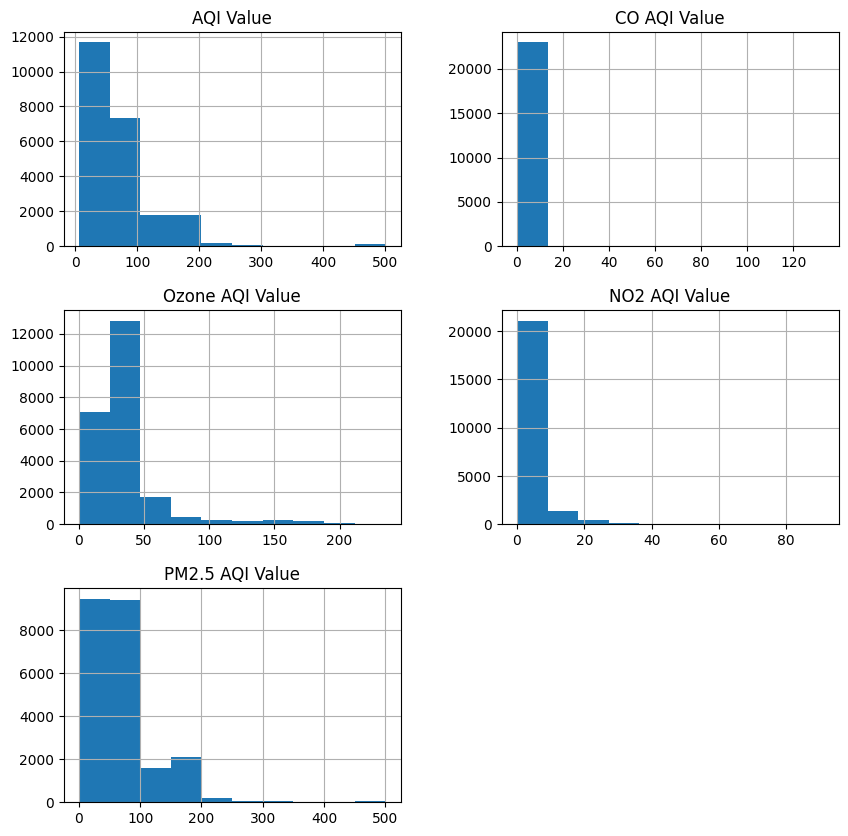

In [27]:
#Histogramme

df.hist(figsize=(10, 10))
plt.show()

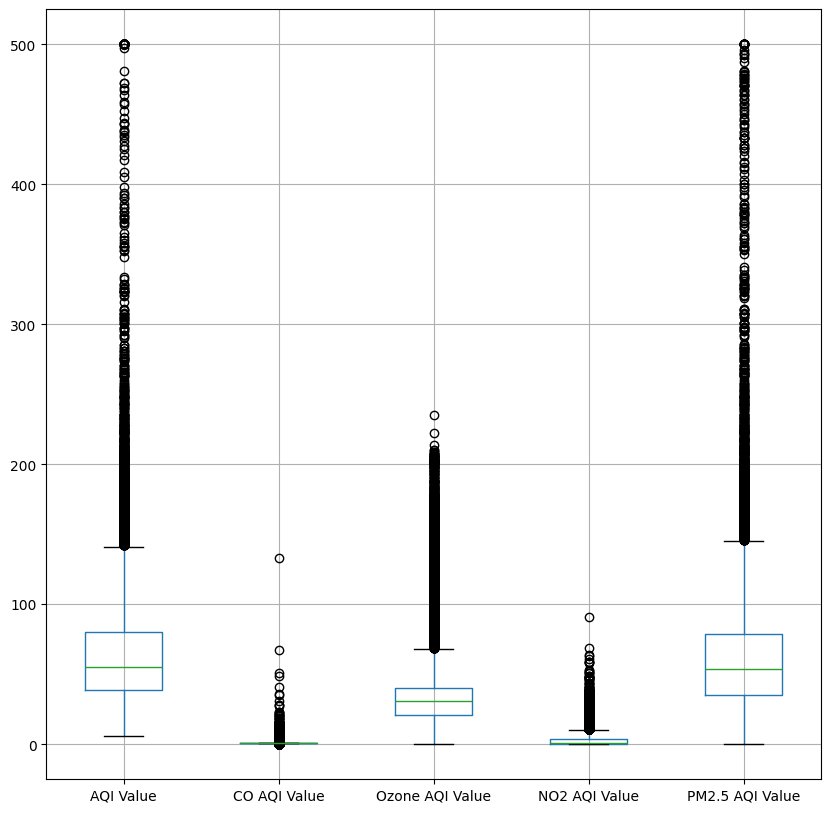

In [28]:
#Boxplot

df.boxplot(figsize=(10, 10))
plt.show()

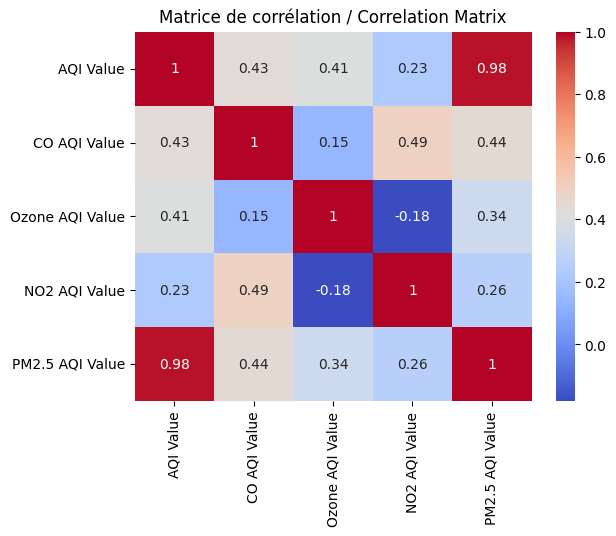

In [7]:
#Matrice de corrélation

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation / Correlation Matrix')
plt.show()

5. Analyse exploratoire / Exploration analysis

In [33]:
#Moyenne par pays

monthly_avg = df.groupby('Country').mean()
print(monthly_avg)

                                     AQI Value  CO AQI Value  Ozone AQI Value  \
Country                                                                         
Afghanistan                          95.959184      0.591837        40.183673   
Albania                              68.250000      1.000000        42.062500   
Algeria                              88.166667      1.916667        47.166667   
Andorra                              29.333333      0.666667        29.333333   
Angola                               83.925926      3.148148        22.703704   
...                                        ...           ...              ...   
Venezuela (Bolivarian Republic of)   77.722222      1.277778        17.522222   
Viet Nam                             87.050000      2.366667        46.233333   
Yemen                               144.571429      1.285714        55.428571   
Zambia                               40.666667      0.690476        20.190476   
Zimbabwe                    

6. Modélisation prédictive / Predictive modelatisation

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[["temperature", "humidity"]]  # variables explicatives
y = df["PM2.5"]  # variable cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Score R² :", model.score(X_test, y_test))

Score R² : 0.2729451520893512


7. Visualisation data / Data visusalization

In [37]:
import plotly.express as px

fig = px.scatter(df, x="temperature", y="PM2.5", color="humidity",
                 title="Lien entre météo et pollution")
fig.show()

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create the directory if it doesn't exist
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

# Exemple : histogramme PM2.5
plt.figure(figsize=(8,6))
sns.histplot(df["PM2.5 AQI Value"], bins=30, kde=True)
plt.title("Distribution of PM2.5 AQI Value")

# Sauvegarder dans le dossier 'visualizations'
plt.savefig("visualizations/pm25_distribution.png")
plt.close()  # Fermer la figure pour éviter l'affichage multiple